In [1]:
import pandas as pd
data = pd.read_csv("./"+"all_stocks_5yr.csv",index_col = None)

In [30]:
data["close"]

0         14.75
1         14.46
2         14.27
3         14.66
4         13.99
          ...  
619035    77.82
619036    76.78
619037    73.83
619038    73.27
619039    73.86
Name: close, Length: 619040, dtype: float64

In [2]:
data = data["close"].values

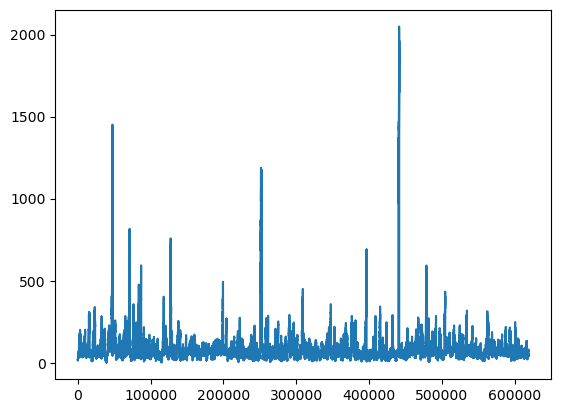

In [8]:
import matplotlib.pyplot as plt
import numpy as np
timestamp = np.arange(0,len(data))
plt.plot(timestamp,data)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1,1))

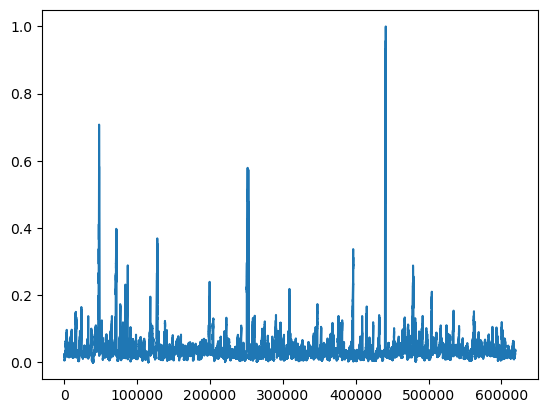

In [15]:
plt.plot(timestamp,data_min_max)

In [16]:
data_min_max

array([[0.00642763],
       [0.00628599],
       [0.00619319],
       ...,
       [0.0352836 ],
       [0.03501009],
       [0.03529825]])

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import skopt
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from modAL.batch import uncertainty_batch_sampling
#from Active_Emulate_TestD_gp import Active_Emulate_Test as ace
#from NN import NN as nn
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from dtaidistance import dtw
from numpy import dot
from numpy.linalg import norm
import sys
from sklearn.utils import shuffle
import copy
import emulate_st500 as et
import importlib
import Active_Emulate_TestD_st500 as at
import NN_st500 as nt

In [5]:
parameter_directory = "all_stocks_5yr"
file = open("./"+parameter_directory+".txt","r")
lines = file.readlines()
sample_size = int(lines[0].strip('\n'))
simi_kind = int(lines[1].strip('\n'))
cluster_number = int(lines[2].strip('\n'))

In [21]:
et = importlib.reload(et)
nt = importlib.reload(nt)

In [7]:
#emulate single new
def obj(params,params_2,simi_kind):
    print("simi_kind is {}".format(simi_kind))
    emulate = et.Emulate_TestD(data,parameter_directory,simi_kind,cluster_number,sample_size)
    emulate.load_encoder_model(parameter_directory)
    emulate.load_kmeans_model(parameter_directory)
    emulate.__init_lin__()
    emulate.__init_both_cluster_directory__(cluster_number)
    emulate.__init_limit_dictionary__()
    emulate.add_cluster_dict()
    emulate.get_max_distance(instance_number = 30000)
    emulate.load_parameter(params_2)
    emulate.sample()
    emulate.__fetch__(simi_kind,params)
    print("total query time is {}".format(emulate.total_query_time))
    print("wass distance flexim is {}".format(emulate.wasserstein_distance_flexim))
    print('#######################################################################################')
    return emulate.wasserstein_distance_flexim

simi_kind is 1
Metal device set to: Apple M1 Max


2022-09-21 17:05:30.928935: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-21 17:05:30.929354: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


length of distance list is 30000
self.max_distance is 13.016
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 10
label smoothing is 0


2022-09-21 17:05:31.616616: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-21 17:05:31.776756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 6.2617e-04 - accuracy: 0.7000
run into active learning emulate process
1/1 [==============================] - 0s 39ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 5.1144e-04 - accuracy: 0.7812

2022-09-21 17:05:32.193661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 8ms/step
1 time active learning score is 0.364
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.523
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.455
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.455
5/5 [==============================] - 0s 3ms/step
query instance shape i

6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 19
self.training_done is True
finish a

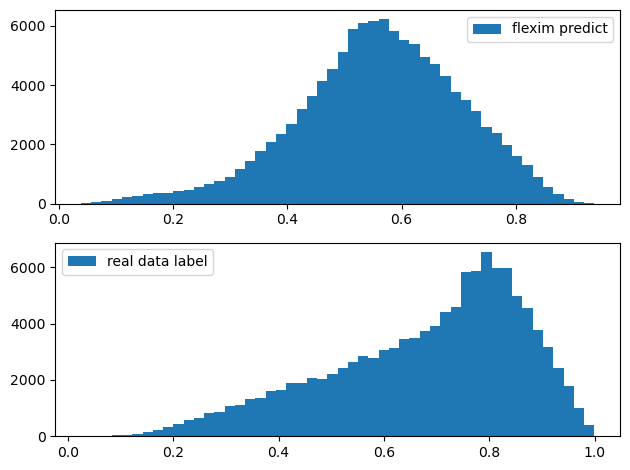

real prob shape is (115142, 1)
score shape is (9000, 1)
real train data shape is (101115, 101)
flexim train data shape is (101115, 101)
draw predict_proba data distribution figure after adding naive data


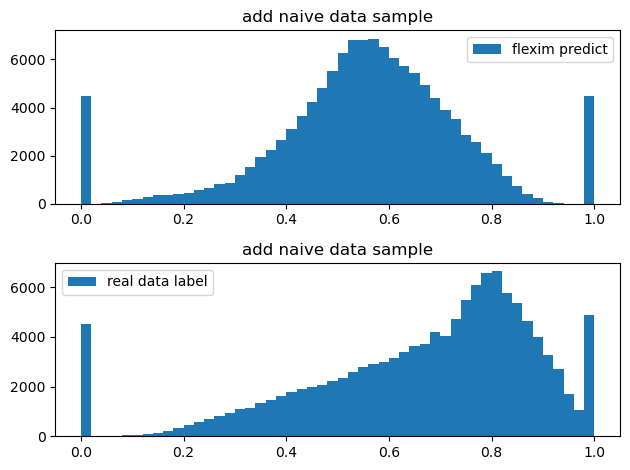

***** begin training *****
neg number flexim is 33389
pos number flexim is 67726
use bias is False
gamma is 21
label smoothing is 0.8
new version 1
Epoch 1/10


2022-09-21 17:07:12.209583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3160/3160 [==============================] - ETA: 0s - loss: 3.0835e-07 - accuracy: 0.6549 - precision: 0.7794 - recall: 0.6761

2022-09-21 17:07:43.577742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3160/3160 [==============================] - 36s 11ms/step - loss: 3.0835e-07 - accuracy: 0.6549 - precision: 0.7794 - recall: 0.6761 - val_loss: 2.7771e-07 - val_accuracy: 0.7547 - val_precision: 0.8691 - val_recall: 0.7564
Epoch 2/10
3160/3160 [==============================] - 36s 11ms/step - loss: 2.7502e-07 - accuracy: 0.7627 - precision: 0.8489 - recall: 0.7855 - val_loss: 2.6190e-07 - val_accuracy: 0.7835 - val_precision: 0.8627 - val_recall: 0.8140
Epoch 3/10
3160/3160 [==============================] - 36s 11ms/step - loss: 2.6855e-07 - accuracy: 0.7789 - precision: 0.8637 - recall: 0.7955 - val_loss: 2.5360e-07 - val_accuracy: 0.7946 - val_precision: 0.8517 - val_recall: 0.8484
Epoch 4/10
3160/3160 [==============================] - 36s 11ms/step - loss: 2.6379e-07 - accuracy: 0.7860 - precision: 0.8716 - recall: 0.7980 - val_loss: 2.6705e-07 - val_accuracy: 0.7767 - val_precision: 0.8745 - val_recall: 0.7876
Epoch 5/10
3160/3160 [==============================] - 36s 11ms/st

2022-09-21 17:13:14.070864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3160/3160 [==============================] - ETA: 0s - loss: 2.6354e-07 - accuracy: 0.7399 - precision: 0.8567 - recall: 0.7429

2022-09-21 17:13:46.348901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3160/3160 [==============================] - 37s 11ms/step - loss: 2.6354e-07 - accuracy: 0.7399 - precision: 0.8567 - recall: 0.7429 - val_loss: 1.5856e-07 - val_accuracy: 0.9148 - val_precision: 0.9633 - val_recall: 0.9131
Epoch 2/10
3160/3160 [==============================] - 36s 11ms/step - loss: 1.5759e-07 - accuracy: 0.8998 - precision: 0.9415 - recall: 0.9096 - val_loss: 1.1290e-07 - val_accuracy: 0.9389 - val_precision: 0.9688 - val_recall: 0.9431
Epoch 3/10
3160/3160 [==============================] - 36s 11ms/step - loss: 1.0374e-07 - accuracy: 0.9394 - precision: 0.9765 - recall: 0.9336 - val_loss: 8.4204e-08 - val_accuracy: 0.9528 - val_precision: 0.9788 - val_recall: 0.9531
Epoch 4/10
3160/3160 [==============================] - 36s 11ms/step - loss: 7.5590e-08 - accuracy: 0.9601 - precision: 0.9840 - recall: 0.9571 - val_loss: 7.0900e-08 - val_accuracy: 0.9558 - val_precision: 0.9891 - val_recall: 0.9473
Epoch 5/10
3160/3160 [==============================] - 36s 11ms/st

2022-09-21 17:19:18.782715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.17707112431526184
 86/900 [=>............................] - ETA: 1s

2022-09-21 17:19:20.585841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.37790757417678833
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0000000000000002
score list real std is 0.19444362258923953
emd flexim is 0.07271741727969275
emd real is 0.17834669541733947


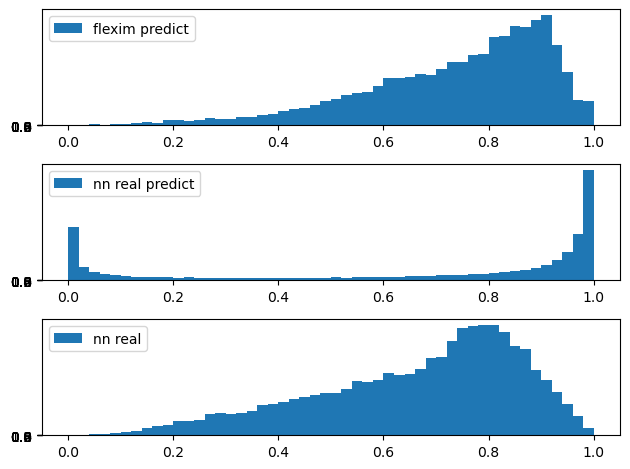

total query time is 23
wass distance flexim is 0.07271741727969275
#######################################################################################


In [34]:
params = [-2.16,6,9]
params_2 = [10,0,21,0.8]
flexim_wass = obj(params,params_2,simi_kind)

simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 7
label smoothing is 0


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-21 21:28:37.952808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.5312
run into active learning emulate process
1/1 [==============================] - 0s 30ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step


2022-09-21 21:28:38.231601: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1 time active learning score is 0.045
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.773
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.75
5/5 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 8ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fetch

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.909
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 11
self.training_done is True
finish all cluster binary and active search
make modification new new
generate cosine naive positive and negative data new
length of next_result_table is 2
result table shape is (10, 101)
(generator pi

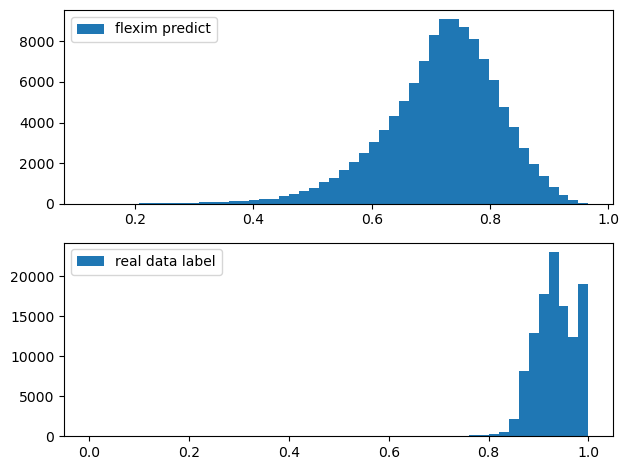

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


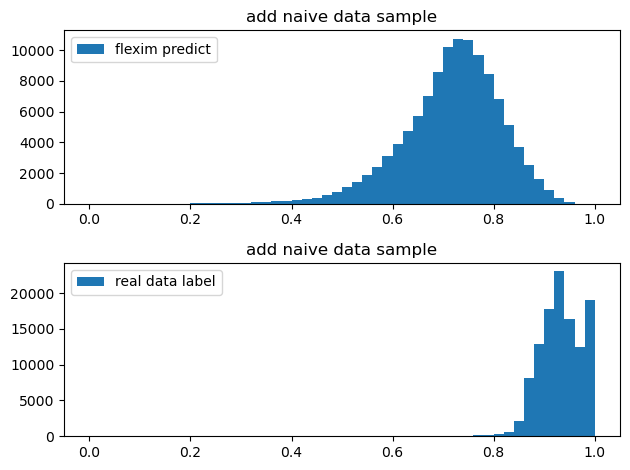

***** begin training *****
neg number flexim is 2518
pos number flexim is 88594
use bias is False
gamma is 21
label smoothing is 0.8
new version 1
Epoch 1/10


2022-09-21 21:29:08.441896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 2.6507e-07 - accuracy: 0.8358 - precision: 0.9903 - recall: 0.8393

2022-09-21 21:29:37.895336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 34s 12ms/step - loss: 2.6507e-07 - accuracy: 0.8358 - precision: 0.9903 - recall: 0.8393 - val_loss: 2.0908e-07 - val_accuracy: 0.8543 - val_precision: 0.9939 - val_recall: 0.8556
Epoch 2/10
2848/2848 [==============================] - 35s 12ms/step - loss: 2.2391e-07 - accuracy: 0.8278 - precision: 0.9936 - recall: 0.8282 - val_loss: 2.4803e-07 - val_accuracy: 0.8119 - val_precision: 0.9953 - val_recall: 0.8106
Epoch 3/10
2848/2848 [==============================] - 34s 12ms/step - loss: 2.0666e-07 - accuracy: 0.8465 - precision: 0.9943 - recall: 0.8470 - val_loss: 2.1170e-07 - val_accuracy: 0.8470 - val_precision: 0.9949 - val_recall: 0.8472
Epoch 4/10
2848/2848 [==============================] - 34s 12ms/step - loss: 1.9705e-07 - accuracy: 0.8521 - precision: 0.9949 - recall: 0.8523 - val_loss: 1.8271e-07 - val_accuracy: 0.8707 - val_precision: 0.9947 - val_recall: 0.8719
Epoch 5/10
2848/2848 [==============================] - 34s 12ms/st

2022-09-21 21:34:53.540464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.3138e-07 - accuracy: 0.9588 - precision: 0.9994 - recall: 0.9592

2022-09-21 21:35:24.592809: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 36s 12ms/step - loss: 1.3138e-07 - accuracy: 0.9588 - precision: 0.9994 - recall: 0.9592 - val_loss: 6.7096e-08 - val_accuracy: 0.9547 - val_precision: 1.0000 - val_recall: 0.9545
Epoch 2/10
2848/2848 [==============================] - 36s 12ms/step - loss: 5.7351e-08 - accuracy: 0.9655 - precision: 1.0000 - recall: 0.9654 - val_loss: 5.6795e-08 - val_accuracy: 0.9694 - val_precision: 1.0000 - val_recall: 0.9693
Epoch 3/10
2848/2848 [==============================] - 34s 12ms/step - loss: 4.7545e-08 - accuracy: 0.9745 - precision: 1.0000 - recall: 0.9744 - val_loss: 6.7940e-08 - val_accuracy: 0.9694 - val_precision: 1.0000 - val_recall: 0.9693
Epoch 4/10
2848/2848 [==============================] - 34s 12ms/step - loss: 4.2263e-08 - accuracy: 0.9794 - precision: 1.0000 - recall: 0.9793 - val_loss: 4.9910e-08 - val_accuracy: 0.9781 - val_precision: 1.0000 - val_recall: 0.9780
Epoch 5/10
2848/2848 [==============================] - 35s 12ms/st

2022-09-21 21:40:44.427768: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2251480370759964
 84/900 [=>............................] - ETA: 1s

2022-09-21 21:40:46.273186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.14439372718334198
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.3483700673277187
emd real is 0.04023808424812608


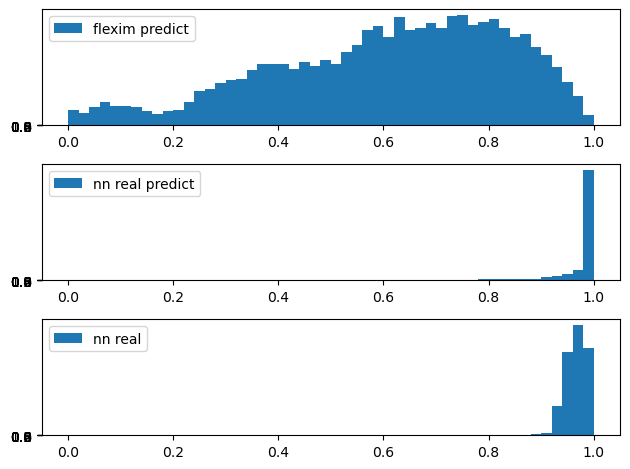

total query time is 11
wass distance flexim is 0.3483700673277187
#######################################################################################


In [37]:
#bayesian optimisation of cosine similarity
simi_kind = 2
params = [-2.16,6,9]
params_2 = [7,0,21,0.8]
flexim_wass_cosine = obj(params,params_2,simi_kind)

# cosine similarity hyperparameter test


In [19]:
SPACE = [
   skopt.space.Integer(0,40, name='gamma1'),
   skopt.space.Real(0, 0.7, name='label_smoothing1'),
    skopt.space.Integer(0,40, name='gamma2'),
   skopt.space.Real(0, 0.7, name='label_smoothing2'),
]

In [20]:
params = [-2.16,6,9]
simi_kind = 2

simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.022242361465456554


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 10:23:37.663990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 16ms/step - loss: 6.3637e-06 - accuracy: 0.5500
run into active learning emulate process
1/1 [==============================] - 0s 45ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 5.8654e-06 - accuracy: 0.5000

2022-09-23 10:23:38.201183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.114
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 7ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 22ms/step - loss: 5.1878e-06 - accuracy: 0.6704
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 18ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.625
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.381
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 1.0
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [=================

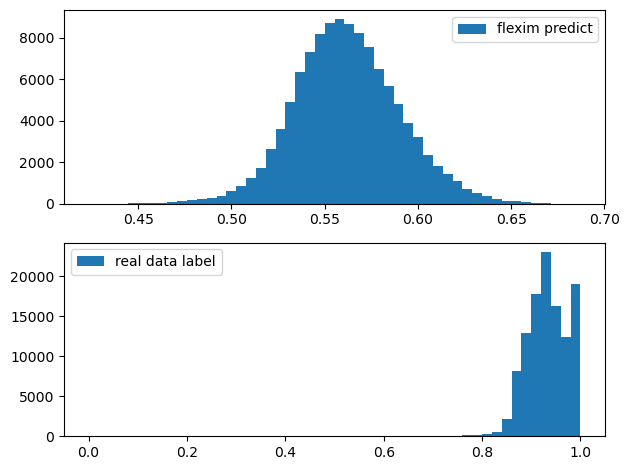

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


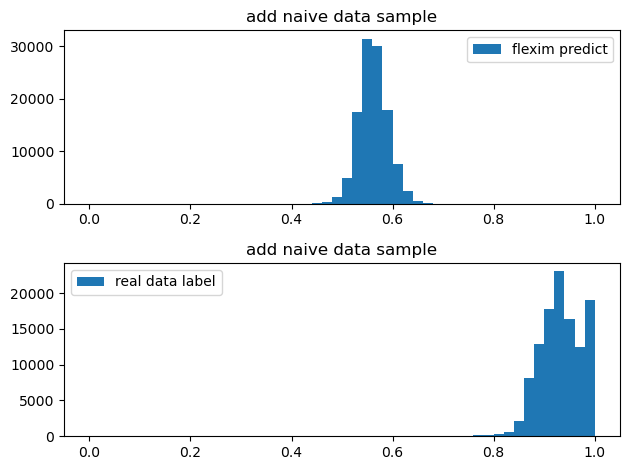

***** begin training *****
neg number flexim is 1324
pos number flexim is 89788
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 10:24:09.062238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3944 - accuracy: 0.8524 - precision: 0.9970 - recall: 0.8529

2022-09-23 10:24:36.306161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3944 - accuracy: 0.8524 - precision: 0.9970 - recall: 0.8529 - val_loss: 0.3574 - val_accuracy: 0.8703 - val_precision: 0.9980 - val_recall: 0.8702
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3452 - accuracy: 0.8652 - precision: 0.9981 - recall: 0.8648 - val_loss: 0.3294 - val_accuracy: 0.8882 - val_precision: 0.9980 - val_recall: 0.8883
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3304 - accuracy: 0.8722 - precision: 0.9985 - recall: 0.8716 - val_loss: 0.3585 - val_accuracy: 0.8704 - val_precision: 0.9990 - val_recall: 0.8694
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3243 - accuracy: 0.8733 - precision: 0.9986 - recall: 0.8726 - val_loss: 0.4589 - val_accuracy: 0.8214 - val_precision: 0.9997 - val_recall: 0.8190
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3210 - accuracy: 0.

2022-09-23 10:29:19.693823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2030 - accuracy: 0.9594 - precision: 0.9997 - recall: 0.9594

2022-09-23 10:29:50.591248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 36s 12ms/step - loss: 0.2030 - accuracy: 0.9594 - precision: 0.9997 - recall: 0.9594 - val_loss: 0.1693 - val_accuracy: 0.9794 - val_precision: 1.0000 - val_recall: 0.9793
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1310 - accuracy: 0.9846 - precision: 1.0000 - recall: 0.9846 - val_loss: 0.1281 - val_accuracy: 0.9900 - val_precision: 1.0000 - val_recall: 0.9900
Epoch 3/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1158 - accuracy: 0.9923 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1275 - val_accuracy: 0.9900 - val_precision: 1.0000 - val_recall: 0.9900
Epoch 4/10
2848/2848 [==============================] - 40s 14ms/step - loss: 0.1128 - accuracy: 0.9936 - precision: 1.0000 - recall: 0.9936 - val_loss: 0.1134 - val_accuracy: 0.9929 - val_precision: 1.0000 - val_recall: 0.9929
Epoch 5/10
2848/2848 [==============================] - 39s 14ms/step - loss: 0.1117 - accuracy: 0.

2022-09-23 10:36:08.490673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.27851778268814087
 44/900 [>.............................] - ETA: 2s

2022-09-23 10:36:10.699779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13583235442638397
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.14254227592416507
emd real is 0.032758676502530996


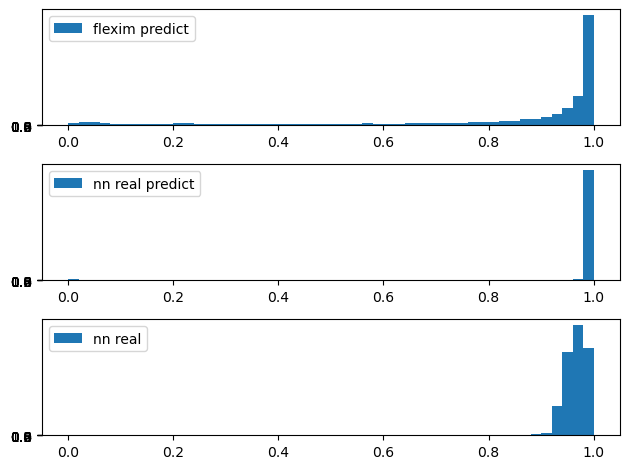

total query time is 9
wass distance flexim is 0.14254227592416507
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 12
label smoothing is 0.1798772988889045


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 10:36:13.788490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 1.9078e-04 - accuracy: 0.6562
run into active learning emulate process
1/1 [==============================] - 0s 52ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.2477e-04 - accuracy: 0.7812

2022-09-23 10:36:14.388751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 15ms/step
1 time active learning score is 0.045
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.568
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.568
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.909
2/2 [==============================] - 0s 3ms/step
emulate process finis

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 15ms/step
active learning initial score is 0.476
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 15ms/step - loss: 1.0193e-04 - accuracy: 0.7746
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2m

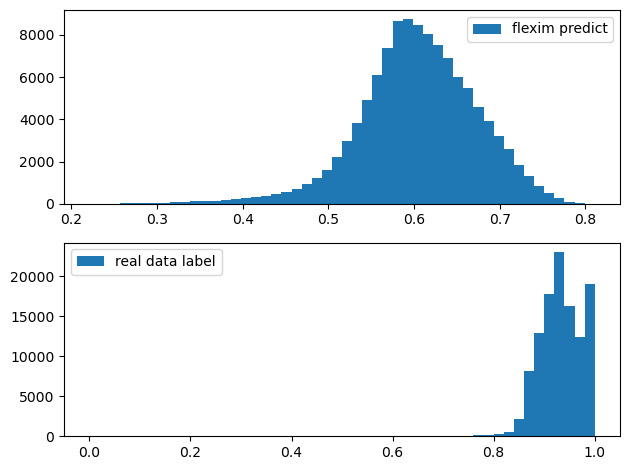

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


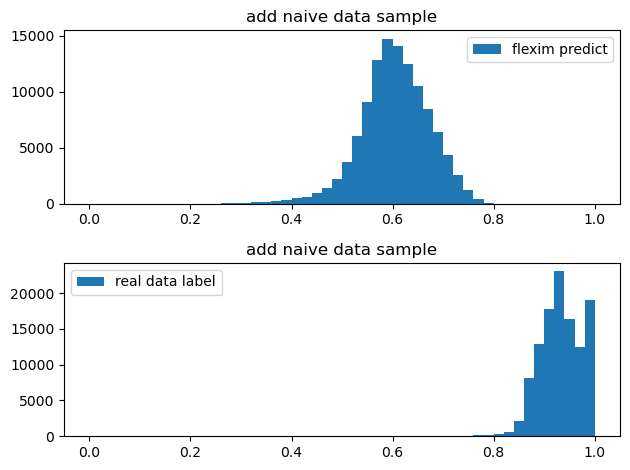

***** begin training *****
neg number flexim is 5519
pos number flexim is 85593
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 10:36:50.968182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5115 - accuracy: 0.8185 - precision: 0.9785 - recall: 0.8249

2022-09-23 10:37:30.049529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 45s 16ms/step - loss: 0.5115 - accuracy: 0.8185 - precision: 0.9785 - recall: 0.8249 - val_loss: 0.4753 - val_accuracy: 0.8388 - val_precision: 0.9821 - val_recall: 0.8436
Epoch 2/10
2848/2848 [==============================] - 44s 15ms/step - loss: 0.4732 - accuracy: 0.8475 - precision: 0.9808 - recall: 0.8544 - val_loss: 0.4242 - val_accuracy: 0.8737 - val_precision: 0.9814 - val_recall: 0.8822
Epoch 3/10
2848/2848 [==============================] - 44s 15ms/step - loss: 0.4599 - accuracy: 0.8549 - precision: 0.9812 - recall: 0.8621 - val_loss: 0.3740 - val_accuracy: 0.8908 - val_precision: 0.9801 - val_recall: 0.9020
Epoch 4/10
2848/2848 [==============================] - 45s 16ms/step - loss: 0.4518 - accuracy: 0.8547 - precision: 0.9818 - recall: 0.8613 - val_loss: 0.4882 - val_accuracy: 0.8271 - val_precision: 0.9869 - val_recall: 0.8268
Epoch 5/10
2848/2848 [==============================] - 44s 15ms/step - loss: 0.4441 - accuracy: 0.

2022-09-23 10:44:05.243575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9588 - precision: 0.9997 - recall: 0.9589

2022-09-23 10:44:38.006821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.2024 - accuracy: 0.9588 - precision: 0.9997 - recall: 0.9589 - val_loss: 0.1814 - val_accuracy: 0.9746 - val_precision: 1.0000 - val_recall: 0.9745
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1311 - accuracy: 0.9845 - precision: 1.0000 - recall: 0.9844 - val_loss: 0.1295 - val_accuracy: 0.9897 - val_precision: 1.0000 - val_recall: 0.9897
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1147 - accuracy: 0.9926 - precision: 1.0000 - recall: 0.9926 - val_loss: 0.1111 - val_accuracy: 0.9940 - val_precision: 1.0000 - val_recall: 0.9940
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1123 - accuracy: 0.9938 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1148 - val_accuracy: 0.9923 - val_precision: 1.0000 - val_recall: 0.9923
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1109 - accuracy: 0.

2022-09-23 10:49:46.530514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.27544963359832764
 78/900 [=>............................] - ETA: 1s

2022-09-23 10:49:48.391646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1336202323436737
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.286632399902199
emd real is 0.02976802969895975


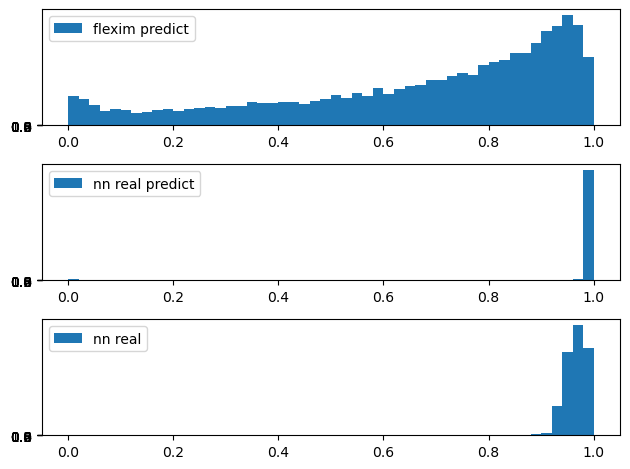

total query time is 10
wass distance flexim is 0.286632399902199
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 37
label smoothing is 0.14568328240788245


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 10:49:50.985002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 2.4809e-11 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 50ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 2.8510e-11 - accuracy: 0.5625

2022-09-23 10:49:51.583310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 9ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===============

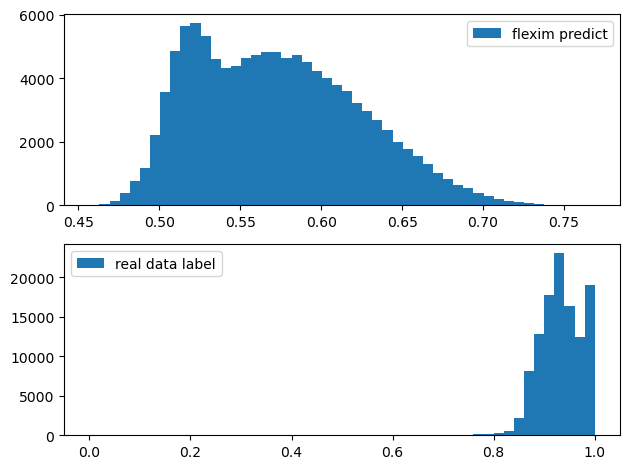

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


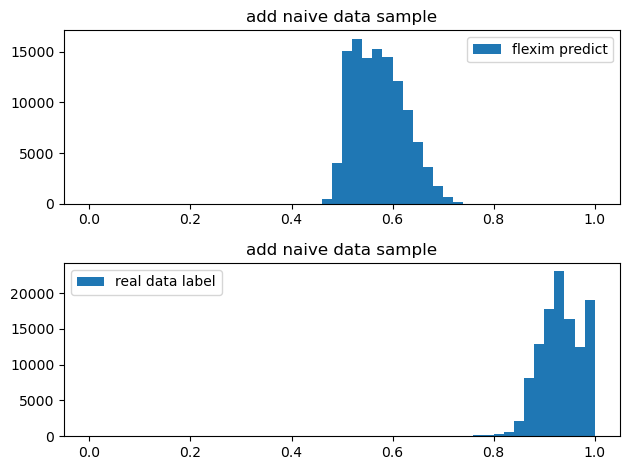

***** begin training *****
neg number flexim is 3642
pos number flexim is 87470
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 10:50:24.353606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.6010 - accuracy: 0.7004 - precision: 0.9801 - recall: 0.7022

2022-09-23 10:50:59.183340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 40s 14ms/step - loss: 0.6010 - accuracy: 0.7004 - precision: 0.9801 - recall: 0.7022 - val_loss: 0.6185 - val_accuracy: 0.6618 - val_precision: 0.9865 - val_recall: 0.6567
Epoch 2/10
2848/2848 [==============================] - 42s 15ms/step - loss: 0.5088 - accuracy: 0.7344 - precision: 0.9886 - recall: 0.7318 - val_loss: 0.4304 - val_accuracy: 0.8148 - val_precision: 0.9862 - val_recall: 0.8186
Epoch 3/10
2848/2848 [==============================] - 35s 12ms/step - loss: 0.4706 - accuracy: 0.7679 - precision: 0.9901 - recall: 0.7659 - val_loss: 0.4504 - val_accuracy: 0.8029 - val_precision: 0.9876 - val_recall: 0.8048
Epoch 4/10
2848/2848 [==============================] - 35s 12ms/step - loss: 0.4668 - accuracy: 0.7706 - precision: 0.9902 - recall: 0.7686 - val_loss: 0.5243 - val_accuracy: 0.7596 - val_precision: 0.9911 - val_recall: 0.7564
Epoch 5/10
2848/2848 [==============================] - 35s 12ms/step - loss: 0.4654 - accuracy: 0.

2022-09-23 10:56:31.727392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581

2022-09-23 10:57:03.734632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 37s 13ms/step - loss: 0.2018 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581 - val_loss: 0.1590 - val_accuracy: 0.9839 - val_precision: 1.0000 - val_recall: 0.9838
Epoch 2/10
2848/2848 [==============================] - 36s 12ms/step - loss: 0.1281 - accuracy: 0.9853 - precision: 1.0000 - recall: 0.9853 - val_loss: 0.1268 - val_accuracy: 0.9888 - val_precision: 1.0000 - val_recall: 0.9887
Epoch 3/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1134 - accuracy: 0.9921 - precision: 1.0000 - recall: 0.9920 - val_loss: 0.1180 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 4/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1120 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1164 - val_accuracy: 0.9913 - val_precision: 1.0000 - val_recall: 0.9912
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1112 - accuracy: 0.

2022-09-23 11:02:05.046611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.294924259185791
 92/900 [==>...........................] - ETA: 1s

2022-09-23 11:02:06.731609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.12841078639030457
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.29039763612899666
emd real is 0.030619266972638087


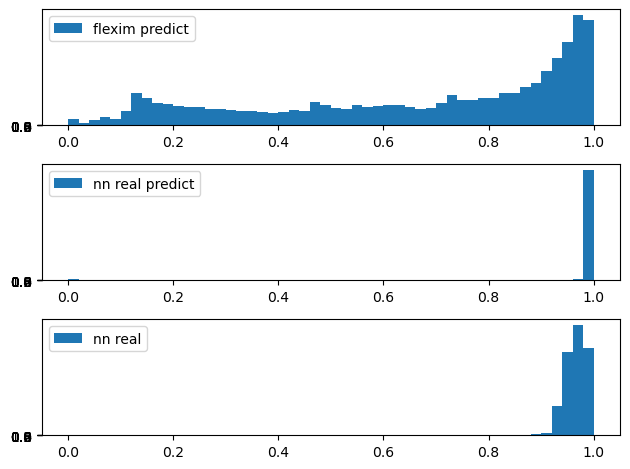

total query time is 9
wass distance flexim is 0.29039763612899666
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 21
label smoothing is 0.12235543841517868


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 11:02:09.123751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 4.6178e-07 - accuracy: 0.3500
run into active learning emulate process
1/1 [==============================] - 0s 47ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 4.3138e-07 - accuracy: 0.3125

2022-09-23 11:02:09.681504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 12ms/step
1 time active learning score is 0.727
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.477
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.455
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.841
2/2 [==============================] - 0s 3ms/step
emulate process finishes


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.792
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.955
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
finish all c

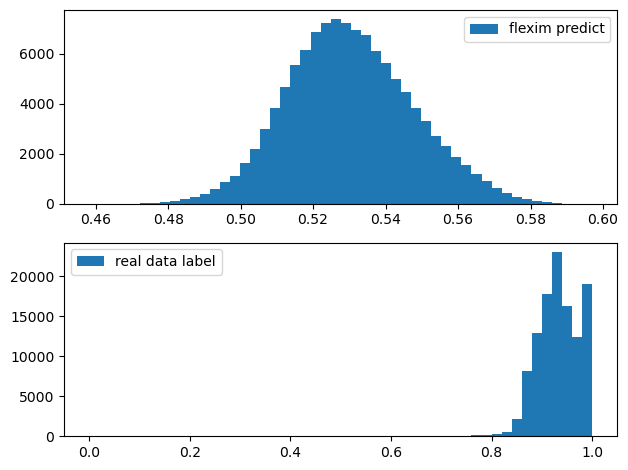

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


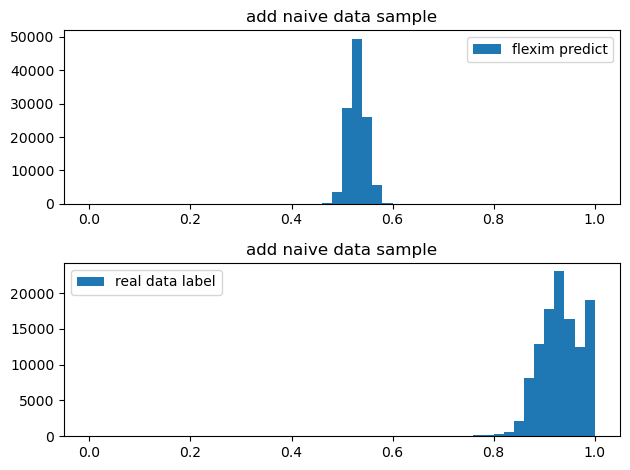

***** begin training *****
neg number flexim is 3037
pos number flexim is 88075
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 11:02:38.394852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4868 - accuracy: 0.8046 - precision: 0.9891 - recall: 0.8067

2022-09-23 11:03:08.274914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 35s 12ms/step - loss: 0.4868 - accuracy: 0.8046 - precision: 0.9891 - recall: 0.8067 - val_loss: 0.3561 - val_accuracy: 0.8721 - val_precision: 0.9906 - val_recall: 0.8759
Epoch 2/10
2848/2848 [==============================] - 34s 12ms/step - loss: 0.4257 - accuracy: 0.8221 - precision: 0.9925 - recall: 0.8222 - val_loss: 0.3924 - val_accuracy: 0.8528 - val_precision: 0.9926 - val_recall: 0.8540
Epoch 3/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.4139 - accuracy: 0.8258 - precision: 0.9930 - recall: 0.8256 - val_loss: 0.4471 - val_accuracy: 0.8193 - val_precision: 0.9941 - val_recall: 0.8178
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.4130 - accuracy: 0.8234 - precision: 0.9930 - recall: 0.8231 - val_loss: 0.4663 - val_accuracy: 0.8054 - val_precision: 0.9944 - val_recall: 0.8031
Epoch 5/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.4122 - accuracy: 0.

2022-09-23 11:09:18.859336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2082 - accuracy: 0.9569 - precision: 0.9998 - recall: 0.9570

2022-09-23 11:09:59.774704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 48s 16ms/step - loss: 0.2082 - accuracy: 0.9569 - precision: 0.9998 - recall: 0.9570 - val_loss: 0.1803 - val_accuracy: 0.9745 - val_precision: 1.0000 - val_recall: 0.9744
Epoch 2/10
2848/2848 [==============================] - 46s 16ms/step - loss: 0.1332 - accuracy: 0.9823 - precision: 1.0000 - recall: 0.9822 - val_loss: 0.1309 - val_accuracy: 0.9887 - val_precision: 1.0000 - val_recall: 0.9886
Epoch 3/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1167 - accuracy: 0.9917 - precision: 1.0000 - recall: 0.9917 - val_loss: 0.1236 - val_accuracy: 0.9903 - val_precision: 1.0000 - val_recall: 0.9902
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1138 - accuracy: 0.9933 - precision: 1.0000 - recall: 0.9933 - val_loss: 0.1152 - val_accuracy: 0.9927 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 5/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1128 - accuracy: 0.

2022-09-23 11:16:01.322535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2700018584728241
 47/900 [>.............................] - ETA: 1s

2022-09-23 11:16:03.232282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13647609949111938
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2029823322497907
emd real is 0.024441553807608353


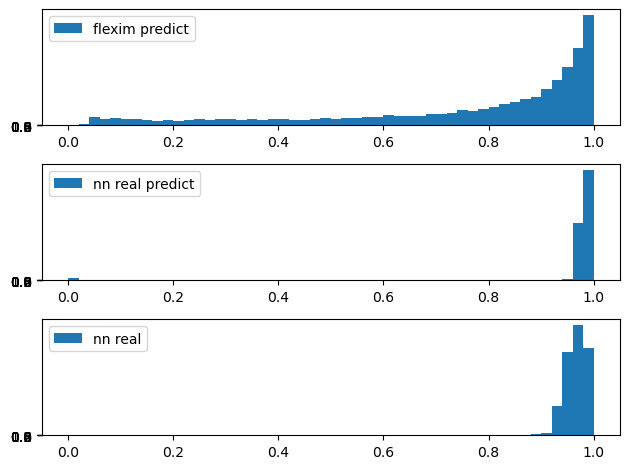

total query time is 10
wass distance flexim is 0.2029823322497907
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 16
label smoothing is 0.35844083616500644


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 11:16:05.959288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 1.1443e-05 - accuracy: 0.4750
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.1190e-05 - accuracy: 0.6250

2022-09-23 11:16:06.611656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.318
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.318
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.636
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process f

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.688
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 14ms/step - loss: 6.8532e-06 - accuracy: 0.8269
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/st

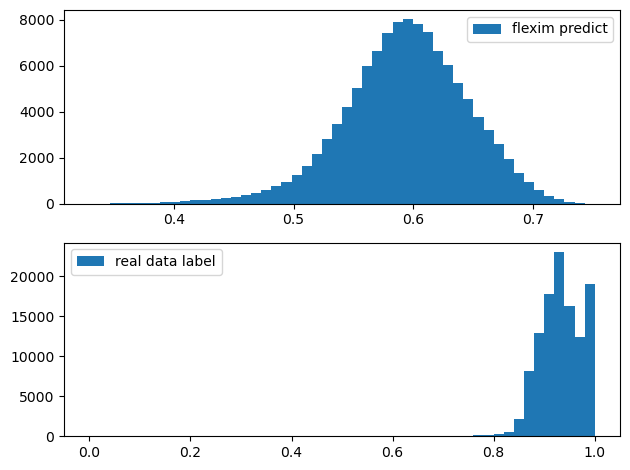

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


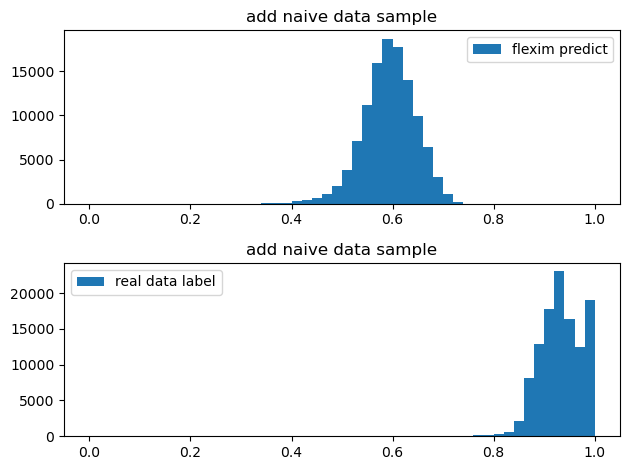

***** begin training *****
neg number flexim is 3893
pos number flexim is 87219
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 11:16:39.105491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4500 - accuracy: 0.8221 - precision: 0.9888 - recall: 0.8235

2022-09-23 11:17:13.225174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 39s 14ms/step - loss: 0.4500 - accuracy: 0.8221 - precision: 0.9888 - recall: 0.8235 - val_loss: 0.4960 - val_accuracy: 0.7984 - val_precision: 0.9933 - val_recall: 0.7949
Epoch 2/10
2848/2848 [==============================] - 33s 12ms/step - loss: 0.4178 - accuracy: 0.8376 - precision: 0.9907 - recall: 0.8382 - val_loss: 0.4481 - val_accuracy: 0.8287 - val_precision: 0.9926 - val_recall: 0.8273
Epoch 3/10
2848/2848 [==============================] - 29s 10ms/step - loss: 0.4116 - accuracy: 0.8391 - precision: 0.9914 - recall: 0.8392 - val_loss: 0.3961 - val_accuracy: 0.8532 - val_precision: 0.9916 - val_recall: 0.8540
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.4072 - accuracy: 0.8383 - precision: 0.9913 - recall: 0.8384 - val_loss: 0.4380 - val_accuracy: 0.8285 - val_precision: 0.9929 - val_recall: 0.8269
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4042 - accuracy: 0.

2022-09-23 11:22:07.588908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 0.9543 - precision: 0.9998 - recall: 0.9544

2022-09-23 11:22:40.380174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.2069 - accuracy: 0.9543 - precision: 0.9998 - recall: 0.9544 - val_loss: 0.1807 - val_accuracy: 0.9724 - val_precision: 1.0000 - val_recall: 0.9723
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1308 - accuracy: 0.9834 - precision: 1.0000 - recall: 0.9833 - val_loss: 0.1238 - val_accuracy: 0.9905 - val_precision: 1.0000 - val_recall: 0.9904
Epoch 3/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1160 - accuracy: 0.9919 - precision: 1.0000 - recall: 0.9919 - val_loss: 0.1169 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1132 - accuracy: 0.9932 - precision: 1.0000 - recall: 0.9932 - val_loss: 0.1151 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1127 - accuracy: 0.

2022-09-23 11:28:19.854693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2866334319114685
 78/900 [=>............................] - ETA: 1s

2022-09-23 11:28:21.703783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.130666121840477
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.23224701716468185
emd real is 0.03150213306593164


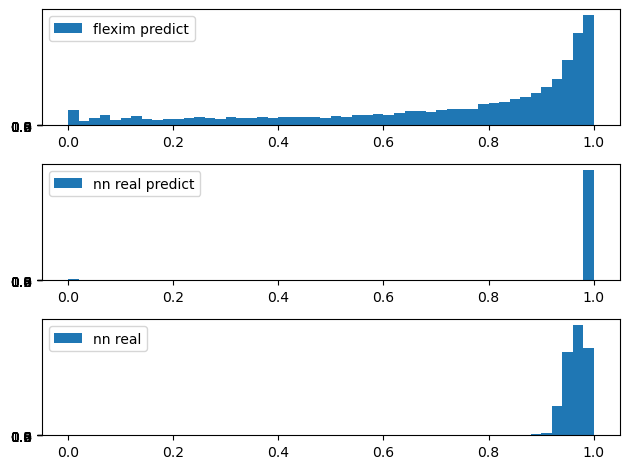

total query time is 10
wass distance flexim is 0.23224701716468185
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 0
label smoothing is 0.5607904681644802


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 11:28:24.308011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step - loss: 0.6638 - accuracy: 0.7625
run into active learning emulate process
1/1 [==============================] - 0s 50ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.6875

2022-09-23 11:28:24.846448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.091
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.364
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.295
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.364
5/5 [==============================] - 0s 5ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.854
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 12
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [================

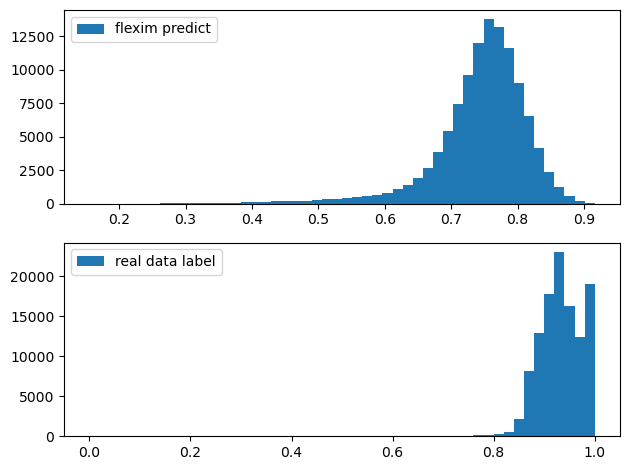

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


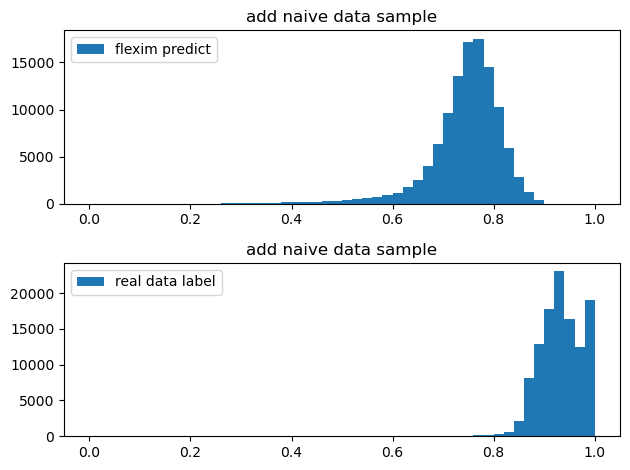

***** begin training *****
neg number flexim is 1434
pos number flexim is 89678
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 11:28:58.271784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3409 - accuracy: 0.8863 - precision: 0.9977 - recall: 0.8865

2022-09-23 11:29:31.117874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.3409 - accuracy: 0.8863 - precision: 0.9977 - recall: 0.8865 - val_loss: 0.3015 - val_accuracy: 0.9027 - val_precision: 0.9986 - val_recall: 0.9024
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.3063 - accuracy: 0.8909 - precision: 0.9987 - recall: 0.8903 - val_loss: 0.2834 - val_accuracy: 0.9150 - val_precision: 0.9983 - val_recall: 0.9151
Epoch 3/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.3041 - accuracy: 0.8963 - precision: 0.9987 - recall: 0.8958 - val_loss: 0.2721 - val_accuracy: 0.9212 - val_precision: 0.9982 - val_recall: 0.9215
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.3020 - accuracy: 0.8980 - precision: 0.9987 - recall: 0.8975 - val_loss: 0.3044 - val_accuracy: 0.9052 - val_precision: 0.9987 - val_recall: 0.9048
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.2970 - accuracy: 0.

2022-09-23 11:35:03.101987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2035 - accuracy: 0.9590 - precision: 0.9997 - recall: 0.9591

2022-09-23 11:35:29.355735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 30s 10ms/step - loss: 0.2035 - accuracy: 0.9590 - precision: 0.9997 - recall: 0.9591 - val_loss: 0.1791 - val_accuracy: 0.9734 - val_precision: 1.0000 - val_recall: 0.9733
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1341 - accuracy: 0.9828 - precision: 1.0000 - recall: 0.9827 - val_loss: 0.1313 - val_accuracy: 0.9900 - val_precision: 1.0000 - val_recall: 0.9900
Epoch 3/10
2848/2848 [==============================] - 33s 11ms/step - loss: 0.1189 - accuracy: 0.9917 - precision: 1.0000 - recall: 0.9916 - val_loss: 0.1153 - val_accuracy: 0.9935 - val_precision: 1.0000 - val_recall: 0.9935
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1153 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1186 - val_accuracy: 0.9920 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1141 - accuracy: 0.

2022-09-23 11:40:54.871168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.25717392563819885
 79/900 [=>............................] - ETA: 1s

2022-09-23 11:40:56.797389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1330617368221283
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.11428469673511273
emd real is 0.025689359365057462


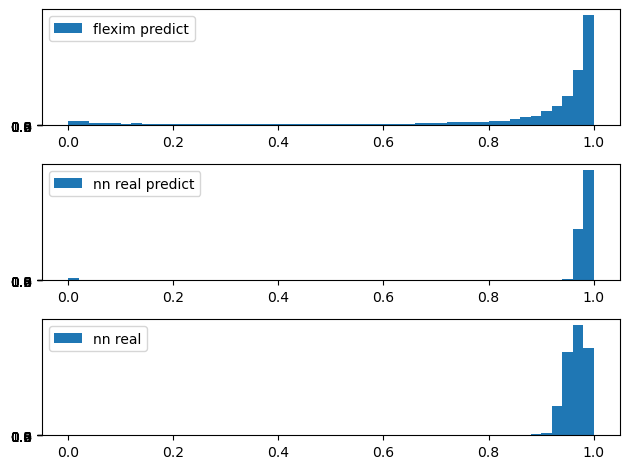

total query time is 15
wass distance flexim is 0.11428469673511273
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 34
label smoothing is 0.5599950164844993


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 11:40:59.538833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 6.4312e-11 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 52ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 7.2734e-11 - accuracy: 0.4375

2022-09-23 11:41:00.144161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 15ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learnin

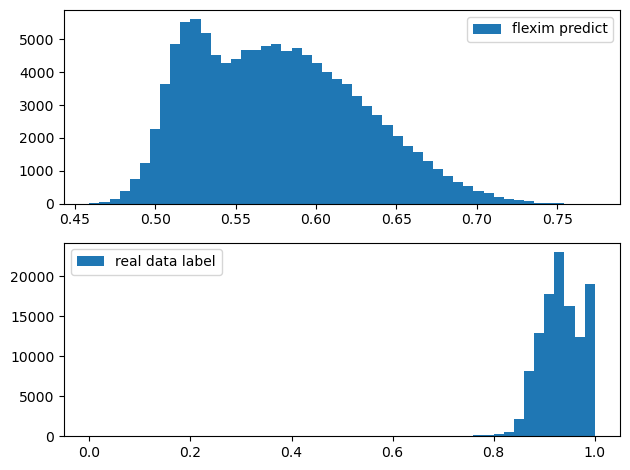

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


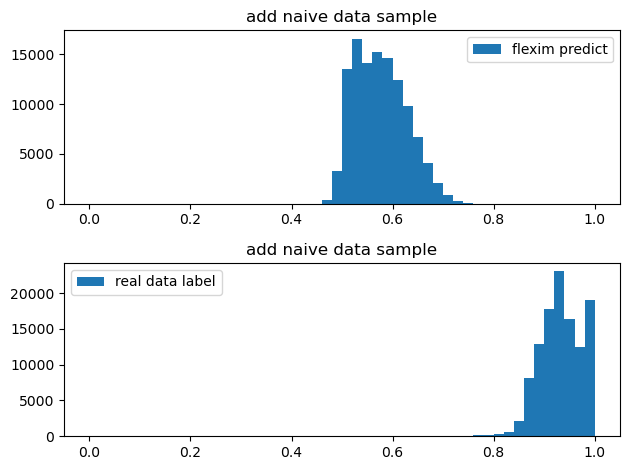

***** begin training *****
neg number flexim is 2870
pos number flexim is 88242
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 11:41:31.900992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5603 - accuracy: 0.7528 - precision: 0.9865 - recall: 0.7551

2022-09-23 11:42:05.448150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 39s 13ms/step - loss: 0.5603 - accuracy: 0.7528 - precision: 0.9865 - recall: 0.7551 - val_loss: 0.4245 - val_accuracy: 0.8203 - val_precision: 0.9882 - val_recall: 0.8242
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.4669 - accuracy: 0.7722 - precision: 0.9929 - recall: 0.7703 - val_loss: 0.4625 - val_accuracy: 0.7960 - val_precision: 0.9917 - val_recall: 0.7958
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.4574 - accuracy: 0.7744 - precision: 0.9932 - recall: 0.7724 - val_loss: 0.4240 - val_accuracy: 0.8164 - val_precision: 0.9905 - val_recall: 0.8181
Epoch 4/10
2848/2848 [==============================] - 39s 14ms/step - loss: 0.4553 - accuracy: 0.7760 - precision: 0.9929 - recall: 0.7743 - val_loss: 0.4191 - val_accuracy: 0.8208 - val_precision: 0.9903 - val_recall: 0.8228
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.4523 - accuracy: 0.

2022-09-23 11:47:43.013306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2036 - accuracy: 0.9577 - precision: 0.9997 - recall: 0.9577

2022-09-23 11:48:16.043355: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.2036 - accuracy: 0.9577 - precision: 0.9997 - recall: 0.9577 - val_loss: 0.1815 - val_accuracy: 0.9731 - val_precision: 1.0000 - val_recall: 0.9730
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1296 - accuracy: 0.9848 - precision: 1.0000 - recall: 0.9848 - val_loss: 0.1251 - val_accuracy: 0.9893 - val_precision: 1.0000 - val_recall: 0.9893
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1133 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1129 - val_accuracy: 0.9933 - val_precision: 1.0000 - val_recall: 0.9933
Epoch 4/10
2848/2848 [==============================] - 35s 12ms/step - loss: 0.1122 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1202 - val_accuracy: 0.9907 - val_precision: 1.0000 - val_recall: 0.9907
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1113 - accuracy: 0.

2022-09-23 11:53:18.280376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2993518114089966
 93/900 [==>...........................] - ETA: 1s

2022-09-23 11:53:20.018318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13462327420711517
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.27568308222874394
emd real is 0.0335190440449214


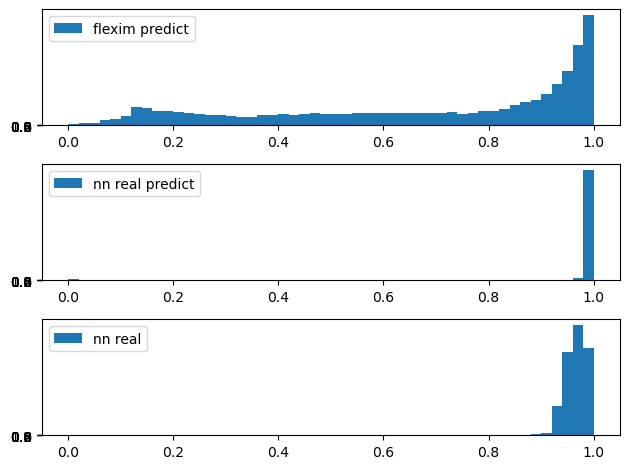

total query time is 9
wass distance flexim is 0.27568308222874394
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 14
label smoothing is 0.6357689121442025


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 11:53:22.367570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step - loss: 4.0334e-05 - accuracy: 0.6875
run into active learning emulate process
1/1 [==============================] - 0s 45ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 3.9151e-05 - accuracy: 0.7188

2022-09-23 11:53:22.901422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.0
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.545
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.614
5/5 [==============================] - 0s 5ms/step
query instance shape is

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.729
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [============

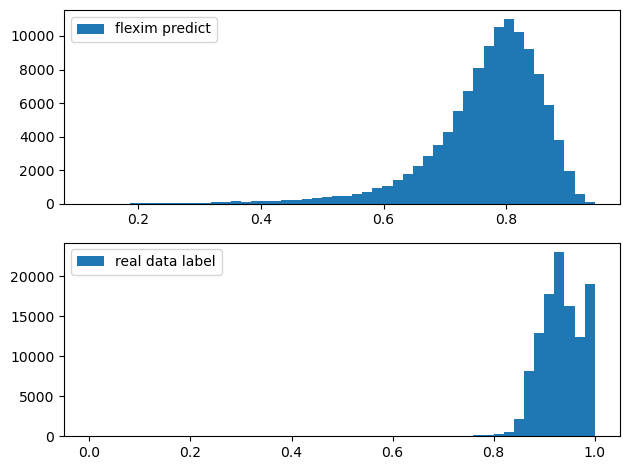

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


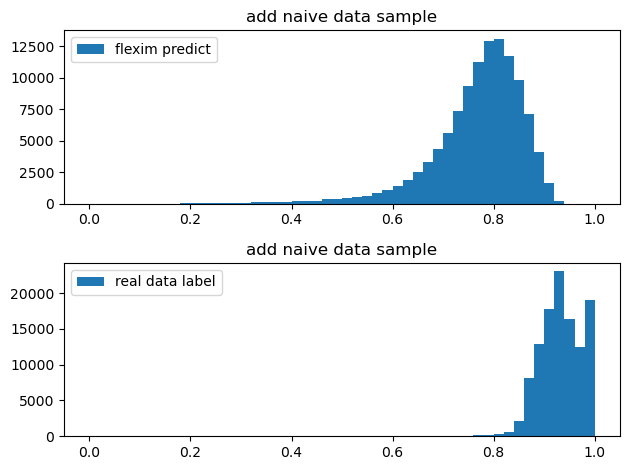

***** begin training *****
neg number flexim is 1974
pos number flexim is 89138
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 11:53:53.753950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3600 - accuracy: 0.8715 - precision: 0.9965 - recall: 0.8717

2022-09-23 11:54:22.152250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.3600 - accuracy: 0.8715 - precision: 0.9965 - recall: 0.8717 - val_loss: 0.3051 - val_accuracy: 0.8995 - val_precision: 0.9973 - val_recall: 0.8996
Epoch 2/10
2848/2848 [==============================] - 35s 12ms/step - loss: 0.3227 - accuracy: 0.8842 - precision: 0.9976 - recall: 0.8838 - val_loss: 0.2976 - val_accuracy: 0.9070 - val_precision: 0.9975 - val_recall: 0.9072
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.3149 - accuracy: 0.8899 - precision: 0.9977 - recall: 0.8895 - val_loss: 0.2939 - val_accuracy: 0.9106 - val_precision: 0.9976 - val_recall: 0.9108
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.3110 - accuracy: 0.8921 - precision: 0.9978 - recall: 0.8917 - val_loss: 0.3383 - val_accuracy: 0.8865 - val_precision: 0.9982 - val_recall: 0.8856
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.3100 - accuracy: 0.

2022-09-23 12:00:03.192000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1886 - accuracy: 0.9634 - precision: 0.9998 - recall: 0.9635

2022-09-23 12:00:35.098774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 37s 13ms/step - loss: 0.1886 - accuracy: 0.9634 - precision: 0.9998 - recall: 0.9635 - val_loss: 0.1539 - val_accuracy: 0.9748 - val_precision: 1.0000 - val_recall: 0.9747
Epoch 2/10
2848/2848 [==============================] - 36s 12ms/step - loss: 0.1239 - accuracy: 0.9823 - precision: 1.0000 - recall: 0.9822 - val_loss: 0.1235 - val_accuracy: 0.9877 - val_precision: 1.0000 - val_recall: 0.9877
Epoch 3/10
2848/2848 [==============================] - 27s 10ms/step - loss: 0.1187 - accuracy: 0.9869 - precision: 1.0000 - recall: 0.9869 - val_loss: 0.1297 - val_accuracy: 0.9862 - val_precision: 1.0000 - val_recall: 0.9861
Epoch 4/10
2848/2848 [==============================] - 27s 9ms/step - loss: 0.1145 - accuracy: 0.9900 - precision: 1.0000 - recall: 0.9900 - val_loss: 0.1203 - val_accuracy: 0.9897 - val_precision: 1.0000 - val_recall: 0.9897
Epoch 5/10
2848/2848 [==============================] - 27s 9ms/step - loss: 0.1126 - accuracy: 0.99

2022-09-23 12:05:35.492578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.24190586805343628
 53/900 [>.............................] - ETA: 1s

2022-09-23 12:05:37.293280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13634371757507324
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.10417301956585467
emd real is 0.031006622076769637


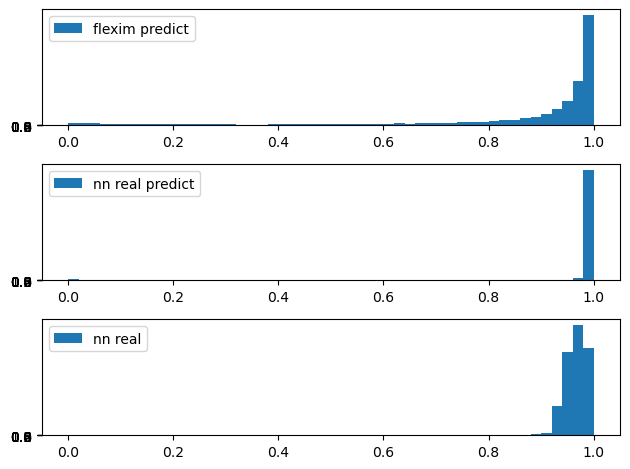

total query time is 12
wass distance flexim is 0.10417301956585467
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 26
label smoothing is 0.15124470409901764


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 12:05:39.873845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 2.1821e-08 - accuracy: 0.4688
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.5685e-08 - accuracy: 0.5000

2022-09-23 12:05:40.446694: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.75
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.682
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.659
5/5 [==============================] - 0s 8ms/step
query instance shape i

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.875
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 12
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [===================

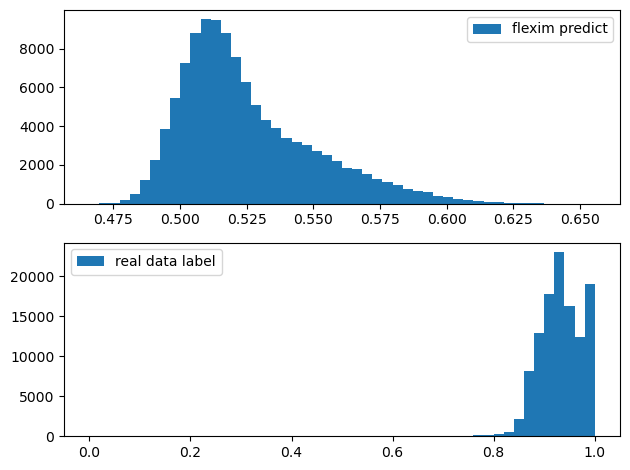

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


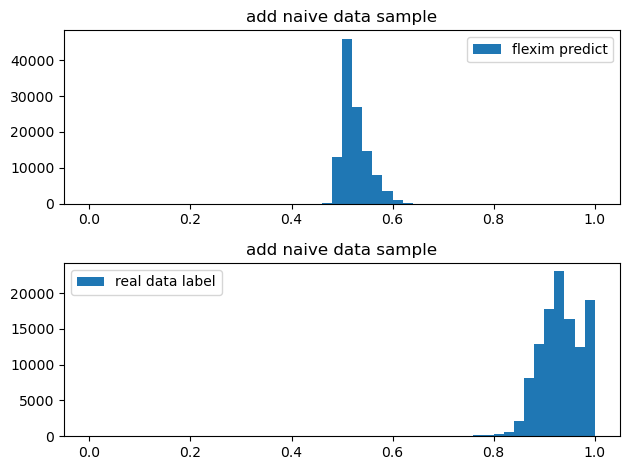

***** begin training *****
neg number flexim is 10658
pos number flexim is 80454
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 12:06:13.003934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5982 - accuracy: 0.7026 - precision: 0.9397 - recall: 0.7087

2022-09-23 12:06:44.038150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 36s 12ms/step - loss: 0.5982 - accuracy: 0.7026 - precision: 0.9397 - recall: 0.7087 - val_loss: 0.5477 - val_accuracy: 0.7338 - val_precision: 0.9352 - val_recall: 0.7498
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.5904 - accuracy: 0.6932 - precision: 0.9445 - recall: 0.6933 - val_loss: 0.5242 - val_accuracy: 0.7494 - val_precision: 0.9333 - val_recall: 0.7707
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.5874 - accuracy: 0.6899 - precision: 0.9462 - recall: 0.6879 - val_loss: 0.6337 - val_accuracy: 0.6498 - val_precision: 0.9520 - val_recall: 0.6345
Epoch 4/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.5849 - accuracy: 0.6806 - precision: 0.9472 - recall: 0.6760 - val_loss: 0.6196 - val_accuracy: 0.6564 - val_precision: 0.9518 - val_recall: 0.6426
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.5826 - accuracy: 0.

2022-09-23 12:12:15.182024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2071 - accuracy: 0.9602 - precision: 0.9997 - recall: 0.9604

2022-09-23 12:12:47.299127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 37s 13ms/step - loss: 0.2071 - accuracy: 0.9602 - precision: 0.9997 - recall: 0.9604 - val_loss: 0.1721 - val_accuracy: 0.9771 - val_precision: 1.0000 - val_recall: 0.9771
Epoch 2/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1272 - accuracy: 0.9869 - precision: 1.0000 - recall: 0.9868 - val_loss: 0.1193 - val_accuracy: 0.9920 - val_precision: 1.0000 - val_recall: 0.9920
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1131 - accuracy: 0.9933 - precision: 1.0000 - recall: 0.9933 - val_loss: 0.1176 - val_accuracy: 0.9916 - val_precision: 1.0000 - val_recall: 0.9915
Epoch 4/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1112 - accuracy: 0.9936 - precision: 1.0000 - recall: 0.9936 - val_loss: 0.1132 - val_accuracy: 0.9928 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 5/10
2848/2848 [==============================] - 36s 12ms/step - loss: 0.1109 - accuracy: 0.

2022-09-23 12:17:58.997504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.25135526061058044
 83/900 [=>............................] - ETA: 1s

2022-09-23 12:18:00.671719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13444554805755615
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4275019515204993
emd real is 0.03518946818408147


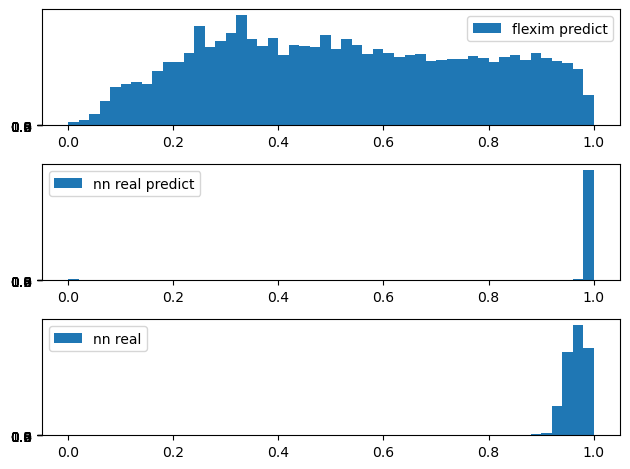

total query time is 15
wass distance flexim is 0.4275019515204993
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 27
label smoothing is 0.18721950695675757


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 12:18:03.060337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 16ms/step - loss: 1.1524e-08 - accuracy: 0.4625
run into active learning emulate process
1/1 [==============================] - 0s 47ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.1645e-08 - accuracy: 0.4688

2022-09-23 12:18:03.699016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.75
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.682
5/5 [==============================] - 0s 5ms/step
query instance shape i

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.833
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 13
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [====================

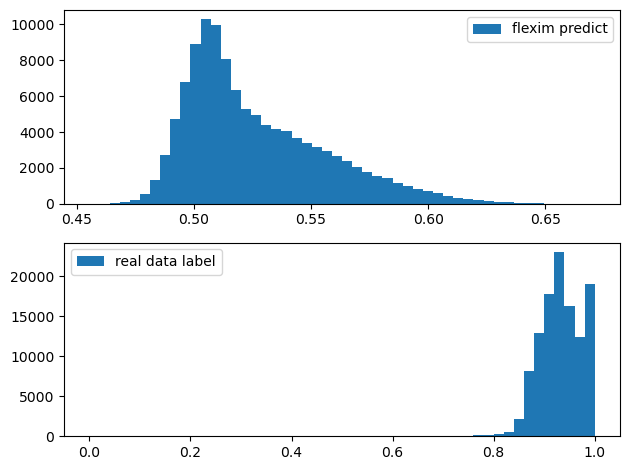

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


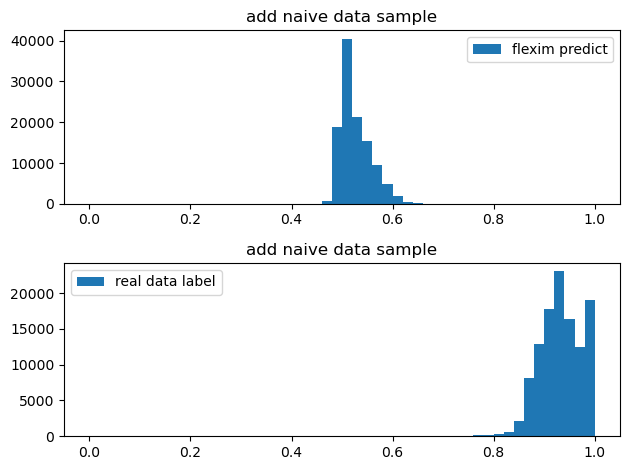

***** begin training *****
neg number flexim is 15516
pos number flexim is 75596
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 12:18:34.841061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5933 - accuracy: 0.6987 - precision: 0.9129 - recall: 0.7041

2022-09-23 12:19:04.415443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 35s 12ms/step - loss: 0.5933 - accuracy: 0.6987 - precision: 0.9129 - recall: 0.7041 - val_loss: 0.6346 - val_accuracy: 0.6481 - val_precision: 0.9329 - val_recall: 0.6195
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.5793 - accuracy: 0.6945 - precision: 0.9223 - recall: 0.6899 - val_loss: 0.5593 - val_accuracy: 0.7085 - val_precision: 0.9140 - val_recall: 0.7151
Epoch 3/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.5771 - accuracy: 0.6932 - precision: 0.9245 - recall: 0.6863 - val_loss: 0.5612 - val_accuracy: 0.7056 - val_precision: 0.9162 - val_recall: 0.7092
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.5760 - accuracy: 0.6910 - precision: 0.9243 - recall: 0.6836 - val_loss: 0.6062 - val_accuracy: 0.6702 - val_precision: 0.9274 - val_recall: 0.6527
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.5742 - accuracy: 0.

2022-09-23 12:24:45.855233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9599 - precision: 0.9997 - recall: 0.9600

2022-09-23 12:25:19.302593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 39s 13ms/step - loss: 0.2046 - accuracy: 0.9599 - precision: 0.9997 - recall: 0.9600 - val_loss: 0.1806 - val_accuracy: 0.9739 - val_precision: 1.0000 - val_recall: 0.9738
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1289 - accuracy: 0.9859 - precision: 1.0000 - recall: 0.9858 - val_loss: 0.1266 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1147 - accuracy: 0.9927 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.1188 - val_accuracy: 0.9918 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1122 - accuracy: 0.9938 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1119 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9937
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1110 - accuracy: 0.

2022-09-23 12:31:00.788882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.27200081944465637
 72/900 [=>............................] - ETA: 1s

2022-09-23 12:31:02.702376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13105455040931702
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4273109137533273
emd real is 0.030690199794302483


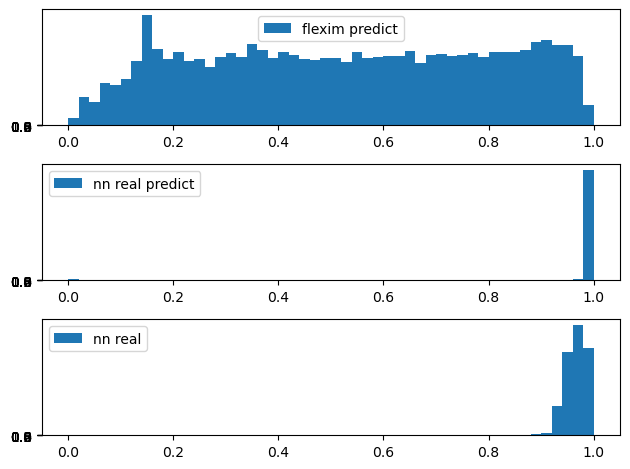

total query time is 16
wass distance flexim is 0.4273109137533273
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 14
label smoothing is 0.6939718862262546


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 12:31:05.623316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 4.0968e-05 - accuracy: 0.6125
run into active learning emulate process
1/1 [==============================] - 0s 58ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 3.8220e-05 - accuracy: 0.7812

2022-09-23 12:31:06.267323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.341
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.136
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.636
5/5 [==============================] - 0s 6ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 16ms/step
1 time active learning score is 0.771
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.857
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.977
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [================

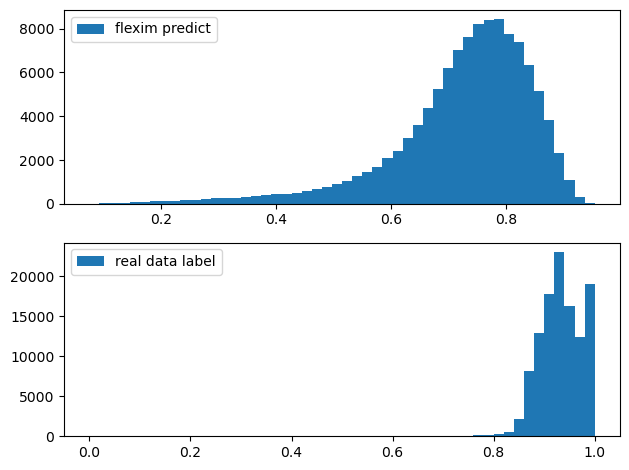

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


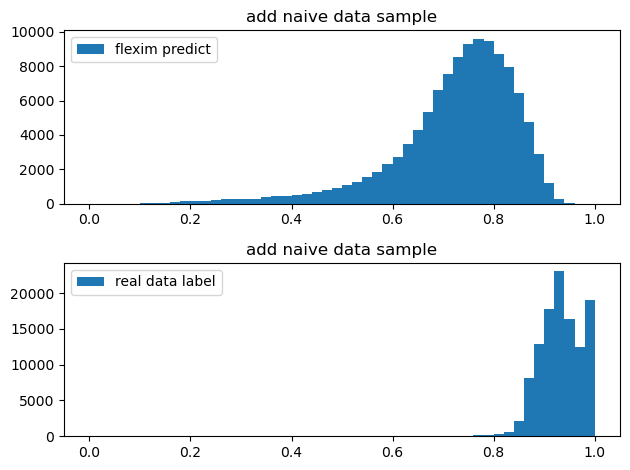

***** begin training *****
neg number flexim is 5422
pos number flexim is 85690
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 12:31:38.063219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8681 - precision: 0.9885 - recall: 0.8699

2022-09-23 12:32:05.178882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3882 - accuracy: 0.8681 - precision: 0.9885 - recall: 0.8699 - val_loss: 0.3033 - val_accuracy: 0.9089 - val_precision: 0.9876 - val_recall: 0.9145
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3494 - accuracy: 0.8793 - precision: 0.9908 - recall: 0.8798 - val_loss: 0.3301 - val_accuracy: 0.8884 - val_precision: 0.9902 - val_recall: 0.8901
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3389 - accuracy: 0.8768 - precision: 0.9910 - recall: 0.8770 - val_loss: 0.3462 - val_accuracy: 0.8777 - val_precision: 0.9909 - val_recall: 0.8780
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3343 - accuracy: 0.8760 - precision: 0.9911 - recall: 0.8760 - val_loss: 0.3707 - val_accuracy: 0.8660 - val_precision: 0.9919 - val_recall: 0.8645
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3326 - accuracy: 0.

2022-09-23 12:36:40.880852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9585 - precision: 0.9997 - recall: 0.9586

2022-09-23 12:37:08.372392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2048 - accuracy: 0.9585 - precision: 0.9997 - recall: 0.9586 - val_loss: 0.1787 - val_accuracy: 0.9742 - val_precision: 1.0000 - val_recall: 0.9741
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1331 - accuracy: 0.9823 - precision: 1.0000 - recall: 0.9823 - val_loss: 0.1336 - val_accuracy: 0.9887 - val_precision: 1.0000 - val_recall: 0.9886
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1157 - accuracy: 0.9917 - precision: 1.0000 - recall: 0.9917 - val_loss: 0.1153 - val_accuracy: 0.9924 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1133 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1143 - val_accuracy: 0.9927 - val_precision: 1.0000 - val_recall: 0.9926
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1120 - accuracy: 0.

2022-09-23 12:41:45.516906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.283218652009964
 60/900 [=>............................] - ETA: 1s

2022-09-23 12:41:47.168590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13176925480365753
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.18850550767198937
emd real is 0.031327996233624075


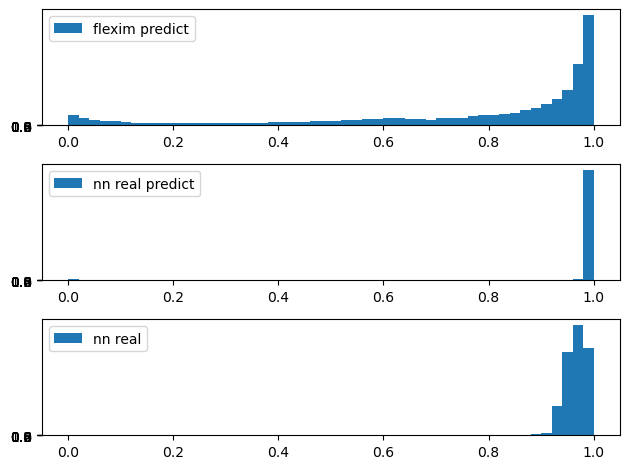

total query time is 11
wass distance flexim is 0.18850550767198937
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 13
label smoothing is 0.5532900828605721


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 12:41:49.720160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 7.7363e-05 - accuracy: 0.6750
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 7.9210e-05 - accuracy: 0.6875

2022-09-23 12:41:50.385517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.75
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process fin

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.857
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

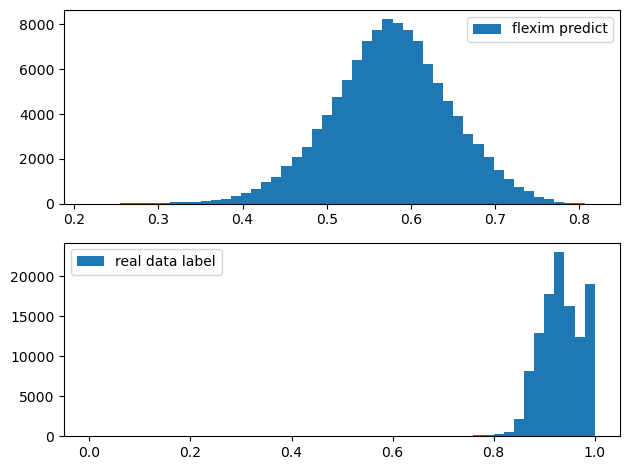

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


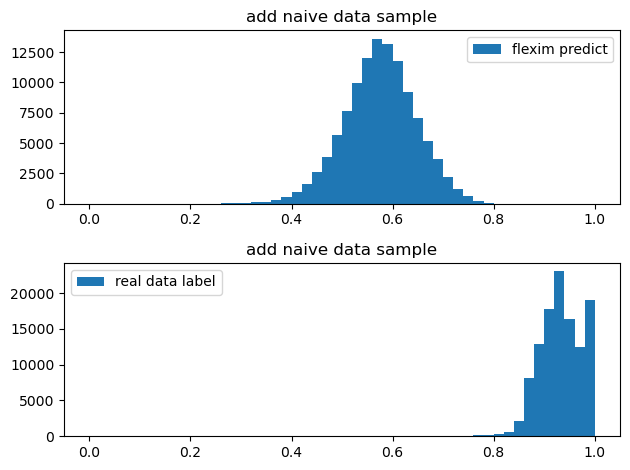

***** begin training *****
neg number flexim is 12850
pos number flexim is 78262
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 12:42:18.056551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.6592 - accuracy: 0.6072 - precision: 0.9030 - recall: 0.6080

2022-09-23 12:42:45.287401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.6592 - accuracy: 0.6072 - precision: 0.9030 - recall: 0.6080 - val_loss: 0.7070 - val_accuracy: 0.5556 - val_precision: 0.9462 - val_recall: 0.5120
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.6143 - accuracy: 0.6686 - precision: 0.9252 - recall: 0.6682 - val_loss: 0.5525 - val_accuracy: 0.7354 - val_precision: 0.9184 - val_recall: 0.7596
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.6065 - accuracy: 0.6731 - precision: 0.9283 - recall: 0.6714 - val_loss: 0.6648 - val_accuracy: 0.6181 - val_precision: 0.9393 - val_recall: 0.5940
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.6032 - accuracy: 0.6739 - precision: 0.9285 - recall: 0.6722 - val_loss: 0.5761 - val_accuracy: 0.7020 - val_precision: 0.9296 - val_recall: 0.7067
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5999 - accuracy: 0.

2022-09-23 12:47:21.056384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2105 - accuracy: 0.9579 - precision: 0.9997 - recall: 0.9580

2022-09-23 12:47:48.400152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2105 - accuracy: 0.9579 - precision: 0.9997 - recall: 0.9580 - val_loss: 0.1859 - val_accuracy: 0.9684 - val_precision: 1.0000 - val_recall: 0.9682
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1282 - accuracy: 0.9816 - precision: 1.0000 - recall: 0.9815 - val_loss: 0.1259 - val_accuracy: 0.9878 - val_precision: 1.0000 - val_recall: 0.9877
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1152 - accuracy: 0.9905 - precision: 1.0000 - recall: 0.9905 - val_loss: 0.1194 - val_accuracy: 0.9907 - val_precision: 1.0000 - val_recall: 0.9907
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1131 - accuracy: 0.9923 - precision: 1.0000 - recall: 0.9923 - val_loss: 0.1102 - val_accuracy: 0.9943 - val_precision: 1.0000 - val_recall: 0.9942
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1128 - accuracy: 0.

2022-09-23 12:52:25.866292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2355249524116516
 95/900 [==>...........................] - ETA: 1s

2022-09-23 12:52:27.467987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13007445633411407
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.30621892331207673
emd real is 0.031476284024588325


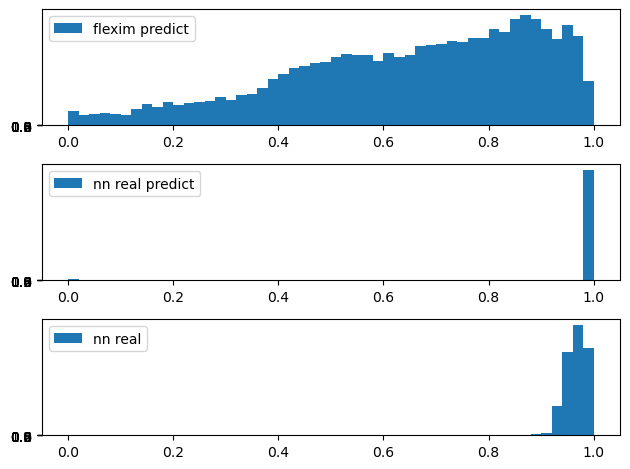

total query time is 10
wass distance flexim is 0.30621892331207673
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 16
label smoothing is 0.638200794537914


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 12:52:29.934563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 1.0938e-05 - accuracy: 0.4875
run into active learning emulate process
1/1 [==============================] - 0s 44ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.0516e-05 - accuracy: 0.6250

2022-09-23 12:52:30.498489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.273
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.364
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.75
5/5 [==============================] - 0s 4ms/step
query instance sha

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 13ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fetc

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.909
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 11
self.training_done is True
finish a

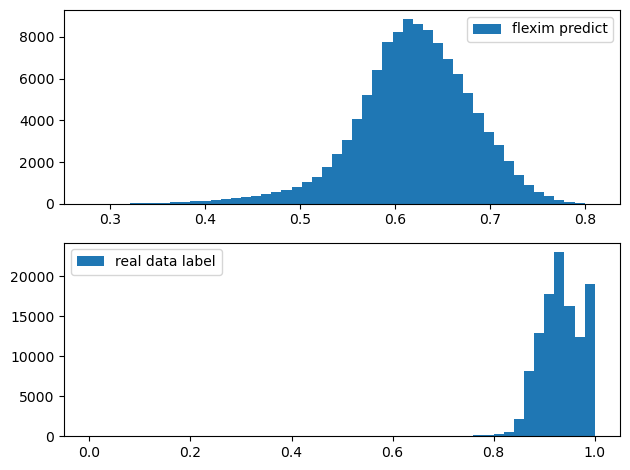

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


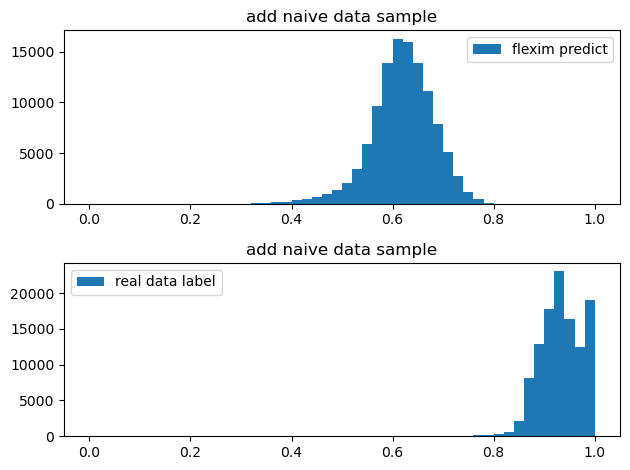

***** begin training *****
neg number flexim is 3405
pos number flexim is 87707
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 12:52:57.945954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3789 - accuracy: 0.8710 - precision: 0.9936 - recall: 0.8716

2022-09-23 12:53:24.904619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.3789 - accuracy: 0.8710 - precision: 0.9936 - recall: 0.8716 - val_loss: 0.2969 - val_accuracy: 0.9102 - val_precision: 0.9936 - val_recall: 0.9126
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3355 - accuracy: 0.8850 - precision: 0.9954 - recall: 0.8846 - val_loss: 0.4504 - val_accuracy: 0.8327 - val_precision: 0.9973 - val_recall: 0.8284
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.3199 - accuracy: 0.8861 - precision: 0.9958 - recall: 0.8854 - val_loss: 0.4099 - val_accuracy: 0.8524 - val_precision: 0.9971 - val_recall: 0.8492
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3147 - accuracy: 0.8850 - precision: 0.9959 - recall: 0.8842 - val_loss: 0.3586 - val_accuracy: 0.8734 - val_precision: 0.9967 - val_recall: 0.8713
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3117 - accuracy: 0.

2022-09-23 12:57:59.397139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9603 - precision: 0.9997 - recall: 0.9604

2022-09-23 12:58:26.523427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2048 - accuracy: 0.9603 - precision: 0.9997 - recall: 0.9604 - val_loss: 0.1681 - val_accuracy: 0.9785 - val_precision: 1.0000 - val_recall: 0.9784
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1274 - accuracy: 0.9882 - precision: 1.0000 - recall: 0.9882 - val_loss: 0.1226 - val_accuracy: 0.9914 - val_precision: 1.0000 - val_recall: 0.9914
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1150 - accuracy: 0.9933 - precision: 1.0000 - recall: 0.9933 - val_loss: 0.1131 - val_accuracy: 0.9932 - val_precision: 1.0000 - val_recall: 0.9932
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1128 - accuracy: 0.9941 - precision: 1.0000 - recall: 0.9940 - val_loss: 0.1148 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9938
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1113 - accuracy: 0.

2022-09-23 13:03:03.049660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.28741514682769775
 55/900 [>.............................] - ETA: 1s

2022-09-23 13:03:04.643177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13479512929916382
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.17869608403072657
emd real is 0.02770026187942782


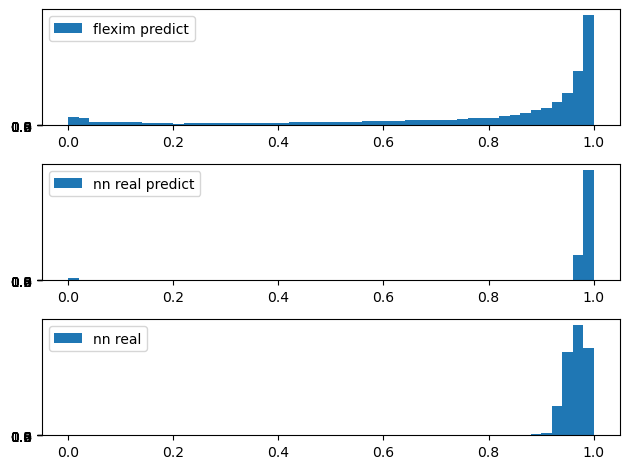

total query time is 11
wass distance flexim is 0.17869608403072657
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 1
label smoothing is 0.13802623246357398


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:03:07.106273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 0.3325 - accuracy: 0.5563
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.7812

2022-09-23 13:03:07.720434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.295
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.295
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.364
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 12
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

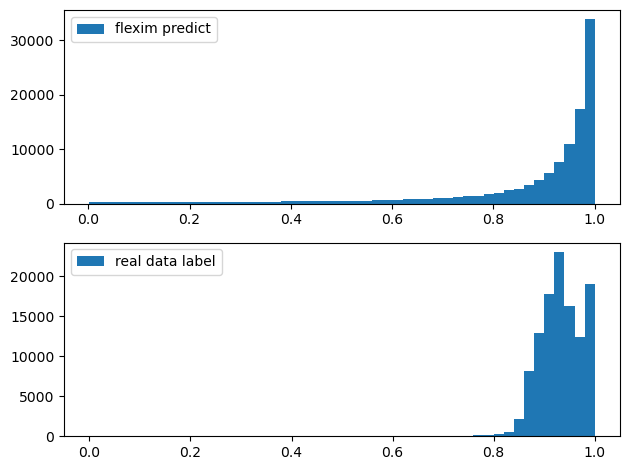

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


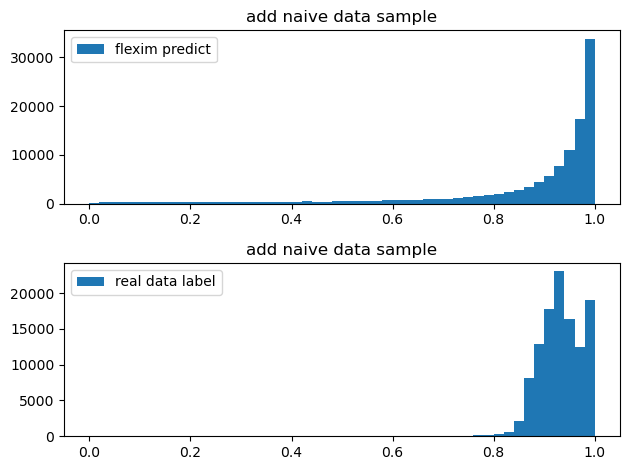

***** begin training *****
neg number flexim is 7221
pos number flexim is 83891
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:03:36.433685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5782 - accuracy: 0.7484 - precision: 0.9587 - recall: 0.7595

2022-09-23 13:04:04.348775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.5782 - accuracy: 0.7484 - precision: 0.9587 - recall: 0.7595 - val_loss: 0.6066 - val_accuracy: 0.7059 - val_precision: 0.9755 - val_recall: 0.6984
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5292 - accuracy: 0.7665 - precision: 0.9700 - recall: 0.7702 - val_loss: 0.5140 - val_accuracy: 0.7724 - val_precision: 0.9742 - val_recall: 0.7735
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5135 - accuracy: 0.7772 - precision: 0.9718 - recall: 0.7807 - val_loss: 0.5432 - val_accuracy: 0.7591 - val_precision: 0.9765 - val_recall: 0.7569
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5053 - accuracy: 0.7833 - precision: 0.9723 - recall: 0.7871 - val_loss: 0.5172 - val_accuracy: 0.7737 - val_precision: 0.9756 - val_recall: 0.7738
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5014 - accuracy: 0.

2022-09-23 13:08:40.583008: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2008 - accuracy: 0.9619 - precision: 0.9997 - recall: 0.9620

2022-09-23 13:09:07.682393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2008 - accuracy: 0.9619 - precision: 0.9997 - recall: 0.9620 - val_loss: 0.1676 - val_accuracy: 0.9800 - val_precision: 1.0000 - val_recall: 0.9799
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1253 - accuracy: 0.9884 - precision: 1.0000 - recall: 0.9884 - val_loss: 0.1225 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1126 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1116 - val_accuracy: 0.9933 - val_precision: 1.0000 - val_recall: 0.9933
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1116 - accuracy: 0.9942 - precision: 1.0000 - recall: 0.9941 - val_loss: 0.1079 - val_accuracy: 0.9955 - val_precision: 1.0000 - val_recall: 0.9955
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1108 - accuracy: 0.

2022-09-23 13:13:43.233481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.267118901014328
 90/900 [==>...........................] - ETA: 1s

2022-09-23 13:13:45.056210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12958437204360962
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.28249296021100034
emd real is 0.028606949559132934


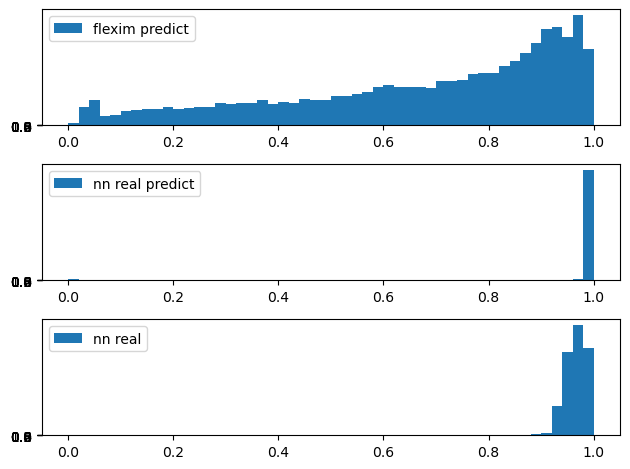

total query time is 15
wass distance flexim is 0.28249296021100034
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 14
label smoothing is 0.6719311540240261


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:13:47.608485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 4.1970e-05 - accuracy: 0.5375
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 4.0069e-05 - accuracy: 0.7812

2022-09-23 13:13:48.177279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.136
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.5
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.636
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.864
2/2 [==============================] - 0s 2ms/step
emulate process fin

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [===============

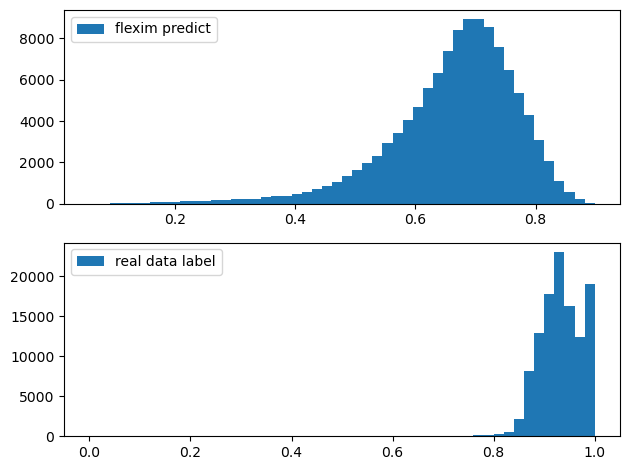

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


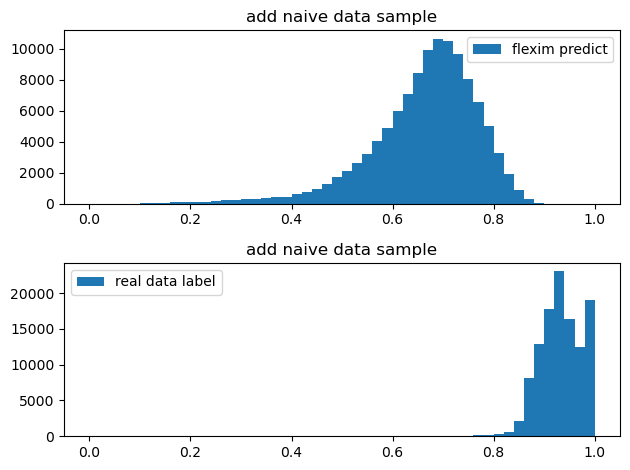

***** begin training *****
neg number flexim is 6835
pos number flexim is 84277
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:14:15.617238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5058 - accuracy: 0.7860 - precision: 0.9737 - recall: 0.7900

2022-09-23 13:14:42.728370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5058 - accuracy: 0.7860 - precision: 0.9737 - recall: 0.7900 - val_loss: 0.4424 - val_accuracy: 0.8221 - val_precision: 0.9744 - val_recall: 0.8302
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4879 - accuracy: 0.7866 - precision: 0.9765 - recall: 0.7882 - val_loss: 0.4515 - val_accuracy: 0.8124 - val_precision: 0.9765 - val_recall: 0.8176
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4780 - accuracy: 0.7864 - precision: 0.9765 - recall: 0.7880 - val_loss: 0.4107 - val_accuracy: 0.8358 - val_precision: 0.9739 - val_recall: 0.8458
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4698 - accuracy: 0.7848 - precision: 0.9774 - recall: 0.7856 - val_loss: 0.3914 - val_accuracy: 0.8411 - val_precision: 0.9747 - val_recall: 0.8509
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4591 - accuracy: 0.

2022-09-23 13:19:16.574734: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2027 - accuracy: 0.9597 - precision: 0.9997 - recall: 0.9597

2022-09-23 13:19:43.413115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.2027 - accuracy: 0.9597 - precision: 0.9997 - recall: 0.9597 - val_loss: 0.1896 - val_accuracy: 0.9708 - val_precision: 1.0000 - val_recall: 0.9707
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1296 - accuracy: 0.9856 - precision: 1.0000 - recall: 0.9856 - val_loss: 0.1258 - val_accuracy: 0.9904 - val_precision: 1.0000 - val_recall: 0.9904
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1146 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9928 - val_loss: 0.1179 - val_accuracy: 0.9918 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1117 - accuracy: 0.9939 - precision: 1.0000 - recall: 0.9939 - val_loss: 0.1133 - val_accuracy: 0.9928 - val_precision: 1.0000 - val_recall: 0.9928
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1108 - accuracy: 0.

2022-09-23 13:24:16.631400: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.3006270229816437
 58/900 [>.............................] - ETA: 1s

2022-09-23 13:24:18.222977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12954990565776825
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.29242403875149303
emd real is 0.029283230965781292


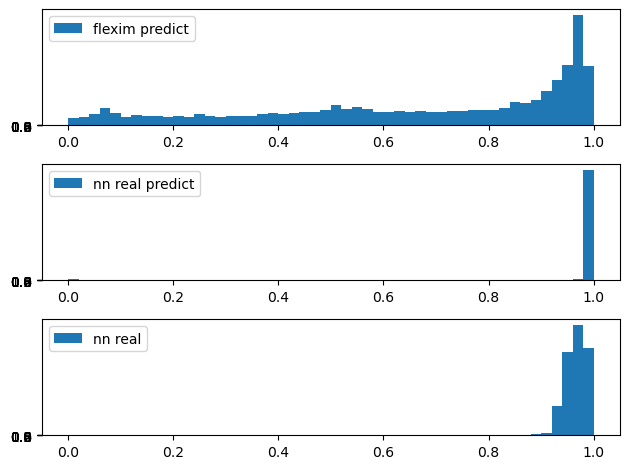

total query time is 10
wass distance flexim is 0.29242403875149303
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 12
label smoothing is 0.6193693825489281


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:24:20.748930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 22ms/step - loss: 1.5524e-04 - accuracy: 0.6125
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.4651e-04 - accuracy: 0.7812

2022-09-23 13:24:21.389182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step
1 time active learning score is 0.455
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.455
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.455
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.795
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 8ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [====================

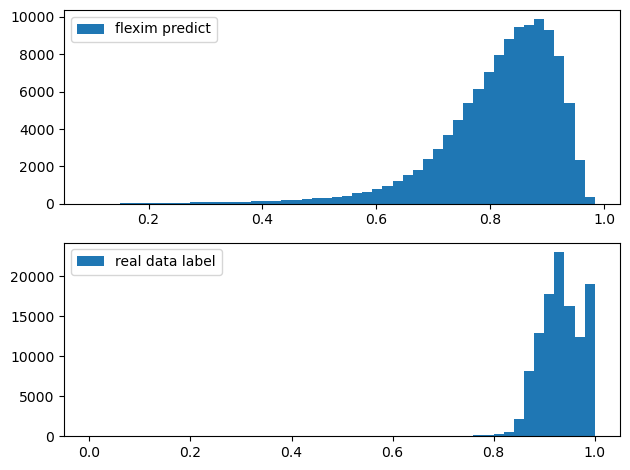

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


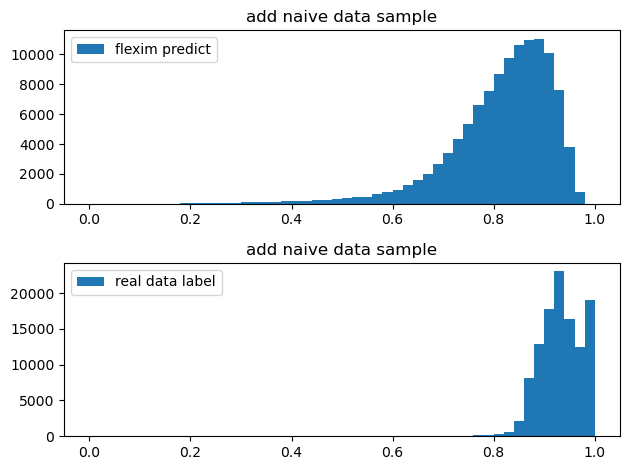

***** begin training *****
neg number flexim is 1693
pos number flexim is 89419
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:24:49.115150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3214 - accuracy: 0.8829 - precision: 0.9978 - recall: 0.8826

2022-09-23 13:25:15.973851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3214 - accuracy: 0.8829 - precision: 0.9978 - recall: 0.8826 - val_loss: 0.3787 - val_accuracy: 0.8616 - val_precision: 0.9994 - val_recall: 0.8594
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.2890 - accuracy: 0.8948 - precision: 0.9987 - recall: 0.8940 - val_loss: 0.3548 - val_accuracy: 0.8803 - val_precision: 0.9995 - val_recall: 0.8784
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.2820 - accuracy: 0.9013 - precision: 0.9988 - recall: 0.9005 - val_loss: 0.3455 - val_accuracy: 0.8929 - val_precision: 0.9994 - val_recall: 0.8913
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.2795 - accuracy: 0.9082 - precision: 0.9990 - recall: 0.9074 - val_loss: 0.3576 - val_accuracy: 0.8840 - val_precision: 0.9995 - val_recall: 0.8822
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.2775 - accuracy: 0.

2022-09-23 13:29:48.941763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1994 - accuracy: 0.9589 - precision: 0.9998 - recall: 0.9590

2022-09-23 13:30:16.116947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.1994 - accuracy: 0.9589 - precision: 0.9998 - recall: 0.9590 - val_loss: 0.1812 - val_accuracy: 0.9731 - val_precision: 1.0000 - val_recall: 0.9730
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1274 - accuracy: 0.9863 - precision: 1.0000 - recall: 0.9862 - val_loss: 0.1242 - val_accuracy: 0.9905 - val_precision: 1.0000 - val_recall: 0.9904
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1143 - accuracy: 0.9930 - precision: 1.0000 - recall: 0.9929 - val_loss: 0.1113 - val_accuracy: 0.9942 - val_precision: 1.0000 - val_recall: 0.9942
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1126 - accuracy: 0.9937 - precision: 1.0000 - recall: 0.9937 - val_loss: 0.1167 - val_accuracy: 0.9921 - val_precision: 1.0000 - val_recall: 0.9920
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1113 - accuracy: 0.

2022-09-23 13:34:51.367520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2927333116531372
 61/900 [=>............................] - ETA: 1s

2022-09-23 13:34:52.962049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13214288651943207
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.1914308455966995
emd real is 0.03092475989950688


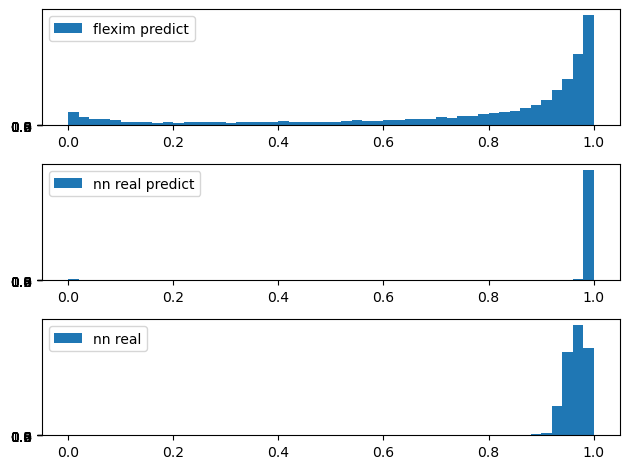

total query time is 11
wass distance flexim is 0.1914308455966995
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 15
label smoothing is 0.5942085005291812


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:34:55.472266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 2.0360e-05 - accuracy: 0.6250
run into active learning emulate process
1/1 [==============================] - 0s 51ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 2.0196e-05 - accuracy: 0.6250

2022-09-23 13:34:56.074013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.068
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate proce

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 22ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.682
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [====================

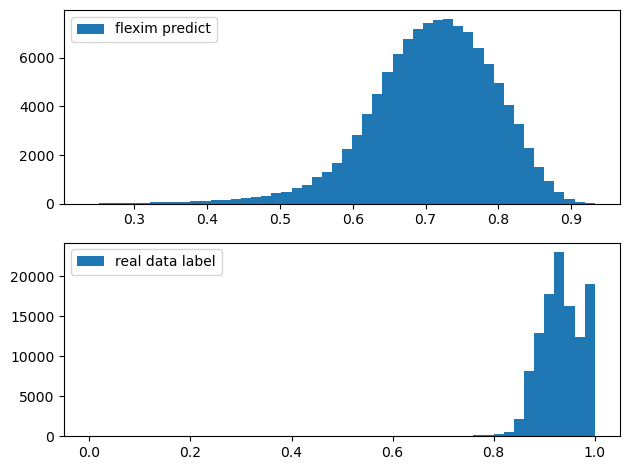

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


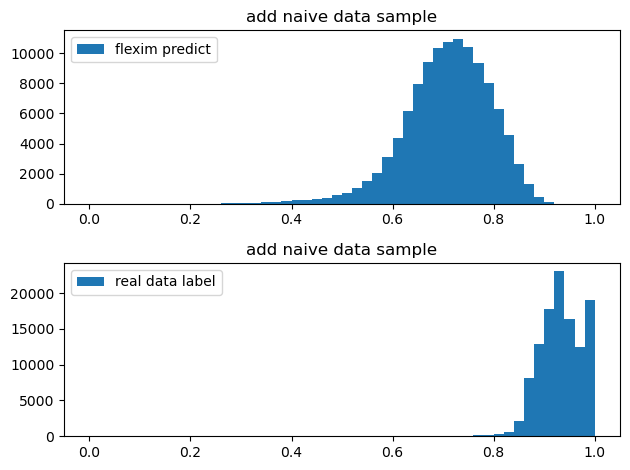

***** begin training *****
neg number flexim is 1887
pos number flexim is 89225
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:35:23.596633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3814 - accuracy: 0.8612 - precision: 0.9960 - recall: 0.8617

2022-09-23 13:35:50.653478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3814 - accuracy: 0.8612 - precision: 0.9960 - recall: 0.8617 - val_loss: 0.3254 - val_accuracy: 0.8877 - val_precision: 0.9966 - val_recall: 0.8884
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3394 - accuracy: 0.8674 - precision: 0.9976 - recall: 0.8667 - val_loss: 0.3231 - val_accuracy: 0.8902 - val_precision: 0.9972 - val_recall: 0.8904
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.3318 - accuracy: 0.8721 - precision: 0.9979 - recall: 0.8712 - val_loss: 0.4310 - val_accuracy: 0.8389 - val_precision: 0.9988 - val_recall: 0.8365
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3307 - accuracy: 0.8725 - precision: 0.9979 - recall: 0.8717 - val_loss: 0.3396 - val_accuracy: 0.8797 - val_precision: 0.9978 - val_recall: 0.8792
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.3267 - accuracy: 0.

2022-09-23 13:40:27.864444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1986 - accuracy: 0.9603 - precision: 0.9998 - recall: 0.9603

2022-09-23 13:40:57.878252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 35s 12ms/step - loss: 0.1986 - accuracy: 0.9603 - precision: 0.9998 - recall: 0.9603 - val_loss: 0.1915 - val_accuracy: 0.9673 - val_precision: 1.0000 - val_recall: 0.9672
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1269 - accuracy: 0.9854 - precision: 1.0000 - recall: 0.9853 - val_loss: 0.1223 - val_accuracy: 0.9897 - val_precision: 1.0000 - val_recall: 0.9897
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1151 - accuracy: 0.9910 - precision: 1.0000 - recall: 0.9910 - val_loss: 0.1259 - val_accuracy: 0.9891 - val_precision: 1.0000 - val_recall: 0.9890
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1141 - accuracy: 0.9921 - precision: 1.0000 - recall: 0.9920 - val_loss: 0.1138 - val_accuracy: 0.9923 - val_precision: 1.0000 - val_recall: 0.9923
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.1130 - accuracy: 0.

2022-09-23 13:46:21.577321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2798985540866852
 47/900 [>.............................] - ETA: 1s

2022-09-23 13:46:23.605177: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13199684023857117
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.18465080994045294
emd real is 0.031164443726408322


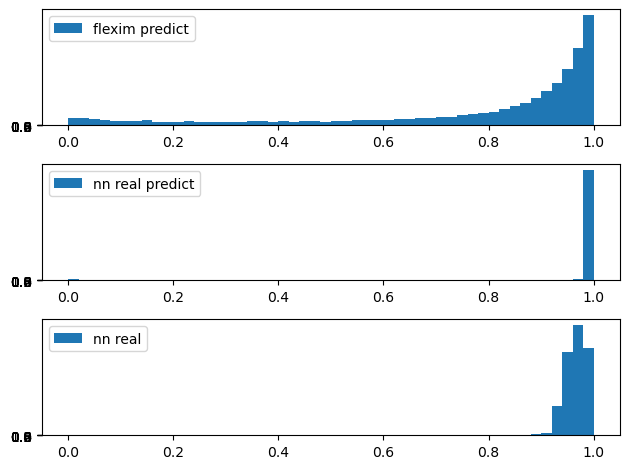

total query time is 11
wass distance flexim is 0.18465080994045294
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 15
label smoothing is 0.19542039242128767


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:46:26.547411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 2.1814e-05 - accuracy: 0.6250
run into active learning emulate process
1/1 [==============================] - 0s 66ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 2.4414e-05 - accuracy: 0.4375

2022-09-23 13:46:27.324986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 28ms/step
1 time active learning score is 0.159
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 7ms/step
3 time active learning score is 0.5
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.955
2/2 [==============================] - 0s 2ms/step
emulate process finishe

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 21ms/step - loss: 2.1764e-05 - accuracy: 0.6473
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.854
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 15ms/step - loss: 1.3306e-05 - accuracy: 0.8416
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/st

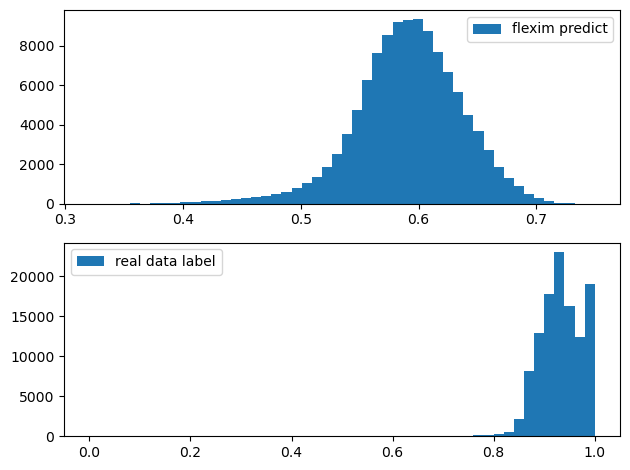

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


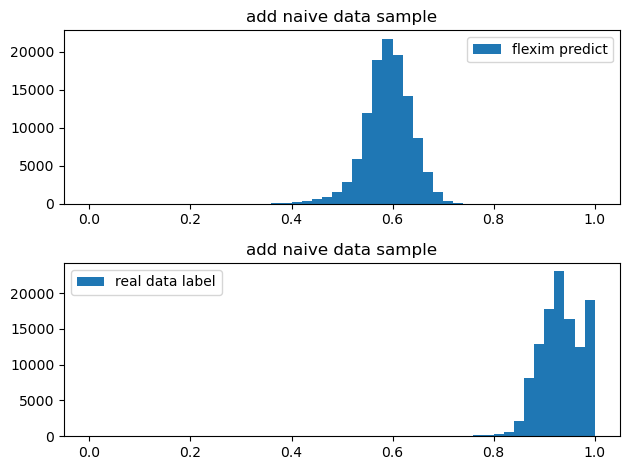

***** begin training *****
neg number flexim is 3081
pos number flexim is 88031
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:46:58.930507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3488 - accuracy: 0.8772 - precision: 0.9955 - recall: 0.8768

2022-09-23 13:47:31.990608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.3488 - accuracy: 0.8772 - precision: 0.9955 - recall: 0.8768 - val_loss: 0.3888 - val_accuracy: 0.8663 - val_precision: 0.9977 - val_recall: 0.8633
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.3106 - accuracy: 0.8938 - precision: 0.9972 - recall: 0.8927 - val_loss: 0.3115 - val_accuracy: 0.9038 - val_precision: 0.9964 - val_recall: 0.9034
Epoch 3/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.3018 - accuracy: 0.8990 - precision: 0.9970 - recall: 0.8982 - val_loss: 0.2881 - val_accuracy: 0.9147 - val_precision: 0.9954 - val_recall: 0.9157
Epoch 4/10
2848/2848 [==============================] - 36s 12ms/step - loss: 0.2962 - accuracy: 0.9003 - precision: 0.9972 - recall: 0.8994 - val_loss: 0.3108 - val_accuracy: 0.9017 - val_precision: 0.9970 - val_recall: 0.9008
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.2939 - accuracy: 0.

2022-09-23 13:53:06.217407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2021 - accuracy: 0.9599 - precision: 0.9997 - recall: 0.9600

2022-09-23 13:53:39.648459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 40s 14ms/step - loss: 0.2021 - accuracy: 0.9599 - precision: 0.9997 - recall: 0.9600 - val_loss: 0.1810 - val_accuracy: 0.9734 - val_precision: 1.0000 - val_recall: 0.9733
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1299 - accuracy: 0.9859 - precision: 1.0000 - recall: 0.9858 - val_loss: 0.1358 - val_accuracy: 0.9885 - val_precision: 1.0000 - val_recall: 0.9885
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1151 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.1296 - val_accuracy: 0.9913 - val_precision: 1.0000 - val_recall: 0.9913
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1119 - accuracy: 0.9938 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1112 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9937
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1111 - accuracy: 0.

2022-09-23 13:59:02.044597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2692170739173889
 46/900 [>.............................] - ETA: 1s

2022-09-23 13:59:03.926652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13146020472049713
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.13021566373349475
emd real is 0.028765728920100323


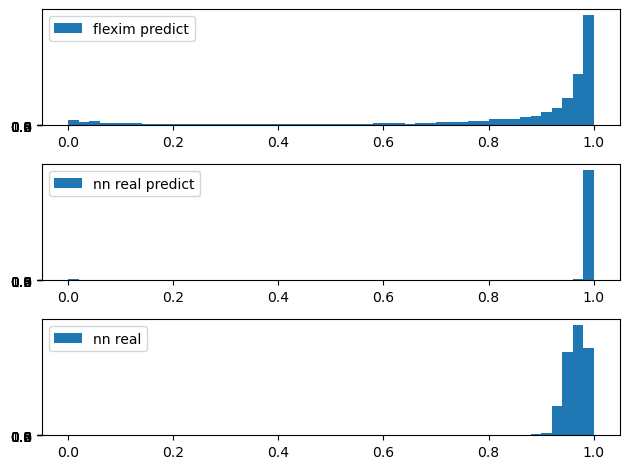

total query time is 10
wass distance flexim is 0.13021566373349475
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 11
label smoothing is 0.7


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 13:59:06.873960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 23ms/step - loss: 3.2080e-04 - accuracy: 0.6687
run into active learning emulate process
1/1 [==============================] - 0s 61ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 2.9448e-04 - accuracy: 0.8125

2022-09-23 13:59:07.622296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 28ms/step
1 time active learning score is 0.136
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.341
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.432
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.614
5/5 [==============================] - 0s 8ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


10/10 [==============================] - 0s 19ms/step - loss: 2.1520e-04 - accuracy: 0.7966
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 16ms/step - loss: 2.1459e-04 - accuracy: 0.8099
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/st

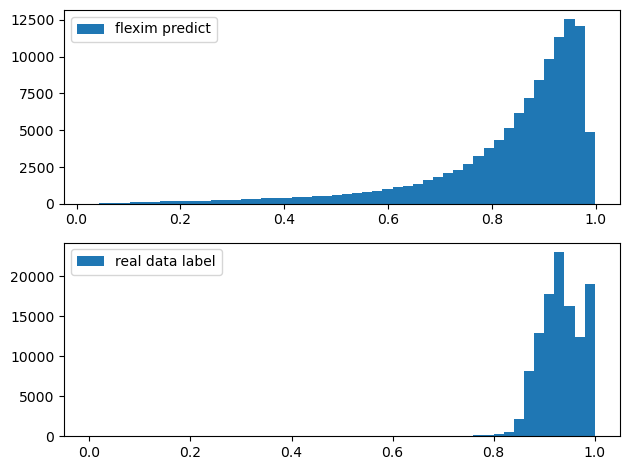

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


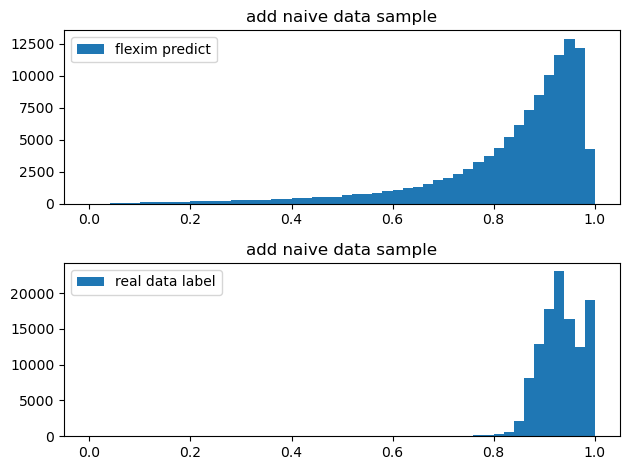

***** begin training *****
neg number flexim is 4878
pos number flexim is 86234
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 13:59:40.120317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4882 - accuracy: 0.8106 - precision: 0.9814 - recall: 0.8154

2022-09-23 14:00:12.589746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.4882 - accuracy: 0.8106 - precision: 0.9814 - recall: 0.8154 - val_loss: 0.4310 - val_accuracy: 0.8491 - val_precision: 0.9851 - val_recall: 0.8529
Epoch 2/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.4217 - accuracy: 0.8300 - precision: 0.9876 - recall: 0.8308 - val_loss: 0.4553 - val_accuracy: 0.8164 - val_precision: 0.9918 - val_recall: 0.8120
Epoch 3/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.4026 - accuracy: 0.8364 - precision: 0.9890 - recall: 0.8364 - val_loss: 0.2923 - val_accuracy: 0.9049 - val_precision: 0.9806 - val_recall: 0.9172
Epoch 4/10
2848/2848 [==============================] - 36s 12ms/step - loss: 0.3944 - accuracy: 0.8379 - precision: 0.9897 - recall: 0.8375 - val_loss: 0.4065 - val_accuracy: 0.8414 - val_precision: 0.9905 - val_recall: 0.8399
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.3879 - accuracy: 0.

2022-09-23 14:05:47.684433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2066 - accuracy: 0.9600 - precision: 0.9997 - recall: 0.9601

2022-09-23 14:06:21.968538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 40s 14ms/step - loss: 0.2066 - accuracy: 0.9600 - precision: 0.9997 - recall: 0.9601 - val_loss: 0.1653 - val_accuracy: 0.9790 - val_precision: 1.0000 - val_recall: 0.9789
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1285 - accuracy: 0.9884 - precision: 1.0000 - recall: 0.9883 - val_loss: 0.1200 - val_accuracy: 0.9939 - val_precision: 1.0000 - val_recall: 0.9939
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1157 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9933 - val_loss: 0.1114 - val_accuracy: 0.9941 - val_precision: 1.0000 - val_recall: 0.9941
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.1127 - accuracy: 0.9942 - precision: 1.0000 - recall: 0.9941 - val_loss: 0.1127 - val_accuracy: 0.9935 - val_precision: 1.0000 - val_recall: 0.9934
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.1123 - accuracy: 0.

2022-09-23 14:11:34.665143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2972591817378998
 47/900 [>.............................] - ETA: 1s

2022-09-23 14:11:36.635066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13093902170658112
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.21662923363699602
emd real is 0.02945931667146872


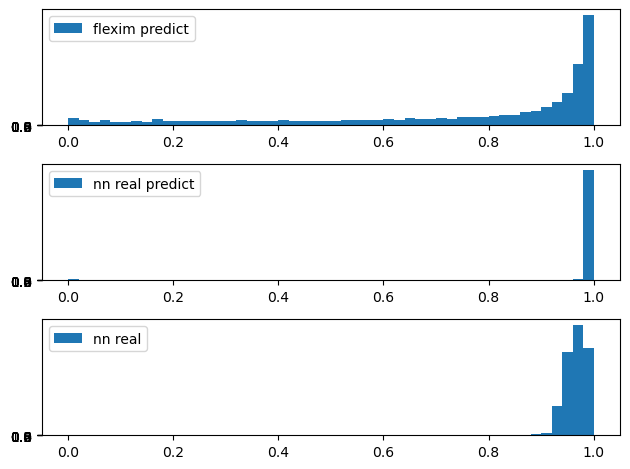

total query time is 12
wass distance flexim is 0.21662923363699602
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 14
label smoothing is 0.7


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 14:11:39.482932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 4.1049e-05 - accuracy: 0.6438
run into active learning emulate process
1/1 [==============================] - 0s 68ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 4.2080e-05 - accuracy: 0.4062

2022-09-23 14:11:40.215211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 31ms/step
1 time active learning score is 0.045
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.5
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.705
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.705
5/5 [==============================] - 0s 7ms/step
query instance shap

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 24ms/step - loss: 3.6507e-05 - accuracy: 0.6760
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 30ms/step
1 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 15ms/step - loss: 2.8018e-05 - accuracy: 0.8060
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms

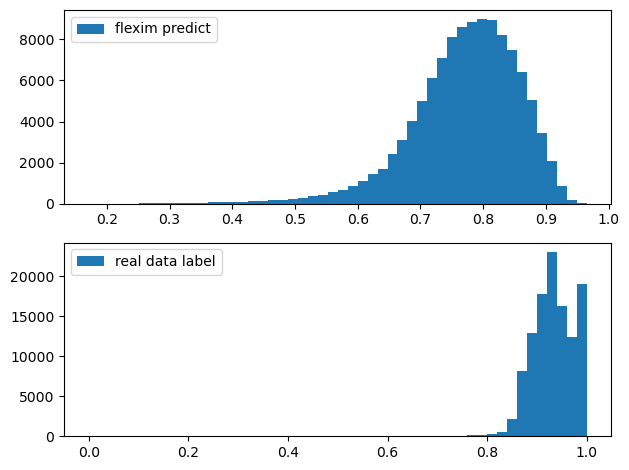

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


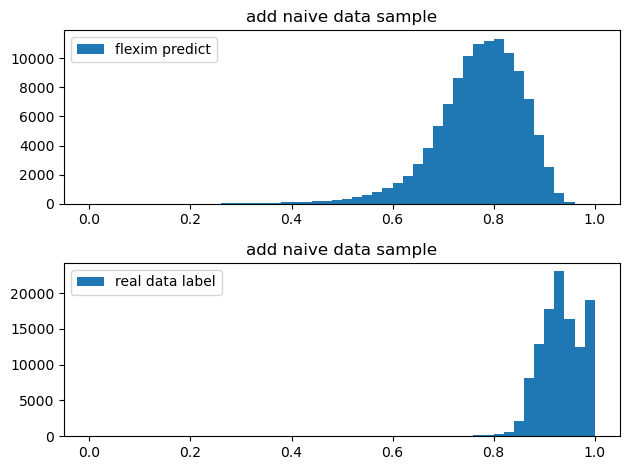

***** begin training *****
neg number flexim is 1094
pos number flexim is 90018
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 14:12:09.856923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3659 - accuracy: 0.8788 - precision: 0.9980 - recall: 0.8790

2022-09-23 14:12:37.692779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.3659 - accuracy: 0.8788 - precision: 0.9980 - recall: 0.8790 - val_loss: 0.3041 - val_accuracy: 0.9025 - val_precision: 0.9986 - val_recall: 0.9025
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3313 - accuracy: 0.8913 - precision: 0.9988 - recall: 0.8910 - val_loss: 0.3011 - val_accuracy: 0.9088 - val_precision: 0.9988 - val_recall: 0.9088
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3235 - accuracy: 0.9031 - precision: 0.9989 - recall: 0.9029 - val_loss: 0.3713 - val_accuracy: 0.8839 - val_precision: 0.9991 - val_recall: 0.8832
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3196 - accuracy: 0.9079 - precision: 0.9989 - recall: 0.9078 - val_loss: 0.3440 - val_accuracy: 0.9007 - val_precision: 0.9991 - val_recall: 0.9003
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3155 - accuracy: 0.

2022-09-23 14:17:21.520996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2031 - accuracy: 0.9554 - precision: 0.9998 - recall: 0.9554

2022-09-23 14:17:49.029109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2031 - accuracy: 0.9554 - precision: 0.9998 - recall: 0.9554 - val_loss: 0.1662 - val_accuracy: 0.9779 - val_precision: 1.0000 - val_recall: 0.9778
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1285 - accuracy: 0.9833 - precision: 1.0000 - recall: 0.9832 - val_loss: 0.1250 - val_accuracy: 0.9888 - val_precision: 1.0000 - val_recall: 0.9888
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1148 - accuracy: 0.9910 - precision: 1.0000 - recall: 0.9910 - val_loss: 0.1180 - val_accuracy: 0.9912 - val_precision: 1.0000 - val_recall: 0.9911
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1139 - accuracy: 0.9916 - precision: 1.0000 - recall: 0.9916 - val_loss: 0.1156 - val_accuracy: 0.9920 - val_precision: 1.0000 - val_recall: 0.9920
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1135 - accuracy: 0.

2022-09-23 14:22:35.230069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.22787559032440186
 41/900 [>.............................] - ETA: 2s

2022-09-23 14:22:37.290050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.134705051779747
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.19738366683577024
emd real is 0.032720732820221934


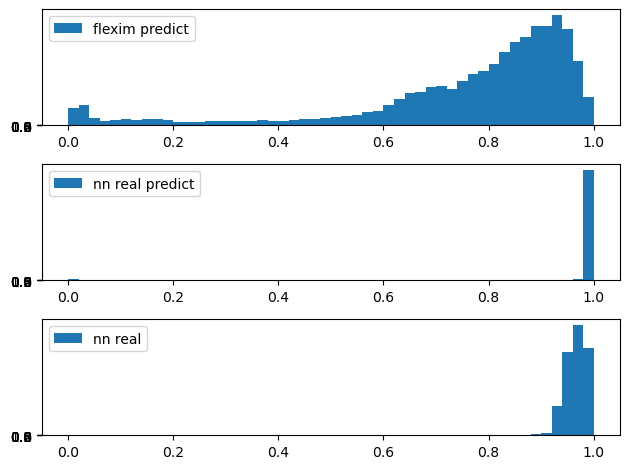

total query time is 11
wass distance flexim is 0.19738366683577024
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 9
label smoothing is 0.3125934117122151


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 14:22:39.931057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 0.0011 - accuracy: 0.7063
run into active learning emulate process
1/1 [==============================] - 0s 67ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0021 - accuracy: 0.6562

2022-09-23 14:22:40.712711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.205
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.477
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 8ms/step
3 time active learning score is 0.545
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.568
5/5 [==============================] - 0s 9ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 14ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 30ms/step
1 time active learning score is 0.917
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 16ms/step - loss: 6.3022e-04 - accuracy: 0.8763
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 8ms/step
active learning initial score is 0.905
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/ste

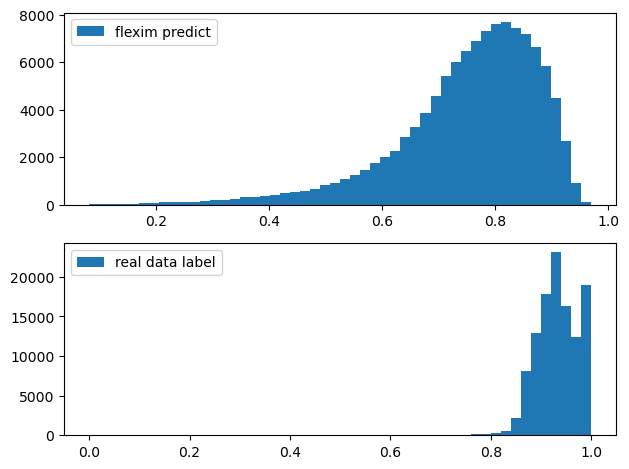

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


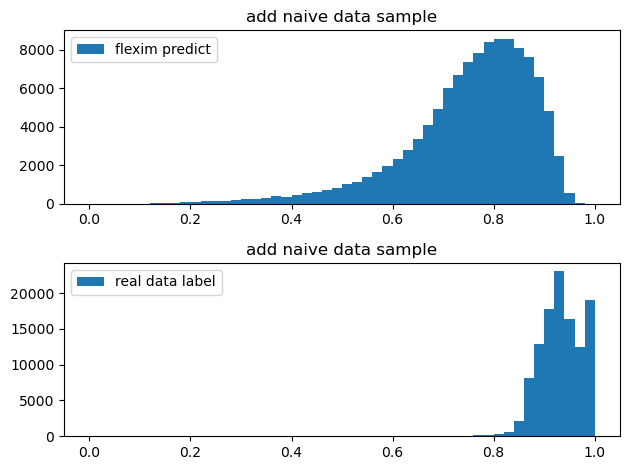

***** begin training *****
neg number flexim is 4387
pos number flexim is 86725
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 14:23:10.683238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.8243 - precision: 0.9839 - recall: 0.8291

2022-09-23 14:23:40.213866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 35s 12ms/step - loss: 0.4724 - accuracy: 0.8243 - precision: 0.9839 - recall: 0.8291 - val_loss: 0.4725 - val_accuracy: 0.8086 - val_precision: 0.9902 - val_recall: 0.8066
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.3946 - accuracy: 0.8310 - precision: 0.9902 - recall: 0.8307 - val_loss: 0.4340 - val_accuracy: 0.8243 - val_precision: 0.9932 - val_recall: 0.8207
Epoch 3/10
2848/2848 [==============================] - 33s 12ms/step - loss: 0.3849 - accuracy: 0.8336 - precision: 0.9915 - recall: 0.8323 - val_loss: 0.3825 - val_accuracy: 0.8539 - val_precision: 0.9912 - val_recall: 0.8539
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.3808 - accuracy: 0.8373 - precision: 0.9918 - recall: 0.8360 - val_loss: 0.4203 - val_accuracy: 0.8347 - val_precision: 0.9935 - val_recall: 0.8315
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3772 - accuracy: 0.

2022-09-23 14:28:27.497786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2054 - accuracy: 0.9586 - precision: 0.9997 - recall: 0.9587

2022-09-23 14:29:00.789838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.2054 - accuracy: 0.9586 - precision: 0.9997 - recall: 0.9587 - val_loss: 0.1701 - val_accuracy: 0.9790 - val_precision: 1.0000 - val_recall: 0.9789
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1316 - accuracy: 0.9841 - precision: 1.0000 - recall: 0.9840 - val_loss: 0.1363 - val_accuracy: 0.9882 - val_precision: 1.0000 - val_recall: 0.9881
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1169 - accuracy: 0.9920 - precision: 1.0000 - recall: 0.9920 - val_loss: 0.1248 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1140 - accuracy: 0.9936 - precision: 1.0000 - recall: 0.9936 - val_loss: 0.1144 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9937
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1129 - accuracy: 0.

2022-09-23 14:33:48.408958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2911043167114258
 57/900 [>.............................] - ETA: 1s

2022-09-23 14:33:50.105409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13393332064151764
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2195256111909454
emd real is 0.028998250144148113


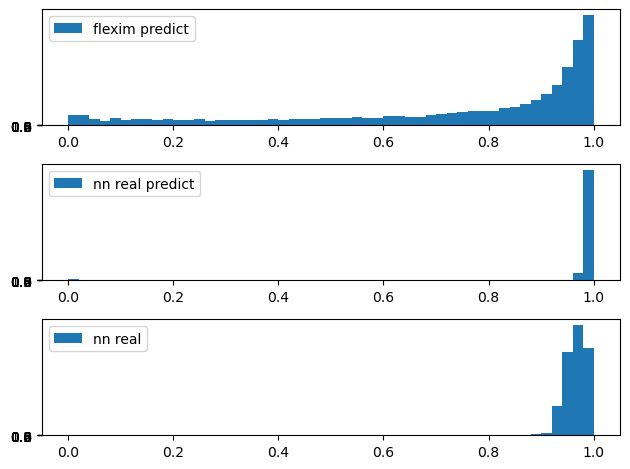

total query time is 11
wass distance flexim is 0.2195256111909454
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 0
label smoothing is 0.1442255566606354


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 14:33:52.725561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 23ms/step - loss: 0.6290 - accuracy: 0.7438
run into active learning emulate process
1/1 [==============================] - 0s 66ms/step
active learning initial score is 0.476
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.8125

2022-09-23 14:33:53.490442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.25
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.205
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.25
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.5
5/5 [==============================] - 0s 8ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


11/11 [==============================] - 0s 18ms/step - loss: 0.4682 - accuracy: 0.8889
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 2m

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 15
self.training_done is True
finish all cluster binary and active search
make modification new new
generate cosine naive positive and negative data new
length of next_result_table is 2
result table shape is (10, 101)
(generato

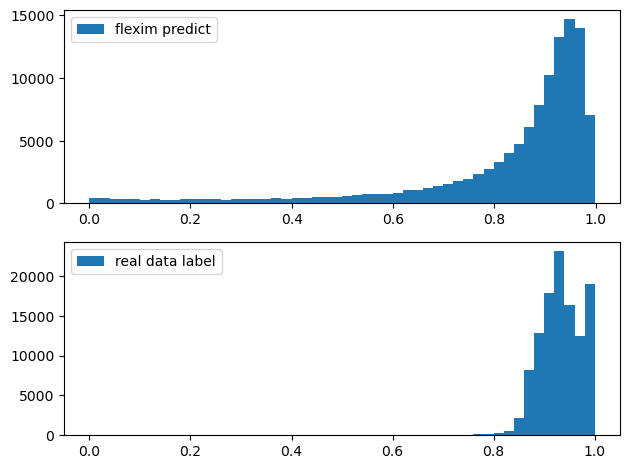

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


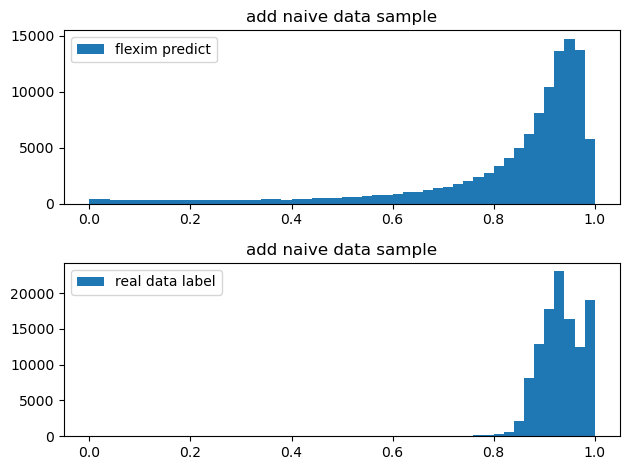

***** begin training *****
neg number flexim is 7471
pos number flexim is 83641
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 14:34:23.988558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5058 - accuracy: 0.7994 - precision: 0.9694 - recall: 0.8069

2022-09-23 14:34:52.248160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.5058 - accuracy: 0.7994 - precision: 0.9694 - recall: 0.8069 - val_loss: 0.4805 - val_accuracy: 0.8089 - val_precision: 0.9754 - val_recall: 0.8122
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4541 - accuracy: 0.8038 - precision: 0.9782 - recall: 0.8042 - val_loss: 0.5472 - val_accuracy: 0.7480 - val_precision: 0.9813 - val_recall: 0.7395
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4425 - accuracy: 0.8007 - precision: 0.9808 - recall: 0.7986 - val_loss: 0.4142 - val_accuracy: 0.8291 - val_precision: 0.9766 - val_recall: 0.8337
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.4369 - accuracy: 0.8027 - precision: 0.9811 - recall: 0.8006 - val_loss: 0.4791 - val_accuracy: 0.7932 - val_precision: 0.9839 - val_recall: 0.7875
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.4322 - accuracy: 0.

2022-09-23 14:39:40.632012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2058 - accuracy: 0.9580 - precision: 0.9997 - recall: 0.9581

2022-09-23 14:40:09.921837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 34s 12ms/step - loss: 0.2058 - accuracy: 0.9580 - precision: 0.9997 - recall: 0.9581 - val_loss: 0.1643 - val_accuracy: 0.9807 - val_precision: 1.0000 - val_recall: 0.9807
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1292 - accuracy: 0.9854 - precision: 1.0000 - recall: 0.9854 - val_loss: 0.1262 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1145 - accuracy: 0.9929 - precision: 1.0000 - recall: 0.9929 - val_loss: 0.1187 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1113 - accuracy: 0.9940 - precision: 1.0000 - recall: 0.9939 - val_loss: 0.1133 - val_accuracy: 0.9927 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1108 - accuracy: 0.

2022-09-23 14:44:59.322331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2867833077907562
 52/900 [>.............................] - ETA: 1s

2022-09-23 14:45:00.989703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13080210983753204
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.24223612684950835
emd real is 0.02721743484232403


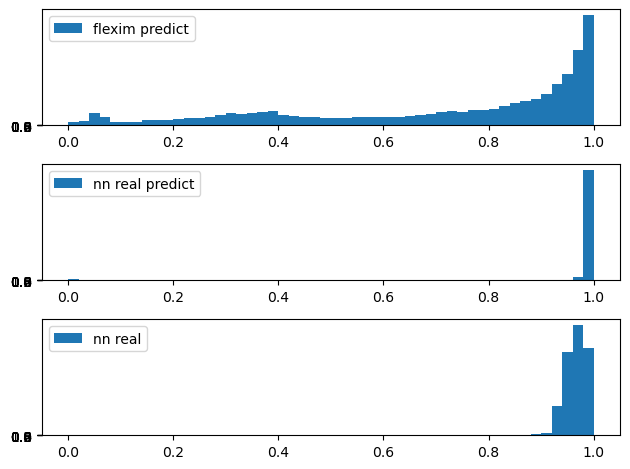

total query time is 15
wass distance flexim is 0.24223612684950835
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 4
label smoothing is 0.6598074493748285


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 14:45:03.583451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 0.0411 - accuracy: 0.5813
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0381 - accuracy: 0.7188

2022-09-23 14:45:04.241330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.068
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.364
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.432
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.386
5/5 [==============================] - 0s 7ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.667
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.833
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

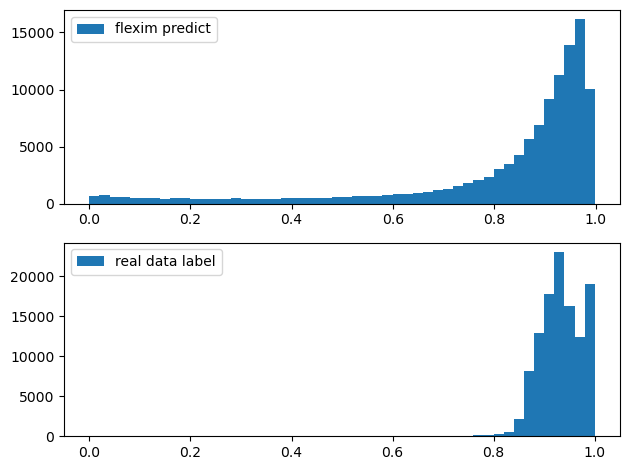

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


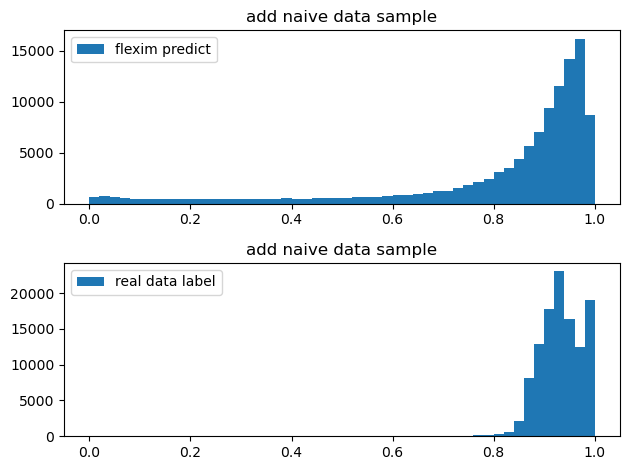

***** begin training *****
neg number flexim is 10209
pos number flexim is 80903
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 14:45:34.356860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.6097 - accuracy: 0.6733 - precision: 0.9439 - recall: 0.6721

2022-09-23 14:46:02.814204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.6097 - accuracy: 0.6733 - precision: 0.9439 - recall: 0.6721 - val_loss: 0.5066 - val_accuracy: 0.7499 - val_precision: 0.9543 - val_recall: 0.7558
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5527 - accuracy: 0.7007 - precision: 0.9633 - recall: 0.6892 - val_loss: 0.6272 - val_accuracy: 0.6596 - val_precision: 0.9755 - val_recall: 0.6342
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5476 - accuracy: 0.7060 - precision: 0.9629 - recall: 0.6958 - val_loss: 0.4847 - val_accuracy: 0.7580 - val_precision: 0.9577 - val_recall: 0.7624
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5441 - accuracy: 0.7051 - precision: 0.9641 - recall: 0.6937 - val_loss: 0.4577 - val_accuracy: 0.7715 - val_precision: 0.9537 - val_recall: 0.7818
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5421 - accuracy: 0.

2022-09-23 14:50:51.643749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0.9581 - precision: 0.9997 - recall: 0.9582

2022-09-23 14:51:20.243665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2107 - accuracy: 0.9581 - precision: 0.9997 - recall: 0.9582 - val_loss: 0.1731 - val_accuracy: 0.9780 - val_precision: 1.0000 - val_recall: 0.9779
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1302 - accuracy: 0.9852 - precision: 1.0000 - recall: 0.9851 - val_loss: 0.1221 - val_accuracy: 0.9918 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1143 - accuracy: 0.9927 - precision: 1.0000 - recall: 0.9926 - val_loss: 0.1147 - val_accuracy: 0.9926 - val_precision: 1.0000 - val_recall: 0.9926
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1117 - accuracy: 0.9939 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1108 - val_accuracy: 0.9939 - val_precision: 1.0000 - val_recall: 0.9938
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1115 - accuracy: 0.

2022-09-23 14:56:10.606589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2564249634742737
 58/900 [>.............................] - ETA: 1s

2022-09-23 14:56:12.274143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1345899999141693
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.32047139043872597
emd real is 0.03144342832992561


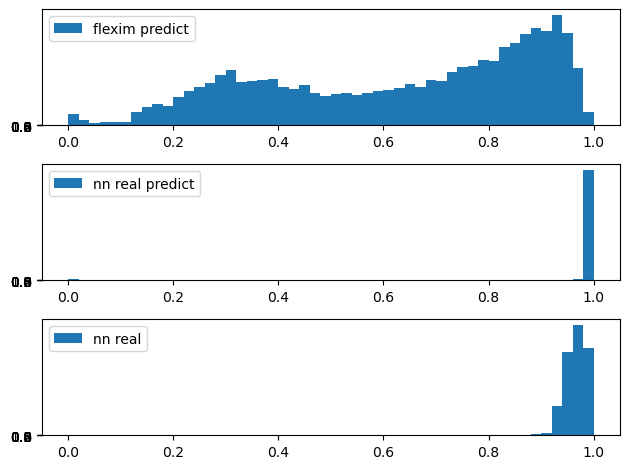

total query time is 13
wass distance flexim is 0.32047139043872597
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 13
label smoothing is 0.00185416979663911


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 14:56:14.818338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 20ms/step - loss: 2.0669e-04 - accuracy: 0.4875
run into active learning emulate process
1/1 [==============================] - 0s 55ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
4/6 [===================>..........] - ETA: 0s - loss: 1.2951e-04 - accuracy: 0.4844

2022-09-23 14:56:15.488969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.318
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.773
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 6ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [================

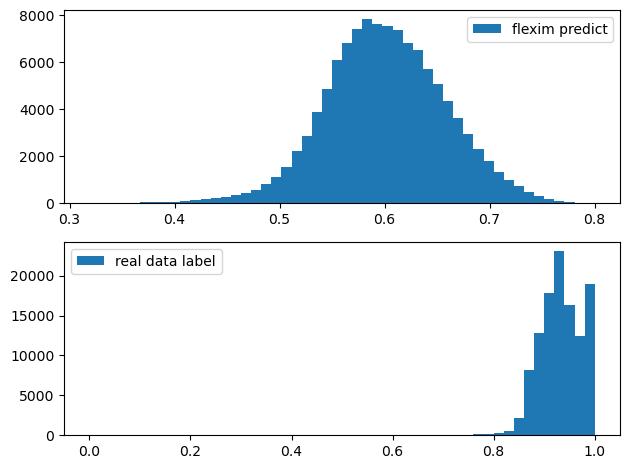

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


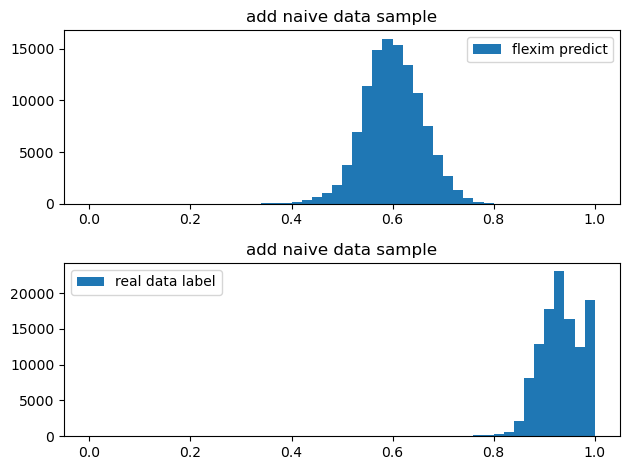

***** begin training *****
neg number flexim is 3381
pos number flexim is 87731
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 14:56:43.618612: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8747 - precision: 0.9929 - recall: 0.8761

2022-09-23 14:57:11.281094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3915 - accuracy: 0.8747 - precision: 0.9929 - recall: 0.8761 - val_loss: 0.3907 - val_accuracy: 0.8657 - val_precision: 0.9939 - val_recall: 0.8658
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3594 - accuracy: 0.8933 - precision: 0.9940 - recall: 0.8945 - val_loss: 0.3265 - val_accuracy: 0.9092 - val_precision: 0.9930 - val_recall: 0.9120
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3501 - accuracy: 0.9001 - precision: 0.9941 - recall: 0.9016 - val_loss: 0.3536 - val_accuracy: 0.8911 - val_precision: 0.9936 - val_recall: 0.8926
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3445 - accuracy: 0.9055 - precision: 0.9940 - recall: 0.9073 - val_loss: 0.5359 - val_accuracy: 0.8071 - val_precision: 0.9954 - val_recall: 0.8032
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3429 - accuracy: 0.

2022-09-23 15:01:52.617252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588

2022-09-23 15:02:20.365482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2046 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588 - val_loss: 0.1793 - val_accuracy: 0.9734 - val_precision: 1.0000 - val_recall: 0.9733
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1314 - accuracy: 0.9843 - precision: 1.0000 - recall: 0.9843 - val_loss: 0.1334 - val_accuracy: 0.9886 - val_precision: 1.0000 - val_recall: 0.9886
Epoch 3/10
2848/2848 [==============================] - 33s 11ms/step - loss: 0.1159 - accuracy: 0.9924 - precision: 1.0000 - recall: 0.9923 - val_loss: 0.1465 - val_accuracy: 0.9875 - val_precision: 1.0000 - val_recall: 0.9874
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1131 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1090 - val_accuracy: 0.9952 - val_precision: 1.0000 - val_recall: 0.9952
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1116 - accuracy: 0.

2022-09-23 15:07:05.662105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.25545811653137207
 56/900 [>.............................] - ETA: 1s

2022-09-23 15:07:07.333757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.1310250461101532
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.17058154637420606
emd real is 0.02901582810542902


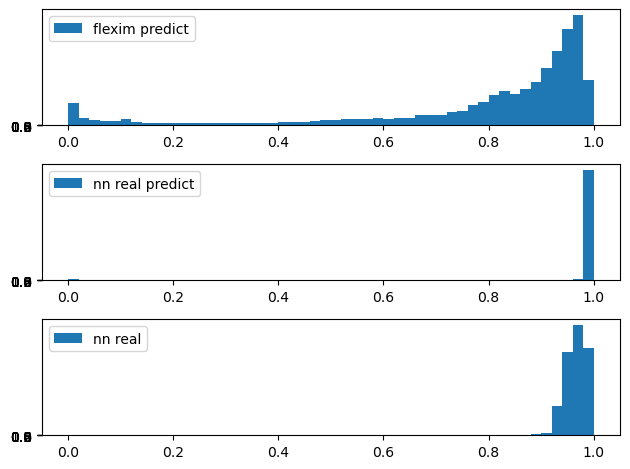

total query time is 11
wass distance flexim is 0.17058154637420606
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 24
label smoothing is 0.24038775241537386


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 15:07:09.949271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 16ms/step - loss: 6.5155e-08 - accuracy: 0.4313
run into active learning emulate process
1/1 [==============================] - 0s 57ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 5.3574e-08 - accuracy: 0.4062

2022-09-23 15:07:10.663102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.636
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.568
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.591
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.705
5/5 [==============================] - 0s 7ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.854
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [===================

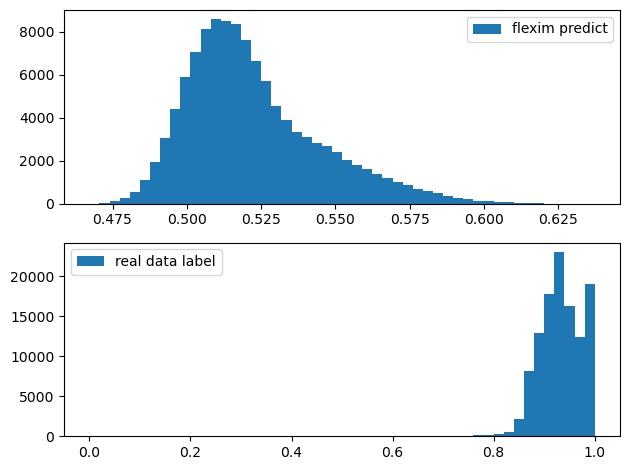

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


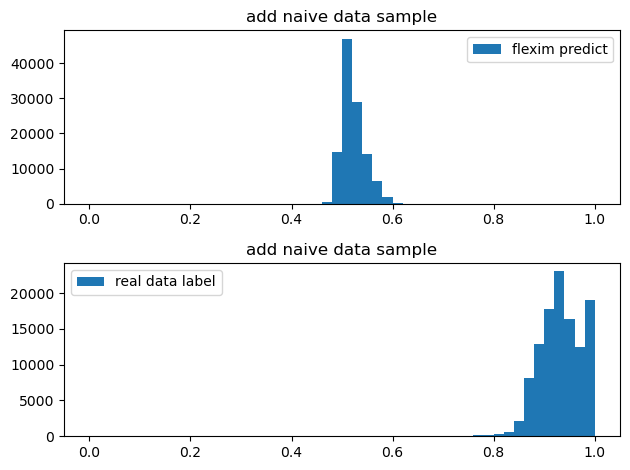

***** begin training *****
neg number flexim is 12020
pos number flexim is 79092
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 15:07:39.263477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5997 - accuracy: 0.7081 - precision: 0.9301 - recall: 0.7176

2022-09-23 15:08:07.551405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.5997 - accuracy: 0.7081 - precision: 0.9301 - recall: 0.7176 - val_loss: 0.5607 - val_accuracy: 0.7347 - val_precision: 0.9316 - val_recall: 0.7490
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5783 - accuracy: 0.7125 - precision: 0.9399 - recall: 0.7145 - val_loss: 0.5352 - val_accuracy: 0.7493 - val_precision: 0.9312 - val_recall: 0.7675
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5713 - accuracy: 0.7140 - precision: 0.9419 - recall: 0.7147 - val_loss: 0.5841 - val_accuracy: 0.7127 - val_precision: 0.9427 - val_recall: 0.7120
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5705 - accuracy: 0.7116 - precision: 0.9415 - recall: 0.7120 - val_loss: 0.5823 - val_accuracy: 0.7129 - val_precision: 0.9431 - val_recall: 0.7118
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5697 - accuracy: 0.

2022-09-23 15:12:52.367638: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2074 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588

2022-09-23 15:13:20.398490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2074 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588 - val_loss: 0.1722 - val_accuracy: 0.9770 - val_precision: 1.0000 - val_recall: 0.9769
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1230 - accuracy: 0.9876 - precision: 1.0000 - recall: 0.9876 - val_loss: 0.1302 - val_accuracy: 0.9875 - val_precision: 1.0000 - val_recall: 0.9874
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1148 - accuracy: 0.9913 - precision: 1.0000 - recall: 0.9912 - val_loss: 0.1162 - val_accuracy: 0.9919 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1134 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1197 - val_accuracy: 0.9902 - val_precision: 1.0000 - val_recall: 0.9901
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1125 - accuracy: 0.

2022-09-23 15:18:05.587062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.26789629459381104
 51/900 [>.............................] - ETA: 1s

2022-09-23 15:18:07.251588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13519878685474396
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.40309207488690607
emd real is 0.029176629995967655


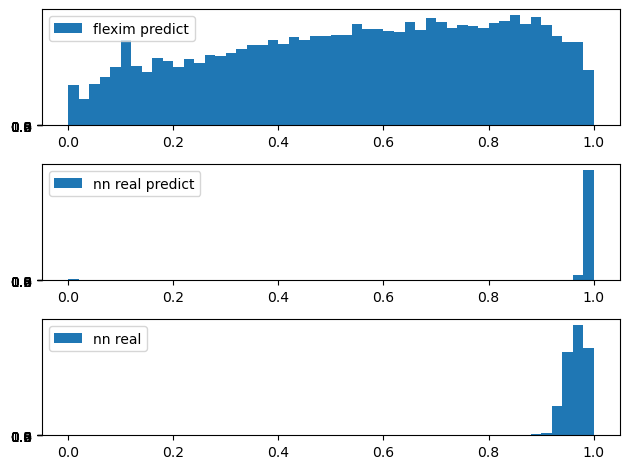

total query time is 12
wass distance flexim is 0.40309207488690607
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 18
label smoothing is 0.03687206181988689


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 15:18:09.885105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 16ms/step - loss: 3.1754e-06 - accuracy: 0.4750
run into active learning emulate process
1/1 [==============================] - 0s 55ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 2.3164e-06 - accuracy: 0.7500

2022-09-23 15:18:10.580180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.227
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.455
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.771
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning sco

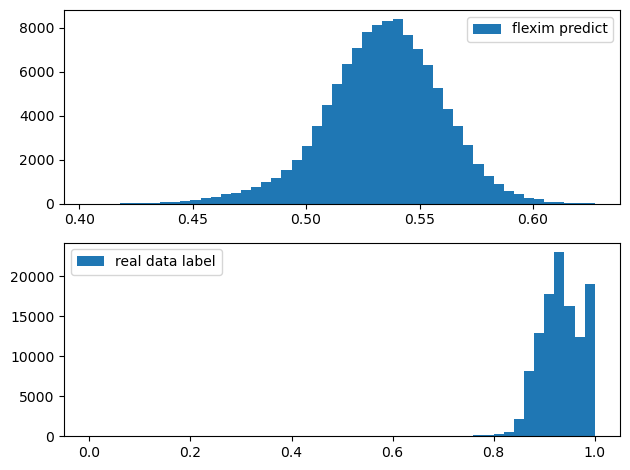

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


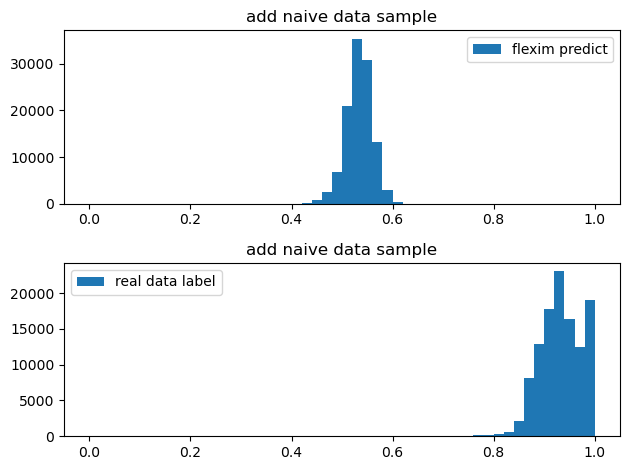

***** begin training *****
neg number flexim is 8208
pos number flexim is 82904
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 15:18:38.398723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8273 - precision: 0.9777 - recall: 0.8291

2022-09-23 15:19:06.568501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4224 - accuracy: 0.8273 - precision: 0.9777 - recall: 0.8291 - val_loss: 0.3072 - val_accuracy: 0.8973 - val_precision: 0.9750 - val_recall: 0.9103
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3686 - accuracy: 0.8484 - precision: 0.9864 - recall: 0.8450 - val_loss: 0.3765 - val_accuracy: 0.8603 - val_precision: 0.9874 - val_recall: 0.8572
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3612 - accuracy: 0.8536 - precision: 0.9866 - recall: 0.8507 - val_loss: 0.3871 - val_accuracy: 0.8565 - val_precision: 0.9898 - val_recall: 0.8509
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3586 - accuracy: 0.8549 - precision: 0.9872 - recall: 0.8516 - val_loss: 0.4126 - val_accuracy: 0.8387 - val_precision: 0.9907 - val_recall: 0.8302
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3561 - accuracy: 0.

2022-09-23 15:23:50.689748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2083 - accuracy: 0.9593 - precision: 0.9997 - recall: 0.9594

2022-09-23 15:24:18.788348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2083 - accuracy: 0.9593 - precision: 0.9997 - recall: 0.9594 - val_loss: 0.1706 - val_accuracy: 0.9759 - val_precision: 1.0000 - val_recall: 0.9759
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1260 - accuracy: 0.9840 - precision: 1.0000 - recall: 0.9840 - val_loss: 0.1296 - val_accuracy: 0.9874 - val_precision: 1.0000 - val_recall: 0.9873
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1172 - accuracy: 0.9901 - precision: 1.0000 - recall: 0.9900 - val_loss: 0.1204 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1153 - accuracy: 0.9910 - precision: 1.0000 - recall: 0.9910 - val_loss: 0.1309 - val_accuracy: 0.9880 - val_precision: 1.0000 - val_recall: 0.9880
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1150 - accuracy: 0.

2022-09-23 15:29:06.251408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.3298437297344208
 57/900 [>.............................] - ETA: 1s

2022-09-23 15:29:07.865011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13735783100128174
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.265241360545819
emd real is 0.030328570358550817


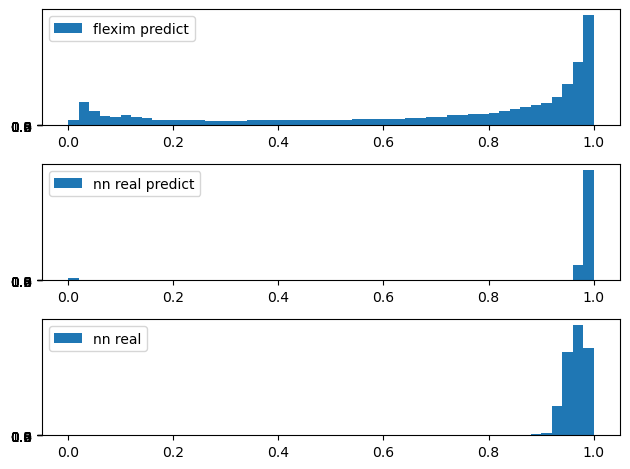

total query time is 9
wass distance flexim is 0.265241360545819
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 16
label smoothing is 0.17095436912304082


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 15:29:10.433270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 1.0997e-05 - accuracy: 0.5625
run into active learning emulate process
1/1 [==============================] - 0s 55ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
4/6 [===================>..........] - ETA: 0s - loss: 8.9835e-06 - accuracy: 0.7109

2022-09-23 15:29:11.060015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.159
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.432
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.773
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.636
5/5 [==============================] - 0s 6ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time activ

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 14ms/step - loss: 7.9480e-06 - accuracy: 0.7614
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.476
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 1.0
6/6 [==============================] - 0s 2ms/step

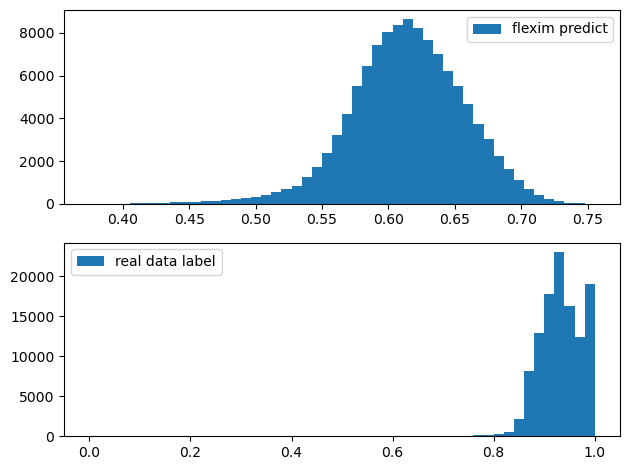

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


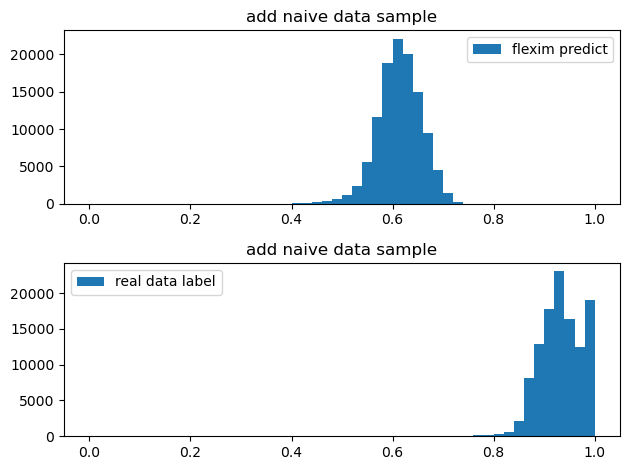

***** begin training *****
neg number flexim is 1144
pos number flexim is 89968
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 15:29:39.401267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3204 - accuracy: 0.8846 - precision: 0.9984 - recall: 0.8846

2022-09-23 15:30:07.208215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.3204 - accuracy: 0.8846 - precision: 0.9984 - recall: 0.8846 - val_loss: 0.2951 - val_accuracy: 0.9047 - val_precision: 0.9990 - val_recall: 0.9044
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2767 - accuracy: 0.8994 - precision: 0.9992 - recall: 0.8988 - val_loss: 0.3267 - val_accuracy: 0.8933 - val_precision: 0.9995 - val_recall: 0.8924
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2686 - accuracy: 0.9081 - precision: 0.9992 - recall: 0.9076 - val_loss: 0.3291 - val_accuracy: 0.8953 - val_precision: 0.9996 - val_recall: 0.8944
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2642 - accuracy: 0.9100 - precision: 0.9994 - recall: 0.9095 - val_loss: 0.2787 - val_accuracy: 0.9191 - val_precision: 0.9991 - val_recall: 0.9189
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2599 - accuracy: 0.

2022-09-23 15:34:51.354849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2075 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581

2022-09-23 15:35:19.699182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2075 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581 - val_loss: 0.2045 - val_accuracy: 0.9619 - val_precision: 1.0000 - val_recall: 0.9618
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1320 - accuracy: 0.9833 - precision: 1.0000 - recall: 0.9832 - val_loss: 0.1357 - val_accuracy: 0.9879 - val_precision: 1.0000 - val_recall: 0.9878
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1144 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1170 - val_accuracy: 0.9917 - val_precision: 1.0000 - val_recall: 0.9917
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1114 - accuracy: 0.9940 - precision: 1.0000 - recall: 0.9939 - val_loss: 0.1150 - val_accuracy: 0.9923 - val_precision: 1.0000 - val_recall: 0.9922
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1108 - accuracy: 0.

2022-09-23 15:40:27.146742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.23573362827301025
 39/900 [>.............................] - ETA: 2s

2022-09-23 15:40:29.413851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13258542120456696
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.09087942679151788
emd real is 0.03240165940172099


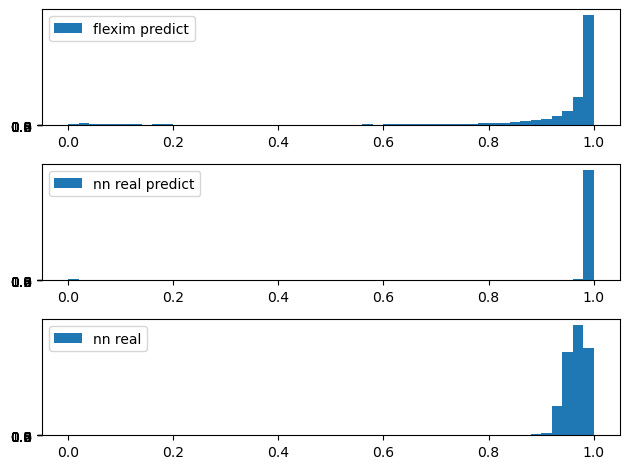

total query time is 11
wass distance flexim is 0.09087942679151788
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 0
label smoothing is 0.6802728381729972


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 15:40:32.811562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 21ms/step - loss: 0.6847 - accuracy: 0.6750
run into active learning emulate process
1/1 [==============================] - 0s 59ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.7032 - accuracy: 0.6250

2022-09-23 15:40:33.597210: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 30ms/step
1 time active learning score is 0.295
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.341
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.477
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.523
5/5 [==============================] - 0s 7ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 22ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 7ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fetc

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 17ms/step - loss: 0.6688 - accuracy: 0.8342
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 13ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/st

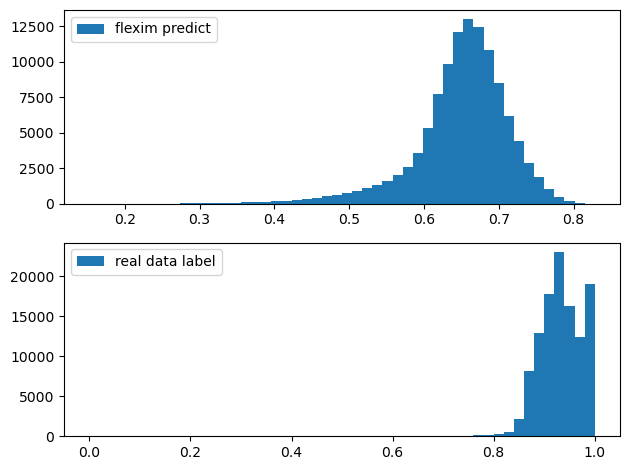

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


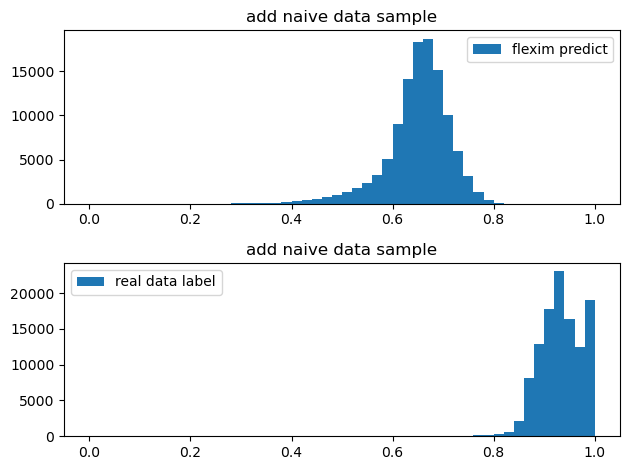

***** begin training *****
neg number flexim is 2926
pos number flexim is 88186
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 15:41:09.899124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4449 - accuracy: 0.8449 - precision: 0.9912 - recall: 0.8472

2022-09-23 15:41:44.347492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 39s 14ms/step - loss: 0.4449 - accuracy: 0.8449 - precision: 0.9912 - recall: 0.8472 - val_loss: 0.3233 - val_accuracy: 0.8925 - val_precision: 0.9925 - val_recall: 0.8956
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3837 - accuracy: 0.8403 - precision: 0.9937 - recall: 0.8403 - val_loss: 0.4851 - val_accuracy: 0.7660 - val_precision: 0.9961 - val_recall: 0.7610
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.3708 - accuracy: 0.8427 - precision: 0.9941 - recall: 0.8425 - val_loss: 0.4807 - val_accuracy: 0.7755 - val_precision: 0.9972 - val_recall: 0.7701
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3627 - accuracy: 0.8450 - precision: 0.9948 - recall: 0.8443 - val_loss: 0.3013 - val_accuracy: 0.9024 - val_precision: 0.9936 - val_recall: 0.9049
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3574 - accuracy: 0.

2022-09-23 15:46:20.897801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2117 - accuracy: 0.9570 - precision: 0.9997 - recall: 0.9571

2022-09-23 15:46:48.034953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2117 - accuracy: 0.9570 - precision: 0.9997 - recall: 0.9571 - val_loss: 0.1882 - val_accuracy: 0.9688 - val_precision: 1.0000 - val_recall: 0.9687
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1328 - accuracy: 0.9828 - precision: 1.0000 - recall: 0.9828 - val_loss: 0.1436 - val_accuracy: 0.9857 - val_precision: 1.0000 - val_recall: 0.9856
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1156 - accuracy: 0.9913 - precision: 1.0000 - recall: 0.9912 - val_loss: 0.1145 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9925
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1131 - accuracy: 0.9932 - precision: 1.0000 - recall: 0.9931 - val_loss: 0.1164 - val_accuracy: 0.9919 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1126 - accuracy: 0.

2022-09-23 15:51:23.442435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2755722999572754
 60/900 [=>............................] - ETA: 1s

2022-09-23 15:51:25.045917: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13055354356765747
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.18301934344918652
emd real is 0.028721711335972008


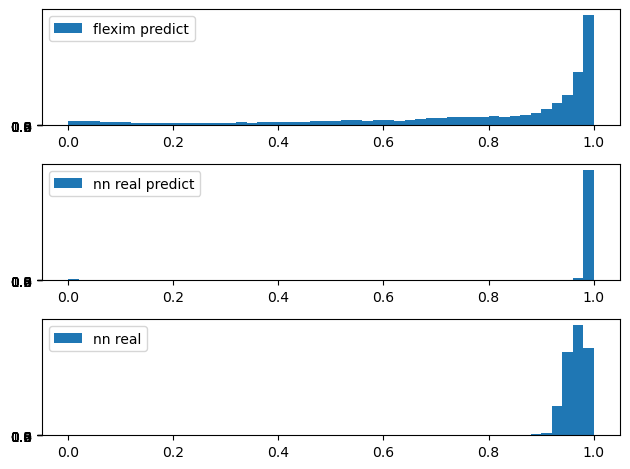

total query time is 12
wass distance flexim is 0.18301934344918652
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 0
label smoothing is 0.453084842965285


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 15:51:27.590288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 0.6813 - accuracy: 0.6375
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 0.6582 - accuracy: 0.7188

2022-09-23 15:51:28.263309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.045
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.341
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.386
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.614
5/5 [==============================] - 0s 7ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.729
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fet

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

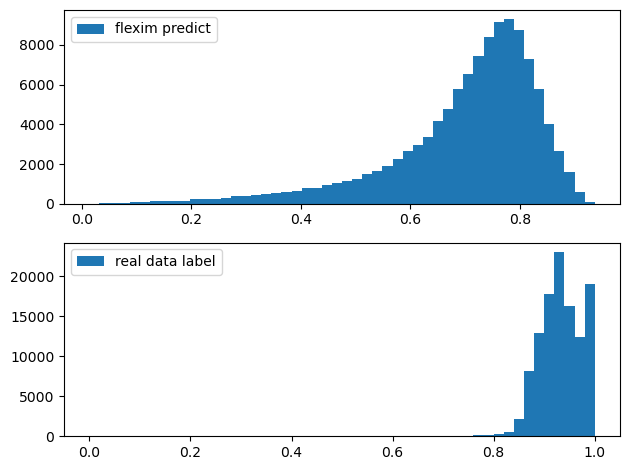

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


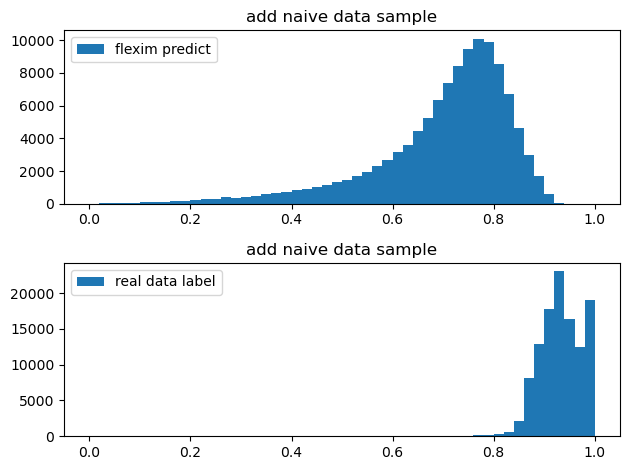

***** begin training *****
neg number flexim is 8412
pos number flexim is 82700
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 15:51:56.286948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.7595 - precision: 0.9618 - recall: 0.7654

2022-09-23 15:52:23.196136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5368 - accuracy: 0.7595 - precision: 0.9618 - recall: 0.7654 - val_loss: 0.4982 - val_accuracy: 0.7821 - val_precision: 0.9796 - val_recall: 0.7757
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4577 - accuracy: 0.7929 - precision: 0.9771 - recall: 0.7903 - val_loss: 0.4894 - val_accuracy: 0.7826 - val_precision: 0.9809 - val_recall: 0.7752
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4475 - accuracy: 0.7958 - precision: 0.9784 - recall: 0.7925 - val_loss: 0.4246 - val_accuracy: 0.8161 - val_precision: 0.9755 - val_recall: 0.8176
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4410 - accuracy: 0.7952 - precision: 0.9783 - recall: 0.7919 - val_loss: 0.4644 - val_accuracy: 0.7881 - val_precision: 0.9801 - val_recall: 0.7820
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4367 - accuracy: 0.

2022-09-23 15:56:56.723040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2089 - accuracy: 0.9574 - precision: 0.9997 - recall: 0.9575

2022-09-23 15:57:23.693506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2089 - accuracy: 0.9574 - precision: 0.9997 - recall: 0.9575 - val_loss: 0.1846 - val_accuracy: 0.9721 - val_precision: 1.0000 - val_recall: 0.9720
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1322 - accuracy: 0.9830 - precision: 1.0000 - recall: 0.9830 - val_loss: 0.1282 - val_accuracy: 0.9891 - val_precision: 1.0000 - val_recall: 0.9890
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1152 - accuracy: 0.9918 - precision: 1.0000 - recall: 0.9918 - val_loss: 0.1241 - val_accuracy: 0.9924 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1136 - accuracy: 0.9932 - precision: 1.0000 - recall: 0.9932 - val_loss: 0.1163 - val_accuracy: 0.9921 - val_precision: 1.0000 - val_recall: 0.9921
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1128 - accuracy: 0.

2022-09-23 16:01:59.155687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2941027581691742
 58/900 [>.............................] - ETA: 1s

2022-09-23 16:02:00.704201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13225848972797394
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2541248233711654
emd real is 0.03203925569187141


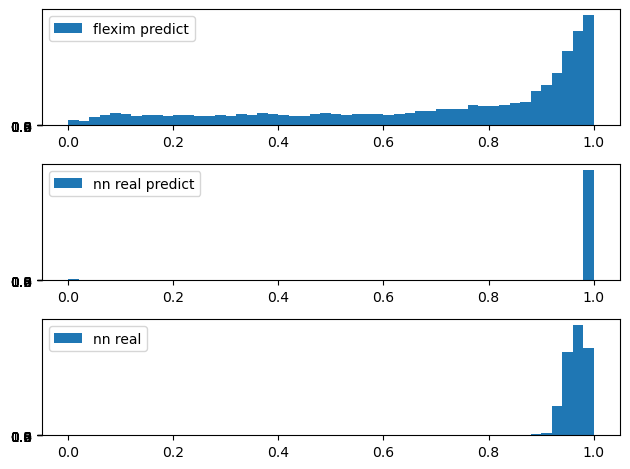

total query time is 13
wass distance flexim is 0.2541248233711654
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 15
label smoothing is 0.062268432367083314


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:02:03.201603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 17ms/step - loss: 2.8222e-05 - accuracy: 0.5938
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 2.2137e-05 - accuracy: 0.4688

2022-09-23 16:02:03.840479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.545
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.386
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.864
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 8ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.771
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [=======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.682
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.909
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
finis

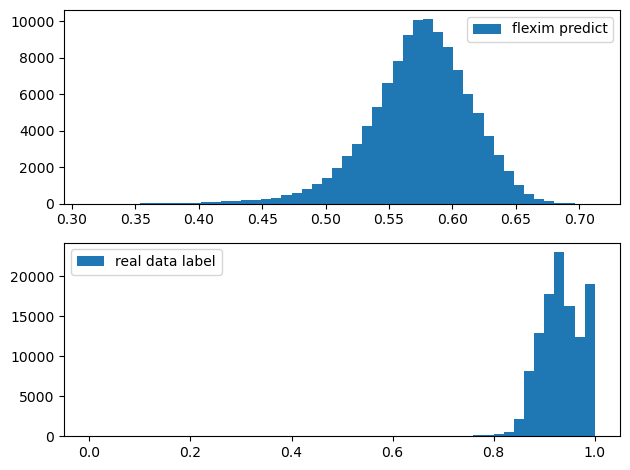

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


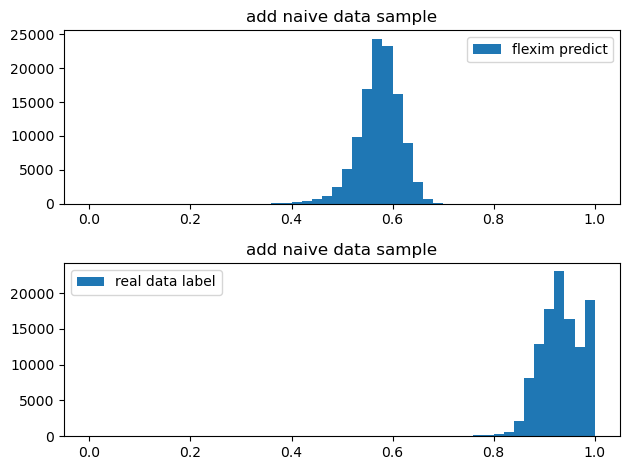

***** begin training *****
neg number flexim is 4153
pos number flexim is 86959
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:02:30.588298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4881 - accuracy: 0.7910 - precision: 0.9862 - recall: 0.7921

2022-09-23 16:02:57.516226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.4881 - accuracy: 0.7910 - precision: 0.9862 - recall: 0.7921 - val_loss: 0.3552 - val_accuracy: 0.8792 - val_precision: 0.9848 - val_recall: 0.8870
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4571 - accuracy: 0.8093 - precision: 0.9881 - recall: 0.8099 - val_loss: 0.4603 - val_accuracy: 0.8109 - val_precision: 0.9895 - val_recall: 0.8102
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4446 - accuracy: 0.8139 - precision: 0.9888 - recall: 0.8143 - val_loss: 0.4254 - val_accuracy: 0.8384 - val_precision: 0.9888 - val_recall: 0.8400
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4351 - accuracy: 0.8201 - precision: 0.9893 - recall: 0.8204 - val_loss: 0.4179 - val_accuracy: 0.8372 - val_precision: 0.9892 - val_recall: 0.8384
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4261 - accuracy: 0.

2022-09-23 16:07:29.840122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9555 - precision: 0.9998 - recall: 0.9555

2022-09-23 16:07:56.834045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2018 - accuracy: 0.9555 - precision: 0.9998 - recall: 0.9555 - val_loss: 0.1806 - val_accuracy: 0.9729 - val_precision: 1.0000 - val_recall: 0.9728
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1304 - accuracy: 0.9841 - precision: 1.0000 - recall: 0.9840 - val_loss: 0.1332 - val_accuracy: 0.9896 - val_precision: 1.0000 - val_recall: 0.9896
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1147 - accuracy: 0.9916 - precision: 1.0000 - recall: 0.9916 - val_loss: 0.1191 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1128 - accuracy: 0.9929 - precision: 1.0000 - recall: 0.9929 - val_loss: 0.1157 - val_accuracy: 0.9924 - val_precision: 1.0000 - val_recall: 0.9923
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1121 - accuracy: 0.

2022-09-23 16:12:33.104759: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2968246340751648
 59/900 [>.............................] - ETA: 1s

2022-09-23 16:12:34.685389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13374963402748108
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2159697435423843
emd real is 0.031017206993723793


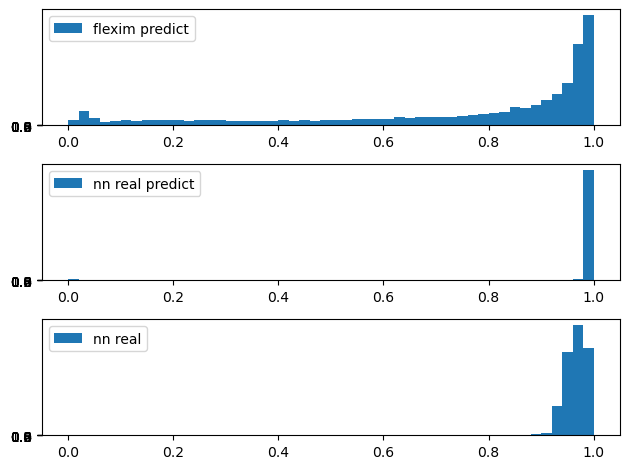

total query time is 9
wass distance flexim is 0.2159697435423843
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.6766996720544621


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:12:37.189933: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 25ms/step - loss: 9.1117e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.1060e-12 - accuracy: 0.3750

2022-09-23 16:12:37.848316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 23ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
finish al

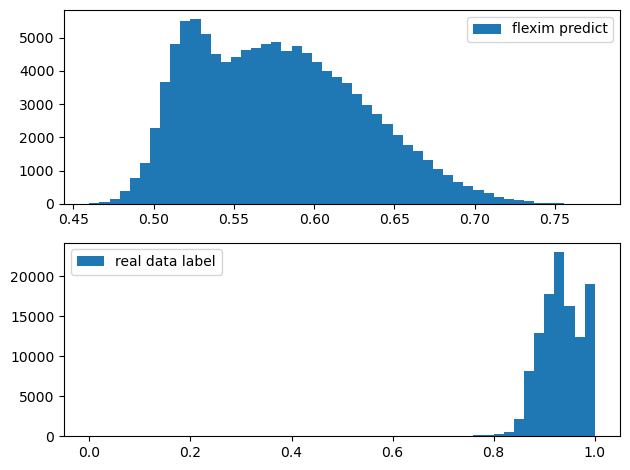

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


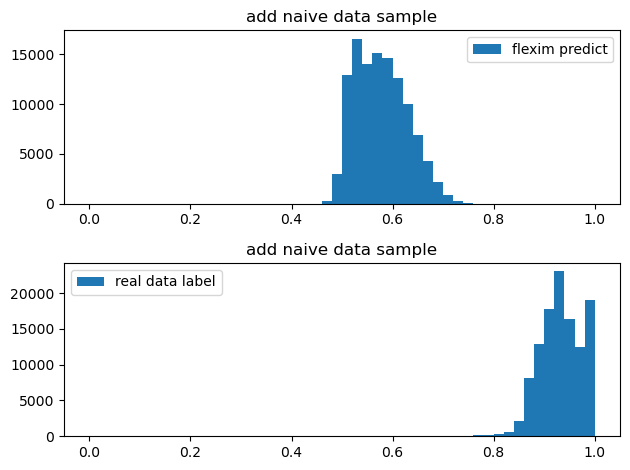

***** begin training *****
neg number flexim is 2627
pos number flexim is 88485
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:13:04.649576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5963 - accuracy: 0.7154 - precision: 0.9851 - recall: 0.7179

2022-09-23 16:13:31.482709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.5963 - accuracy: 0.7154 - precision: 0.9851 - recall: 0.7179 - val_loss: 0.5461 - val_accuracy: 0.7219 - val_precision: 0.9883 - val_recall: 0.7221
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4982 - accuracy: 0.7470 - precision: 0.9923 - recall: 0.7453 - val_loss: 0.4809 - val_accuracy: 0.7892 - val_precision: 0.9929 - val_recall: 0.7885
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4588 - accuracy: 0.7778 - precision: 0.9936 - recall: 0.7762 - val_loss: 0.5089 - val_accuracy: 0.7737 - val_precision: 0.9949 - val_recall: 0.7709
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4535 - accuracy: 0.7805 - precision: 0.9935 - recall: 0.7790 - val_loss: 0.5783 - val_accuracy: 0.7271 - val_precision: 0.9966 - val_recall: 0.7214
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4506 - accuracy: 0.

2022-09-23 16:18:05.675758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2098 - accuracy: 0.9582 - precision: 0.9997 - recall: 0.9583

2022-09-23 16:18:32.611930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2098 - accuracy: 0.9582 - precision: 0.9997 - recall: 0.9583 - val_loss: 0.1835 - val_accuracy: 0.9726 - val_precision: 1.0000 - val_recall: 0.9725
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1302 - accuracy: 0.9847 - precision: 1.0000 - recall: 0.9846 - val_loss: 0.1367 - val_accuracy: 0.9896 - val_precision: 1.0000 - val_recall: 0.9896
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1162 - accuracy: 0.9926 - precision: 1.0000 - recall: 0.9926 - val_loss: 0.1170 - val_accuracy: 0.9926 - val_precision: 1.0000 - val_recall: 0.9926
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1131 - accuracy: 0.9937 - precision: 1.0000 - recall: 0.9937 - val_loss: 0.1175 - val_accuracy: 0.9920 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1113 - accuracy: 0.

2022-09-23 16:23:07.493869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.28931212425231934
 57/900 [>.............................] - ETA: 1s

2022-09-23 16:23:09.056581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1285015046596527
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.24573093413042807
emd real is 0.026102645225722365


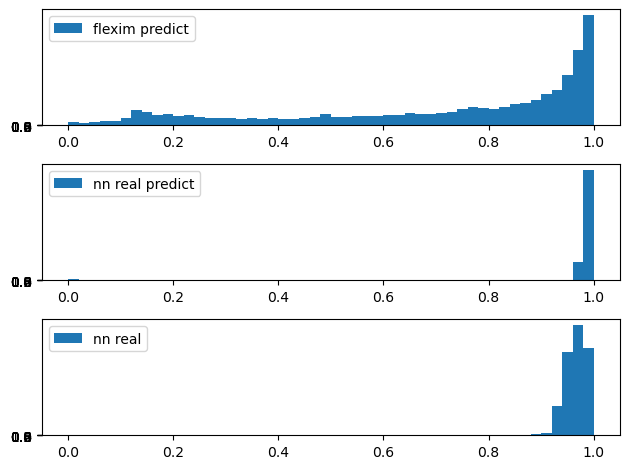

total query time is 9
wass distance flexim is 0.24573093413042807
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 19
label smoothing is 0.6957511544791242


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:23:11.539195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 22ms/step - loss: 1.4275e-06 - accuracy: 0.3875
run into active learning emulate process
1/1 [==============================] - 0s 52ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.4197e-06 - accuracy: 0.2812

2022-09-23 16:23:12.196824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.523
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.568
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.771
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 8ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [====================

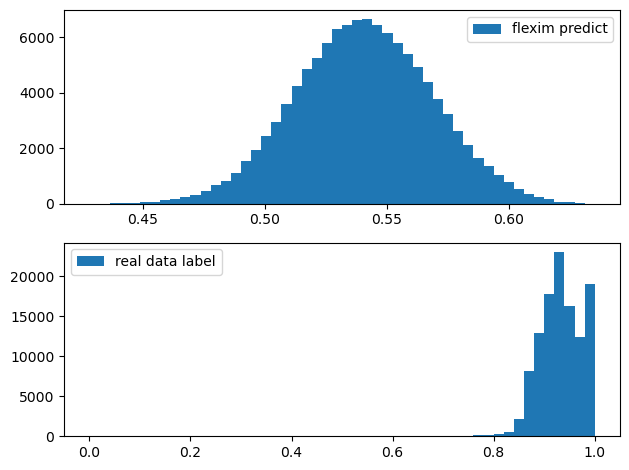

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


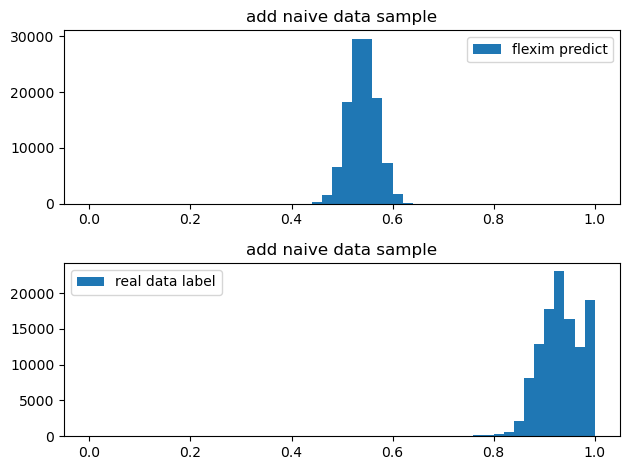

***** begin training *****
neg number flexim is 6776
pos number flexim is 84336
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:23:39.052609: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5105 - accuracy: 0.7735 - precision: 0.9735 - recall: 0.7765

2022-09-23 16:24:06.045736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5105 - accuracy: 0.7735 - precision: 0.9735 - recall: 0.7765 - val_loss: 0.5628 - val_accuracy: 0.7432 - val_precision: 0.9894 - val_recall: 0.7306
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.4327 - accuracy: 0.8055 - precision: 0.9845 - recall: 0.8025 - val_loss: 0.4588 - val_accuracy: 0.8113 - val_precision: 0.9876 - val_recall: 0.8064
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4179 - accuracy: 0.8118 - precision: 0.9860 - recall: 0.8081 - val_loss: 0.4688 - val_accuracy: 0.8014 - val_precision: 0.9891 - val_recall: 0.7944
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.4135 - accuracy: 0.8142 - precision: 0.9857 - recall: 0.8111 - val_loss: 0.3846 - val_accuracy: 0.8480 - val_precision: 0.9816 - val_recall: 0.8520
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4130 - accuracy: 0.

2022-09-23 16:28:48.025127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9598 - precision: 0.9998 - recall: 0.9598

2022-09-23 16:29:15.323568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.1973 - accuracy: 0.9598 - precision: 0.9998 - recall: 0.9598 - val_loss: 0.1747 - val_accuracy: 0.9770 - val_precision: 1.0000 - val_recall: 0.9769
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1279 - accuracy: 0.9863 - precision: 1.0000 - recall: 0.9863 - val_loss: 0.1397 - val_accuracy: 0.9887 - val_precision: 1.0000 - val_recall: 0.9887
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1147 - accuracy: 0.9929 - precision: 1.0000 - recall: 0.9929 - val_loss: 0.1196 - val_accuracy: 0.9918 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1121 - accuracy: 0.9939 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1173 - val_accuracy: 0.9919 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1112 - accuracy: 0.

2022-09-23 16:33:54.785094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.3045791983604431
 56/900 [>.............................] - ETA: 1s

2022-09-23 16:33:56.389806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1329805552959442
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2399496014283513
emd real is 0.031458234978446256


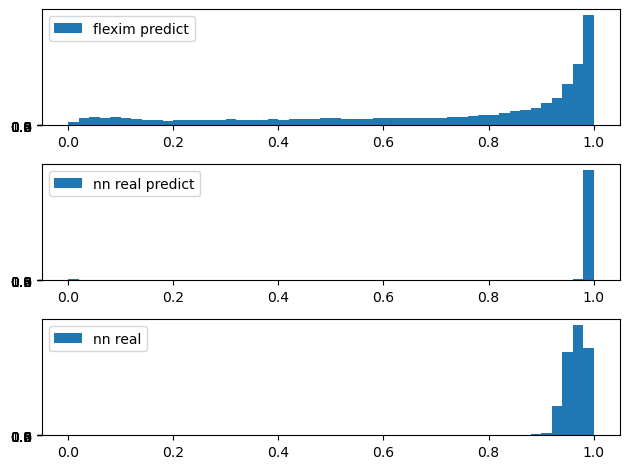

total query time is 9
wass distance flexim is 0.2399496014283513
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.02874795745440614


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:33:58.924026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 5.7953e-12 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 7.0810e-12 - accuracy: 0.5000

2022-09-23 16:33:59.595476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===============

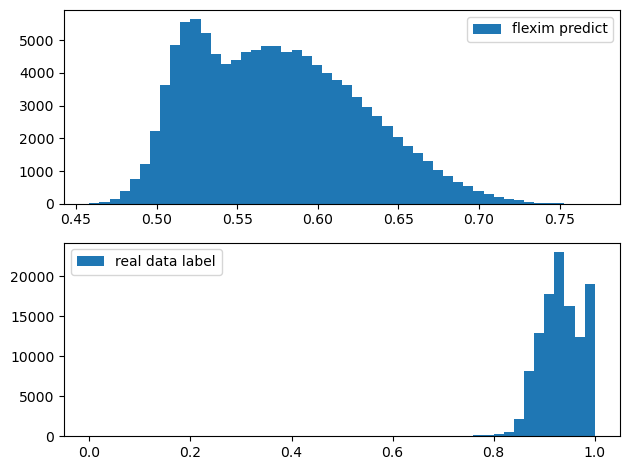

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


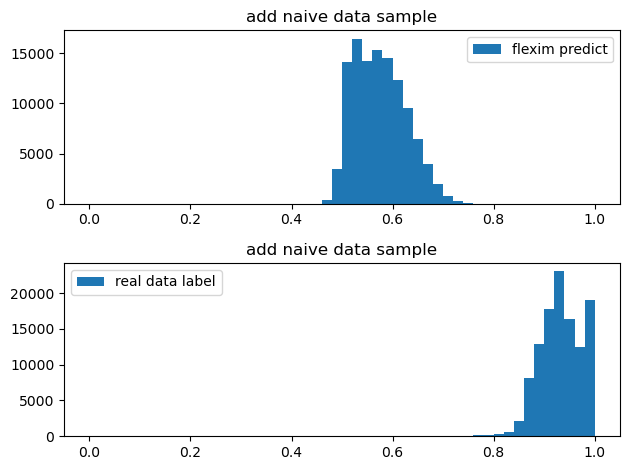

***** begin training *****
neg number flexim is 3104
pos number flexim is 88008
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:34:27.413956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.6993 - precision: 0.9833 - recall: 0.7006

2022-09-23 16:34:54.696605: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5986 - accuracy: 0.6993 - precision: 0.9833 - recall: 0.7006 - val_loss: 0.5094 - val_accuracy: 0.7607 - val_precision: 0.9828 - val_recall: 0.7655
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5092 - accuracy: 0.7393 - precision: 0.9900 - recall: 0.7376 - val_loss: 0.4961 - val_accuracy: 0.7782 - val_precision: 0.9918 - val_recall: 0.7767
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4642 - accuracy: 0.7732 - precision: 0.9920 - recall: 0.7714 - val_loss: 0.4673 - val_accuracy: 0.7948 - val_precision: 0.9908 - val_recall: 0.7949
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4602 - accuracy: 0.7738 - precision: 0.9922 - recall: 0.7719 - val_loss: 0.5268 - val_accuracy: 0.7535 - val_precision: 0.9930 - val_recall: 0.7500
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4591 - accuracy: 0.

2022-09-23 16:39:32.052048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9602 - precision: 0.9998 - recall: 0.9603

2022-09-23 16:39:59.368781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2026 - accuracy: 0.9602 - precision: 0.9998 - recall: 0.9603 - val_loss: 0.1791 - val_accuracy: 0.9744 - val_precision: 1.0000 - val_recall: 0.9743
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1266 - accuracy: 0.9874 - precision: 1.0000 - recall: 0.9873 - val_loss: 0.1231 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1131 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1143 - val_accuracy: 0.9923 - val_precision: 1.0000 - val_recall: 0.9922
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1111 - accuracy: 0.9941 - precision: 1.0000 - recall: 0.9941 - val_loss: 0.1172 - val_accuracy: 0.9913 - val_precision: 1.0000 - val_recall: 0.9913
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1113 - accuracy: 0.

2022-09-23 16:44:37.605363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2833476662635803
 58/900 [>.............................] - ETA: 1s

2022-09-23 16:44:39.234576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13040229678153992
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.23093493305495727
emd real is 0.032448060056838125


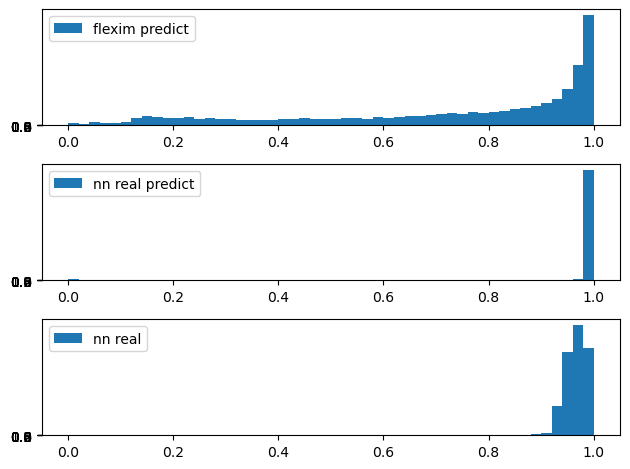

total query time is 9
wass distance flexim is 0.23093493305495727
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 7
label smoothing is 0.08771403956076188


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:44:41.855338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 22ms/step - loss: 0.0078 - accuracy: 0.4875
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0051 - accuracy: 0.6875

2022-09-23 16:44:42.542798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.409
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.727
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.818
2/2 [==============================] - 0s 3ms/step
emulate process f

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
finish all cluster binary and active search
make modification new new
generate cosine naive positive and negative data new
length of next_result_table is 2
result table shape is (10, 101)
(generato

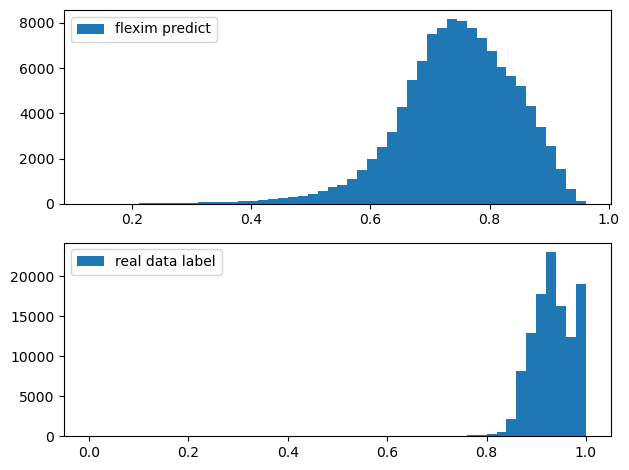

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


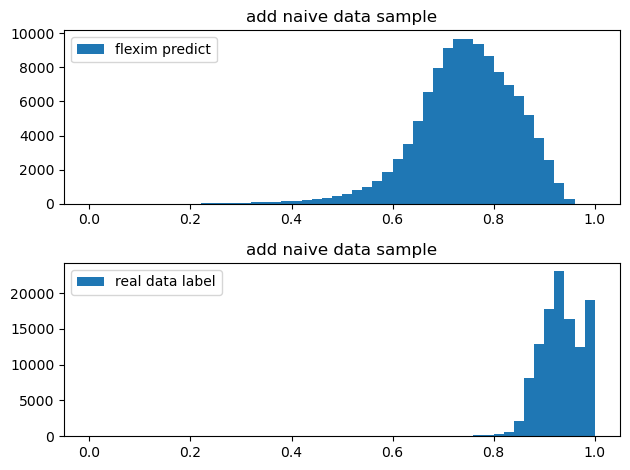

***** begin training *****
neg number flexim is 1740
pos number flexim is 89372
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:45:10.671682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4478 - accuracy: 0.8508 - precision: 0.9955 - recall: 0.8517

2022-09-23 16:45:38.097764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.4478 - accuracy: 0.8508 - precision: 0.9955 - recall: 0.8517 - val_loss: 0.4455 - val_accuracy: 0.8446 - val_precision: 0.9970 - val_recall: 0.8441
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3975 - accuracy: 0.8747 - precision: 0.9964 - recall: 0.8754 - val_loss: 0.4645 - val_accuracy: 0.8414 - val_precision: 0.9973 - val_recall: 0.8406
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3698 - accuracy: 0.8814 - precision: 0.9964 - recall: 0.8823 - val_loss: 0.4175 - val_accuracy: 0.8532 - val_precision: 0.9972 - val_recall: 0.8527
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3574 - accuracy: 0.8797 - precision: 0.9963 - recall: 0.8806 - val_loss: 0.3374 - val_accuracy: 0.8915 - val_precision: 0.9963 - val_recall: 0.8927
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3517 - accuracy: 0.

2022-09-23 16:50:18.078627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.9584 - precision: 0.9997 - recall: 0.9585

2022-09-23 16:50:45.576317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2100 - accuracy: 0.9584 - precision: 0.9997 - recall: 0.9585 - val_loss: 0.1812 - val_accuracy: 0.9721 - val_precision: 1.0000 - val_recall: 0.9720
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1303 - accuracy: 0.9839 - precision: 1.0000 - recall: 0.9838 - val_loss: 0.1264 - val_accuracy: 0.9894 - val_precision: 1.0000 - val_recall: 0.9894
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1158 - accuracy: 0.9920 - precision: 1.0000 - recall: 0.9920 - val_loss: 0.1175 - val_accuracy: 0.9916 - val_precision: 1.0000 - val_recall: 0.9915
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1125 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1120 - val_accuracy: 0.9934 - val_precision: 1.0000 - val_recall: 0.9933
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1117 - accuracy: 0.

2022-09-23 16:55:25.703851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.25620996952056885
 56/900 [>.............................] - ETA: 1s

2022-09-23 16:55:27.307925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13398753106594086
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.13979864306443107
emd real is 0.030950829363190706


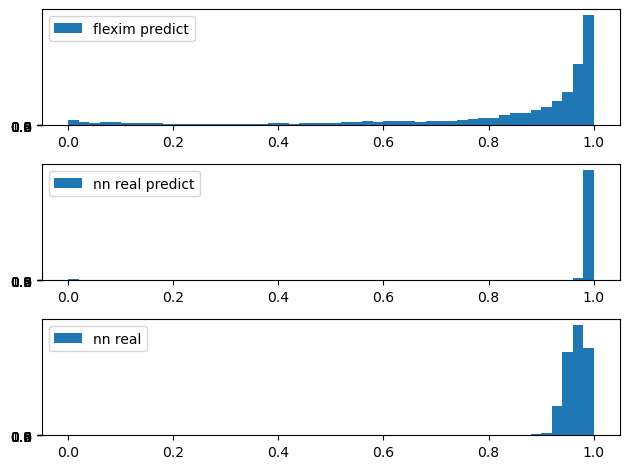

total query time is 10
wass distance flexim is 0.13979864306443107
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 5
label smoothing is 0.036887147684208366


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 16:55:29.884468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 0.0211 - accuracy: 0.5875
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0178 - accuracy: 0.7188

2022-09-23 16:55:30.526178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.273
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.341
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.409
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.614
5/5 [==============================] - 0s 6ms/step
query instance shape is (

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fetc

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [===============

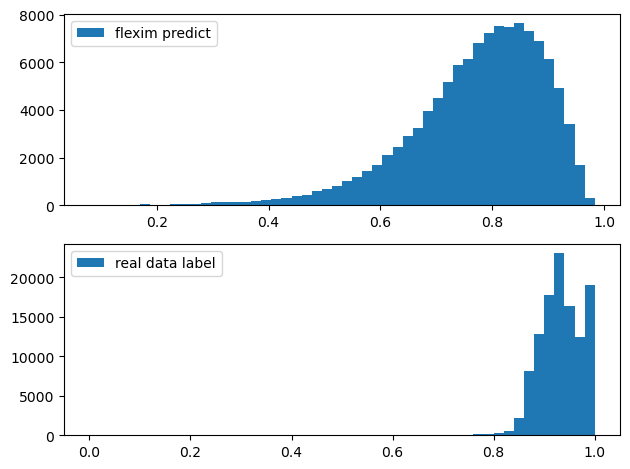

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


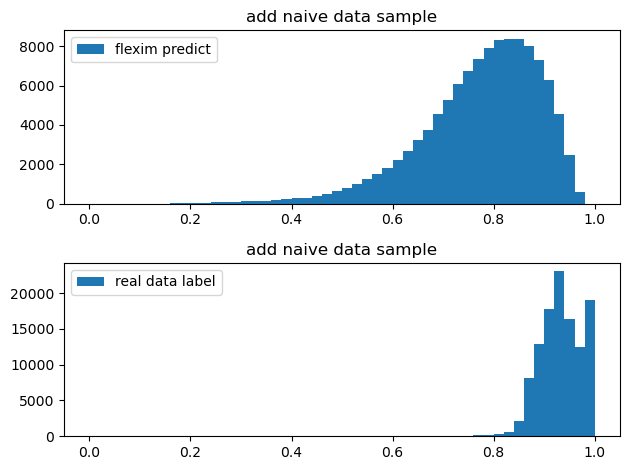

***** begin training *****
neg number flexim is 2741
pos number flexim is 88371
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 16:55:59.324939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5867 - accuracy: 0.7465 - precision: 0.9841 - recall: 0.7508

2022-09-23 16:56:26.709212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5867 - accuracy: 0.7465 - precision: 0.9841 - recall: 0.7508 - val_loss: 0.5216 - val_accuracy: 0.7783 - val_precision: 0.9844 - val_recall: 0.7839
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5479 - accuracy: 0.7467 - precision: 0.9868 - recall: 0.7489 - val_loss: 0.6533 - val_accuracy: 0.6619 - val_precision: 0.9911 - val_recall: 0.6575
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5329 - accuracy: 0.7490 - precision: 0.9883 - recall: 0.7501 - val_loss: 0.4760 - val_accuracy: 0.7985 - val_precision: 0.9854 - val_recall: 0.8043
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5228 - accuracy: 0.7548 - precision: 0.9891 - recall: 0.7555 - val_loss: 0.5702 - val_accuracy: 0.7253 - val_precision: 0.9907 - val_recall: 0.7238
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5166 - accuracy: 0.

2022-09-23 17:01:06.063690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.9615 - precision: 0.9998 - recall: 0.9616

2022-09-23 17:01:33.566828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.1980 - accuracy: 0.9615 - precision: 0.9998 - recall: 0.9616 - val_loss: 0.1777 - val_accuracy: 0.9738 - val_precision: 1.0000 - val_recall: 0.9737
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1274 - accuracy: 0.9870 - precision: 1.0000 - recall: 0.9870 - val_loss: 0.1236 - val_accuracy: 0.9914 - val_precision: 1.0000 - val_recall: 0.9914
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1141 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1198 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9938
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1128 - accuracy: 0.9941 - precision: 1.0000 - recall: 0.9940 - val_loss: 0.1164 - val_accuracy: 0.9924 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1119 - accuracy: 0.

2022-09-23 17:06:13.301590: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.25869613885879517
 57/900 [>.............................] - ETA: 1s

2022-09-23 17:06:14.921197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13143552839756012
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2733944371732734
emd real is 0.030893012024536218


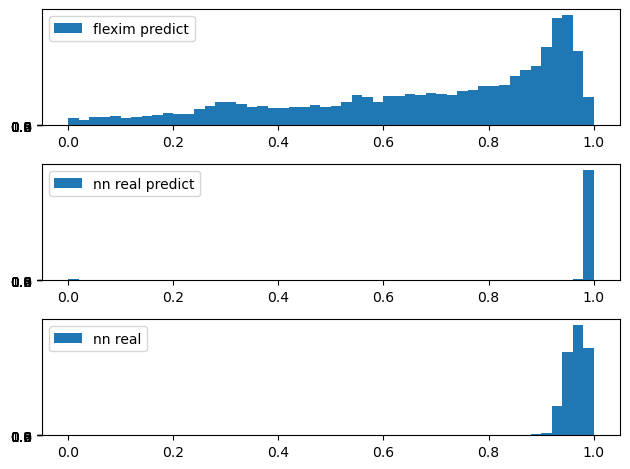

total query time is 13
wass distance flexim is 0.2733944371732734
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 8
label smoothing is 0.6935614333766497


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 17:06:17.485539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 28ms/step - loss: 0.0028 - accuracy: 0.5188
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0027 - accuracy: 0.6875

2022-09-23 17:06:18.180187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.295
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.477
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.5
5/5 [==============================] - 0s 8ms/step
query instance shape is

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 12
self.training_done is True
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
run first fetch
new1
3 binary fetch
self.training_done is False
run active learning fetc

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [===============

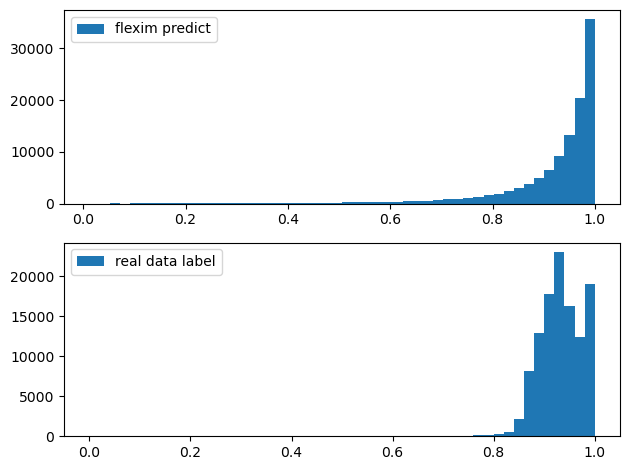

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


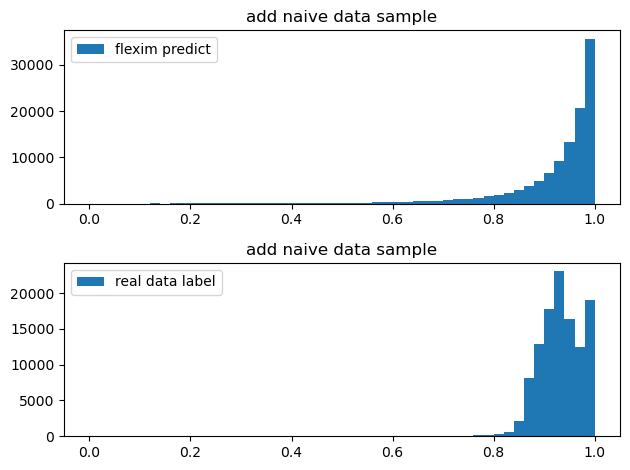

***** begin training *****
neg number flexim is 1931
pos number flexim is 89181
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 17:06:47.683133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.8533 - precision: 0.9963 - recall: 0.8534

2022-09-23 17:07:15.126036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3861 - accuracy: 0.8533 - precision: 0.9963 - recall: 0.8534 - val_loss: 0.4164 - val_accuracy: 0.8311 - val_precision: 0.9983 - val_recall: 0.8288
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3540 - accuracy: 0.8560 - precision: 0.9974 - recall: 0.8550 - val_loss: 0.3887 - val_accuracy: 0.8450 - val_precision: 0.9980 - val_recall: 0.8433
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3486 - accuracy: 0.8655 - precision: 0.9975 - recall: 0.8647 - val_loss: 0.3291 - val_accuracy: 0.8880 - val_precision: 0.9970 - val_recall: 0.8883
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3435 - accuracy: 0.8703 - precision: 0.9974 - recall: 0.8698 - val_loss: 0.3151 - val_accuracy: 0.8928 - val_precision: 0.9970 - val_recall: 0.8931
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3413 - accuracy: 0.

2022-09-23 17:11:54.909624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2131 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588

2022-09-23 17:12:22.384311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2131 - accuracy: 0.9587 - precision: 0.9997 - recall: 0.9588 - val_loss: 0.1978 - val_accuracy: 0.9650 - val_precision: 1.0000 - val_recall: 0.9649
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1321 - accuracy: 0.9833 - precision: 1.0000 - recall: 0.9832 - val_loss: 0.1252 - val_accuracy: 0.9904 - val_precision: 1.0000 - val_recall: 0.9904
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1138 - accuracy: 0.9925 - precision: 1.0000 - recall: 0.9925 - val_loss: 0.1108 - val_accuracy: 0.9940 - val_precision: 1.0000 - val_recall: 0.9940
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1115 - accuracy: 0.9938 - precision: 1.0000 - recall: 0.9938 - val_loss: 0.1159 - val_accuracy: 0.9919 - val_precision: 1.0000 - val_recall: 0.9919
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1105 - accuracy: 0.

2022-09-23 17:17:04.140107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.27258357405662537
 59/900 [>.............................] - ETA: 1s

2022-09-23 17:17:05.734720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.135931596159935
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.13530955486546486
emd real is 0.032970402041150405


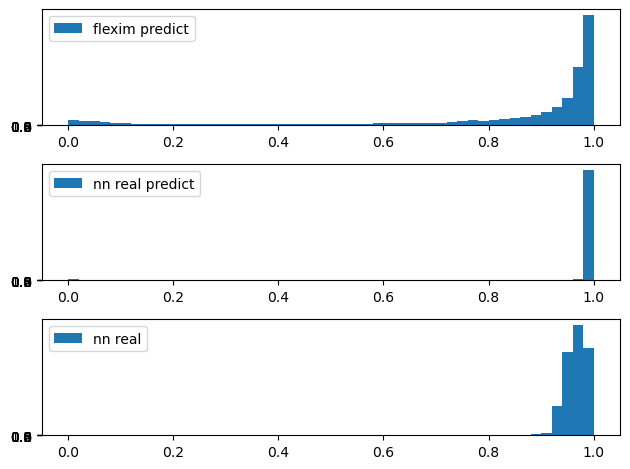

total query time is 15
wass distance flexim is 0.13530955486546486
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 31
label smoothing is 0.012161739925017779


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 17:17:08.283960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 21ms/step - loss: 1.4251e-09 - accuracy: 0.5125
run into active learning emulate process
1/1 [==============================] - 0s 52ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.3742e-09 - accuracy: 0.5625

2022-09-23 17:17:08.929081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.841
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.917
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query tim

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [====================

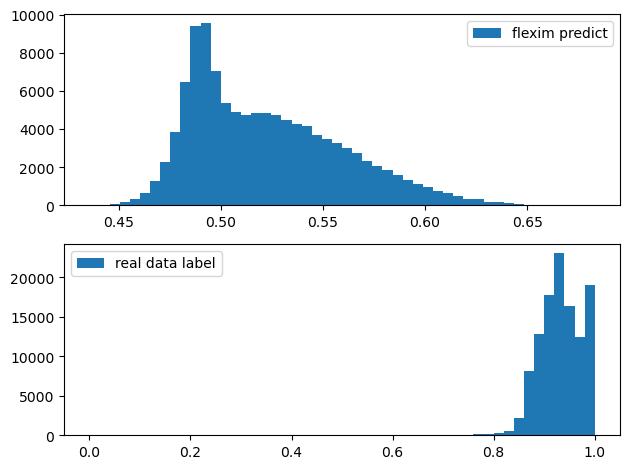

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


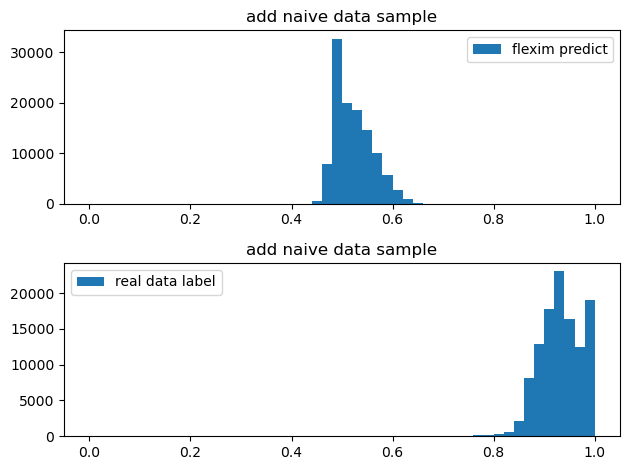

***** begin training *****
neg number flexim is 32772
pos number flexim is 58340
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 17:19:02.207259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.6292 - accuracy: 0.6584 - precision: 0.7617 - recall: 0.6788

2022-09-23 17:19:29.881987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.6292 - accuracy: 0.6584 - precision: 0.7617 - recall: 0.6788 - val_loss: 0.6049 - val_accuracy: 0.6783 - val_precision: 0.7860 - val_recall: 0.6769
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5890 - accuracy: 0.6995 - precision: 0.7967 - recall: 0.7125 - val_loss: 0.5845 - val_accuracy: 0.7016 - val_precision: 0.7791 - val_recall: 0.7391
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5858 - accuracy: 0.7024 - precision: 0.7972 - recall: 0.7179 - val_loss: 0.5876 - val_accuracy: 0.6941 - val_precision: 0.7831 - val_recall: 0.7160
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5853 - accuracy: 0.7010 - precision: 0.7982 - recall: 0.7133 - val_loss: 0.5824 - val_accuracy: 0.6987 - val_precision: 0.7786 - val_recall: 0.7334
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5847 - accuracy: 0.

2022-09-23 17:24:11.125039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2120 - accuracy: 0.9560 - precision: 0.9997 - recall: 0.9561

2022-09-23 17:24:39.195888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2120 - accuracy: 0.9560 - precision: 0.9997 - recall: 0.9561 - val_loss: 0.2021 - val_accuracy: 0.9624 - val_precision: 1.0000 - val_recall: 0.9623
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1347 - accuracy: 0.9820 - precision: 1.0000 - recall: 0.9819 - val_loss: 0.1506 - val_accuracy: 0.9868 - val_precision: 1.0000 - val_recall: 0.9867
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1175 - accuracy: 0.9913 - precision: 1.0000 - recall: 0.9913 - val_loss: 0.1209 - val_accuracy: 0.9917 - val_precision: 1.0000 - val_recall: 0.9916
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1135 - accuracy: 0.9936 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1218 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1125 - accuracy: 0.

2022-09-23 17:29:22.813964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.23786431550979614
 47/900 [>.............................] - ETA: 1s

2022-09-23 17:29:24.454290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.12992550432682037
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.440592759018427
emd real is 0.031054027180499752


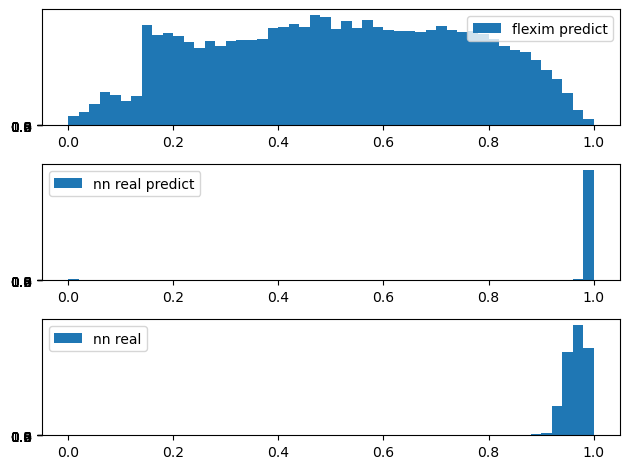

total query time is 19
wass distance flexim is 0.440592759018427
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 8
label smoothing is 0.021028565401191062


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 17:29:27.047997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 0.0044 - accuracy: 0.5500
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0025 - accuracy: 0.7500

2022-09-23 17:29:27.711952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.045
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.727
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.795
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape

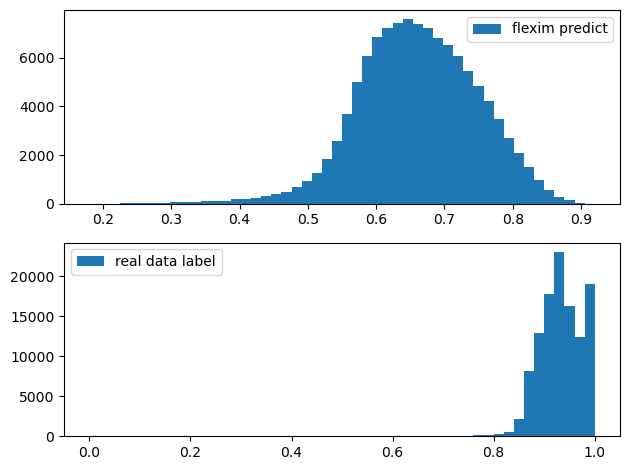

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


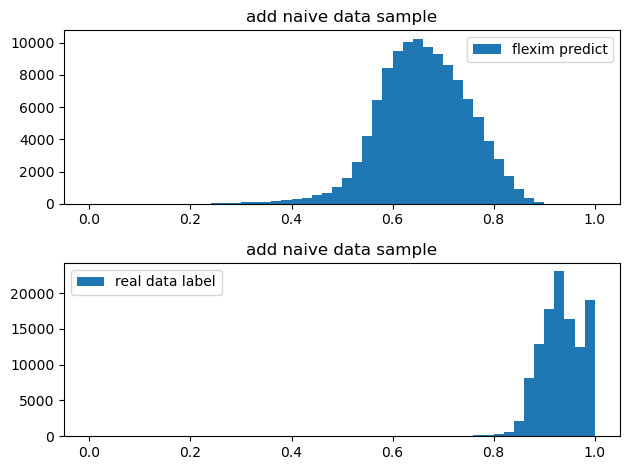

***** begin training *****
neg number flexim is 2994
pos number flexim is 88118
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 17:29:56.298598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3788 - accuracy: 0.8829 - precision: 0.9943 - recall: 0.8840

2022-09-23 17:30:23.946156: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3788 - accuracy: 0.8829 - precision: 0.9943 - recall: 0.8840 - val_loss: 0.3634 - val_accuracy: 0.8829 - val_precision: 0.9960 - val_recall: 0.8823
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3366 - accuracy: 0.8982 - precision: 0.9960 - recall: 0.8983 - val_loss: 0.3571 - val_accuracy: 0.8908 - val_precision: 0.9962 - val_recall: 0.8903
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3220 - accuracy: 0.9019 - precision: 0.9960 - recall: 0.9022 - val_loss: 0.3123 - val_accuracy: 0.9083 - val_precision: 0.9950 - val_recall: 0.9096
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3173 - accuracy: 0.9024 - precision: 0.9959 - recall: 0.9028 - val_loss: 0.2982 - val_accuracy: 0.9134 - val_precision: 0.9947 - val_recall: 0.9152
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3136 - accuracy: 0.

2022-09-23 17:35:03.588207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.9617 - precision: 0.9998 - recall: 0.9618

2022-09-23 17:35:31.195409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.1997 - accuracy: 0.9617 - precision: 0.9998 - recall: 0.9618 - val_loss: 0.1721 - val_accuracy: 0.9790 - val_precision: 1.0000 - val_recall: 0.9789
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1259 - accuracy: 0.9873 - precision: 1.0000 - recall: 0.9873 - val_loss: 0.1455 - val_accuracy: 0.9873 - val_precision: 1.0000 - val_recall: 0.9872
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1151 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.1195 - val_accuracy: 0.9914 - val_precision: 1.0000 - val_recall: 0.9914
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1127 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1193 - val_accuracy: 0.9918 - val_precision: 1.0000 - val_recall: 0.9918
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1117 - accuracy: 0.

2022-09-23 17:40:14.014733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.27152371406555176
 58/900 [>.............................] - ETA: 1s

2022-09-23 17:40:15.615820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13352514803409576
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.1779295071844485
emd real is 0.032468423625408104


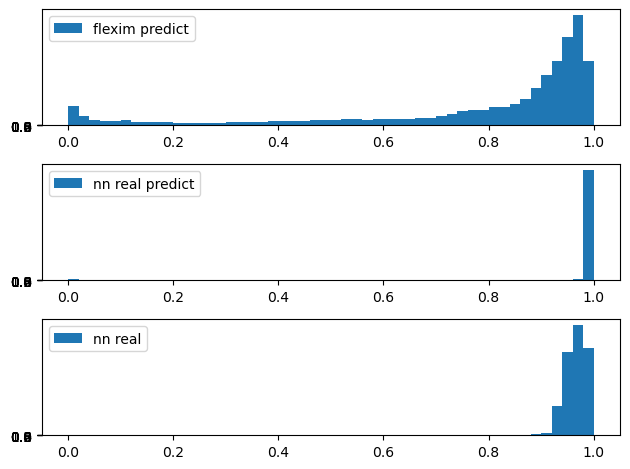

total query time is 11
wass distance flexim is 0.1779295071844485
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 8
label smoothing is 0.5980929313274791


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 17:40:18.154698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 24ms/step - loss: 0.0024 - accuracy: 0.7000
run into active learning emulate process
1/1 [==============================] - 0s 52ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0025 - accuracy: 0.5625

2022-09-23 17:40:18.816345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.409
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.318
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.523
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.5
5/5 [==============================] - 0s 7ms/step
query instance shape is

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===============

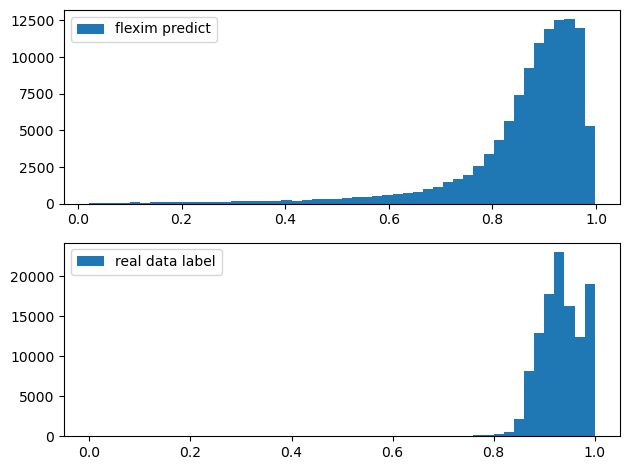

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


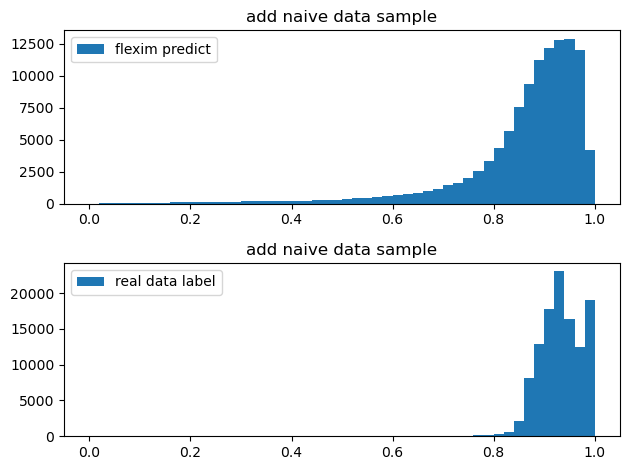

***** begin training *****
neg number flexim is 3043
pos number flexim is 88069
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 17:40:47.283756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4549 - accuracy: 0.8495 - precision: 0.9923 - recall: 0.8510

2022-09-23 17:41:14.794239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.4549 - accuracy: 0.8495 - precision: 0.9923 - recall: 0.8510 - val_loss: 0.4657 - val_accuracy: 0.8492 - val_precision: 0.9935 - val_recall: 0.8494
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4064 - accuracy: 0.8667 - precision: 0.9930 - recall: 0.8681 - val_loss: 0.3972 - val_accuracy: 0.8703 - val_precision: 0.9933 - val_recall: 0.8716
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3783 - accuracy: 0.8748 - precision: 0.9932 - recall: 0.8765 - val_loss: 0.4080 - val_accuracy: 0.8643 - val_precision: 0.9935 - val_recall: 0.8651
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3672 - accuracy: 0.8761 - precision: 0.9932 - recall: 0.8778 - val_loss: 0.4627 - val_accuracy: 0.8270 - val_precision: 0.9958 - val_recall: 0.8243
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3585 - accuracy: 0.

2022-09-23 17:45:53.462080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2059 - accuracy: 0.9572 - precision: 0.9997 - recall: 0.9573

2022-09-23 17:46:21.274261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2059 - accuracy: 0.9572 - precision: 0.9997 - recall: 0.9573 - val_loss: 0.1855 - val_accuracy: 0.9703 - val_precision: 1.0000 - val_recall: 0.9702
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1319 - accuracy: 0.9838 - precision: 1.0000 - recall: 0.9838 - val_loss: 0.1364 - val_accuracy: 0.9882 - val_precision: 1.0000 - val_recall: 0.9881
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1166 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1168 - val_accuracy: 0.9929 - val_precision: 1.0000 - val_recall: 0.9929
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1141 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1126 - val_accuracy: 0.9940 - val_precision: 1.0000 - val_recall: 0.9940
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1134 - accuracy: 0.

2022-09-23 17:51:04.658650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2736179530620575
 56/900 [>.............................] - ETA: 1s

2022-09-23 17:51:06.272227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13133276998996735
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.18319647311470397
emd real is 0.02627258950516113


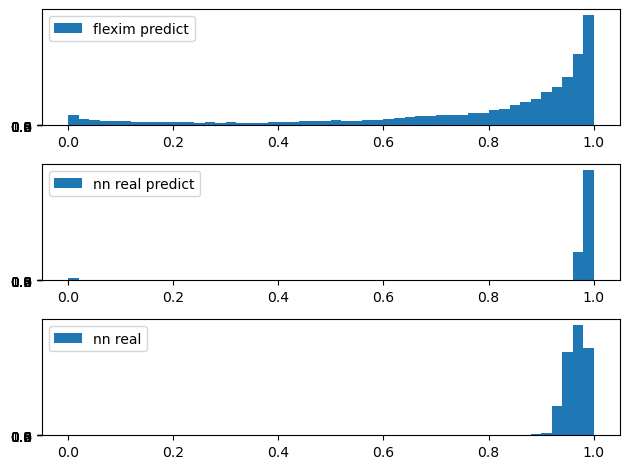

total query time is 12
wass distance flexim is 0.18319647311470397
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 9
label smoothing is 0.1311820853264628


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 17:51:08.822153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 0.0022 - accuracy: 0.5312
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.476
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0012 - accuracy: 0.5312

2022-09-23 17:51:09.493332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.773
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.818
2/2 [==============================] - 0s 2ms/step
emulate process f

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 15ms/step - loss: 8.8128e-04 - accuracy: 0.7844
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0

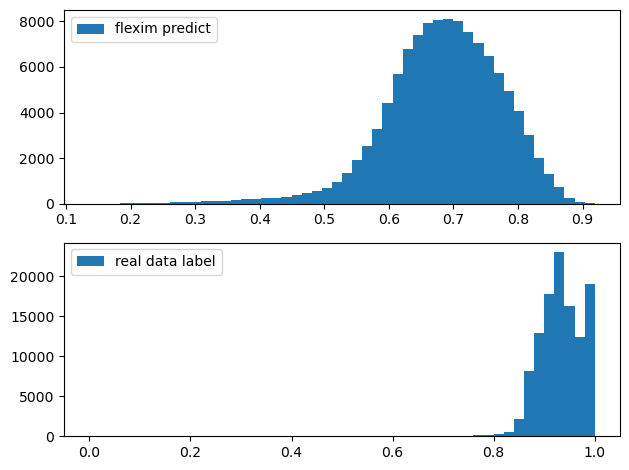

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


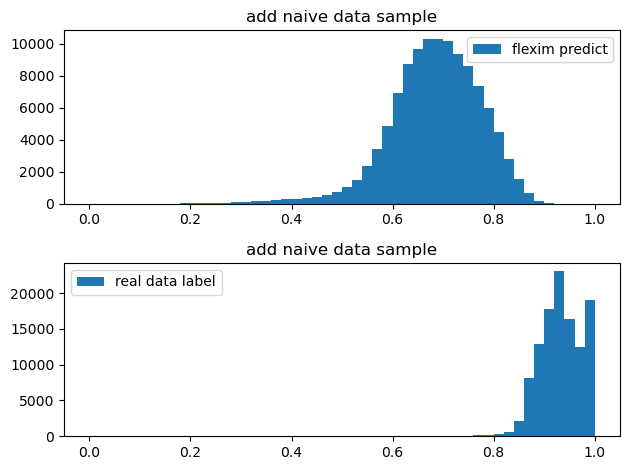

***** begin training *****
neg number flexim is 2925
pos number flexim is 88187
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 17:51:37.584566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3596 - accuracy: 0.8687 - precision: 0.9947 - recall: 0.8690

2022-09-23 17:52:05.176094: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.3596 - accuracy: 0.8687 - precision: 0.9947 - recall: 0.8690 - val_loss: 0.3368 - val_accuracy: 0.8857 - val_precision: 0.9953 - val_recall: 0.8859
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3230 - accuracy: 0.8825 - precision: 0.9967 - recall: 0.8815 - val_loss: 0.3857 - val_accuracy: 0.8657 - val_precision: 0.9972 - val_recall: 0.8634
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3171 - accuracy: 0.8845 - precision: 0.9966 - recall: 0.8837 - val_loss: 0.3414 - val_accuracy: 0.8837 - val_precision: 0.9966 - val_recall: 0.8827
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3135 - accuracy: 0.8851 - precision: 0.9969 - recall: 0.8840 - val_loss: 0.3594 - val_accuracy: 0.8796 - val_precision: 0.9967 - val_recall: 0.8783
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3121 - accuracy: 0.

2022-09-23 17:56:45.539743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2049 - accuracy: 0.9533 - precision: 0.9998 - recall: 0.9533

2022-09-23 17:57:13.367418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2049 - accuracy: 0.9533 - precision: 0.9998 - recall: 0.9533 - val_loss: 0.2077 - val_accuracy: 0.9606 - val_precision: 1.0000 - val_recall: 0.9604
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1313 - accuracy: 0.9834 - precision: 1.0000 - recall: 0.9834 - val_loss: 0.1285 - val_accuracy: 0.9888 - val_precision: 1.0000 - val_recall: 0.9887
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1145 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1365 - val_accuracy: 0.9890 - val_precision: 1.0000 - val_recall: 0.9889
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1125 - accuracy: 0.9932 - precision: 1.0000 - recall: 0.9932 - val_loss: 0.1145 - val_accuracy: 0.9922 - val_precision: 1.0000 - val_recall: 0.9922
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1119 - accuracy: 0.

2022-09-23 18:01:55.387257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 0.9999998807907104
score list flexim std is 0.28878945112228394
 58/900 [>.............................] - ETA: 1s

2022-09-23 18:01:56.962832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1338622272014618
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.19119674828483066
emd real is 0.028292154198225186


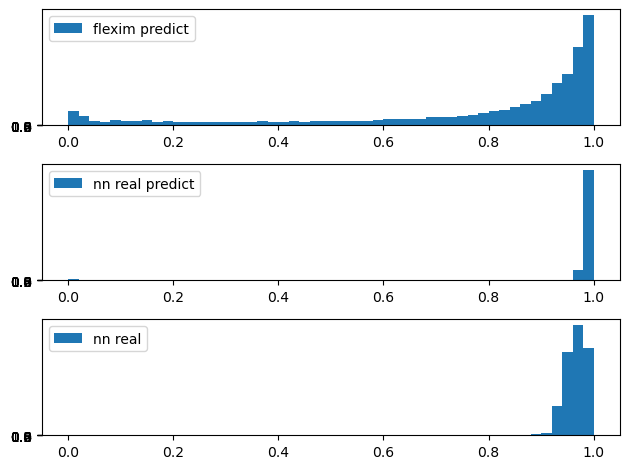

total query time is 10
wass distance flexim is 0.19119674828483066
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 7
label smoothing is 0.6537645556055539


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:01:59.484026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step - loss: 0.0048 - accuracy: 0.6313
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0045 - accuracy: 0.8125

2022-09-23 18:02:00.107374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.341
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.295
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.545
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
4 time active learning score is 0.568
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [=======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [=================

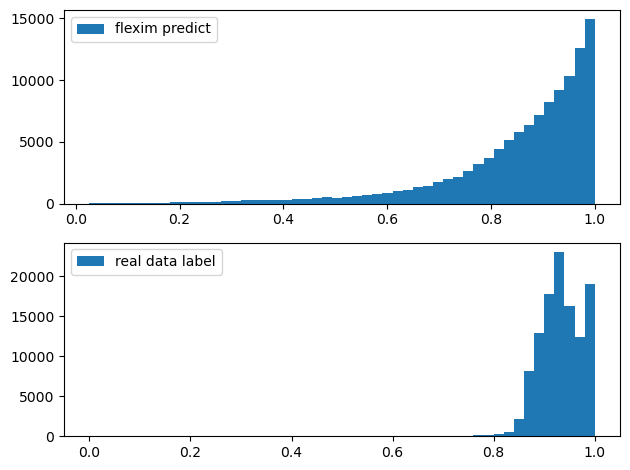

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


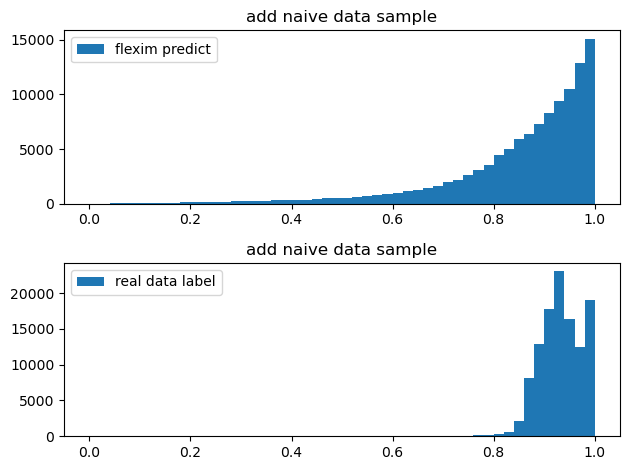

***** begin training *****
neg number flexim is 4122
pos number flexim is 86990
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:02:29.301338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5957 - accuracy: 0.7536 - precision: 0.9749 - recall: 0.7616

2022-09-23 18:02:56.629956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5957 - accuracy: 0.7536 - precision: 0.9749 - recall: 0.7616 - val_loss: 0.4029 - val_accuracy: 0.8692 - val_precision: 0.9736 - val_recall: 0.8871
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5293 - accuracy: 0.7498 - precision: 0.9838 - recall: 0.7503 - val_loss: 0.5677 - val_accuracy: 0.7104 - val_precision: 0.9892 - val_recall: 0.7045
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.5102 - accuracy: 0.7421 - precision: 0.9862 - recall: 0.7402 - val_loss: 0.5493 - val_accuracy: 0.7165 - val_precision: 0.9887 - val_recall: 0.7113
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5009 - accuracy: 0.7434 - precision: 0.9866 - recall: 0.7414 - val_loss: 0.4206 - val_accuracy: 0.8023 - val_precision: 0.9852 - val_recall: 0.8051
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.4960 - accuracy: 0.

2022-09-23 18:07:36.428615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2034 - accuracy: 0.9572 - precision: 0.9997 - recall: 0.9572

2022-09-23 18:08:04.293575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2034 - accuracy: 0.9572 - precision: 0.9997 - recall: 0.9572 - val_loss: 0.1725 - val_accuracy: 0.9774 - val_precision: 1.0000 - val_recall: 0.9774
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1307 - accuracy: 0.9837 - precision: 1.0000 - recall: 0.9836 - val_loss: 0.1281 - val_accuracy: 0.9889 - val_precision: 1.0000 - val_recall: 0.9888
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1161 - accuracy: 0.9919 - precision: 1.0000 - recall: 0.9919 - val_loss: 0.1227 - val_accuracy: 0.9910 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1128 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9933 - val_loss: 0.1205 - val_accuracy: 0.9913 - val_precision: 1.0000 - val_recall: 0.9913
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1129 - accuracy: 0.

2022-09-23 18:12:47.912249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2971958518028259
 52/900 [>.............................] - ETA: 1s

2022-09-23 18:12:49.523197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1337449550628662
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.3303598801849761
emd real is 0.02902228408547127


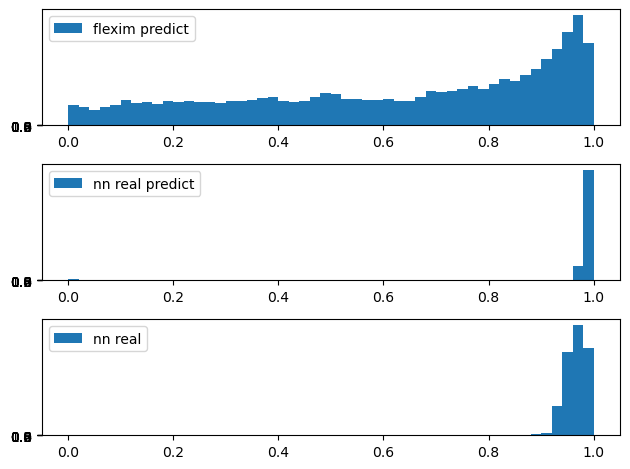

total query time is 15
wass distance flexim is 0.3303598801849761
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.655079244692931


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:12:52.100827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 9.4800e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
4/6 [===================>..........] - ETA: 0s - loss: 9.4314e-13 - accuracy: 0.5078

2022-09-23 18:12:52.772885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 8ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [================

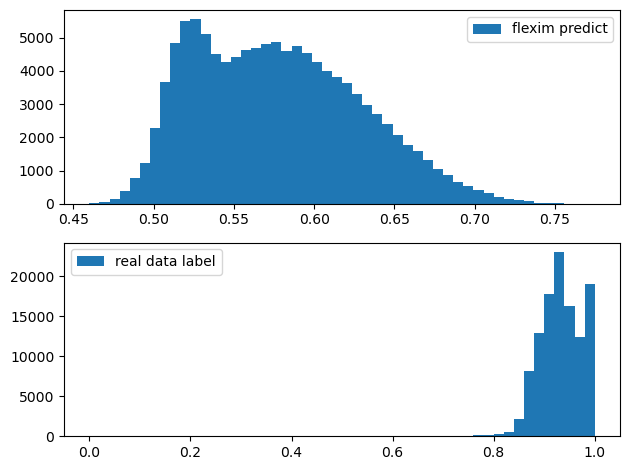

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


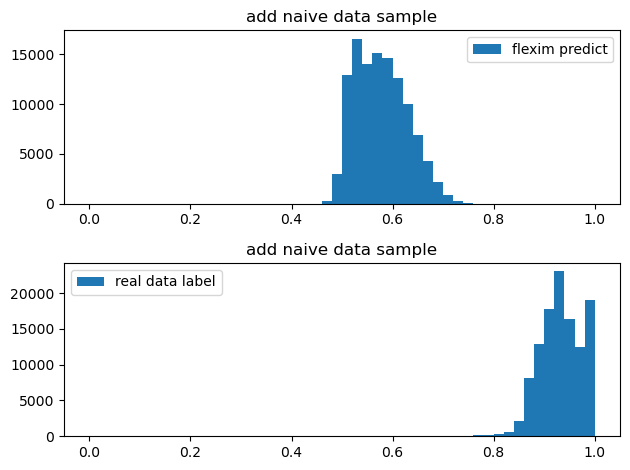

***** begin training *****
neg number flexim is 2627
pos number flexim is 88485
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:13:20.378872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5884 - accuracy: 0.7192 - precision: 0.9857 - recall: 0.7213

2022-09-23 18:13:48.424260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.5884 - accuracy: 0.7192 - precision: 0.9857 - recall: 0.7213 - val_loss: 0.4693 - val_accuracy: 0.7891 - val_precision: 0.9891 - val_recall: 0.7915
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4809 - accuracy: 0.7634 - precision: 0.9931 - recall: 0.7617 - val_loss: 0.5662 - val_accuracy: 0.7279 - val_precision: 0.9958 - val_recall: 0.7228
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4577 - accuracy: 0.7751 - precision: 0.9935 - recall: 0.7735 - val_loss: 0.4705 - val_accuracy: 0.7914 - val_precision: 0.9936 - val_recall: 0.7903
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4527 - accuracy: 0.7735 - precision: 0.9938 - recall: 0.7717 - val_loss: 0.4613 - val_accuracy: 0.7916 - val_precision: 0.9941 - val_recall: 0.7900
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4483 - accuracy: 0.

2022-09-23 18:18:33.249482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2042 - accuracy: 0.9598 - precision: 0.9997 - recall: 0.9598

2022-09-23 18:19:01.118803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2042 - accuracy: 0.9598 - precision: 0.9997 - recall: 0.9598 - val_loss: 0.1664 - val_accuracy: 0.9803 - val_precision: 1.0000 - val_recall: 0.9803
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1260 - accuracy: 0.9879 - precision: 1.0000 - recall: 0.9879 - val_loss: 0.1313 - val_accuracy: 0.9892 - val_precision: 1.0000 - val_recall: 0.9892
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1123 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1146 - val_accuracy: 0.9928 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1112 - accuracy: 0.9941 - precision: 1.0000 - recall: 0.9941 - val_loss: 0.1063 - val_accuracy: 0.9960 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1106 - accuracy: 0.

2022-09-23 18:23:47.866877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2970913052558899
 52/900 [>.............................] - ETA: 1s

2022-09-23 18:23:49.467545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13229209184646606
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.26129371406359625
emd real is 0.03018600802781118


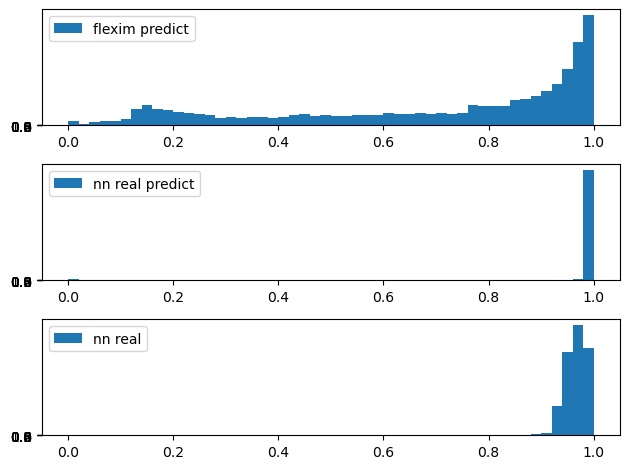

total query time is 9
wass distance flexim is 0.26129371406359625
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.0


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:23:52.114081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 6.2673e-06 - accuracy: 0.5500
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 6.0164e-06 - accuracy: 0.4688

2022-09-23 18:23:52.876128: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 39ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.182
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 13ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.818
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 1.0
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9

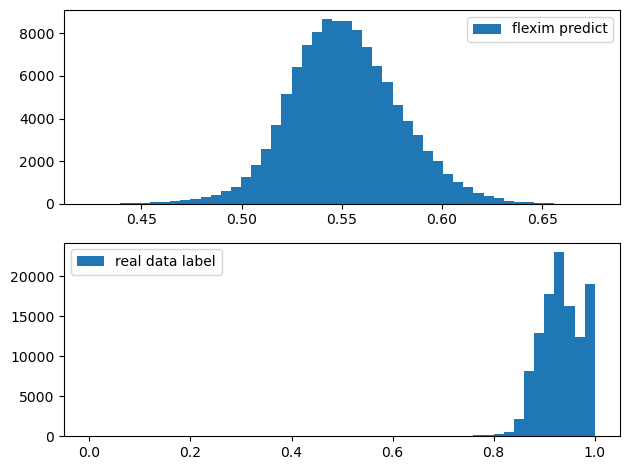

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


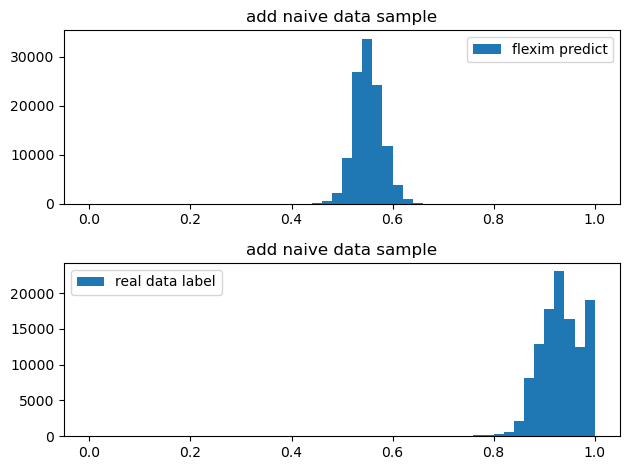

***** begin training *****
neg number flexim is 2397
pos number flexim is 88715
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:24:21.110428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4197 - accuracy: 0.8488 - precision: 0.9939 - recall: 0.8499

2022-09-23 18:24:49.225357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4197 - accuracy: 0.8488 - precision: 0.9939 - recall: 0.8499 - val_loss: 0.3857 - val_accuracy: 0.8643 - val_precision: 0.9961 - val_recall: 0.8640
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3661 - accuracy: 0.8624 - precision: 0.9964 - recall: 0.8619 - val_loss: 0.4143 - val_accuracy: 0.8485 - val_precision: 0.9978 - val_recall: 0.8462
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3557 - accuracy: 0.8630 - precision: 0.9967 - recall: 0.8621 - val_loss: 0.3531 - val_accuracy: 0.8765 - val_precision: 0.9965 - val_recall: 0.8763
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3525 - accuracy: 0.8624 - precision: 0.9968 - recall: 0.8615 - val_loss: 0.3523 - val_accuracy: 0.8730 - val_precision: 0.9967 - val_recall: 0.8725
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3502 - accuracy: 0.

2022-09-23 18:29:34.257104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2046 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581

2022-09-23 18:30:02.633221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2046 - accuracy: 0.9580 - precision: 0.9998 - recall: 0.9581 - val_loss: 0.1832 - val_accuracy: 0.9726 - val_precision: 1.0000 - val_recall: 0.9725
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1322 - accuracy: 0.9843 - precision: 1.0000 - recall: 0.9842 - val_loss: 0.1361 - val_accuracy: 0.9876 - val_precision: 1.0000 - val_recall: 0.9875
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1148 - accuracy: 0.9921 - precision: 1.0000 - recall: 0.9920 - val_loss: 0.1185 - val_accuracy: 0.9910 - val_precision: 1.0000 - val_recall: 0.9910
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1112 - accuracy: 0.9937 - precision: 1.0000 - recall: 0.9937 - val_loss: 0.1146 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9925
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1112 - accuracy: 0.

2022-09-23 18:34:47.131111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2733404040336609
 55/900 [>.............................] - ETA: 1s

2022-09-23 18:34:48.738332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13456080853939056
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.1493130495429435
emd real is 0.030843088760822673


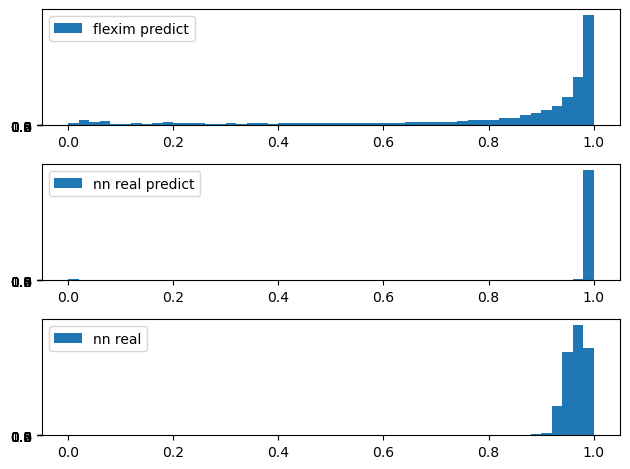

total query time is 9
wass distance flexim is 0.1493130495429435
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 19
label smoothing is 0.008510569762281718


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:34:51.348773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 1.6864e-06 - accuracy: 0.4563
run into active learning emulate process
1/1 [==============================] - 0s 66ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.3911e-06 - accuracy: 0.6562

2022-09-23 18:34:52.036307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.205
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.409
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.864
2/2 [==============================] - 0s 7ms/step
emulate process finis

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.833
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 17ms/step - loss: 1.0739e-06 - accuracy: 0.7455
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.977
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.977
6/6 [==============================] - 0s 2ms/st

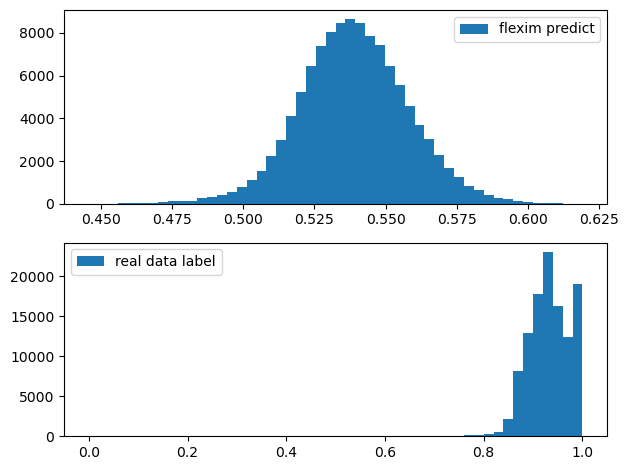

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


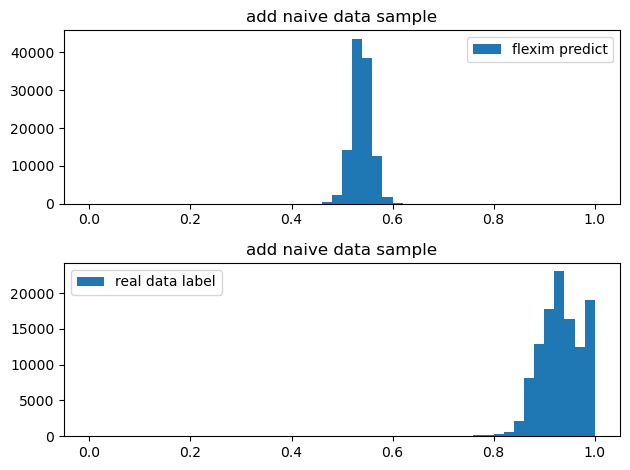

***** begin training *****
neg number flexim is 2100
pos number flexim is 89012
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:35:20.516134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3503 - accuracy: 0.8733 - precision: 0.9966 - recall: 0.8733

2022-09-23 18:35:48.529746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.3503 - accuracy: 0.8733 - precision: 0.9966 - recall: 0.8733 - val_loss: 0.3470 - val_accuracy: 0.8820 - val_precision: 0.9979 - val_recall: 0.8810
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2959 - accuracy: 0.8846 - precision: 0.9985 - recall: 0.8832 - val_loss: 0.3072 - val_accuracy: 0.8993 - val_precision: 0.9984 - val_recall: 0.8984
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2835 - accuracy: 0.8903 - precision: 0.9987 - recall: 0.8888 - val_loss: 0.3075 - val_accuracy: 0.9009 - val_precision: 0.9985 - val_recall: 0.8999
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2791 - accuracy: 0.8947 - precision: 0.9990 - recall: 0.8932 - val_loss: 0.3365 - val_accuracy: 0.8844 - val_precision: 0.9987 - val_recall: 0.8828
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.2780 - accuracy: 0.

2022-09-23 18:40:33.778857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2158 - accuracy: 0.9570 - precision: 0.9997 - recall: 0.9572

2022-09-23 18:41:01.499732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2158 - accuracy: 0.9570 - precision: 0.9997 - recall: 0.9572 - val_loss: 0.2134 - val_accuracy: 0.9558 - val_precision: 1.0000 - val_recall: 0.9557
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1286 - accuracy: 0.9823 - precision: 1.0000 - recall: 0.9823 - val_loss: 0.1295 - val_accuracy: 0.9868 - val_precision: 1.0000 - val_recall: 0.9867
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1146 - accuracy: 0.9908 - precision: 1.0000 - recall: 0.9907 - val_loss: 0.1111 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9938
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1132 - accuracy: 0.9923 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.1131 - val_accuracy: 0.9929 - val_precision: 1.0000 - val_recall: 0.9929
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1126 - accuracy: 0.

2022-09-23 18:45:45.396488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.26286780834198
 53/900 [>.............................] - ETA: 1s

2022-09-23 18:45:47.016575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13391293585300446
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.12831423443596854
emd real is 0.031171535347525238


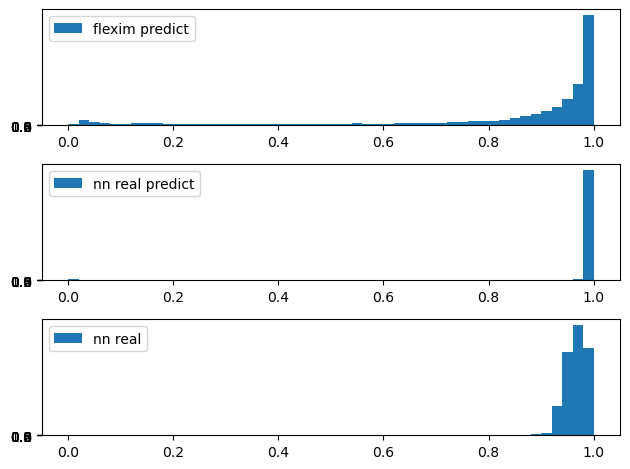

total query time is 10
wass distance flexim is 0.12831423443596854
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.0


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:45:49.612578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 17ms/step - loss: 6.6132e-06 - accuracy: 0.5938
run into active learning emulate process
1/1 [==============================] - 0s 69ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 8.4936e-06 - accuracy: 0.4062

2022-09-23 18:45:50.304289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.5
6/6 [==============================] - 0s 9ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.455
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch fo

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 24ms/step - loss: 4.5449e-06 - accuracy: 0.7303
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 16ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 35ms/step
1 time active learning score is 0.958
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.812
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 16ms/step - loss: 3.7157e-06 - accuracy: 0.8170
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.795
6/6 [==============================] - 0s 3ms/st

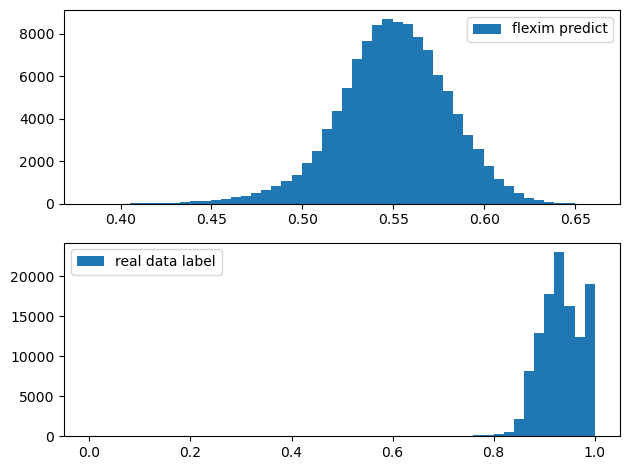

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


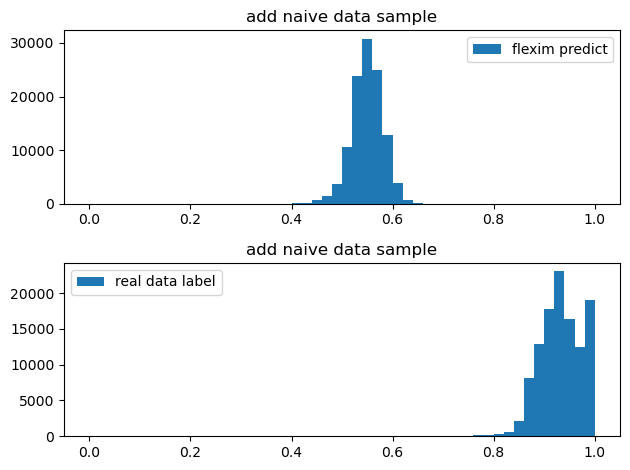

***** begin training *****
neg number flexim is 4911
pos number flexim is 86201
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:46:18.965259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.3821 - accuracy: 0.8657 - precision: 0.9896 - recall: 0.8671

2022-09-23 18:46:47.218113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.3821 - accuracy: 0.8657 - precision: 0.9896 - recall: 0.8671 - val_loss: 0.3094 - val_accuracy: 0.9038 - val_precision: 0.9913 - val_recall: 0.9061
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.3282 - accuracy: 0.8816 - precision: 0.9939 - recall: 0.8802 - val_loss: 0.2857 - val_accuracy: 0.9119 - val_precision: 0.9915 - val_recall: 0.9146
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3197 - accuracy: 0.8868 - precision: 0.9946 - recall: 0.8852 - val_loss: 0.3348 - val_accuracy: 0.8875 - val_precision: 0.9949 - val_recall: 0.8854
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3186 - accuracy: 0.8863 - precision: 0.9944 - recall: 0.8849 - val_loss: 0.3559 - val_accuracy: 0.8764 - val_precision: 0.9956 - val_recall: 0.8730
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3159 - accuracy: 0.

2022-09-23 18:51:32.363709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2029 - accuracy: 0.9598 - precision: 0.9997 - recall: 0.9599

2022-09-23 18:52:00.460015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2029 - accuracy: 0.9598 - precision: 0.9997 - recall: 0.9599 - val_loss: 0.1788 - val_accuracy: 0.9755 - val_precision: 1.0000 - val_recall: 0.9754
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1306 - accuracy: 0.9850 - precision: 1.0000 - recall: 0.9850 - val_loss: 0.1300 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1180 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9921 - val_loss: 0.1165 - val_accuracy: 0.9932 - val_precision: 1.0000 - val_recall: 0.9932
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1155 - accuracy: 0.9937 - precision: 1.0000 - recall: 0.9937 - val_loss: 0.1195 - val_accuracy: 0.9925 - val_precision: 1.0000 - val_recall: 0.9924
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1135 - accuracy: 0.

2022-09-23 18:56:47.235825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2743877172470093
 52/900 [>.............................] - ETA: 1s

2022-09-23 18:56:48.895973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13246110081672668
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.1682433777301991
emd real is 0.03093393244165768


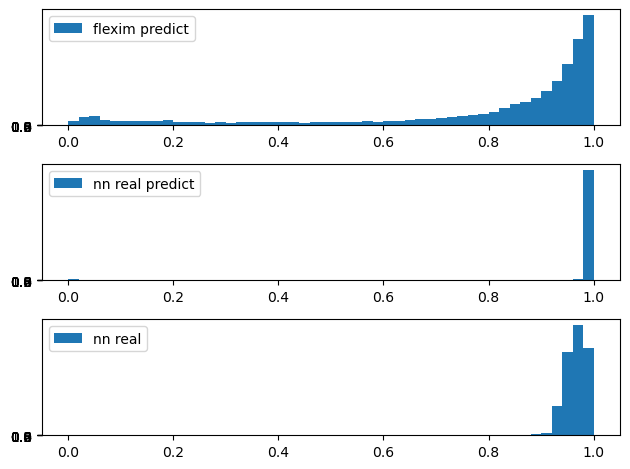

total query time is 9
wass distance flexim is 0.1682433777301991
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 19
label smoothing is 0.5768456065382267


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 18:56:51.525506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 15ms/step - loss: 1.4605e-06 - accuracy: 0.3125
run into active learning emulate process
1/1 [==============================] - 0s 67ms/step
active learning initial score is 0.476
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.4197e-06 - accuracy: 0.4062

2022-09-23 18:56:52.297663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.523
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.705
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 24ms/step - loss: 1.3106e-06 - accuracy: 0.6203
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 15ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 36ms/step
1 time active learning score is 0.917
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step
2 time active learning score is 0.875
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 19ms/step - loss: 1.2165e-06 - accuracy: 0.6809
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.818
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.977
6/6 [==============================] - 0s 2ms/ste

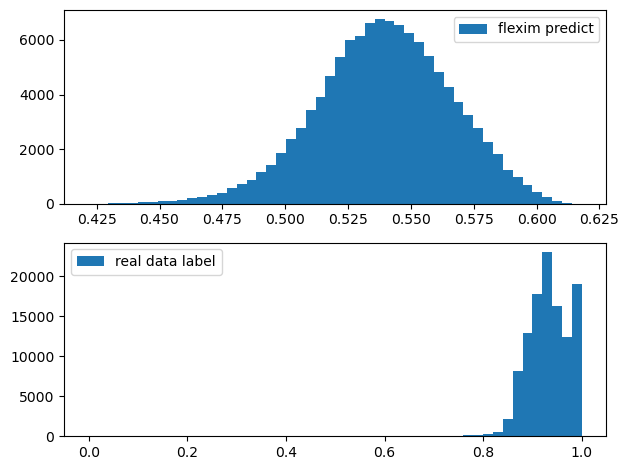

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


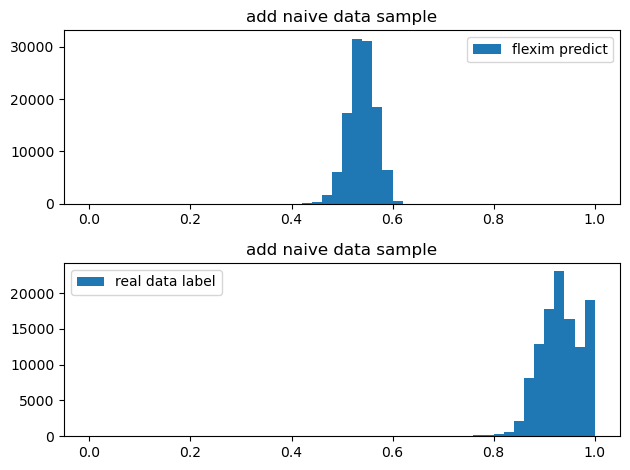

***** begin training *****
neg number flexim is 6594
pos number flexim is 84518
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 18:57:21.301907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.8023 - precision: 0.9788 - recall: 0.8043

2022-09-23 18:57:49.635085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4679 - accuracy: 0.8023 - precision: 0.9788 - recall: 0.8043 - val_loss: 0.5251 - val_accuracy: 0.7652 - val_precision: 0.9935 - val_recall: 0.7519
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3954 - accuracy: 0.8284 - precision: 0.9883 - recall: 0.8247 - val_loss: 0.4115 - val_accuracy: 0.8379 - val_precision: 0.9887 - val_recall: 0.8349
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3884 - accuracy: 0.8337 - precision: 0.9888 - recall: 0.8301 - val_loss: 0.4015 - val_accuracy: 0.8427 - val_precision: 0.9877 - val_recall: 0.8409
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3856 - accuracy: 0.8346 - precision: 0.9889 - recall: 0.8311 - val_loss: 0.3584 - val_accuracy: 0.8654 - val_precision: 0.9842 - val_recall: 0.8689
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3859 - accuracy: 0.

2022-09-23 19:02:34.861618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2022 - accuracy: 0.9604 - precision: 0.9997 - recall: 0.9605

2022-09-23 19:03:03.006081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.2022 - accuracy: 0.9604 - precision: 0.9997 - recall: 0.9605 - val_loss: 0.1707 - val_accuracy: 0.9777 - val_precision: 1.0000 - val_recall: 0.9776
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1270 - accuracy: 0.9866 - precision: 1.0000 - recall: 0.9866 - val_loss: 0.1289 - val_accuracy: 0.9900 - val_precision: 1.0000 - val_recall: 0.9900
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1156 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.1234 - val_accuracy: 0.9905 - val_precision: 1.0000 - val_recall: 0.9905
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1131 - accuracy: 0.9936 - precision: 1.0000 - recall: 0.9936 - val_loss: 0.1144 - val_accuracy: 0.9928 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1120 - accuracy: 0.

2022-09-23 19:07:47.554201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.3133305013179779
 51/900 [>.............................] - ETA: 1s

2022-09-23 19:07:49.207782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1313769370317459
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2383180325331355
emd real is 0.026459148414909872


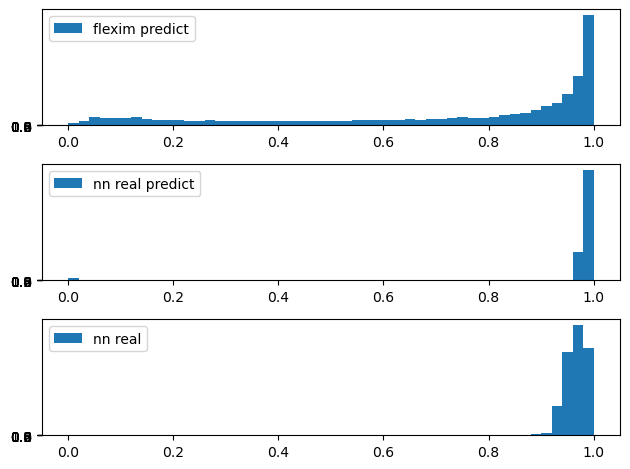

total query time is 10
wass distance flexim is 0.2383180325331355
#######################################################################################
simi_kind is 2


/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.0


2022-09-23 19:07:51.889740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 5.5578e-06 - accuracy: 0.5938
run into active learning emulate process
1/1 [==============================] - 0s 69ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 4.9472e-06 - accuracy: 0.5938

2022-09-23 19:07:52.650099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 37ms/step
1 time active learning score is 0.273
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.568
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.455
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 13ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 7ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.955
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.864
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
finish all cluster binary and active search
make modification new new
generate cosine naive positive and negative data new
length of next_result_table is 2
result table shape is (10, 101)
(generator pi

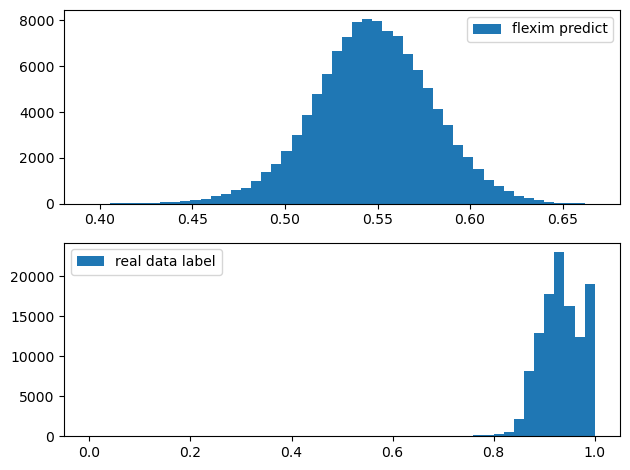

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


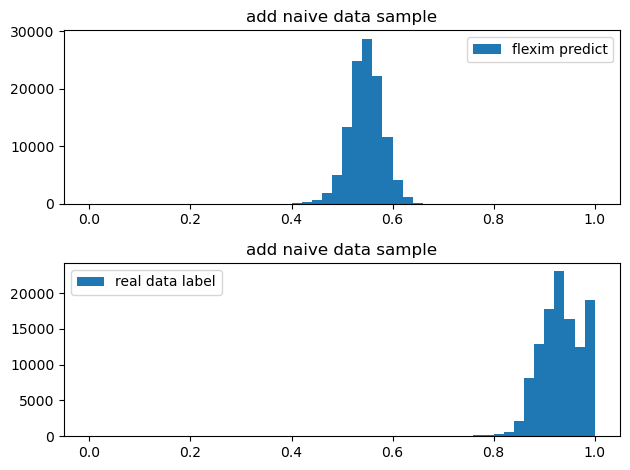

***** begin training *****
neg number flexim is 6150
pos number flexim is 84962
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 19:08:21.233635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4679 - accuracy: 0.8142 - precision: 0.9790 - recall: 0.8183

2022-09-23 19:08:49.534733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4679 - accuracy: 0.8142 - precision: 0.9790 - recall: 0.8183 - val_loss: 0.4829 - val_accuracy: 0.7898 - val_precision: 0.9918 - val_recall: 0.7805
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3908 - accuracy: 0.8278 - precision: 0.9881 - recall: 0.8253 - val_loss: 0.4638 - val_accuracy: 0.7962 - val_precision: 0.9939 - val_recall: 0.7858
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3798 - accuracy: 0.8305 - precision: 0.9897 - recall: 0.8269 - val_loss: 0.4271 - val_accuracy: 0.8262 - val_precision: 0.9910 - val_recall: 0.8206
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3761 - accuracy: 0.8327 - precision: 0.9903 - recall: 0.8287 - val_loss: 0.4064 - val_accuracy: 0.8301 - val_precision: 0.9909 - val_recall: 0.8250
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3716 - accuracy: 0.

2022-09-23 19:13:35.311015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1987 - accuracy: 0.9591 - precision: 0.9998 - recall: 0.9591

2022-09-23 19:14:03.691568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.1987 - accuracy: 0.9591 - precision: 0.9998 - recall: 0.9591 - val_loss: 0.1742 - val_accuracy: 0.9749 - val_precision: 1.0000 - val_recall: 0.9748
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1299 - accuracy: 0.9852 - precision: 1.0000 - recall: 0.9852 - val_loss: 0.1253 - val_accuracy: 0.9917 - val_precision: 1.0000 - val_recall: 0.9916
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1173 - accuracy: 0.9924 - precision: 1.0000 - recall: 0.9924 - val_loss: 0.1247 - val_accuracy: 0.9913 - val_precision: 1.0000 - val_recall: 0.9912
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1153 - accuracy: 0.9937 - precision: 1.0000 - recall: 0.9937 - val_loss: 0.1113 - val_accuracy: 0.9949 - val_precision: 1.0000 - val_recall: 0.9948
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1146 - accuracy: 0.

2022-09-23 19:18:49.283327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.3164193630218506
 52/900 [>.............................] - ETA: 1s

2022-09-23 19:18:50.929212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13175199925899506
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2310828181885335
emd real is 0.02793768031927538


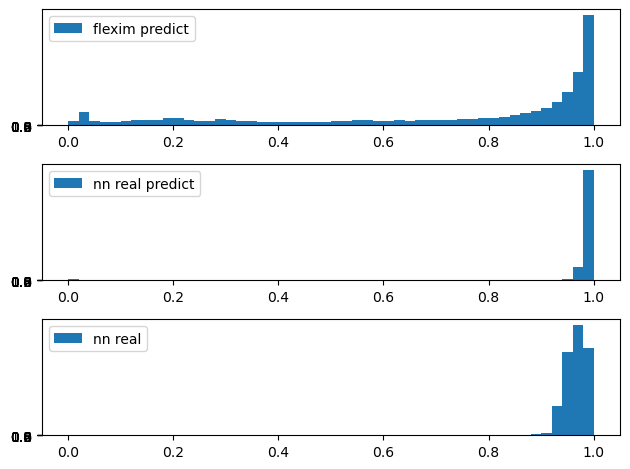

total query time is 10
wass distance flexim is 0.2310828181885335
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 37
label smoothing is 0.6999449415767879


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 19:18:53.545992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 22ms/step - loss: 6.7506e-12 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 61ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
3/6 [==============>...............] - ETA: 0s - loss: 6.8585e-12 - accuracy: 0.4688

2022-09-23 19:18:54.308921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 38ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 8ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 14ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 36ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 16ms/step - loss: 9.5288e-12 - accuracy: 0.5680
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 13ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/st

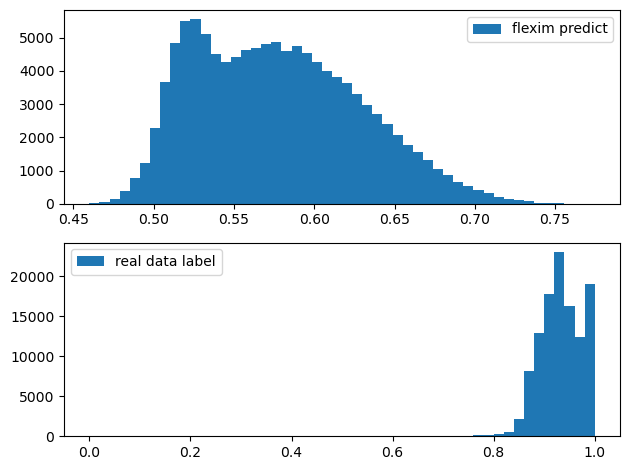

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


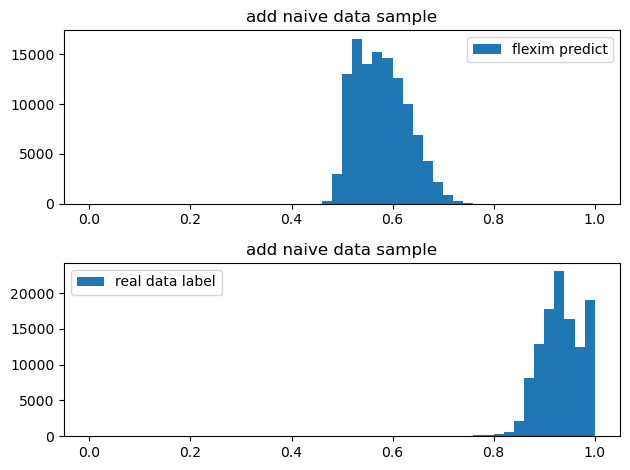

***** begin training *****
neg number flexim is 2635
pos number flexim is 88477
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 19:19:22.962740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5817 - accuracy: 0.7343 - precision: 0.9857 - recall: 0.7371

2022-09-23 19:19:51.391173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.5817 - accuracy: 0.7343 - precision: 0.9857 - recall: 0.7371 - val_loss: 0.5819 - val_accuracy: 0.6973 - val_precision: 0.9925 - val_recall: 0.6934
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4758 - accuracy: 0.7544 - precision: 0.9931 - recall: 0.7523 - val_loss: 0.5686 - val_accuracy: 0.7316 - val_precision: 0.9964 - val_recall: 0.7262
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4564 - accuracy: 0.7771 - precision: 0.9936 - recall: 0.7754 - val_loss: 0.5070 - val_accuracy: 0.7731 - val_precision: 0.9949 - val_recall: 0.7703
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4539 - accuracy: 0.7765 - precision: 0.9938 - recall: 0.7747 - val_loss: 0.4458 - val_accuracy: 0.8071 - val_precision: 0.9927 - val_recall: 0.8073
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4522 - accuracy: 0.

2022-09-23 19:24:36.786141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9613 - precision: 0.9997 - recall: 0.9613

2022-09-23 19:25:04.888031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.1970 - accuracy: 0.9613 - precision: 0.9997 - recall: 0.9613 - val_loss: 0.1720 - val_accuracy: 0.9770 - val_precision: 1.0000 - val_recall: 0.9769
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1264 - accuracy: 0.9868 - precision: 1.0000 - recall: 0.9867 - val_loss: 0.1231 - val_accuracy: 0.9911 - val_precision: 1.0000 - val_recall: 0.9911
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1151 - accuracy: 0.9927 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.1251 - val_accuracy: 0.9899 - val_precision: 1.0000 - val_recall: 0.9899
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1131 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9935 - val_loss: 0.1115 - val_accuracy: 0.9940 - val_precision: 1.0000 - val_recall: 0.9940
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1121 - accuracy: 0.

2022-09-23 19:29:49.570935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2794959545135498
 51/900 [>.............................] - ETA: 1s

2022-09-23 19:29:51.205120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13657915592193604
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.24322542361305322
emd real is 0.03235104815430528


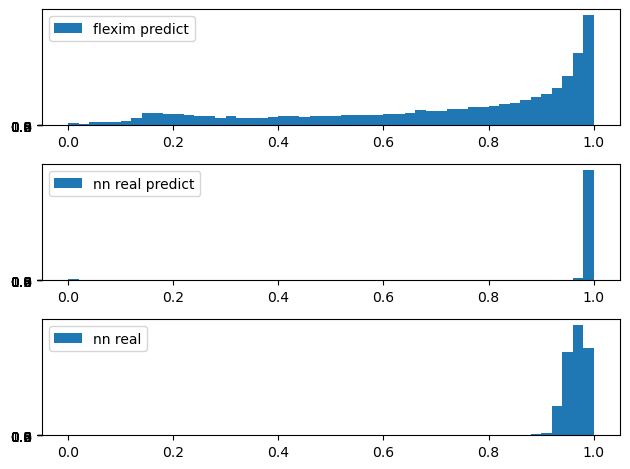

total query time is 9
wass distance flexim is 0.24322542361305322
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 10
label smoothing is 0.02033363022408974


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 19:29:53.854566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 17ms/step - loss: 0.0017 - accuracy: 0.5063
run into active learning emulate process
1/1 [==============================] - 0s 71ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 7.1492e-04 - accuracy: 0.5938

2022-09-23 19:29:54.705708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 9ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 8ms/step
2 time active learning score is 0.409
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.864
2/2 [==============================] - 0s 7ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 25ms/step - loss: 6.1423e-04 - accuracy: 0.6391
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 7ms/step
2 time active learning score is 0.917
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 19ms/step - loss: 4.6554e-04 - accuracy: 0.7952
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 13ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 7ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2m

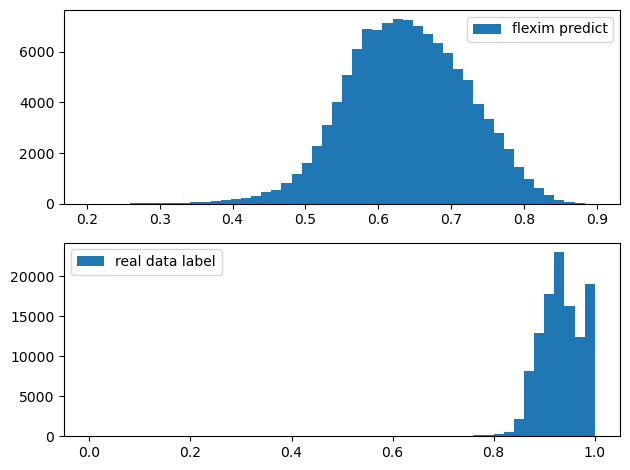

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


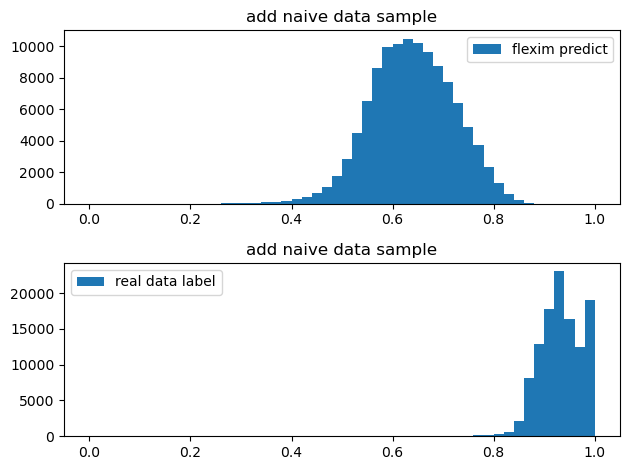

***** begin training *****
neg number flexim is 3886
pos number flexim is 87226
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 19:30:23.247262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4916 - accuracy: 0.8190 - precision: 0.9857 - recall: 0.8229

2022-09-23 19:30:51.788097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4916 - accuracy: 0.8190 - precision: 0.9857 - recall: 0.8229 - val_loss: 0.4480 - val_accuracy: 0.8362 - val_precision: 0.9890 - val_recall: 0.8381
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4535 - accuracy: 0.8202 - precision: 0.9884 - recall: 0.8219 - val_loss: 0.5319 - val_accuracy: 0.7706 - val_precision: 0.9920 - val_recall: 0.7665
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4388 - accuracy: 0.8160 - precision: 0.9893 - recall: 0.8166 - val_loss: 0.5000 - val_accuracy: 0.7812 - val_precision: 0.9920 - val_recall: 0.7776
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4350 - accuracy: 0.8128 - precision: 0.9896 - recall: 0.8129 - val_loss: 0.4101 - val_accuracy: 0.8383 - val_precision: 0.9899 - val_recall: 0.8395
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.4308 - accuracy: 0.

2022-09-23 19:35:33.253685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2033 - accuracy: 0.9573 - precision: 0.9997 - recall: 0.9573

2022-09-23 19:36:00.730730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2033 - accuracy: 0.9573 - precision: 0.9997 - recall: 0.9573 - val_loss: 0.2073 - val_accuracy: 0.9594 - val_precision: 1.0000 - val_recall: 0.9593
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1313 - accuracy: 0.9829 - precision: 1.0000 - recall: 0.9828 - val_loss: 0.1322 - val_accuracy: 0.9879 - val_precision: 1.0000 - val_recall: 0.9879
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1148 - accuracy: 0.9916 - precision: 1.0000 - recall: 0.9916 - val_loss: 0.1202 - val_accuracy: 0.9906 - val_precision: 1.0000 - val_recall: 0.9906
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.1133 - accuracy: 0.9930 - precision: 1.0000 - recall: 0.9930 - val_loss: 0.1171 - val_accuracy: 0.9916 - val_precision: 1.0000 - val_recall: 0.9915
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1120 - accuracy: 0.

2022-09-23 19:40:35.253837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2900712192058563
 57/900 [>.............................] - ETA: 1s

2022-09-23 19:40:36.827617: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.13778164982795715
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2609768729416146
emd real is 0.0292379515441142


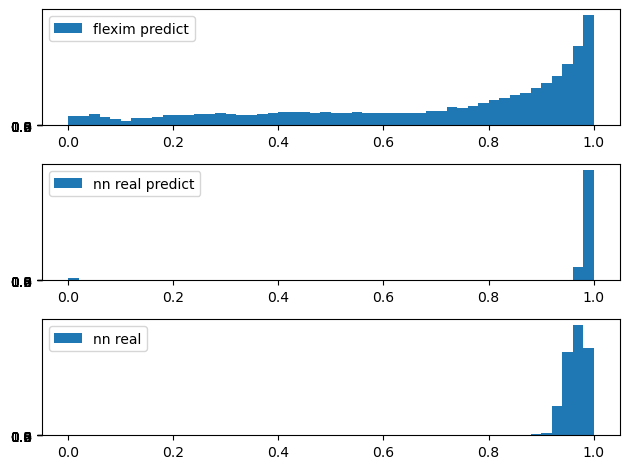

total query time is 9
wass distance flexim is 0.2609768729416146
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
run first fetch
new1
1 binary fetch
self.training_done is False
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 16
label smoothing is 0.0017814486327780515


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-23 19:40:39.437738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 28ms/step - loss: 1.0404e-05 - accuracy: 0.6750
run into active learning emulate process
1/1 [==============================] - 0s 66ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
1/6 [====>.........................] - ETA: 0s - loss: 1.3977e-05 - accuracy: 0.6250

2022-09-23 19:40:40.247779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.25
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.682
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.841
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
run first fetch
new1
2 binary fetch
self.training_done is False
run active learning fetch for c

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 8ms/step
active learning initial score is 0.81
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 34ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [========

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:707: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 16ms/step - loss: 6.9517e-06 - accuracy: 0.7787
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.682
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 3ms/st

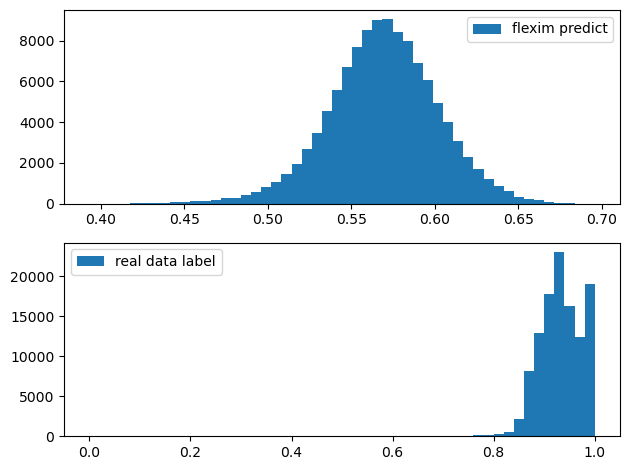

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


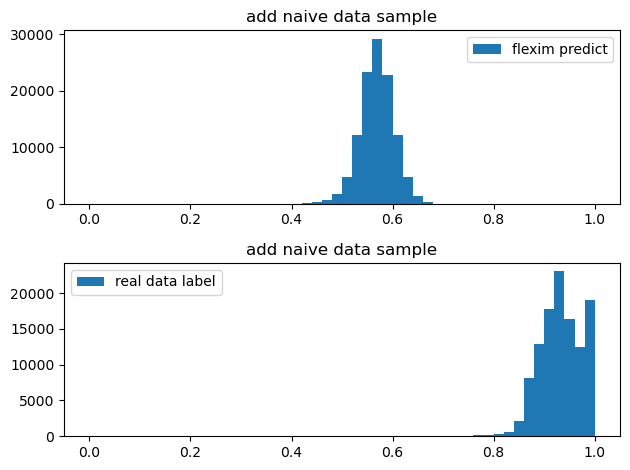

***** begin training *****
neg number flexim is 2274
pos number flexim is 88838
use bias is False
gamma is 0
label smoothing is 0.04
new version 1
Epoch 1/10


2022-09-23 19:41:07.970266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.4488 - accuracy: 0.8436 - precision: 0.9934 - recall: 0.8452

2022-09-23 19:41:35.861033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.4488 - accuracy: 0.8436 - precision: 0.9934 - recall: 0.8452 - val_loss: 0.4812 - val_accuracy: 0.8194 - val_precision: 0.9958 - val_recall: 0.8180
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3945 - accuracy: 0.8584 - precision: 0.9951 - recall: 0.8590 - val_loss: 0.3474 - val_accuracy: 0.8826 - val_precision: 0.9949 - val_recall: 0.8840
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3763 - accuracy: 0.8591 - precision: 0.9958 - recall: 0.8591 - val_loss: 0.3524 - val_accuracy: 0.8769 - val_precision: 0.9955 - val_recall: 0.8776
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.3693 - accuracy: 0.8609 - precision: 0.9960 - recall: 0.8608 - val_loss: 0.2921 - val_accuracy: 0.9040 - val_precision: 0.9931 - val_recall: 0.9077
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.3667 - accuracy: 0.

2022-09-23 19:46:12.793730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9578 - precision: 0.9998 - recall: 0.9579

2022-09-23 19:46:40.310010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2015 - accuracy: 0.9578 - precision: 0.9998 - recall: 0.9579 - val_loss: 0.1729 - val_accuracy: 0.9785 - val_precision: 1.0000 - val_recall: 0.9784
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1315 - accuracy: 0.9835 - precision: 1.0000 - recall: 0.9835 - val_loss: 0.1255 - val_accuracy: 0.9895 - val_precision: 1.0000 - val_recall: 0.9895
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1155 - accuracy: 0.9919 - precision: 1.0000 - recall: 0.9919 - val_loss: 0.1165 - val_accuracy: 0.9920 - val_precision: 1.0000 - val_recall: 0.9920
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1125 - accuracy: 0.9935 - precision: 1.0000 - recall: 0.9934 - val_loss: 0.1197 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.1120 - accuracy: 0.

2022-09-23 19:51:18.585145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.25978413224220276
 56/900 [>.............................] - ETA: 1s

2022-09-23 19:51:20.155880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13337475061416626
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.17622293389353594
emd real is 0.028611185694546657


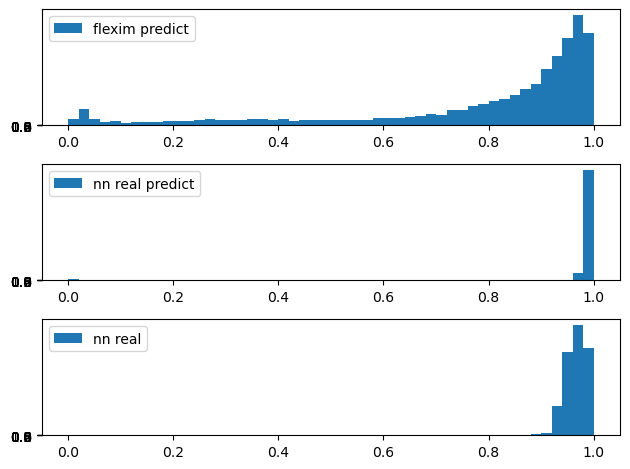

total query time is 9
wass distance flexim is 0.17622293389353594
#######################################################################################


In [27]:
res = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 50,random_state = 44)

In [28]:
res.fun

0.09087942679151788

In [ ]:
res.x

In [ ]:
from skopt.plots import plot_objective, plot_histogram
_ = plot_objective(res)
plt.show()

simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.022242361465456554
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 12:13:40.604065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 5.0497e-06 - accuracy: 0.5750
run into active learning emulate process
1/1 [==============================] - 0s 50ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 4.1715e-06 - accuracy: 0.8125

2022-09-25 12:13:41.123053: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.386
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.955
2/2 [==============================] - 0s 3ms/step
emulate process finis

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 23ms/step - loss: 6.7384e-06 - accuracy: 0.6159
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 14ms/step
active learning initial score is 0.333
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 14ms/step - loss: 4.2040e-06 - accuracy: 0.7306
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/st

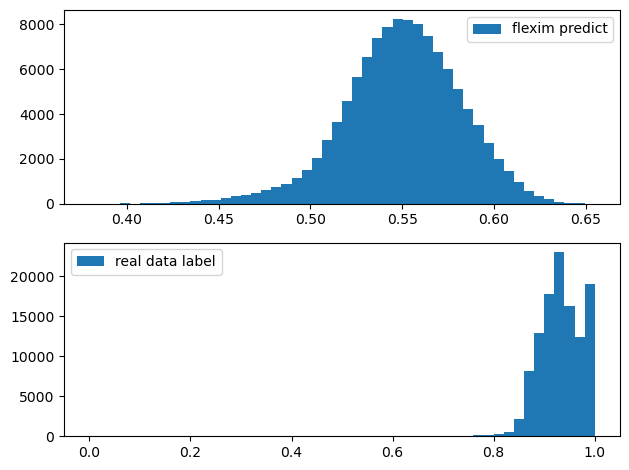

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


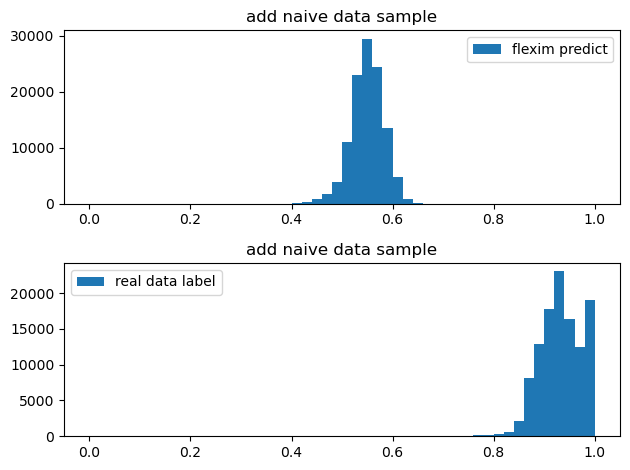

***** begin training *****
neg number flexim is 5550
pos number flexim is 85562
use bias is False
gamma is 25
label smoothing is 0.12909308710334888
new version 1
Epoch 1/10


2022-09-25 12:14:15.001222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.9536e-08 - accuracy: 0.7984 - precision: 0.9619 - recall: 0.8177

2022-09-25 12:14:48.016440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 1.9536e-08 - accuracy: 0.7984 - precision: 0.9619 - recall: 0.8177 - val_loss: 1.6253e-08 - val_accuracy: 0.7429 - val_precision: 0.9813 - val_recall: 0.7398
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 1.6022e-08 - accuracy: 0.7506 - precision: 0.9797 - recall: 0.7499 - val_loss: 1.6543e-08 - val_accuracy: 0.7108 - val_precision: 0.9870 - val_recall: 0.7008
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 1.5183e-08 - accuracy: 0.7443 - precision: 0.9834 - recall: 0.7402 - val_loss: 1.5820e-08 - val_accuracy: 0.7228 - val_precision: 0.9881 - val_recall: 0.7130
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 1.4658e-08 - accuracy: 0.7490 - precision: 0.9862 - recall: 0.7431 - val_loss: 1.3950e-08 - val_accuracy: 0.7657 - val_precision: 0.9855 - val_recall: 0.7614
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/st

2022-09-25 12:20:27.719813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.1761e-08 - accuracy: 0.8917 - precision: 0.9992 - recall: 0.8919

2022-09-25 12:21:00.655586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 1.1761e-08 - accuracy: 0.8917 - precision: 0.9992 - recall: 0.8919 - val_loss: 5.3767e-09 - val_accuracy: 0.9254 - val_precision: 1.0000 - val_recall: 0.9251
Epoch 2/10
2848/2848 [==============================] - 37s 13ms/step - loss: 4.6466e-09 - accuracy: 0.9368 - precision: 1.0000 - recall: 0.9366 - val_loss: 3.9672e-09 - val_accuracy: 0.9485 - val_precision: 1.0000 - val_recall: 0.9483
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 3.8194e-09 - accuracy: 0.9495 - precision: 1.0000 - recall: 0.9493 - val_loss: 4.2467e-09 - val_accuracy: 0.9501 - val_precision: 1.0000 - val_recall: 0.9500
Epoch 4/10
2848/2848 [==============================] - 36s 13ms/step - loss: 3.3089e-09 - accuracy: 0.9562 - precision: 1.0000 - recall: 0.9560 - val_loss: 3.7221e-09 - val_accuracy: 0.9567 - val_precision: 1.0000 - val_recall: 0.9565
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 12:25:58.246348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.000000238418579
score list flexim std is 0.21449057757854462
 96/900 [==>...........................] - ETA: 1s

2022-09-25 12:25:59.774282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0000001192092896
score list mreal std is 0.20917630195617676
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.5457092710861092
emd real is 0.2649468505985935


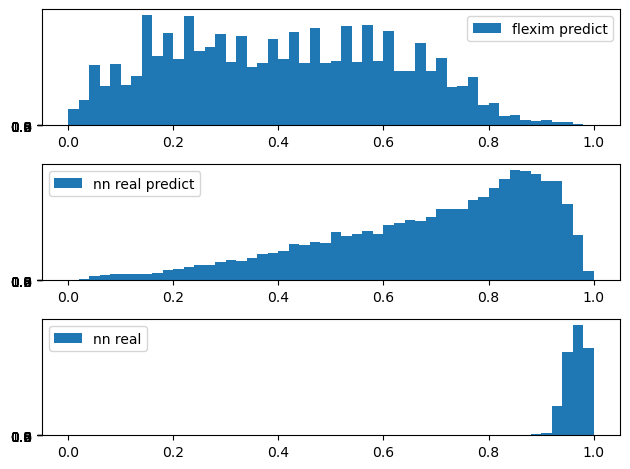

total query time is 10
wass distance flexim is 0.5457092710861092
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 12
label smoothing is 0.1798772988889045
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 12:26:01.984886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 1.8583e-04 - accuracy: 0.5250
run into active learning emulate process
1/1 [==============================] - 0s 42ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
6/6 [==============================] - 0s 18ms/step - loss: 1.4978e-04 - accuracy: 0.7186


2022-09-25 12:26:02.442682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 13ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.455
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.705
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.795
5/5 [==============================] - 0s 5ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 12ms/step
1 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 11
self.training_done is True
simi kin

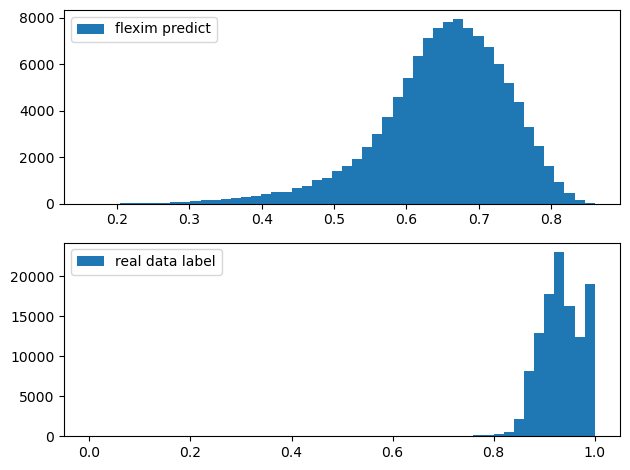

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


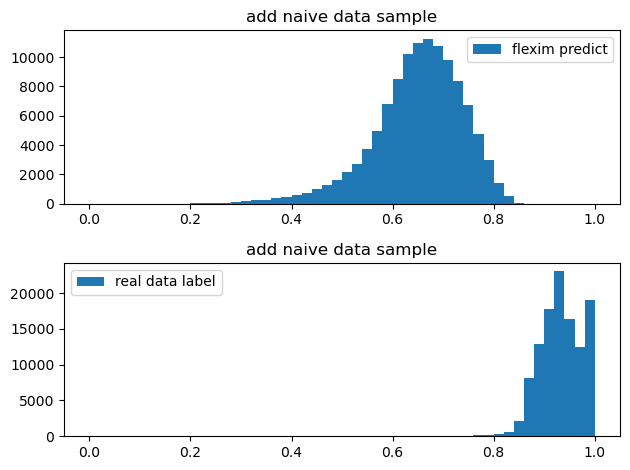

***** begin training *****
neg number flexim is 5707
pos number flexim is 85405
use bias is False
gamma is 27
label smoothing is 0.1977921527395523
new version 1
Epoch 1/10


2022-09-25 12:26:29.693802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 5.5575e-09 - accuracy: 0.7869 - precision: 0.9471 - recall: 0.8184

2022-09-25 12:26:57.211292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 5.5575e-09 - accuracy: 0.7869 - precision: 0.9471 - recall: 0.8184 - val_loss: 4.0482e-09 - val_accuracy: 0.8521 - val_precision: 0.9651 - val_recall: 0.8737
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 4.4941e-09 - accuracy: 0.8257 - precision: 0.9688 - recall: 0.8411 - val_loss: 4.0832e-09 - val_accuracy: 0.7738 - val_precision: 0.9737 - val_recall: 0.7797
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 4.2995e-09 - accuracy: 0.7764 - precision: 0.9724 - recall: 0.7837 - val_loss: 3.9258e-09 - val_accuracy: 0.7662 - val_precision: 0.9734 - val_recall: 0.7716
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 4.1711e-09 - accuracy: 0.7570 - precision: 0.9742 - recall: 0.7608 - val_loss: 3.7475e-09 - val_accuracy: 0.7729 - val_precision: 0.9729 - val_recall: 0.7794
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 12:31:37.517448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 4.6371e-09 - accuracy: 0.8477 - precision: 0.9981 - recall: 0.8487

2022-09-25 12:32:04.719989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 4.6371e-09 - accuracy: 0.8477 - precision: 0.9981 - recall: 0.8487 - val_loss: 1.8233e-09 - val_accuracy: 0.9246 - val_precision: 1.0000 - val_recall: 0.9243
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 1.9332e-09 - accuracy: 0.9108 - precision: 1.0000 - recall: 0.9104 - val_loss: 1.4352e-09 - val_accuracy: 0.9199 - val_precision: 1.0000 - val_recall: 0.9196
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.4503e-09 - accuracy: 0.9216 - precision: 1.0000 - recall: 0.9213 - val_loss: 1.4121e-09 - val_accuracy: 0.9239 - val_precision: 1.0000 - val_recall: 0.9237
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.2579e-09 - accuracy: 0.9304 - precision: 1.0000 - recall: 0.9301 - val_loss: 1.3395e-09 - val_accuracy: 0.9311 - val_precision: 1.0000 - val_recall: 0.9308
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 12:36:43.644862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.21319840848445892
 83/900 [=>............................] - ETA: 1s

2022-09-25 12:36:45.251522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 0.9999998807907104
score list mreal std is 0.2175929695367813
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.5600340597350504
emd real is 0.4392714726388589


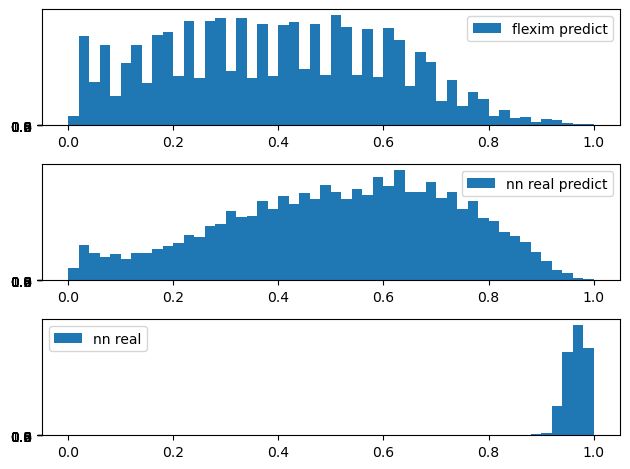

total query time is 11
wass distance flexim is 0.5600340597350504
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 37
label smoothing is 0.14568328240788245
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 12:36:47.617598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 9ms/step - loss: 9.4234e-12 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 42ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 8.0861e-12 - accuracy: 0.4375

2022-09-25 12:36:48.148212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 15ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 16ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

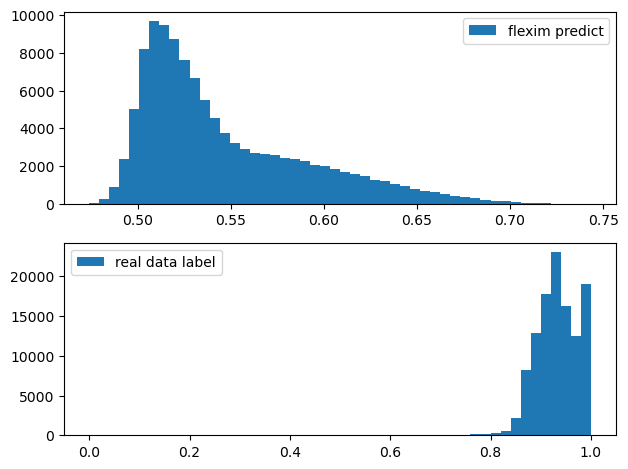

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


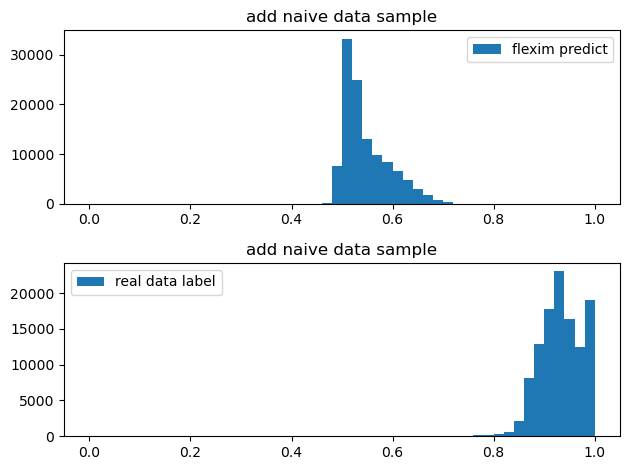

***** begin training *****
neg number flexim is 6056
pos number flexim is 85056
use bias is False
gamma is 25
label smoothing is 0.5590372621965116
new version 1
Epoch 1/10


2022-09-25 12:37:15.473104: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 2.1629e-08 - accuracy: 0.5879 - precision: 0.9150 - recall: 0.6157

2022-09-25 12:37:43.032608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 2.1629e-08 - accuracy: 0.5879 - precision: 0.9150 - recall: 0.6157 - val_loss: 1.9637e-08 - val_accuracy: 0.7298 - val_precision: 0.9356 - val_recall: 0.7627
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 2.0473e-08 - accuracy: 0.6417 - precision: 0.9451 - recall: 0.6541 - val_loss: 1.9958e-08 - val_accuracy: 0.5958 - val_precision: 0.9492 - val_recall: 0.5985
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 2.0238e-08 - accuracy: 0.5913 - precision: 0.9531 - recall: 0.5913 - val_loss: 2.0710e-08 - val_accuracy: 0.5220 - val_precision: 0.9598 - val_recall: 0.5086
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 2.0063e-08 - accuracy: 0.5746 - precision: 0.9571 - recall: 0.5699 - val_loss: 1.9819e-08 - val_accuracy: 0.5921 - val_precision: 0.9572 - val_recall: 0.5889
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 12:42:25.800599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.4735e-08 - accuracy: 0.8748 - precision: 0.9983 - recall: 0.8758

2022-09-25 12:42:53.376952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 1.4735e-08 - accuracy: 0.8748 - precision: 0.9983 - recall: 0.8758 - val_loss: 7.6658e-09 - val_accuracy: 0.8934 - val_precision: 1.0000 - val_recall: 0.8930
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 5.9264e-09 - accuracy: 0.9229 - precision: 1.0000 - recall: 0.9226 - val_loss: 4.8831e-09 - val_accuracy: 0.9365 - val_precision: 1.0000 - val_recall: 0.9363
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 4.6750e-09 - accuracy: 0.9407 - precision: 1.0000 - recall: 0.9404 - val_loss: 4.6641e-09 - val_accuracy: 0.9443 - val_precision: 1.0000 - val_recall: 0.9441
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 4.1906e-09 - accuracy: 0.9492 - precision: 1.0000 - recall: 0.9490 - val_loss: 4.8692e-09 - val_accuracy: 0.9463 - val_precision: 1.0000 - val_recall: 0.9461
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 12:47:38.838365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.19858166575431824
 85/900 [=>............................] - ETA: 1s

2022-09-25 12:47:40.501635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.22973604500293732
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.3842787185671595
emd real is 0.2068984397572446


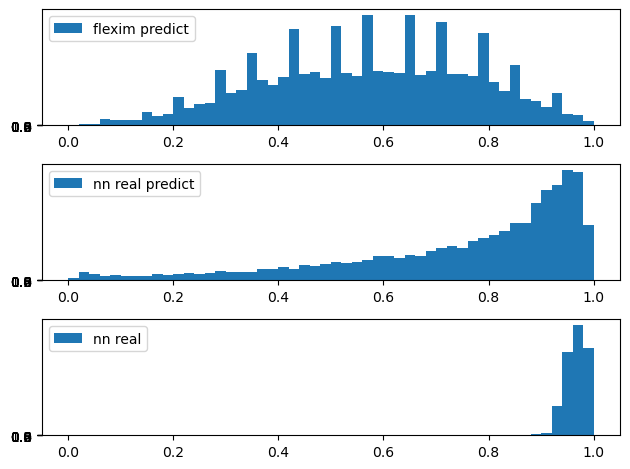

total query time is 9
wass distance flexim is 0.3842787185671595
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 21
label smoothing is 0.12235543841517868
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 12:47:42.798213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step - loss: 3.8177e-07 - accuracy: 0.3563
run into active learning emulate process
1/1 [==============================] - 0s 48ms/step
active learning initial score is 0.429
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 3.9629e-07 - accuracy: 0.4062

2022-09-25 12:47:43.290458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.727
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.727
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.841
2/2 [==============================] - 0s 2ms/step
emulate process finishes


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.562
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.818
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 10
self.training_done is True
simi kind is 2
finish all cluster binary and active search
make modification new new
generate cosine naive positive and negative data new
length of next_result_table is 2
result table shape is (10, 101

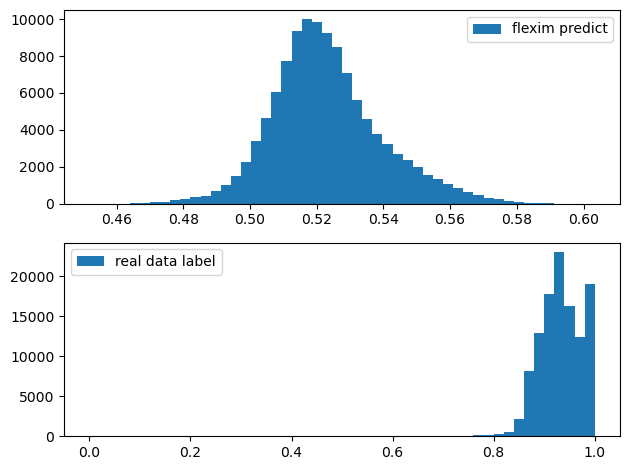

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


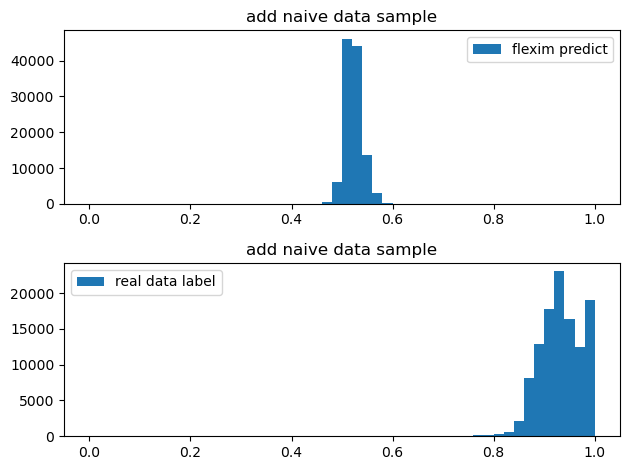

***** begin training *****
neg number flexim is 5340
pos number flexim is 85772
use bias is False
gamma is 7
label smoothing is 0.5136284683670514
new version 1
Epoch 1/10


2022-09-25 12:48:10.135151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.7339 - precision: 0.9790 - recall: 0.7331

2022-09-25 12:48:38.559331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.0043 - accuracy: 0.7339 - precision: 0.9790 - recall: 0.7331 - val_loss: 0.0046 - val_accuracy: 0.6874 - val_precision: 0.9857 - val_recall: 0.6778
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.0041 - accuracy: 0.7211 - precision: 0.9833 - recall: 0.7159 - val_loss: 0.0036 - val_accuracy: 0.7626 - val_precision: 0.9791 - val_recall: 0.7642
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0041 - accuracy: 0.7174 - precision: 0.9842 - recall: 0.7112 - val_loss: 0.0042 - val_accuracy: 0.7059 - val_precision: 0.9847 - val_recall: 0.6984
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0041 - accuracy: 0.7113 - precision: 0.9844 - recall: 0.7045 - val_loss: 0.0037 - val_accuracy: 0.7428 - val_precision: 0.9812 - val_recall: 0.7410
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0040 - accuracy: 0.

2022-09-25 12:53:14.761176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 8.4040e-04 - accuracy: 0.9749 - precision: 0.9998 - recall: 0.9750

2022-09-25 12:53:41.303373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 8.4040e-04 - accuracy: 0.9749 - precision: 0.9998 - recall: 0.9750 - val_loss: 5.0767e-04 - val_accuracy: 0.9882 - val_precision: 1.0000 - val_recall: 0.9881
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.6913e-04 - accuracy: 0.9942 - precision: 1.0000 - recall: 0.9941 - val_loss: 2.1403e-04 - val_accuracy: 0.9965 - val_precision: 1.0000 - val_recall: 0.9965
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.1317e-04 - accuracy: 0.9964 - precision: 1.0000 - recall: 0.9964 - val_loss: 2.9155e-04 - val_accuracy: 0.9958 - val_precision: 1.0000 - val_recall: 0.9958
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.9105e-04 - accuracy: 0.9973 - precision: 1.0000 - recall: 0.9973 - val_loss: 2.5565e-04 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 12:58:23.944391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.2330549955368042
 89/900 [=>............................] - ETA: 1s

2022-09-25 12:58:25.719074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.123043492436409
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.5068691467260227
emd real is 0.02986865630244054


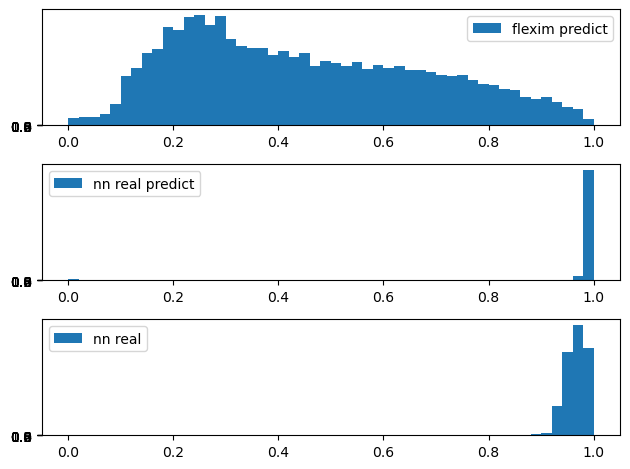

total query time is 10
wass distance flexim is 0.5068691467260227
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 16
label smoothing is 0.35844083616500644
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 12:58:28.036001: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 9.7806e-06 - accuracy: 0.6375
run into active learning emulate process
1/1 [==============================] - 0s 41ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
6/6 [==============================] - 0s 16ms/step - loss: 9.3138e-06 - accuracy: 0.7440


2022-09-25 12:58:28.507712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 16ms/step
1 time active learning score is 0.705
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.545
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.568
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finis

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]



query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 12ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 14ms/step - loss: 7.6307e-06 - accuracy: 0.7772
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 28ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.705
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/st

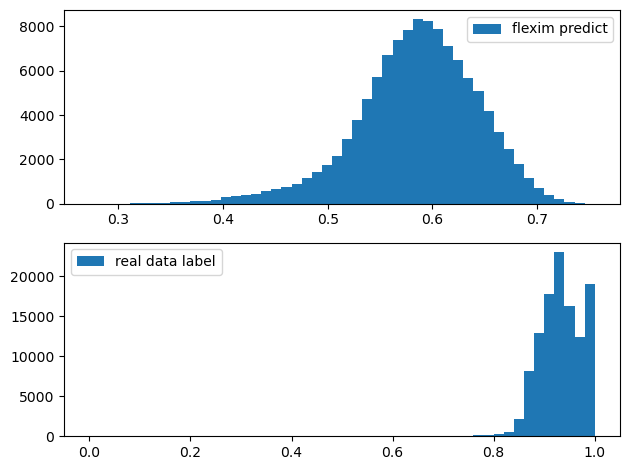

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


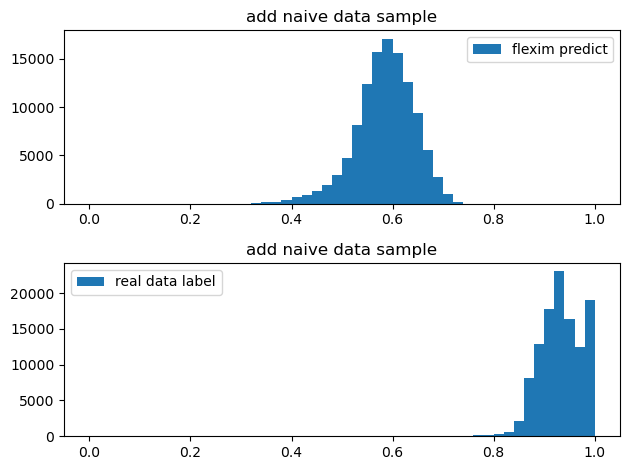

***** begin training *****
neg number flexim is 6994
pos number flexim is 84118
use bias is False
gamma is 2
label smoothing is 0.3319379869534255
new version 1
Epoch 1/10


2022-09-25 12:58:59.896309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.1159 - accuracy: 0.7877 - precision: 0.9832 - recall: 0.7834

2022-09-25 12:59:28.700695: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 0.1159 - accuracy: 0.7877 - precision: 0.9832 - recall: 0.7834 - val_loss: 0.1060 - val_accuracy: 0.8104 - val_precision: 0.9903 - val_recall: 0.8026
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.1029 - accuracy: 0.8063 - precision: 0.9905 - recall: 0.7979 - val_loss: 0.1104 - val_accuracy: 0.8023 - val_precision: 0.9926 - val_recall: 0.7919
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1017 - accuracy: 0.8079 - precision: 0.9910 - recall: 0.7992 - val_loss: 0.1145 - val_accuracy: 0.7923 - val_precision: 0.9933 - val_recall: 0.7804
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.1013 - accuracy: 0.8081 - precision: 0.9912 - recall: 0.7993 - val_loss: 0.1224 - val_accuracy: 0.7689 - val_precision: 0.9953 - val_recall: 0.7533
Epoch 5/10
2848/2848 [==============================] - 33s 11ms/step - loss: 0.1010 - accuracy: 0.

2022-09-25 13:04:45.260251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0473 - accuracy: 0.9640 - precision: 0.9997 - recall: 0.9642

2022-09-25 13:05:17.497217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.0473 - accuracy: 0.9640 - precision: 0.9997 - recall: 0.9642 - val_loss: 0.0329 - val_accuracy: 0.9891 - val_precision: 1.0000 - val_recall: 0.9890
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.0268 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9928 - val_loss: 0.0257 - val_accuracy: 0.9947 - val_precision: 1.0000 - val_recall: 0.9947
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.0245 - accuracy: 0.9953 - precision: 1.0000 - recall: 0.9953 - val_loss: 0.0228 - val_accuracy: 0.9969 - val_precision: 1.0000 - val_recall: 0.9969
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.0242 - accuracy: 0.9957 - precision: 1.0000 - recall: 0.9957 - val_loss: 0.0234 - val_accuracy: 0.9961 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 5/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.0241 - accuracy: 0.

2022-09-25 13:11:04.721063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.27178454399108887
 42/900 [>.............................] - ETA: 2s

2022-09-25 13:11:07.084278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12870369851589203
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.27921312302141676
emd real is 0.03065628921642349


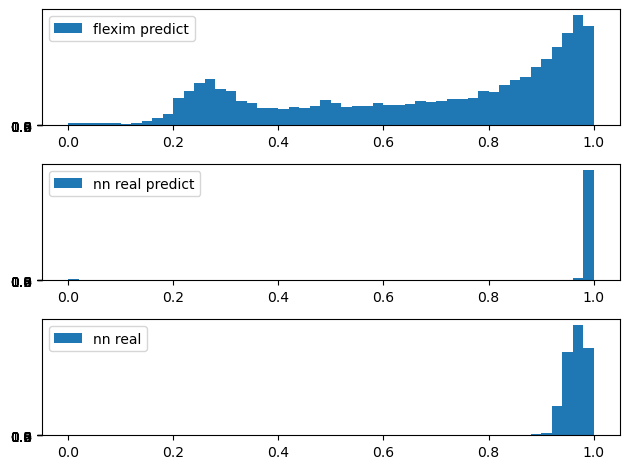

total query time is 10
wass distance flexim is 0.27921312302141676
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 0
label smoothing is 0.5607904681644802
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 13:11:10.113843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 14ms/step - loss: 0.6710 - accuracy: 0.7063
run into active learning emulate process
1/1 [==============================] - 0s 58ms/step
active learning initial score is 0.714
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
5/6 [========================>.....] - ETA: 0s - loss: 0.6560 - accuracy: 0.7937

2022-09-25 13:11:10.717345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.205
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.432
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
4 time active learning score is 0.727
5/5 [==============================] - 0s 6ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 13ms/step
1 time active learning score is 0.917
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 4ms/step
emulate process finishes
query time is 3
first stage total query time is 11
self.training_done is True

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [====================

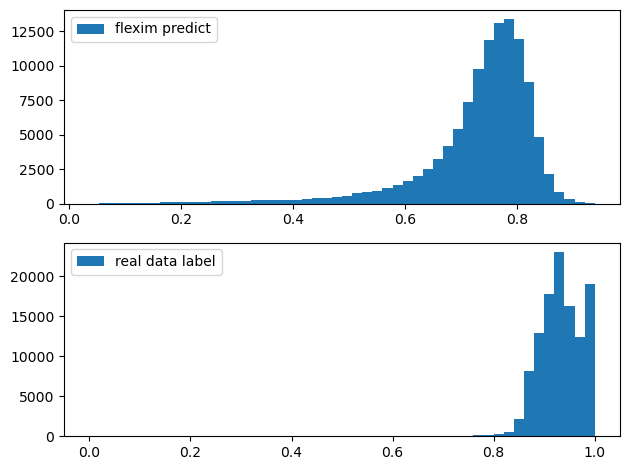

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


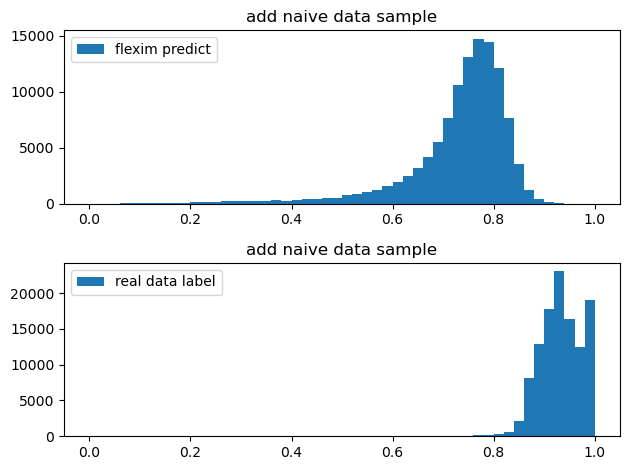

***** begin training *****
neg number flexim is 4078
pos number flexim is 87034
use bias is False
gamma is 6
label smoothing is 0.206167056269312
new version 1
Epoch 1/10


2022-09-25 13:11:45.322327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.8113 - precision: 0.9874 - recall: 0.8128

2022-09-25 13:12:17.761046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 0.0074 - accuracy: 0.8113 - precision: 0.9874 - recall: 0.8128 - val_loss: 0.0070 - val_accuracy: 0.8148 - val_precision: 0.9894 - val_recall: 0.8147
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 0.0069 - accuracy: 0.8076 - precision: 0.9888 - recall: 0.8077 - val_loss: 0.0069 - val_accuracy: 0.8019 - val_precision: 0.9905 - val_recall: 0.8002
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.0066 - accuracy: 0.7964 - precision: 0.9902 - recall: 0.7948 - val_loss: 0.0072 - val_accuracy: 0.7709 - val_precision: 0.9925 - val_recall: 0.7657
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0066 - accuracy: 0.7881 - precision: 0.9909 - recall: 0.7854 - val_loss: 0.0075 - val_accuracy: 0.7469 - val_precision: 0.9936 - val_recall: 0.7395
Epoch 5/10
2848/2848 [==============================] - 34s 12ms/step - loss: 0.0065 - accuracy: 0.

2022-09-25 13:17:18.832573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9765 - precision: 0.9998 - recall: 0.9766

2022-09-25 13:17:49.194735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 36s 12ms/step - loss: 0.0013 - accuracy: 0.9765 - precision: 0.9998 - recall: 0.9766 - val_loss: 4.9141e-04 - val_accuracy: 0.9914 - val_precision: 1.0000 - val_recall: 0.9914
Epoch 2/10
2848/2848 [==============================] - 39s 14ms/step - loss: 2.3760e-04 - accuracy: 0.9948 - precision: 1.0000 - recall: 0.9948 - val_loss: 2.2560e-04 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 3/10
2848/2848 [==============================] - 39s 14ms/step - loss: 1.6731e-04 - accuracy: 0.9969 - precision: 1.0000 - recall: 0.9969 - val_loss: 2.3947e-04 - val_accuracy: 0.9967 - val_precision: 1.0000 - val_recall: 0.9967
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 1.5230e-04 - accuracy: 0.9973 - precision: 1.0000 - recall: 0.9973 - val_loss: 9.5348e-05 - val_accuracy: 0.9981 - val_precision: 1.0000 - val_recall: 0.9981
Epoch 5/10
2848/2848 [==============================] - 36s 13ms/step -

2022-09-25 13:23:36.527446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.23741935193538666
 73/900 [=>............................] - ETA: 1s

2022-09-25 13:23:38.444203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12416312098503113
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4076950281754372
emd real is 0.03654172349712998


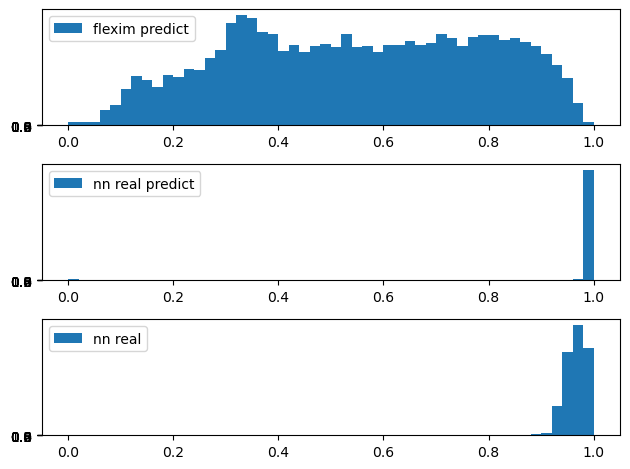

total query time is 14
wass distance flexim is 0.4076950281754372
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 34
label smoothing is 0.5599950164844993
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 13:23:41.213863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 17ms/step - loss: 4.8984e-11 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
5/6 [========================>.....] - ETA: 0s - loss: 4.7708e-11 - accuracy: 0.5125

2022-09-25 13:23:41.801208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 27ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


9/9 [==============================] - 0s 20ms/step - loss: 1.6843e-10 - accuracy: 0.5321
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [===================

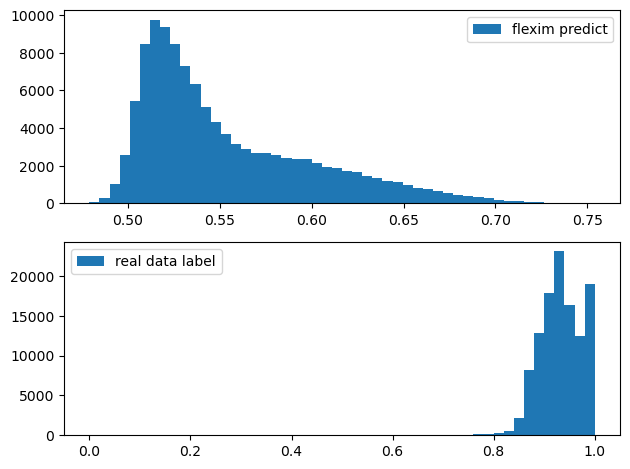

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


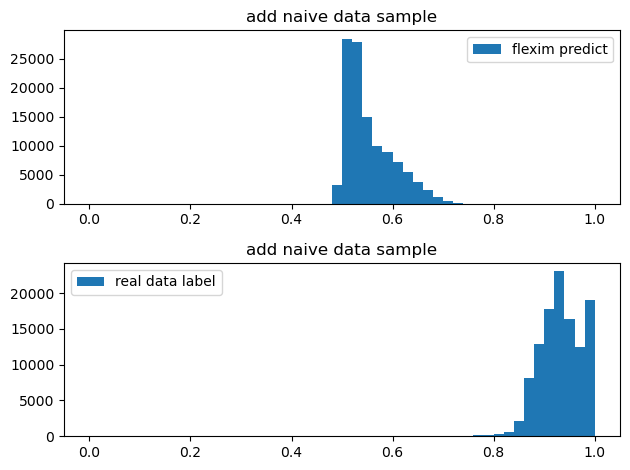

***** begin training *****
neg number flexim is 2587
pos number flexim is 88525
use bias is False
gamma is 15
label smoothing is 0.5872970833932235
new version 1
Epoch 1/10


2022-09-25 13:24:15.568974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.8318e-05 - accuracy: 0.6744 - precision: 0.9883 - recall: 0.6729

2022-09-25 13:24:48.718662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 1.8318e-05 - accuracy: 0.6744 - precision: 0.9883 - recall: 0.6729 - val_loss: 1.7160e-05 - val_accuracy: 0.6905 - val_precision: 0.9950 - val_recall: 0.6851
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.6003e-05 - accuracy: 0.7047 - precision: 0.9925 - recall: 0.7013 - val_loss: 1.6811e-05 - val_accuracy: 0.6393 - val_precision: 0.9967 - val_recall: 0.6311
Epoch 3/10
2848/2848 [==============================] - 34s 12ms/step - loss: 1.5857e-05 - accuracy: 0.7121 - precision: 0.9931 - recall: 0.7086 - val_loss: 1.5658e-05 - val_accuracy: 0.7099 - val_precision: 0.9942 - val_recall: 0.7058
Epoch 4/10
2848/2848 [==============================] - 36s 13ms/step - loss: 1.5629e-05 - accuracy: 0.7152 - precision: 0.9930 - recall: 0.7119 - val_loss: 1.4258e-05 - val_accuracy: 0.7430 - val_precision: 0.9932 - val_recall: 0.7407
Epoch 5/10
2848/2848 [==============================] - 37s 13ms/st

2022-09-25 13:30:17.375356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 3.0918e-06 - accuracy: 0.9702 - precision: 0.9998 - recall: 0.9702

2022-09-25 13:30:50.339862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 38s 13ms/step - loss: 3.0918e-06 - accuracy: 0.9702 - precision: 0.9998 - recall: 0.9702 - val_loss: 6.7593e-07 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9937
Epoch 2/10
2848/2848 [==============================] - 38s 13ms/step - loss: 6.9139e-07 - accuracy: 0.9943 - precision: 1.0000 - recall: 0.9942 - val_loss: 1.2385e-06 - val_accuracy: 0.9927 - val_precision: 1.0000 - val_recall: 0.9927
Epoch 3/10
2848/2848 [==============================] - 37s 13ms/step - loss: 4.9160e-07 - accuracy: 0.9965 - precision: 1.0000 - recall: 0.9965 - val_loss: 1.2660e-06 - val_accuracy: 0.9938 - val_precision: 1.0000 - val_recall: 0.9938
Epoch 4/10
2848/2848 [==============================] - 38s 13ms/step - loss: 4.0508e-07 - accuracy: 0.9971 - precision: 1.0000 - recall: 0.9971 - val_loss: 3.5382e-07 - val_accuracy: 0.9974 - val_precision: 1.0000 - val_recall: 0.9974
Epoch 5/10
2848/2848 [==============================] - 38s 13ms/st

2022-09-25 13:36:33.564072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.1715688407421112
 72/900 [=>............................] - ETA: 1s

2022-09-25 13:36:35.582022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1248263418674469
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2579173367340619
emd real is 0.03647627290910987


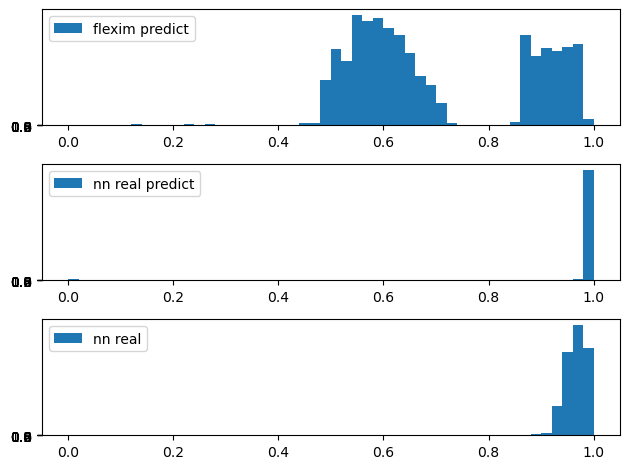

total query time is 9
wass distance flexim is 0.2579173367340619
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 14
label smoothing is 0.6357689121442025
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 13:36:38.358542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 4.0462e-05 - accuracy: 0.5688
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 4.0915e-05 - accuracy: 0.5625

2022-09-25 13:36:38.936132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.023
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.75
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.705
5/5 [==============================] - 0s 6ms/step
query instance sha

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.938
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 8
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

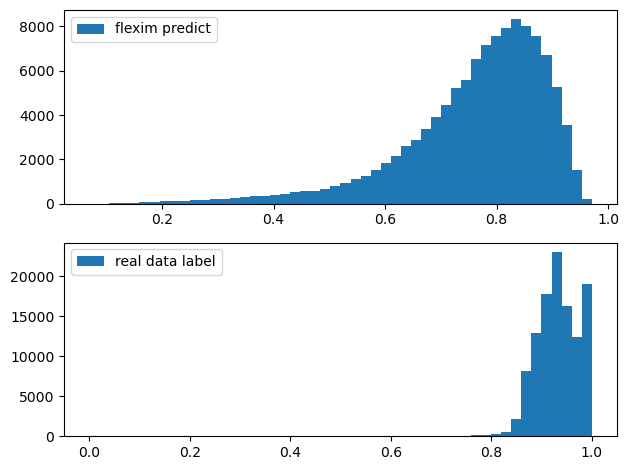

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


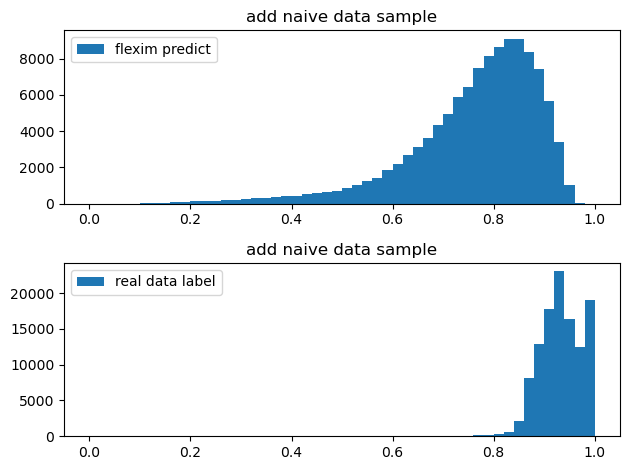

***** begin training *****
neg number flexim is 4698
pos number flexim is 86414
use bias is False
gamma is 9
label smoothing is 0.3387590165589476
new version 1
Epoch 1/10


2022-09-25 13:37:11.203005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 9.0578e-04 - accuracy: 0.7620 - precision: 0.9887 - recall: 0.7577

2022-09-25 13:37:40.103934: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 34s 12ms/step - loss: 9.0578e-04 - accuracy: 0.7620 - precision: 0.9887 - recall: 0.7577 - val_loss: 8.0884e-04 - val_accuracy: 0.7886 - val_precision: 0.9946 - val_recall: 0.7816
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 8.0003e-04 - accuracy: 0.7818 - precision: 0.9937 - recall: 0.7748 - val_loss: 9.7715e-04 - val_accuracy: 0.7399 - val_precision: 0.9974 - val_recall: 0.7279
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 7.8933e-04 - accuracy: 0.7835 - precision: 0.9938 - recall: 0.7766 - val_loss: 5.6906e-04 - val_accuracy: 0.8417 - val_precision: 0.9868 - val_recall: 0.8445
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 7.8147e-04 - accuracy: 0.7881 - precision: 0.9935 - recall: 0.7817 - val_loss: 9.1939e-04 - val_accuracy: 0.7622 - val_precision: 0.9966 - val_recall: 0.7520
Epoch 5/10
2848/2848 [==============================] - 33s 12ms/st

2022-09-25 13:42:26.653068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.5900e-04 - accuracy: 0.9763 - precision: 0.9998 - recall: 0.9764

2022-09-25 13:42:54.315480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 1.5900e-04 - accuracy: 0.9763 - precision: 0.9998 - recall: 0.9764 - val_loss: 4.3085e-05 - val_accuracy: 0.9932 - val_precision: 1.0000 - val_recall: 0.9932
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 3.4491e-05 - accuracy: 0.9951 - precision: 1.0000 - recall: 0.9950 - val_loss: 3.8552e-05 - val_accuracy: 0.9955 - val_precision: 1.0000 - val_recall: 0.9955
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 2.5031e-05 - accuracy: 0.9967 - precision: 1.0000 - recall: 0.9967 - val_loss: 2.0270e-05 - val_accuracy: 0.9972 - val_precision: 1.0000 - val_recall: 0.9972
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 2.1759e-05 - accuracy: 0.9974 - precision: 1.0000 - recall: 0.9974 - val_loss: 2.0604e-05 - val_accuracy: 0.9974 - val_precision: 1.0000 - val_recall: 0.9974
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 13:47:46.008663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.18170291185379028
 74/900 [=>............................] - ETA: 1s

2022-09-25 13:47:47.948434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1236281469464302
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.3218385555518425
emd real is 0.036404707738789455


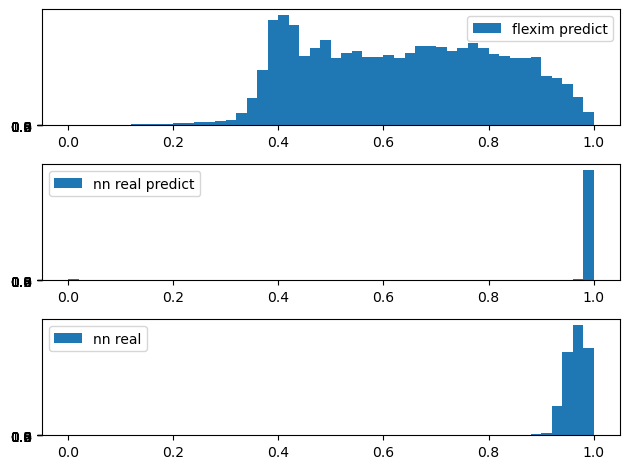

total query time is 11
wass distance flexim is 0.3218385555518425
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 26
label smoothing is 0.15124470409901764
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 13:47:50.715847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 1.4204e-08 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 51ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.3680e-08 - accuracy: 0.4062

2022-09-25 13:47:51.240119: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 15ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.795
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.795
5/5 [==============================] - 0s 6ms/step
query instance shape 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


11/11 [==============================] - 0s 17ms/step - loss: 5.1715e-08 - accuracy: 0.5280
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.667
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.792
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.875
6/6 [==============================] - 0

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.591
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (5, 9)
transform result shape is (5, 100)
train
X shape is (5, 9)
Y shape is (5,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.659
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is 

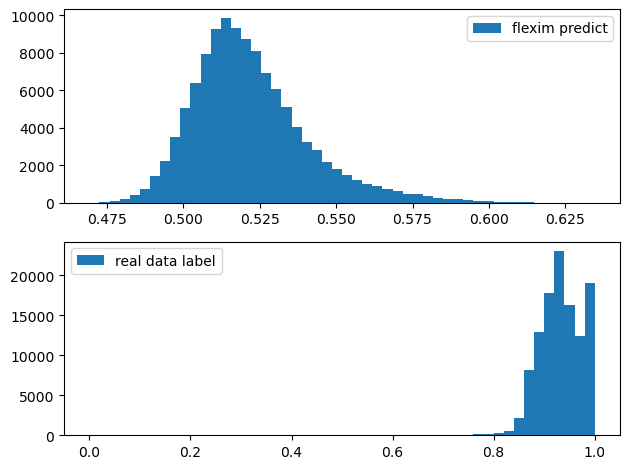

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


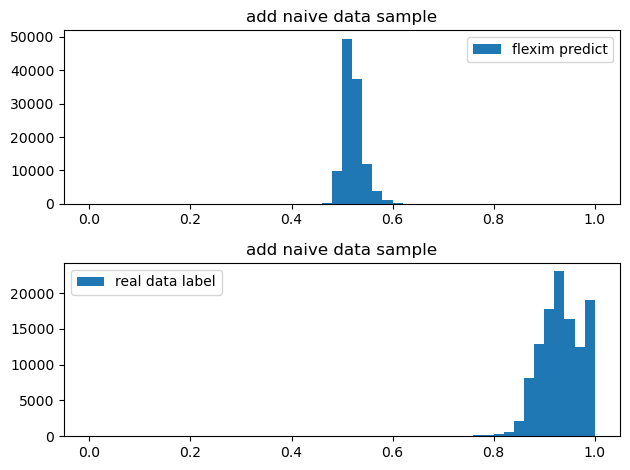

***** begin training *****
neg number flexim is 8071
pos number flexim is 83041
use bias is False
gamma is 39
label smoothing is 0.06447652998203063
new version 1
Epoch 1/10


2022-09-25 13:48:23.794462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 3.3990e-11 - accuracy: 0.0934 - precision: 0.6644 - recall: 0.0107

2022-09-25 13:48:51.853622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 3.3990e-11 - accuracy: 0.0934 - precision: 0.6644 - recall: 0.0107 - val_loss: 2.9043e-11 - val_accuracy: 0.0957 - val_precision: 0.6607 - val_recall: 0.0197
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 1.1729e-11 - accuracy: 0.1032 - precision: 0.6978 - recall: 0.0284 - val_loss: 1.5527e-11 - val_accuracy: 0.1049 - val_precision: 0.6847 - val_recall: 0.0364
Epoch 3/10
2848/2848 [==============================] - 33s 11ms/step - loss: 7.3964e-12 - accuracy: 0.1114 - precision: 0.7045 - recall: 0.0432 - val_loss: 1.0793e-11 - val_accuracy: 0.1128 - val_precision: 0.6983 - val_recall: 0.0498
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 5.5920e-12 - accuracy: 0.1197 - precision: 0.7153 - recall: 0.0567 - val_loss: 8.3964e-12 - val_accuracy: 0.1211 - val_precision: 0.7088 - val_recall: 0.0635
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 13:53:31.125015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 3.3206e-11 - accuracy: 0.0110 - precision: 0.7571 - recall: 0.0102

2022-09-25 13:53:57.769736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 3.3206e-11 - accuracy: 0.0110 - precision: 0.7571 - recall: 0.0102 - val_loss: 3.1352e-11 - val_accuracy: 0.0225 - val_precision: 0.8684 - val_recall: 0.0224
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.2252e-11 - accuracy: 0.0309 - precision: 0.8879 - recall: 0.0309 - val_loss: 1.6910e-11 - val_accuracy: 0.0412 - val_precision: 0.9213 - val_recall: 0.0413
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 8.0059e-12 - accuracy: 0.0486 - precision: 0.9238 - recall: 0.0488 - val_loss: 1.1774e-11 - val_accuracy: 0.0574 - val_precision: 0.9416 - val_recall: 0.0576
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 6.2140e-12 - accuracy: 0.0632 - precision: 0.9402 - recall: 0.0635 - val_loss: 9.1524e-12 - val_accuracy: 0.0715 - val_precision: 0.9527 - val_recall: 0.0718
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 13:58:28.999178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.16759295761585236
 96/900 [==>...........................] - ETA: 1s

2022-09-25 13:58:30.493528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 0.9999995231628418
score list mreal std is 0.16892071068286896
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.5944528512682706
emd real is 0.5891109990416621


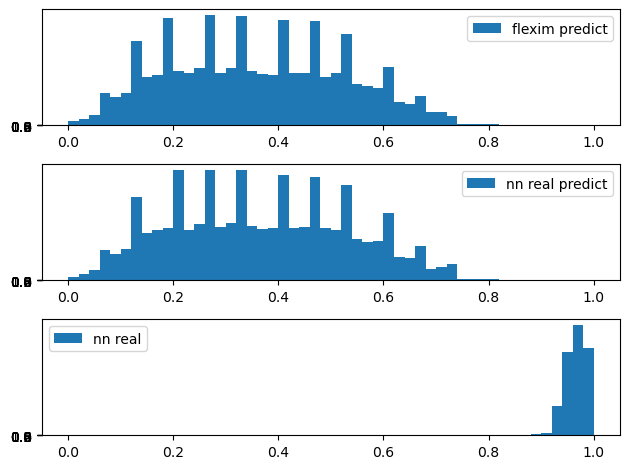

total query time is 20
wass distance flexim is 0.5944528512682706
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 27
label smoothing is 0.18721950695675757
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 13:58:32.635542: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 7.2066e-09 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 62ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 7.9976e-09 - accuracy: 0.4688

2022-09-25 13:58:33.108063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 10ms/step
1 time active learning score is 0.909
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.909
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.909
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is Fa

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.812
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.812
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.273
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.318
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.364
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.364
5/5 [==============================] - 0s 4ms/step
query instance shape i

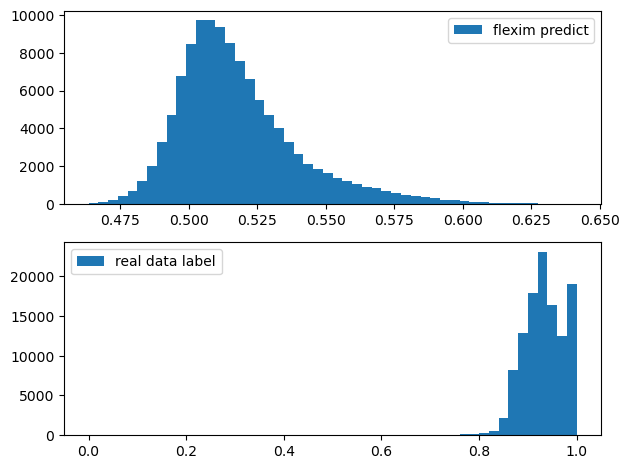

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


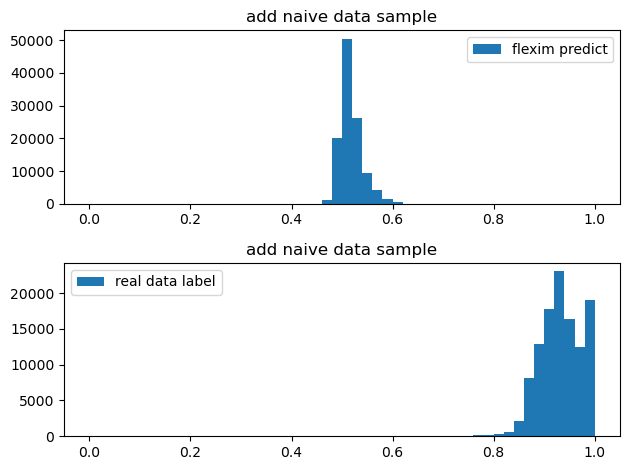

***** begin training *****
neg number flexim is 16966
pos number flexim is 74146
use bias is False
gamma is 20
label smoothing is 0.2857476152313276
new version 1
Epoch 1/10


2022-09-25 13:59:00.898097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 6.3671e-07 - accuracy: 0.6202 - precision: 0.8734 - recall: 0.6237

2022-09-25 13:59:27.611254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 6.3671e-07 - accuracy: 0.6202 - precision: 0.8734 - recall: 0.6237 - val_loss: 6.1004e-07 - val_accuracy: 0.6498 - val_precision: 0.8842 - val_recall: 0.6554
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 6.2106e-07 - accuracy: 0.6294 - precision: 0.8880 - recall: 0.6231 - val_loss: 6.8427e-07 - val_accuracy: 0.5330 - val_precision: 0.9159 - val_recall: 0.4691
Epoch 3/10
2848/2848 [==============================] - 29s 10ms/step - loss: 6.1648e-07 - accuracy: 0.6359 - precision: 0.8912 - recall: 0.6294 - val_loss: 6.3235e-07 - val_accuracy: 0.6176 - val_precision: 0.8998 - val_recall: 0.5964
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 6.1357e-07 - accuracy: 0.6407 - precision: 0.8926 - recall: 0.6350 - val_loss: 5.9178e-07 - val_accuracy: 0.6721 - val_precision: 0.8876 - val_recall: 0.6836
Epoch 5/10
2848/2848 [==============================] - 29s 10ms/st

2022-09-25 14:03:55.965831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.7006e-07 - accuracy: 0.9505 - precision: 0.9997 - recall: 0.9505

2022-09-25 14:04:22.475345: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 1.7006e-07 - accuracy: 0.9505 - precision: 0.9997 - recall: 0.9505 - val_loss: 6.3121e-08 - val_accuracy: 0.9777 - val_precision: 1.0000 - val_recall: 0.9777
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 3.8038e-08 - accuracy: 0.9864 - precision: 1.0000 - recall: 0.9864 - val_loss: 5.3631e-08 - val_accuracy: 0.9870 - val_precision: 1.0000 - val_recall: 0.9870
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.7467e-08 - accuracy: 0.9918 - precision: 1.0000 - recall: 0.9918 - val_loss: 2.7879e-08 - val_accuracy: 0.9930 - val_precision: 1.0000 - val_recall: 0.9930
Epoch 4/10
2848/2848 [==============================] - 29s 10ms/step - loss: 2.2884e-08 - accuracy: 0.9939 - precision: 1.0000 - recall: 0.9938 - val_loss: 3.0004e-08 - val_accuracy: 0.9936 - val_precision: 1.0000 - val_recall: 0.9936
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 14:08:58.181107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.16128632426261902
 99/900 [==>...........................] - ETA: 1s

2022-09-25 14:08:59.700461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12888991832733154
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.6401646551913099
emd real is 0.038010580382152284


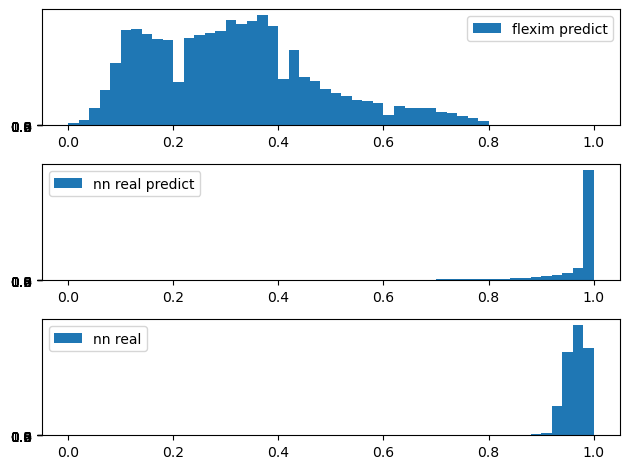

total query time is 16
wass distance flexim is 0.6401646551913099
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 29
label smoothing is 0.46724237807399405
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 14:09:03.230636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 1.5829e-09 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 50ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.4043e-09 - accuracy: 0.6250

2022-09-25 14:09:03.708984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 13ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.591
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.545
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.523
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is 

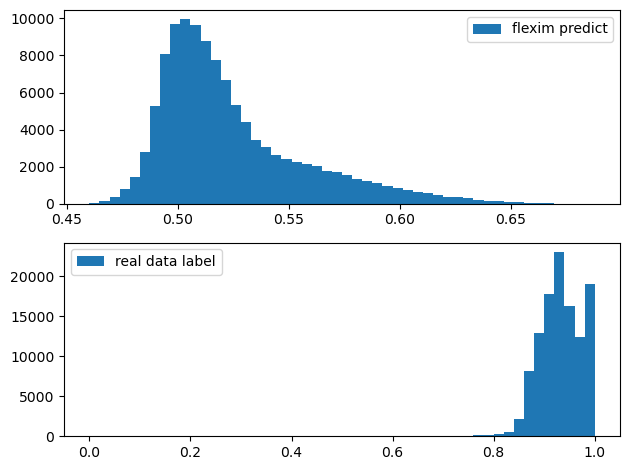

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


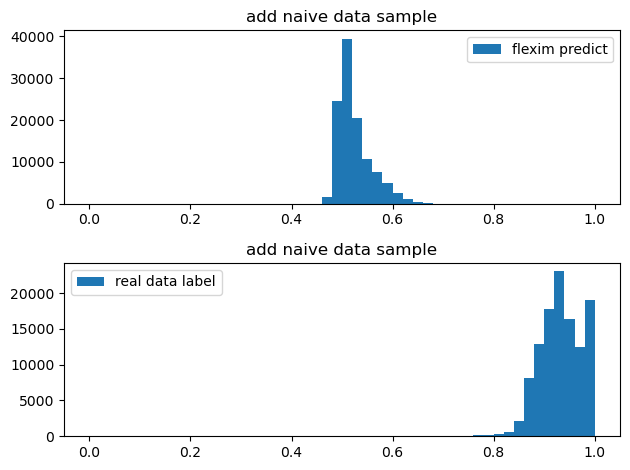

***** begin training *****
neg number flexim is 21048
pos number flexim is 70064
use bias is False
gamma is 7
label smoothing is 0.5310504861775855
new version 1
Epoch 1/10


2022-09-25 14:10:55.167184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0046 - accuracy: 0.6158 - precision: 0.9154 - recall: 0.5513

2022-09-25 14:11:22.127322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.0046 - accuracy: 0.6158 - precision: 0.9154 - recall: 0.5513 - val_loss: 0.0046 - val_accuracy: 0.5912 - val_precision: 0.9580 - val_recall: 0.4920
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0045 - accuracy: 0.6216 - precision: 0.9331 - recall: 0.5471 - val_loss: 0.0045 - val_accuracy: 0.6373 - val_precision: 0.9302 - val_recall: 0.5733
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0045 - accuracy: 0.6246 - precision: 0.9320 - recall: 0.5521 - val_loss: 0.0046 - val_accuracy: 0.5782 - val_precision: 0.9687 - val_recall: 0.4687
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0045 - accuracy: 0.6237 - precision: 0.9346 - recall: 0.5491 - val_loss: 0.0045 - val_accuracy: 0.6104 - val_precision: 0.9509 - val_recall: 0.5223
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0045 - accuracy: 0.

2022-09-25 14:15:56.545546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 9.0224e-04 - accuracy: 0.9724 - precision: 0.9998 - recall: 0.9725

2022-09-25 14:16:23.384972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 9.0224e-04 - accuracy: 0.9724 - precision: 0.9998 - recall: 0.9725 - val_loss: 5.1780e-04 - val_accuracy: 0.9880 - val_precision: 1.0000 - val_recall: 0.9880
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.9543e-04 - accuracy: 0.9942 - precision: 1.0000 - recall: 0.9942 - val_loss: 2.6764e-04 - val_accuracy: 0.9960 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.3678e-04 - accuracy: 0.9967 - precision: 1.0000 - recall: 0.9966 - val_loss: 2.1315e-04 - val_accuracy: 0.9974 - val_precision: 1.0000 - val_recall: 0.9974
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.1859e-04 - accuracy: 0.9972 - precision: 1.0000 - recall: 0.9972 - val_loss: 2.1008e-04 - val_accuracy: 0.9975 - val_precision: 1.0000 - val_recall: 0.9974
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 14:20:59.479839: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2276092767715454
 99/900 [==>...........................] - ETA: 1s

2022-09-25 14:21:01.006109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12472545355558395
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4515253152827411
emd real is 0.020187957733635242


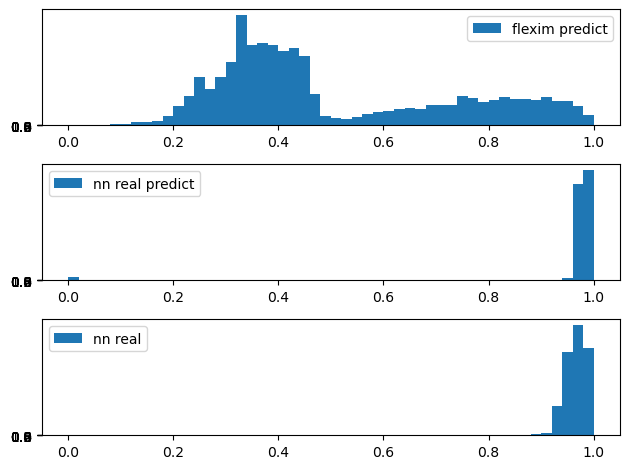

total query time is 26
wass distance flexim is 0.4515253152827411
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 34
label smoothing is 0.6588793677870067
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 14:21:04.334133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 12ms/step - loss: 4.6102e-11 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 45ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
6/6 [==============================] - 0s 17ms/step - loss: 4.5270e-11 - accuracy: 0.5119


2022-09-25 14:21:04.859236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 12ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

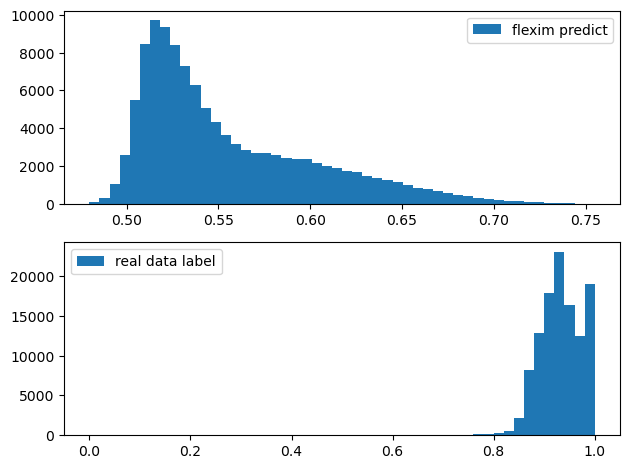

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


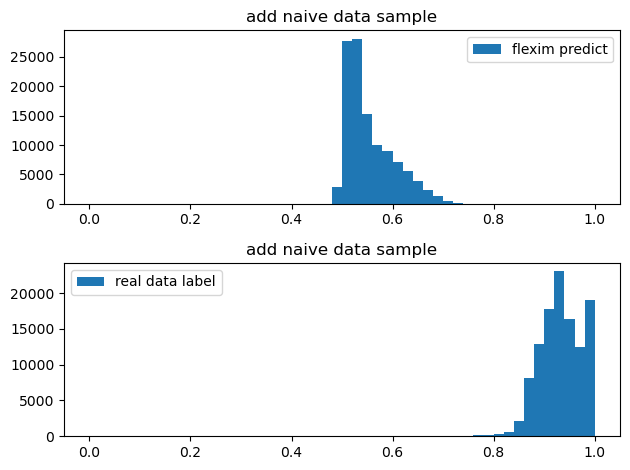

***** begin training *****
neg number flexim is 2353
pos number flexim is 88759
use bias is False
gamma is 13
label smoothing is 0.5962253554076877
new version 1
Epoch 1/10


2022-09-25 14:21:31.068006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 7.1092e-05 - accuracy: 0.6811 - precision: 0.9906 - recall: 0.6791

2022-09-25 14:21:57.611517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 7.1092e-05 - accuracy: 0.6811 - precision: 0.9906 - recall: 0.6791 - val_loss: 4.7599e-05 - val_accuracy: 0.8105 - val_precision: 0.9889 - val_recall: 0.8148
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 6.3907e-05 - accuracy: 0.7147 - precision: 0.9936 - recall: 0.7117 - val_loss: 7.1374e-05 - val_accuracy: 0.6755 - val_precision: 0.9962 - val_recall: 0.6696
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 6.2040e-05 - accuracy: 0.7274 - precision: 0.9938 - recall: 0.7247 - val_loss: 5.6050e-05 - val_accuracy: 0.7610 - val_precision: 0.9937 - val_recall: 0.7596
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 6.0416e-05 - accuracy: 0.7331 - precision: 0.9944 - recall: 0.7301 - val_loss: 7.0699e-05 - val_accuracy: 0.6698 - val_precision: 0.9966 - val_recall: 0.6635
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 14:26:31.429085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.1932e-05 - accuracy: 0.9746 - precision: 0.9998 - recall: 0.9747

2022-09-25 14:26:58.296069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 1.1932e-05 - accuracy: 0.9746 - precision: 0.9998 - recall: 0.9747 - val_loss: 5.0204e-06 - val_accuracy: 0.9910 - val_precision: 1.0000 - val_recall: 0.9909
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.6423e-06 - accuracy: 0.9950 - precision: 1.0000 - recall: 0.9949 - val_loss: 2.3393e-06 - val_accuracy: 0.9965 - val_precision: 1.0000 - val_recall: 0.9965
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.1240e-06 - accuracy: 0.9968 - precision: 1.0000 - recall: 0.9968 - val_loss: 2.0754e-06 - val_accuracy: 0.9969 - val_precision: 1.0000 - val_recall: 0.9969
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.8217e-06 - accuracy: 0.9972 - precision: 1.0000 - recall: 0.9972 - val_loss: 1.8797e-06 - val_accuracy: 0.9973 - val_precision: 1.0000 - val_recall: 0.9973
Epoch 5/10
2848/2848 [==============================] - 29s 10ms/st

2022-09-25 14:31:31.203989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.26316654682159424
 95/900 [==>...........................] - ETA: 1s

2022-09-25 14:31:32.696749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12460546940565109
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4733043719447899
emd real is 0.03479720476964126


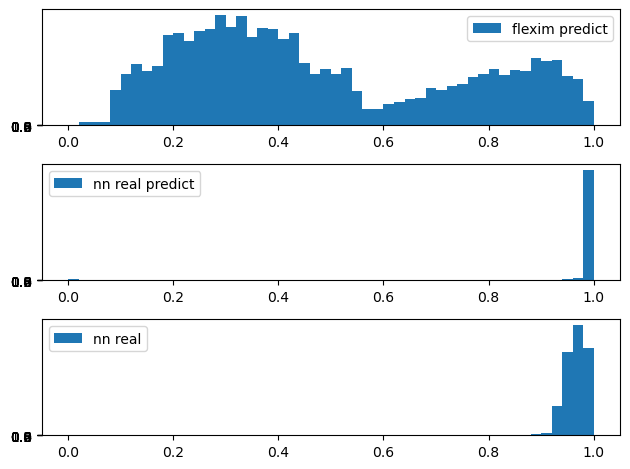

total query time is 9
wass distance flexim is 0.4733043719447899
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 32
label smoothing is 0.5615411830522145
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 14:31:36.205961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 1.9256e-10 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 49ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 1.5394e-10 - accuracy: 0.6875

2022-09-25 14:31:36.711112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 13ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 14ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 4ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.864
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

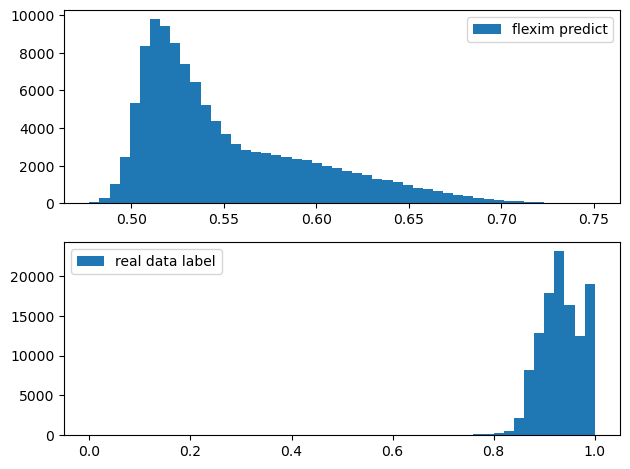

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


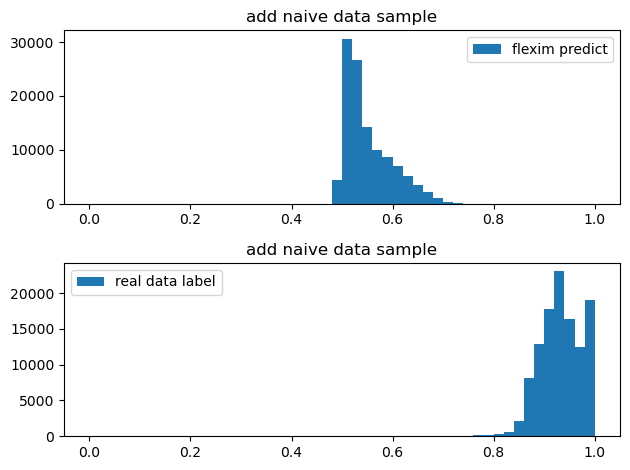

***** begin training *****
neg number flexim is 3601
pos number flexim is 87511
use bias is False
gamma is 7
label smoothing is 0.44702259503662123
new version 1
Epoch 1/10


2022-09-25 14:32:02.861308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.6728 - precision: 0.9872 - recall: 0.6680

2022-09-25 14:32:29.636174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.0043 - accuracy: 0.6728 - precision: 0.9872 - recall: 0.6680 - val_loss: 0.0049 - val_accuracy: 0.5874 - val_precision: 0.9961 - val_recall: 0.5724
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0040 - accuracy: 0.6895 - precision: 0.9898 - recall: 0.6837 - val_loss: 0.0037 - val_accuracy: 0.7350 - val_precision: 0.9876 - val_recall: 0.7331
Epoch 3/10
2848/2848 [==============================] - 29s 10ms/step - loss: 0.0040 - accuracy: 0.6940 - precision: 0.9901 - recall: 0.6883 - val_loss: 0.0038 - val_accuracy: 0.7173 - val_precision: 0.9890 - val_recall: 0.7134
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0039 - accuracy: 0.6986 - precision: 0.9895 - recall: 0.6935 - val_loss: 0.0042 - val_accuracy: 0.6811 - val_precision: 0.9912 - val_recall: 0.6738
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0039 - accuracy: 0.

2022-09-25 14:37:02.596219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 7.9428e-04 - accuracy: 0.9749 - precision: 0.9998 - recall: 0.9750

2022-09-25 14:37:29.415716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 7.9428e-04 - accuracy: 0.9749 - precision: 0.9998 - recall: 0.9750 - val_loss: 2.3474e-04 - val_accuracy: 0.9936 - val_precision: 1.0000 - val_recall: 0.9936
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.8398e-04 - accuracy: 0.9950 - precision: 1.0000 - recall: 0.9950 - val_loss: 1.8884e-04 - val_accuracy: 0.9960 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 1.4795e-04 - accuracy: 0.9968 - precision: 1.0000 - recall: 0.9968 - val_loss: 1.9673e-04 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.3163e-04 - accuracy: 0.9972 - precision: 1.0000 - recall: 0.9972 - val_loss: 2.9551e-04 - val_accuracy: 0.9954 - val_precision: 1.0000 - val_recall: 0.9954
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 14:42:02.350607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.20814155042171478
 97/900 [==>...........................] - ETA: 1s

2022-09-25 14:42:03.845262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12654682993888855
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.275203790178753
emd real is 0.03504487241119582


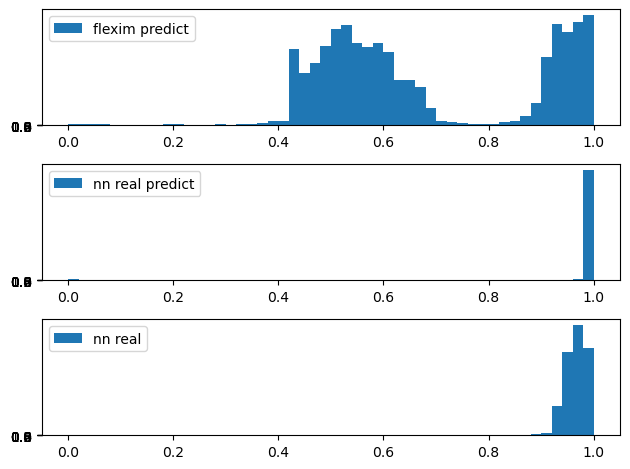

total query time is 9
wass distance flexim is 0.275203790178753
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.5322847059359629
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 14:42:07.442052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 9ms/step - loss: 8.2697e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 40ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
5/6 [========================>.....] - ETA: 0s - loss: 8.0020e-13 - accuracy: 0.5188

2022-09-25 14:42:07.919391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 23ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 16ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is 

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 4ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

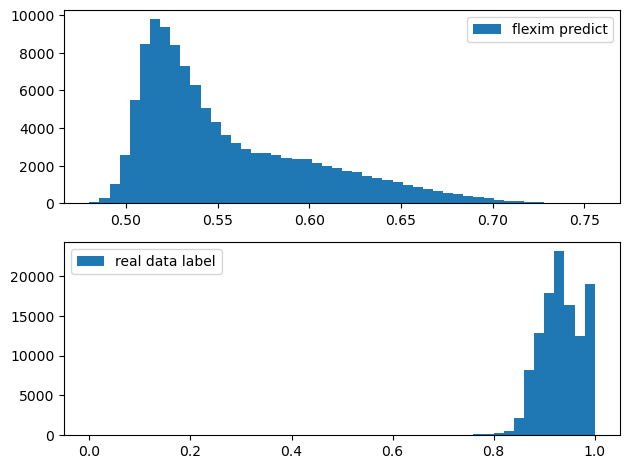

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


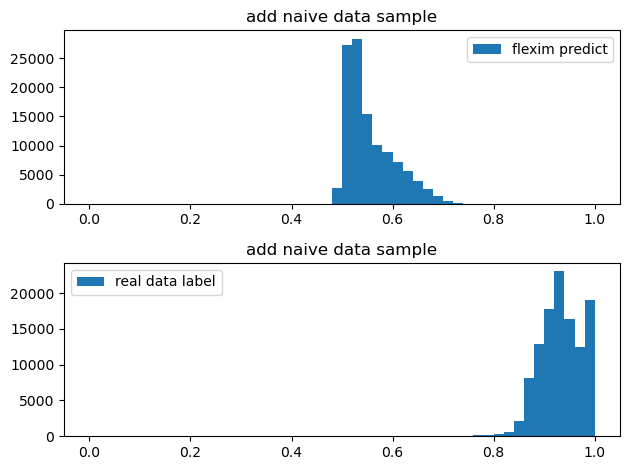

***** begin training *****
neg number flexim is 2216
pos number flexim is 88896
use bias is False
gamma is 16
label smoothing is 0.0663812196854022
new version 1
Epoch 1/10


2022-09-25 14:42:34.269403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 9.0920e-06 - accuracy: 0.6812 - precision: 0.9916 - recall: 0.6791

2022-09-25 14:43:01.042849: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 9.0920e-06 - accuracy: 0.6812 - precision: 0.9916 - recall: 0.6791 - val_loss: 7.0610e-06 - val_accuracy: 0.7587 - val_precision: 0.9941 - val_recall: 0.7574
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 7.6684e-06 - accuracy: 0.7229 - precision: 0.9941 - recall: 0.7202 - val_loss: 5.9187e-06 - val_accuracy: 0.8097 - val_precision: 0.9919 - val_recall: 0.8118
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 7.4974e-06 - accuracy: 0.7290 - precision: 0.9943 - recall: 0.7264 - val_loss: 9.3397e-06 - val_accuracy: 0.6497 - val_precision: 0.9978 - val_recall: 0.6426
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 7.2686e-06 - accuracy: 0.7297 - precision: 0.9944 - recall: 0.7271 - val_loss: 8.4879e-06 - val_accuracy: 0.6673 - val_precision: 0.9978 - val_recall: 0.6607
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 14:47:33.860292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.4778e-06 - accuracy: 0.9736 - precision: 0.9998 - recall: 0.9736

2022-09-25 14:48:00.726264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 1.4778e-06 - accuracy: 0.9736 - precision: 0.9998 - recall: 0.9736 - val_loss: 4.6303e-07 - val_accuracy: 0.9932 - val_precision: 1.0000 - val_recall: 0.9932
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.6845e-07 - accuracy: 0.9953 - precision: 1.0000 - recall: 0.9953 - val_loss: 2.2336e-07 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.9614e-07 - accuracy: 0.9965 - precision: 1.0000 - recall: 0.9965 - val_loss: 4.2354e-07 - val_accuracy: 0.9961 - val_precision: 1.0000 - val_recall: 0.9961
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 1.6910e-07 - accuracy: 0.9974 - precision: 1.0000 - recall: 0.9974 - val_loss: 1.3057e-07 - val_accuracy: 0.9977 - val_precision: 1.0000 - val_recall: 0.9977
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 14:52:35.093557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.12832807004451752
 62/900 [=>............................] - ETA: 1s

2022-09-25 14:52:36.575011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.1276155412197113
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.23256330273003137
emd real is 0.03478410787176533


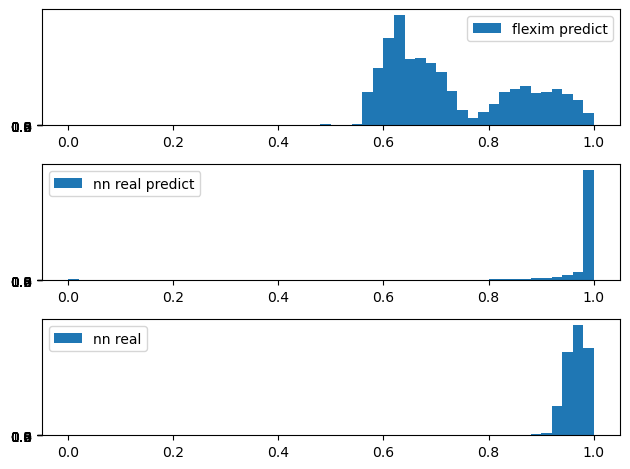

total query time is 9
wass distance flexim is 0.23256330273003137
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 4
label smoothing is 0.36053068507594
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 14:52:39.925578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 0.0357 - accuracy: 0.7812
run into active learning emulate process
1/1 [==============================] - 0s 51ms/step
active learning initial score is 0.762
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
1/6 [====>.........................] - ETA: 0s - loss: 0.0316 - accuracy: 0.8438

2022-09-25 14:52:40.481479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 17ms/step
1 time active learning score is 0.068
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.591
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.545
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
4 time active learning score is 0.591
5/5 [==============================] - 0s 6ms/step
query instance sh

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.896
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.958
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.917
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 11
self.training_done is True

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.841
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [===============

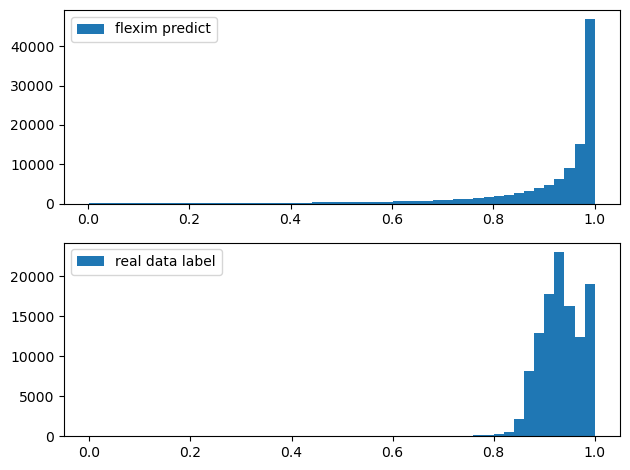

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


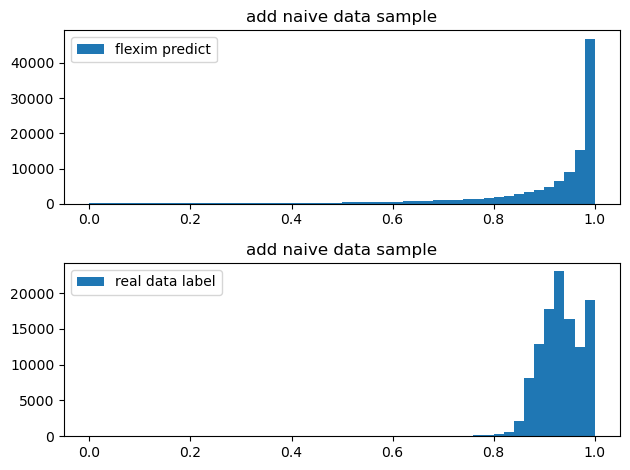

***** begin training *****
neg number flexim is 4385
pos number flexim is 86727
use bias is False
gamma is 4
label smoothing is 0.5545401807785735
new version 1
Epoch 1/10


2022-09-25 14:53:08.067430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.7859 - precision: 0.9862 - recall: 0.7861

2022-09-25 14:53:34.945817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.0317 - accuracy: 0.7859 - precision: 0.9862 - recall: 0.7861 - val_loss: 0.0309 - val_accuracy: 0.7804 - val_precision: 0.9944 - val_recall: 0.7737
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0282 - accuracy: 0.8027 - precision: 0.9920 - recall: 0.7991 - val_loss: 0.0331 - val_accuracy: 0.7677 - val_precision: 0.9948 - val_recall: 0.7600
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.0273 - accuracy: 0.8089 - precision: 0.9924 - recall: 0.8054 - val_loss: 0.0236 - val_accuracy: 0.8422 - val_precision: 0.9909 - val_recall: 0.8420
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0272 - accuracy: 0.8076 - precision: 0.9925 - recall: 0.8040 - val_loss: 0.0336 - val_accuracy: 0.7545 - val_precision: 0.9951 - val_recall: 0.7458
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.0270 - accuracy: 0.

2022-09-25 14:58:12.525208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9666 - precision: 0.9997 - recall: 0.9668

2022-09-25 14:58:39.972708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.0142 - accuracy: 0.9666 - precision: 0.9997 - recall: 0.9668 - val_loss: 0.0097 - val_accuracy: 0.9892 - val_precision: 1.0000 - val_recall: 0.9892
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0082 - accuracy: 0.9928 - precision: 1.0000 - recall: 0.9927 - val_loss: 0.0079 - val_accuracy: 0.9946 - val_precision: 1.0000 - val_recall: 0.9946
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0078 - accuracy: 0.9949 - precision: 1.0000 - recall: 0.9949 - val_loss: 0.0080 - val_accuracy: 0.9943 - val_precision: 1.0000 - val_recall: 0.9942
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0077 - accuracy: 0.9955 - precision: 1.0000 - recall: 0.9954 - val_loss: 0.0079 - val_accuracy: 0.9951 - val_precision: 1.0000 - val_recall: 0.9951
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0077 - accuracy: 0.

2022-09-25 15:03:19.451402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999999403953552
score list flexim std is 0.24689869582653046
 57/900 [>.............................] - ETA: 1s

2022-09-25 15:03:21.056686: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 0.9999999403953552
score list mreal std is 0.12676741182804108
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2743487086909642
emd real is 0.026258705347188143


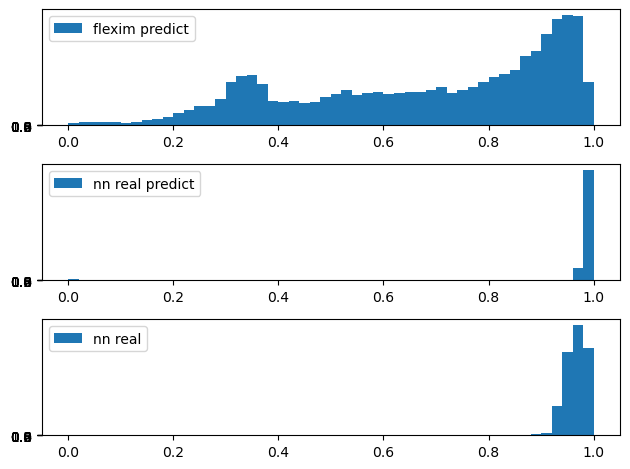

total query time is 14
wass distance flexim is 0.2743487086909642
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.5528533702027132
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:03:24.804165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 11ms/step - loss: 8.1202e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 53ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
4/6 [===================>..........] - ETA: 0s - loss: 7.8526e-13 - accuracy: 0.5234

2022-09-25 15:03:25.408435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time activ

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [===================

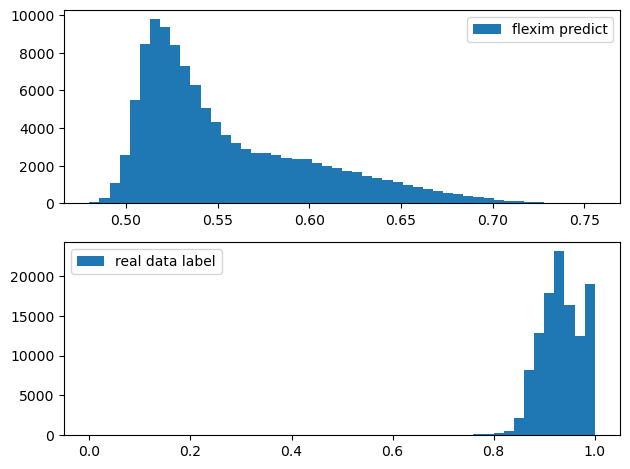

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


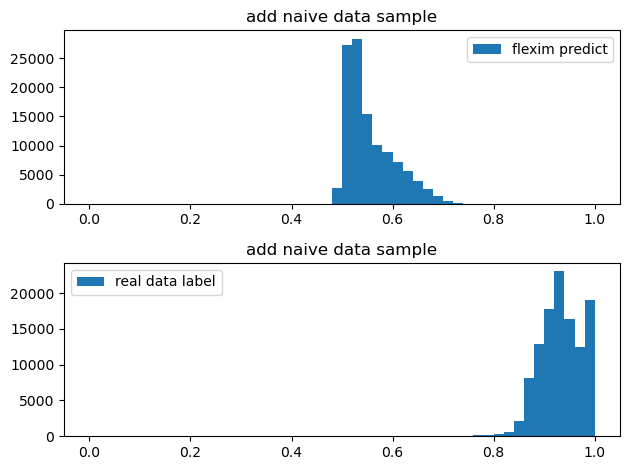

***** begin training *****
neg number flexim is 2214
pos number flexim is 88898
use bias is False
gamma is 34
label smoothing is 0.24700542842429796
new version 1
Epoch 1/10


2022-09-25 15:03:52.612187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.5246e-10 - accuracy: 0.0774 - precision: 0.9387 - recall: 0.0582

2022-09-25 15:04:19.537790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 1.5246e-10 - accuracy: 0.0774 - precision: 0.9387 - recall: 0.0582 - val_loss: 1.0151e-10 - val_accuracy: 0.1388 - val_precision: 0.9374 - val_recall: 0.1264
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 5.9095e-11 - accuracy: 0.2029 - precision: 0.9416 - recall: 0.1951 - val_loss: 6.2045e-11 - val_accuracy: 0.2578 - val_precision: 0.9419 - val_recall: 0.2556
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 5.1923e-11 - accuracy: 0.3119 - precision: 0.9468 - recall: 0.3123 - val_loss: 5.0428e-11 - val_accuracy: 0.3515 - val_precision: 0.9481 - val_recall: 0.3553
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 4.9878e-11 - accuracy: 0.3913 - precision: 0.9518 - recall: 0.3961 - val_loss: 4.5238e-11 - val_accuracy: 0.4235 - val_precision: 0.9528 - val_recall: 0.4309
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 15:08:58.009096: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.6658e-10 - accuracy: 0.0538 - precision: 0.9331 - recall: 0.0538

2022-09-25 15:09:26.292169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 1.6658e-10 - accuracy: 0.0538 - precision: 0.9331 - recall: 0.0538 - val_loss: 1.0100e-10 - val_accuracy: 0.1224 - val_precision: 0.9718 - val_recall: 0.1228
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 6.8481e-11 - accuracy: 0.2005 - precision: 0.9803 - recall: 0.2013 - val_loss: 5.6925e-11 - val_accuracy: 0.2827 - val_precision: 0.9876 - val_recall: 0.2837
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 5.6352e-11 - accuracy: 0.3808 - precision: 0.9895 - recall: 0.3824 - val_loss: 4.2434e-11 - val_accuracy: 0.4858 - val_precision: 0.9927 - val_recall: 0.4875
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 5.1051e-11 - accuracy: 0.6111 - precision: 0.9934 - recall: 0.6136 - val_loss: 3.5588e-11 - val_accuracy: 0.7234 - val_precision: 0.9951 - val_recall: 0.7260
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 15:14:02.445853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.11364103108644485
 60/900 [=>............................] - ETA: 1s

2022-09-25 15:14:03.995402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.15579292178153992
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.6771967487729464
emd real is 0.6080205538205189


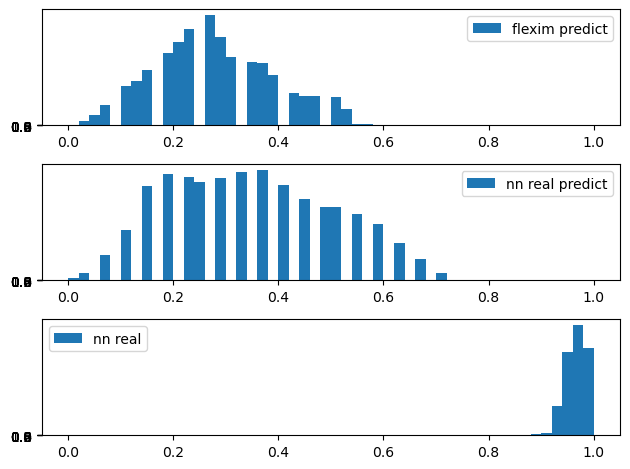

total query time is 9
wass distance flexim is 0.6771967487729464
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.5415882538807895
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:14:07.418413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 10ms/step - loss: 8.2012e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 44ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
4/6 [===================>..........] - ETA: 0s - loss: 8.1802e-13 - accuracy: 0.5391

2022-09-25 15:14:07.951714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 19ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True
simi kind is 2
run next cluster
random value is 2
s

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

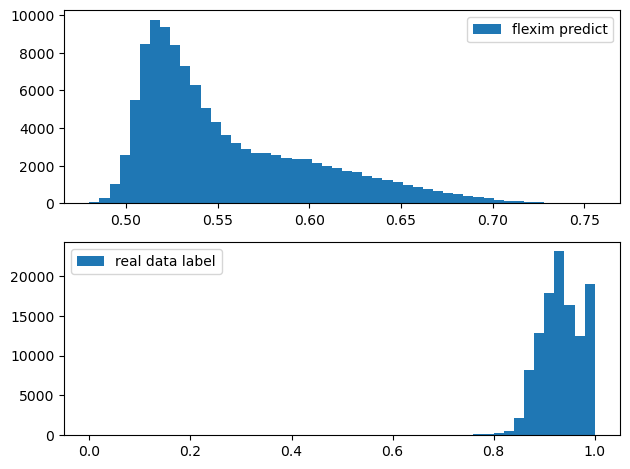

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


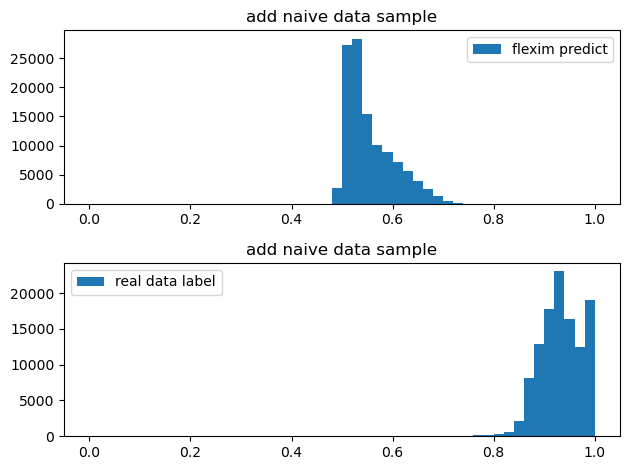

***** begin training *****
neg number flexim is 2214
pos number flexim is 88898
use bias is False
gamma is 12
label smoothing is 0.45333642885142905
new version 1
Epoch 1/10


2022-09-25 15:14:34.847703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.3362e-04 - accuracy: 0.7101 - precision: 0.9921 - recall: 0.7086

2022-09-25 15:15:01.809587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 1.3362e-04 - accuracy: 0.7101 - precision: 0.9921 - recall: 0.7086 - val_loss: 1.4180e-04 - val_accuracy: 0.6716 - val_precision: 0.9970 - val_recall: 0.6657
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 1.2193e-04 - accuracy: 0.7295 - precision: 0.9942 - recall: 0.7271 - val_loss: 1.1911e-04 - val_accuracy: 0.7490 - val_precision: 0.9950 - val_recall: 0.7467
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.1981e-04 - accuracy: 0.7342 - precision: 0.9944 - recall: 0.7317 - val_loss: 9.9464e-05 - val_accuracy: 0.7949 - val_precision: 0.9934 - val_recall: 0.7952
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.1748e-04 - accuracy: 0.7347 - precision: 0.9945 - recall: 0.7321 - val_loss: 8.0911e-05 - val_accuracy: 0.8388 - val_precision: 0.9908 - val_recall: 0.8427
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/st

2022-09-25 15:19:36.676578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 2.0066e-05 - accuracy: 0.9751 - precision: 0.9999 - recall: 0.9751

2022-09-25 15:20:04.011901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 2.0066e-05 - accuracy: 0.9751 - precision: 0.9999 - recall: 0.9751 - val_loss: 1.0390e-05 - val_accuracy: 0.9903 - val_precision: 1.0000 - val_recall: 0.9903
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 4.0900e-06 - accuracy: 0.9953 - precision: 1.0000 - recall: 0.9953 - val_loss: 1.4252e-06 - val_accuracy: 0.9979 - val_precision: 1.0000 - val_recall: 0.9979
Epoch 3/10
2848/2848 [==============================] - 30s 10ms/step - loss: 3.0970e-06 - accuracy: 0.9970 - precision: 1.0000 - recall: 0.9969 - val_loss: 3.6265e-06 - val_accuracy: 0.9971 - val_precision: 1.0000 - val_recall: 0.9970
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 2.6118e-06 - accuracy: 0.9975 - precision: 1.0000 - recall: 0.9975 - val_loss: 4.3925e-06 - val_accuracy: 0.9968 - val_precision: 1.0000 - val_recall: 0.9968
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 15:24:46.104415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.1870952695608139
 93/900 [==>...........................] - ETA: 1s

2022-09-25 15:24:47.659152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12534047663211823
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2946562491753045
emd real is 0.036495449543594745


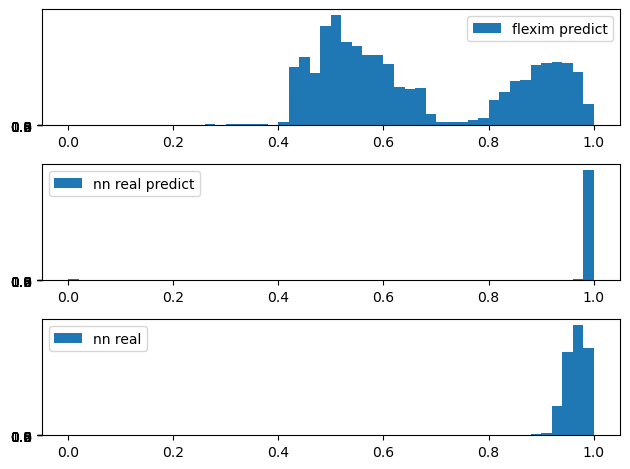

total query time is 9
wass distance flexim is 0.2946562491753045
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.590514641053271
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:24:51.228112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 7.8649e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 42ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
5/6 [========================>.....] - ETA: 0s - loss: 7.7075e-13 - accuracy: 0.5125

2022-09-25 15:24:51.797433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 8ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 9
self.training_done is True
simi kind is 

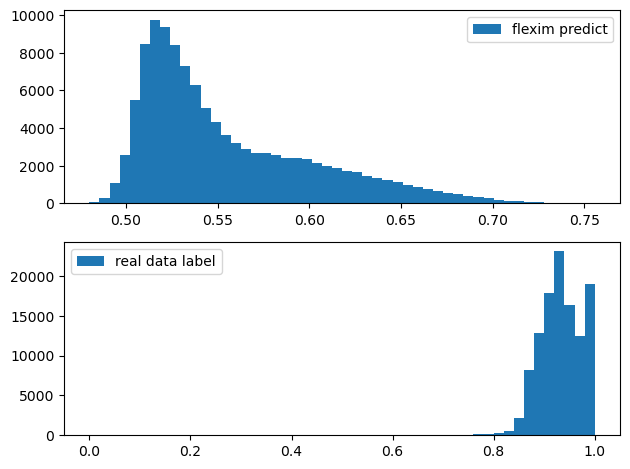

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


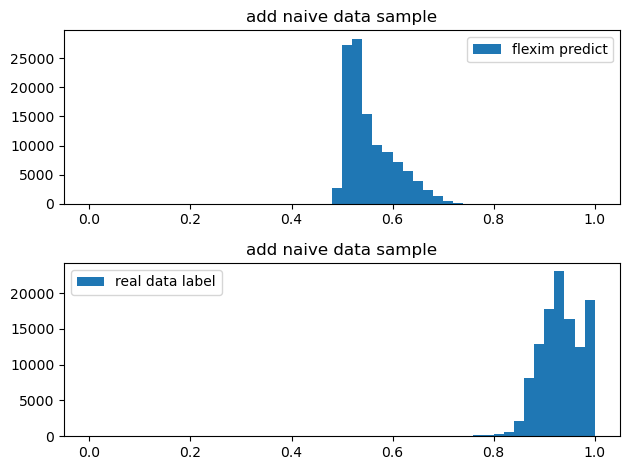

***** begin training *****
neg number flexim is 2208
pos number flexim is 88904
use bias is False
gamma is 9
label smoothing is 0.03950757923529157
new version 1
Epoch 1/10


2022-09-25 15:25:19.184928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.7063 - precision: 0.9925 - recall: 0.7043

2022-09-25 15:25:46.447515: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.0010 - accuracy: 0.7063 - precision: 0.9925 - recall: 0.7043 - val_loss: 0.0012 - val_accuracy: 0.6207 - val_precision: 0.9977 - val_recall: 0.6130
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 9.6370e-04 - accuracy: 0.7269 - precision: 0.9946 - recall: 0.7240 - val_loss: 0.0014 - val_accuracy: 0.5447 - val_precision: 0.9990 - val_recall: 0.5343
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 9.3429e-04 - accuracy: 0.7318 - precision: 0.9947 - recall: 0.7290 - val_loss: 9.0800e-04 - val_accuracy: 0.7499 - val_precision: 0.9952 - val_recall: 0.7474
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 9.1866e-04 - accuracy: 0.7355 - precision: 0.9945 - recall: 0.7330 - val_loss: 7.6423e-04 - val_accuracy: 0.7994 - val_precision: 0.9932 - val_recall: 0.8001
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 9

2022-09-25 15:30:30.117108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.3755e-04 - accuracy: 0.9778 - precision: 0.9999 - recall: 0.9778

2022-09-25 15:30:58.899041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 12ms/step - loss: 1.3755e-04 - accuracy: 0.9778 - precision: 0.9999 - recall: 0.9778 - val_loss: 4.9664e-05 - val_accuracy: 0.9939 - val_precision: 1.0000 - val_recall: 0.9939
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 2.6995e-05 - accuracy: 0.9959 - precision: 1.0000 - recall: 0.9959 - val_loss: 4.3158e-05 - val_accuracy: 0.9961 - val_precision: 1.0000 - val_recall: 0.9960
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.1474e-05 - accuracy: 0.9969 - precision: 1.0000 - recall: 0.9969 - val_loss: 4.6038e-05 - val_accuracy: 0.9961 - val_precision: 1.0000 - val_recall: 0.9961
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 1.6822e-05 - accuracy: 0.9975 - precision: 1.0000 - recall: 0.9975 - val_loss: 1.0492e-05 - val_accuracy: 0.9983 - val_precision: 1.0000 - val_recall: 0.9983
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 15:35:46.102228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.15302704274654388
 56/900 [>.............................] - ETA: 1s

2022-09-25 15:35:47.937224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12165569514036179
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2577396531955181
emd real is 0.03518275211650075


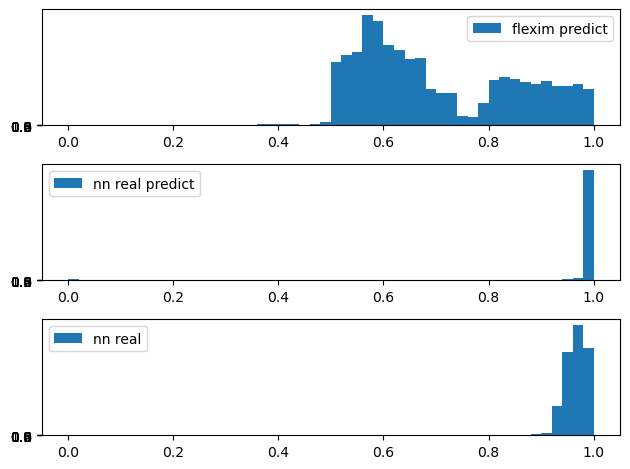

total query time is 9
wass distance flexim is 0.2577396531955181
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 18
label smoothing is 0.527829265391676
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:35:51.602973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 26ms/step - loss: 2.6690e-06 - accuracy: 0.4625
run into active learning emulate process
1/1 [==============================] - 0s 68ms/step
active learning initial score is 0.381
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
1/6 [====>.........................] - ETA: 0s - loss: 2.4647e-06 - accuracy: 0.5000

2022-09-25 15:35:52.346815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 21ms/step
1 time active learning score is 0.636
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.682
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
4 time active learning score is 0.886
2/2 [==============================] - 0s 6ms/step
emulate process finis

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.381
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 23ms/step
1 time active learning score is 0.938
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.875
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [===========

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


13/13 [==============================] - 0s 21ms/step - loss: 2.3102e-06 - accuracy: 0.6961
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.795
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.818
6/6 [==============================] - 0s 2ms/st

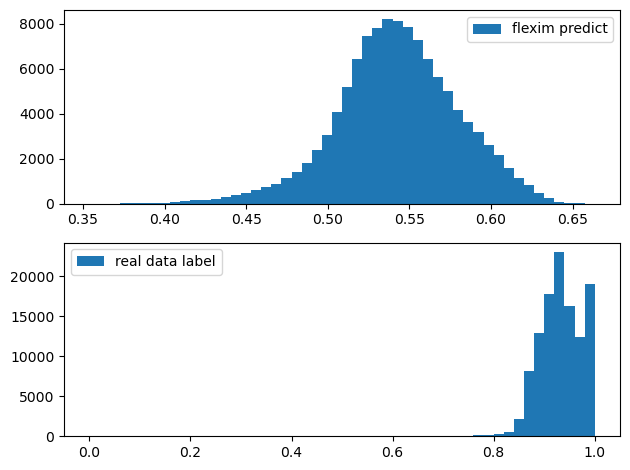

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


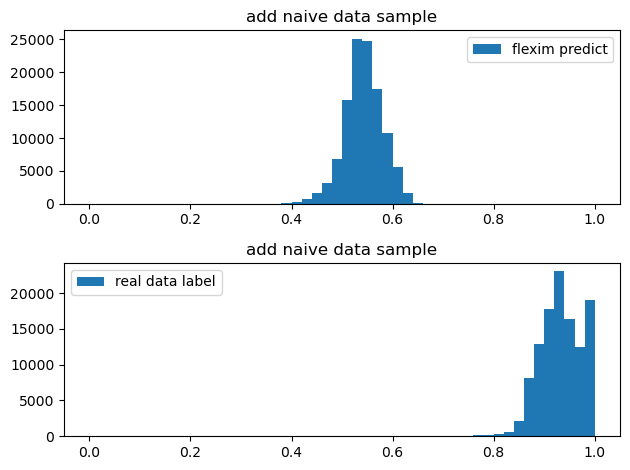

***** begin training *****
neg number flexim is 10172
pos number flexim is 80940
use bias is False
gamma is 18
label smoothing is 0.01959251693613143
new version 1
Epoch 1/10


2022-09-25 15:36:22.458397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.8394e-06 - accuracy: 0.7926 - precision: 0.9672 - recall: 0.7935

2022-09-25 15:36:51.393714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 33s 11ms/step - loss: 1.8394e-06 - accuracy: 0.7926 - precision: 0.9672 - recall: 0.7935 - val_loss: 1.9125e-06 - val_accuracy: 0.7767 - val_precision: 0.9891 - val_recall: 0.7565
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.5849e-06 - accuracy: 0.8046 - precision: 0.9833 - recall: 0.7935 - val_loss: 2.0296e-06 - val_accuracy: 0.7583 - val_precision: 0.9918 - val_recall: 0.7337
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.5610e-06 - accuracy: 0.8049 - precision: 0.9830 - recall: 0.7941 - val_loss: 1.7611e-06 - val_accuracy: 0.7863 - val_precision: 0.9884 - val_recall: 0.7682
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 1.5460e-06 - accuracy: 0.8064 - precision: 0.9837 - recall: 0.7953 - val_loss: 2.1096e-06 - val_accuracy: 0.7515 - val_precision: 0.9916 - val_recall: 0.7260
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 15:41:34.867490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 4.3073e-07 - accuracy: 0.9663 - precision: 0.9998 - recall: 0.9663

2022-09-25 15:42:04.592247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 35s 12ms/step - loss: 4.3073e-07 - accuracy: 0.9663 - precision: 0.9998 - recall: 0.9663 - val_loss: 2.4028e-07 - val_accuracy: 0.9852 - val_precision: 1.0000 - val_recall: 0.9851
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 9.2581e-08 - accuracy: 0.9931 - precision: 1.0000 - recall: 0.9931 - val_loss: 5.2125e-08 - val_accuracy: 0.9962 - val_precision: 1.0000 - val_recall: 0.9962
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 7.0827e-08 - accuracy: 0.9954 - precision: 1.0000 - recall: 0.9954 - val_loss: 4.5992e-08 - val_accuracy: 0.9969 - val_precision: 1.0000 - val_recall: 0.9969
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 5.7429e-08 - accuracy: 0.9962 - precision: 1.0000 - recall: 0.9962 - val_loss: 4.0086e-08 - val_accuracy: 0.9972 - val_precision: 1.0000 - val_recall: 0.9972
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 15:46:48.091354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.20499536395072937
 57/900 [>.............................] - ETA: 1s

2022-09-25 15:46:49.880774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13092556595802307
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.4967635136355992
emd real is 0.03816482760886946


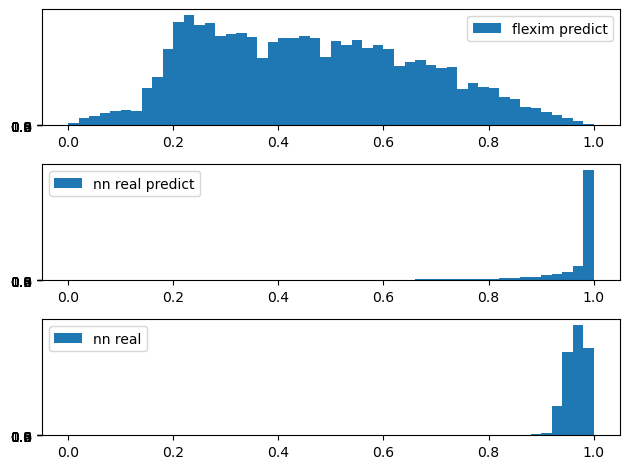

total query time is 12
wass distance flexim is 0.4967635136355992
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.5439864024057351
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:46:53.595866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 8.1838e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 65ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 7.1599e-13 - accuracy: 0.5312

2022-09-25 15:46:54.299836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 7ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 6ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 11ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [===================

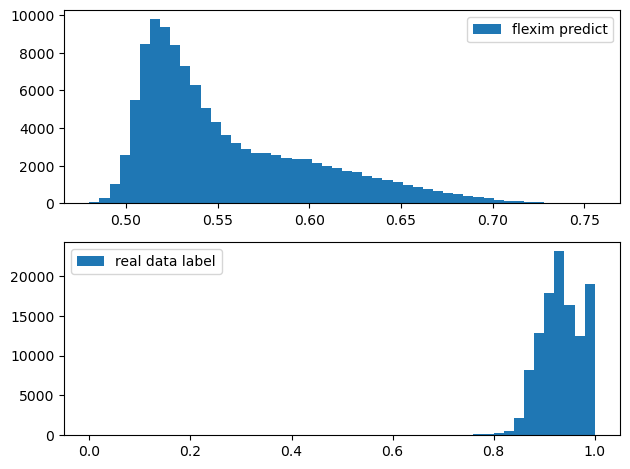

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


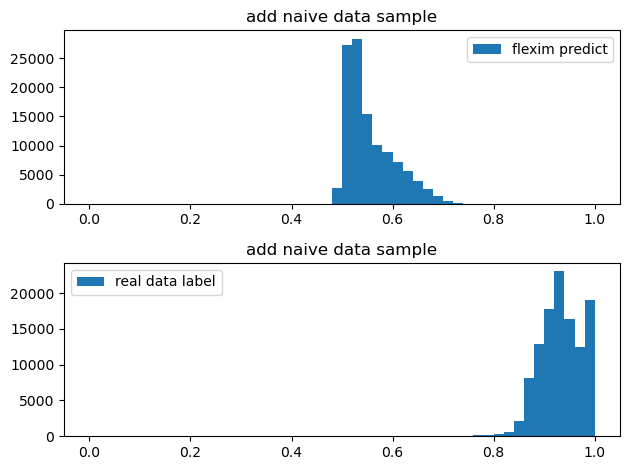

***** begin training *****
neg number flexim is 2214
pos number flexim is 88898
use bias is False
gamma is 17
label smoothing is 0.03068654156517923
new version 1
Epoch 1/10


2022-09-25 15:47:22.438557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 4.5125e-06 - accuracy: 0.6745 - precision: 0.9909 - recall: 0.6726

2022-09-25 15:47:50.196231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 4.5125e-06 - accuracy: 0.6745 - precision: 0.9909 - recall: 0.6726 - val_loss: 4.8163e-06 - val_accuracy: 0.6305 - val_precision: 0.9983 - val_recall: 0.6226
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 3.8313e-06 - accuracy: 0.7191 - precision: 0.9944 - recall: 0.7161 - val_loss: 2.0325e-06 - val_accuracy: 0.9060 - val_precision: 0.9853 - val_recall: 0.9174
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 3.7574e-06 - accuracy: 0.7289 - precision: 0.9946 - recall: 0.7261 - val_loss: 4.0056e-06 - val_accuracy: 0.7091 - val_precision: 0.9966 - val_recall: 0.7044
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 3.6619e-06 - accuracy: 0.7303 - precision: 0.9950 - recall: 0.7272 - val_loss: 2.7824e-06 - val_accuracy: 0.8162 - val_precision: 0.9922 - val_recall: 0.8182
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 15:52:30.268380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 7.4370e-07 - accuracy: 0.9715 - precision: 0.9998 - recall: 0.9715

2022-09-25 15:52:57.687641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 7.4370e-07 - accuracy: 0.9715 - precision: 0.9998 - recall: 0.9715 - val_loss: 1.8238e-07 - val_accuracy: 0.9927 - val_precision: 1.0000 - val_recall: 0.9926
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 1.5079e-07 - accuracy: 0.9940 - precision: 1.0000 - recall: 0.9940 - val_loss: 1.5633e-07 - val_accuracy: 0.9959 - val_precision: 1.0000 - val_recall: 0.9959
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.1520e-07 - accuracy: 0.9961 - precision: 1.0000 - recall: 0.9961 - val_loss: 1.3126e-07 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 9.2125e-08 - accuracy: 0.9970 - precision: 1.0000 - recall: 0.9970 - val_loss: 4.4291e-08 - val_accuracy: 0.9980 - val_precision: 1.0000 - val_recall: 0.9980
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 15:57:36.350850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0000001192092896
score list flexim std is 0.12519556283950806
 58/900 [>.............................] - ETA: 1s

2022-09-25 15:57:37.903693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.124517522752285
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2227924564475874
emd real is 0.03425358839872681


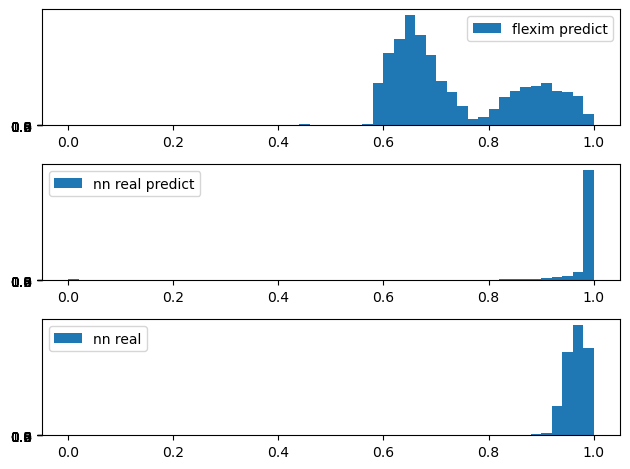

total query time is 9
wass distance flexim is 0.2227924564475874
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 31
label smoothing is 0.6090143180833455
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 15:57:41.534155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 19ms/step - loss: 3.7224e-10 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 54ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 4.1122e-10 - accuracy: 0.3438

2022-09-25 15:57:42.221012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 18ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 5ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
3 time active learning sc

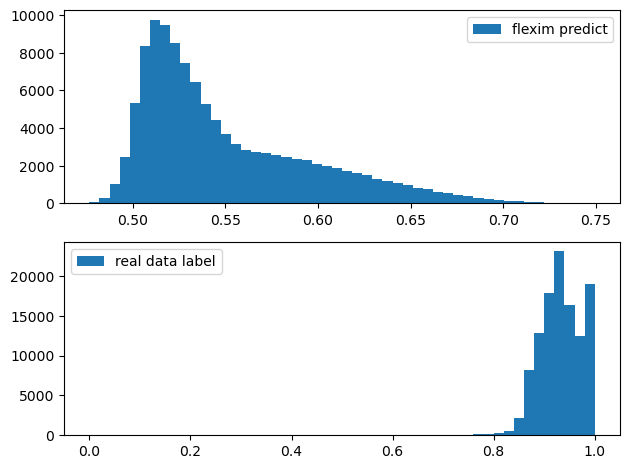

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


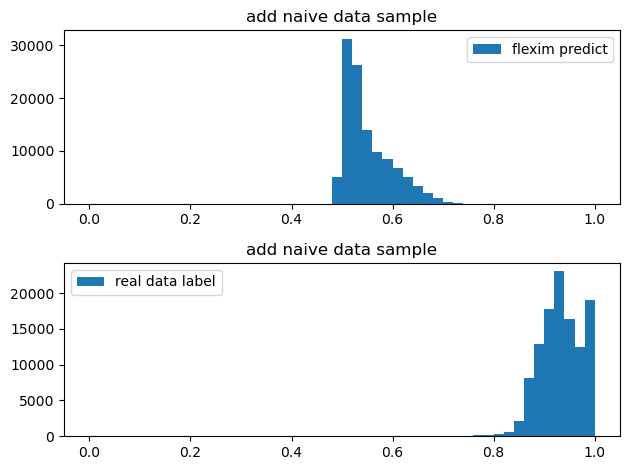

***** begin training *****
neg number flexim is 4013
pos number flexim is 87099
use bias is False
gamma is 0
label smoothing is 0.09790321939707718
new version 1
Epoch 1/10


2022-09-25 15:58:09.406600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5858 - accuracy: 0.6812 - precision: 0.9818 - recall: 0.6790

2022-09-25 15:58:36.777319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5858 - accuracy: 0.6812 - precision: 0.9818 - recall: 0.6790 - val_loss: 0.5487 - val_accuracy: 0.6928 - val_precision: 0.9859 - val_recall: 0.6880
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5482 - accuracy: 0.6515 - precision: 0.9891 - recall: 0.6425 - val_loss: 0.6272 - val_accuracy: 0.6135 - val_precision: 0.9932 - val_recall: 0.5992
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5388 - accuracy: 0.6652 - precision: 0.9892 - recall: 0.6569 - val_loss: 0.5223 - val_accuracy: 0.7293 - val_precision: 0.9836 - val_recall: 0.7286
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.5344 - accuracy: 0.6753 - precision: 0.9899 - recall: 0.6672 - val_loss: 0.5513 - val_accuracy: 0.7042 - val_precision: 0.9860 - val_recall: 0.7001
Epoch 5/10
2848/2848 [==============================] - 30s 10ms/step - loss: 0.5331 - accuracy: 0.

2022-09-25 16:03:13.109399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.2815 - accuracy: 0.9568 - precision: 0.9997 - recall: 0.9569

2022-09-25 16:03:40.437787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.2815 - accuracy: 0.9568 - precision: 0.9997 - recall: 0.9569 - val_loss: 0.2158 - val_accuracy: 0.9864 - val_precision: 1.0000 - val_recall: 0.9863
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.2115 - accuracy: 0.9880 - precision: 1.0000 - recall: 0.9879 - val_loss: 0.2150 - val_accuracy: 0.9877 - val_precision: 1.0000 - val_recall: 0.9877
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.2085 - accuracy: 0.9914 - precision: 1.0000 - recall: 0.9914 - val_loss: 0.2120 - val_accuracy: 0.9898 - val_precision: 1.0000 - val_recall: 0.9898
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.2075 - accuracy: 0.9922 - precision: 1.0000 - recall: 0.9922 - val_loss: 0.2111 - val_accuracy: 0.9902 - val_precision: 1.0000 - val_recall: 0.9902
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.2070 - accuracy: 0.

2022-09-25 16:08:16.703442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 0.9999998807907104
score list flexim std is 0.29549887776374817
 58/900 [>.............................] - ETA: 1s

2022-09-25 16:08:18.302624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.13808134198188782
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.33283411852084693
emd real is 0.03202890541654298


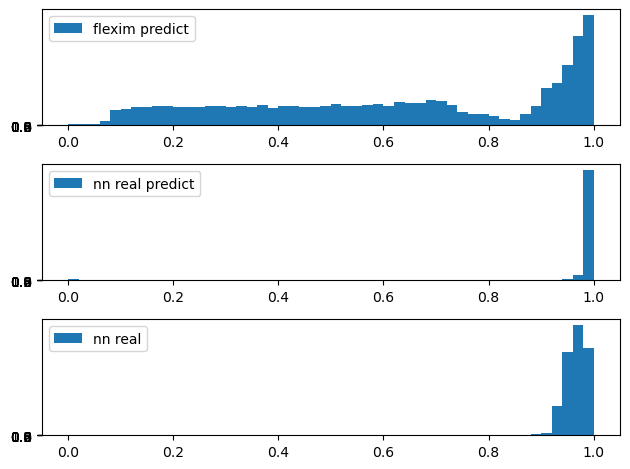

total query time is 9
wass distance flexim is 0.33283411852084693
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.5601480570325047
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 16:08:22.049377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 13ms/step - loss: 8.0690e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 55ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
4/6 [===================>..........] - ETA: 0s - loss: 8.0166e-13 - accuracy: 0.4844

2022-09-25 16:08:22.738037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 24ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 5ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 6ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 26ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 5ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 5ms/step
3 time active learning score is 0.886
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first 

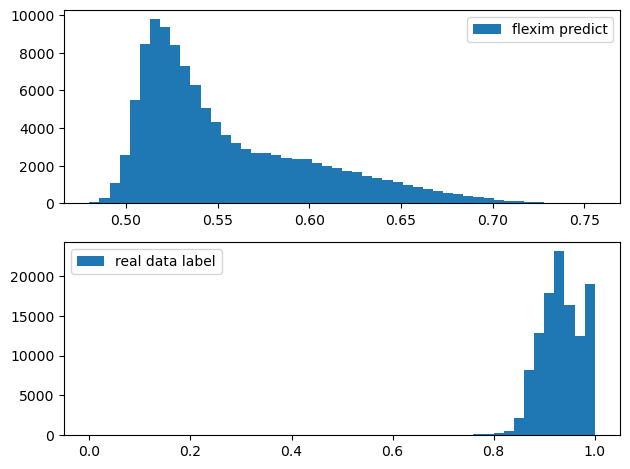

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


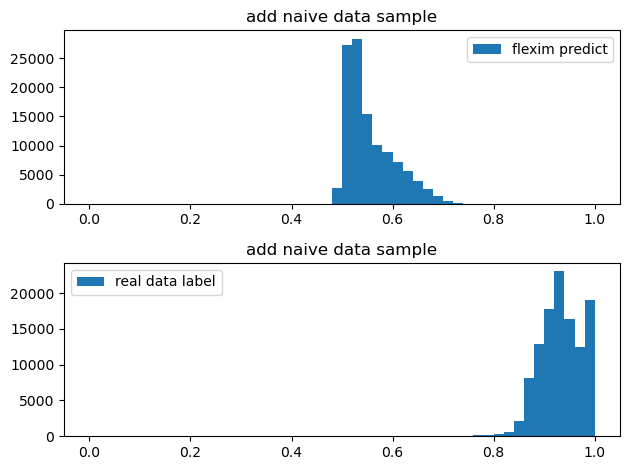

***** begin training *****
neg number flexim is 2213
pos number flexim is 88899
use bias is False
gamma is 16
label smoothing is 0.6195199446184567
new version 1
Epoch 1/10


2022-09-25 16:08:50.355182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 9.1566e-06 - accuracy: 0.6716 - precision: 0.9900 - recall: 0.6702

2022-09-25 16:09:17.628028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 9.1566e-06 - accuracy: 0.6716 - precision: 0.9900 - recall: 0.6702 - val_loss: 7.1693e-06 - val_accuracy: 0.7550 - val_precision: 0.9924 - val_recall: 0.7548
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 8.0985e-06 - accuracy: 0.7141 - precision: 0.9936 - recall: 0.7116 - val_loss: 9.1383e-06 - val_accuracy: 0.6600 - val_precision: 0.9977 - val_recall: 0.6533
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 7.7881e-06 - accuracy: 0.7245 - precision: 0.9940 - recall: 0.7220 - val_loss: 6.5249e-06 - val_accuracy: 0.7738 - val_precision: 0.9935 - val_recall: 0.7734
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 7.7745e-06 - accuracy: 0.7257 - precision: 0.9941 - recall: 0.7232 - val_loss: 7.5235e-06 - val_accuracy: 0.7422 - val_precision: 0.9950 - val_recall: 0.7397
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/st

2022-09-25 16:13:55.638406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.6981e-06 - accuracy: 0.9662 - precision: 0.9998 - recall: 0.9663

2022-09-25 16:14:23.089078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 1.6981e-06 - accuracy: 0.9662 - precision: 0.9998 - recall: 0.9663 - val_loss: 5.6980e-07 - val_accuracy: 0.9896 - val_precision: 1.0000 - val_recall: 0.9896
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 4.1525e-07 - accuracy: 0.9934 - precision: 1.0000 - recall: 0.9934 - val_loss: 8.1102e-07 - val_accuracy: 0.9905 - val_precision: 1.0000 - val_recall: 0.9904
Epoch 3/10
2848/2848 [==============================] - 32s 11ms/step - loss: 3.0972e-07 - accuracy: 0.9957 - precision: 1.0000 - recall: 0.9957 - val_loss: 6.3110e-07 - val_accuracy: 0.9932 - val_precision: 1.0000 - val_recall: 0.9932
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 2.4961e-07 - accuracy: 0.9965 - precision: 1.0000 - recall: 0.9965 - val_loss: 1.8344e-07 - val_accuracy: 0.9973 - val_precision: 1.0000 - val_recall: 0.9973
Epoch 5/10
2848/2848 [==============================] - 31s 11ms/st

2022-09-25 16:19:07.774289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2303541600704193
 59/900 [>.............................] - ETA: 1s

2022-09-25 16:19:09.382815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 2s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12753845751285553
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.42916718350399363
emd real is 0.036834827767403114


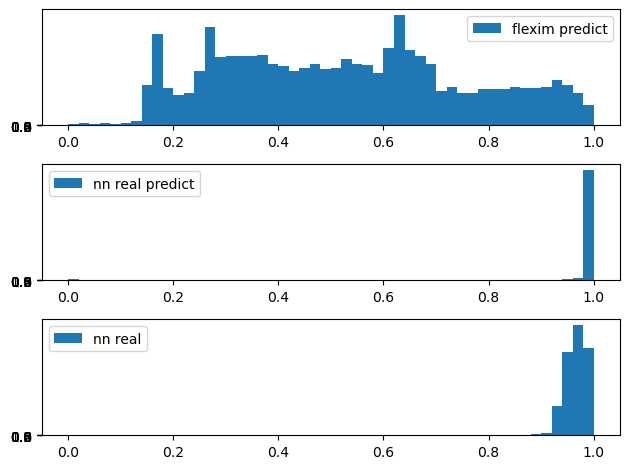

total query time is 9
wass distance flexim is 0.42916718350399363
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.7
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 16:19:13.302369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 26ms/step - loss: 7.2459e-13 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 60ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
1/6 [====>.........................] - ETA: 0s - loss: 7.0989e-13 - accuracy: 0.5312

2022-09-25 16:19:14.123055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 20ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 6ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 9ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (48, 9)
transform result shape is (48, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [=======

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


12/12 [==============================] - 0s 16ms/step - loss: 1.3213e-12 - accuracy: 0.5600
train unlabel shape is (192, 9)
run into active learning emulate process
1/1 [==============================] - 0s 10ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
1 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (6, 9)
transform result shape is (6, 100)
train
X shape is (6, 9)
Y shape is (6,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/st

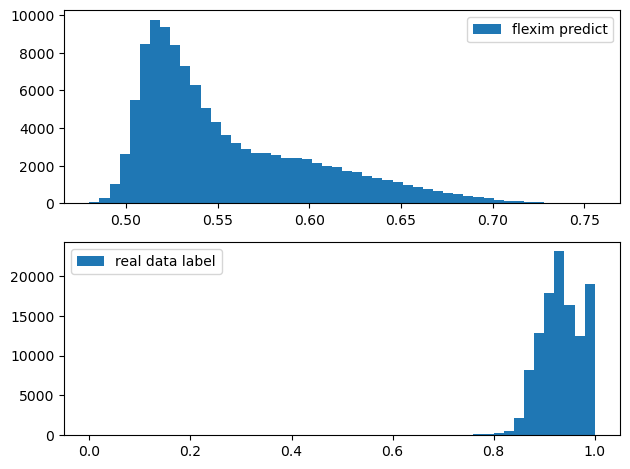

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


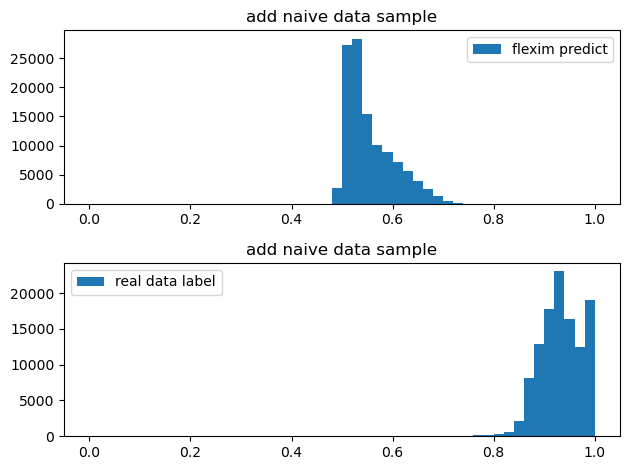

***** begin training *****
neg number flexim is 2199
pos number flexim is 88913
use bias is False
gamma is 12
label smoothing is 0.0
new version 1
Epoch 1/10


2022-09-25 16:19:42.464448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.3244e-04 - accuracy: 0.7003 - precision: 0.9922 - recall: 0.6984

2022-09-25 16:20:11.426405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 34s 12ms/step - loss: 1.3244e-04 - accuracy: 0.7003 - precision: 0.9922 - recall: 0.6984 - val_loss: 1.2972e-04 - val_accuracy: 0.7041 - val_precision: 0.9961 - val_recall: 0.6998
Epoch 2/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.2198e-04 - accuracy: 0.7293 - precision: 0.9946 - recall: 0.7266 - val_loss: 1.2792e-04 - val_accuracy: 0.7098 - val_precision: 0.9963 - val_recall: 0.7055
Epoch 3/10
2848/2848 [==============================] - 31s 11ms/step - loss: 1.2007e-04 - accuracy: 0.7316 - precision: 0.9943 - recall: 0.7292 - val_loss: 1.1484e-04 - val_accuracy: 0.7587 - val_precision: 0.9950 - val_recall: 0.7567
Epoch 4/10
2848/2848 [==============================] - 30s 10ms/step - loss: 1.1832e-04 - accuracy: 0.7344 - precision: 0.9946 - recall: 0.7318 - val_loss: 1.1683e-04 - val_accuracy: 0.7470 - val_precision: 0.9951 - val_recall: 0.7446
Epoch 5/10
2848/2848 [==============================] - 29s 10ms/st

2022-09-25 16:24:46.149826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 1.8655e-05 - accuracy: 0.9779 - precision: 0.9999 - recall: 0.9779

2022-09-25 16:25:13.606916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 1.8655e-05 - accuracy: 0.9779 - precision: 0.9999 - recall: 0.9779 - val_loss: 2.7612e-05 - val_accuracy: 0.9811 - val_precision: 1.0000 - val_recall: 0.9811
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 3.7389e-06 - accuracy: 0.9960 - precision: 1.0000 - recall: 0.9959 - val_loss: 3.5497e-06 - val_accuracy: 0.9963 - val_precision: 1.0000 - val_recall: 0.9963
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 2.6709e-06 - accuracy: 0.9972 - precision: 1.0000 - recall: 0.9972 - val_loss: 3.0866e-06 - val_accuracy: 0.9970 - val_precision: 1.0000 - val_recall: 0.9970
Epoch 4/10
2848/2848 [==============================] - 32s 11ms/step - loss: 2.2912e-06 - accuracy: 0.9976 - precision: 1.0000 - recall: 0.9976 - val_loss: 2.1048e-06 - val_accuracy: 0.9978 - val_precision: 1.0000 - val_recall: 0.9978
Epoch 5/10
2848/2848 [==============================] - 33s 12ms/st

2022-09-25 16:30:03.868131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.1440420299768448
 58/900 [>.............................] - ETA: 1s

2022-09-25 16:30:05.430571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 2ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12625575065612793
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2702366223897829
emd real is 0.03466668524688191


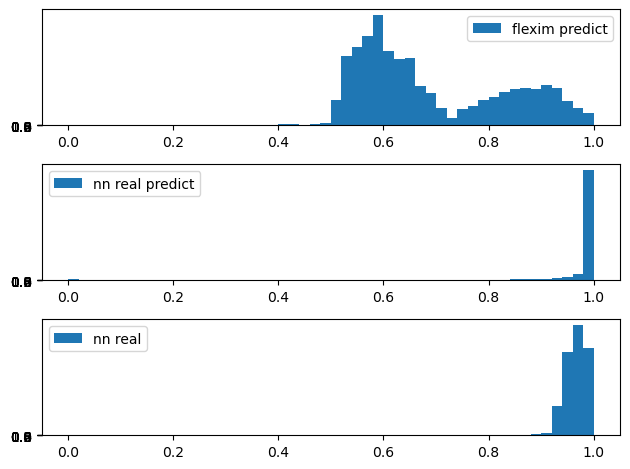

total query time is 9
wass distance flexim is 0.2702366223897829
#######################################################################################
simi_kind is 2
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 40
label smoothing is 0.041598069117873955
batch size is 10


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]
2022-09-25 16:30:09.112301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 18ms/step - loss: 1.4758e-12 - accuracy: 0.5000
run into active learning emulate process
1/1 [==============================] - 0s 56ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 3ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
3/6 [==============>...............] - ETA: 0s - loss: 1.3599e-12 - accuracy: 0.5208

2022-09-25 16:30:09.779718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.932
6/6 [==============================] - 0s 6ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.932
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.932
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 3
self.training_done is True
simi kind is 2
run next cluster
random value is 106
start point is 36071
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
2 binary fetch
self.training_done is False


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 25ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 4ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.979
2/2 [==============================] - 0s 2ms/step
emulate process finishes
query time is 3
first stage total query time is 6
self.training_done is True


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


1/1 [==============================] - 0s 12ms/step
active learning initial score is 0.571
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 4ms/step
1 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.864
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (7, 9)
transform result shape is (7, 100)
train
X shape is (7, 9)
Y shape is (7,)
2/2 [===================

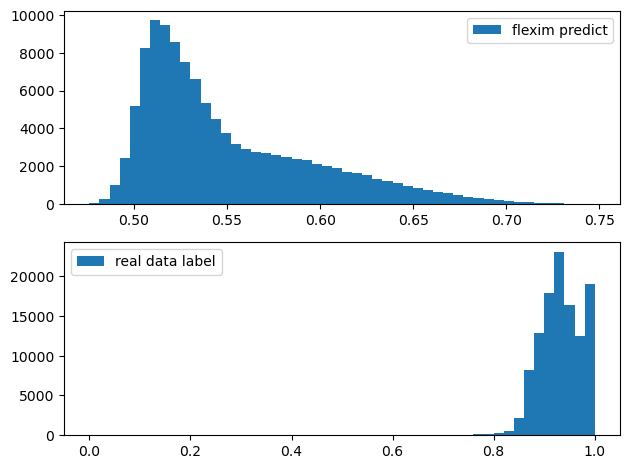

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


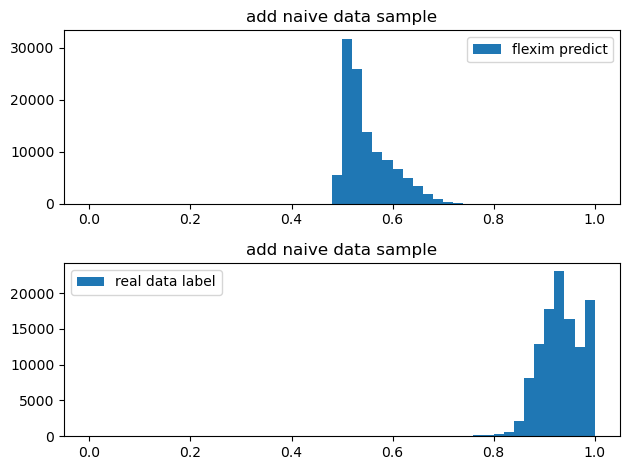

***** begin training *****
neg number flexim is 4375
pos number flexim is 86737
use bias is False
gamma is 0
label smoothing is 4.515372259915392e-18
new version 1
Epoch 1/10


2022-09-25 16:30:36.582823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.5552 - accuracy: 0.6552 - precision: 0.9817 - recall: 0.6499

2022-09-25 16:31:03.626564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 32s 11ms/step - loss: 0.5552 - accuracy: 0.6552 - precision: 0.9817 - recall: 0.6499 - val_loss: 0.6907 - val_accuracy: 0.4853 - val_precision: 0.9965 - val_recall: 0.4601
Epoch 2/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.5015 - accuracy: 0.6536 - precision: 0.9873 - recall: 0.6444 - val_loss: 0.5066 - val_accuracy: 0.6878 - val_precision: 0.9855 - val_recall: 0.6816
Epoch 3/10
2848/2848 [==============================] - 36s 13ms/step - loss: 0.4907 - accuracy: 0.6627 - precision: 0.9880 - recall: 0.6537 - val_loss: 0.4819 - val_accuracy: 0.7124 - val_precision: 0.9842 - val_recall: 0.7088
Epoch 4/10
2848/2848 [==============================] - 37s 13ms/step - loss: 0.4851 - accuracy: 0.6715 - precision: 0.9880 - recall: 0.6629 - val_loss: 0.4712 - val_accuracy: 0.7246 - val_precision: 0.9831 - val_recall: 0.7227
Epoch 5/10
2848/2848 [==============================] - 33s 12ms/step - loss: 0.4842 - accuracy: 0.

2022-09-25 16:36:04.261141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 653/2848 [=====>........................] - ETA: 21s - loss: 0.3212 - accuracy: 0.9418 - precision: 0.9987 - recall: 0.9428

InvalidArgumentError: Graph execution error:

Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/Users/wangzhuo/miniforge3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1117042263.py", line 1, in <cell line: 1>
      res2 = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 40,random_state = 44,n_jobs = -1)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/skopt/optimizer/gp.py", line 259, in gp_minimize
      return base_minimize(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/skopt/optimizer/base.py", line 299, in base_minimize
      next_y = func(next_x)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1117042263.py", line 1, in <lambda>
      res2 = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 40,random_state = 44,n_jobs = -1)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1828885280.py", line 14, in obj
      emulate.__fetch__(simi_kind,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 420, in __fetch__
      self.__restart_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 122, in __restart_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 420, in __fetch__
      self.__restart_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 122, in __restart_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 404, in __fetch__
      self.neural_network_train_real(
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 1341, in neural_network_train_real
      self.neural_network_real = nn(instance,label,self.sample_size,validation_data,class_weight,self.params_2)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/NN_st500.py", line 103, in __init__
      self.model.fit(self.instance, self.label, epochs=10,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/metrics/metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
Detected at node 'assert_greater_equal/Assert/AssertGuard/Assert' defined at (most recent call last):
    File "/Users/wangzhuo/miniforge3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1117042263.py", line 1, in <cell line: 1>
      res2 = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 40,random_state = 44,n_jobs = -1)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/skopt/optimizer/gp.py", line 259, in gp_minimize
      return base_minimize(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/skopt/optimizer/base.py", line 299, in base_minimize
      next_y = func(next_x)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1117042263.py", line 1, in <lambda>
      res2 = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 40,random_state = 44,n_jobs = -1)
    File "/var/folders/4z/gzmqjm993zs1qxkglvxg9xwr0000gn/T/ipykernel_19176/1828885280.py", line 14, in obj
      emulate.__fetch__(simi_kind,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 420, in __fetch__
      self.__restart_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 122, in __restart_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 420, in __fetch__
      self.__restart_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 122, in __restart_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 423, in __fetch__
      self.__first_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 232, in __first_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 426, in __fetch__
      self.__active_fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 166, in __active_fetch__
      self.__fetch__(num,params)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 404, in __fetch__
      self.neural_network_train_real(
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py", line 1341, in neural_network_train_real
      self.neural_network_real = nn(instance,label,self.sample_size,validation_data,class_weight,self.params_2)
    File "/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/NN_st500.py", line 103, in __init__
      self.model.fit(self.instance, self.label, epochs=10,
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/metrics/metrics.py", line 818, in update_state
      return metrics_utils.update_confusion_matrix_variables(
    File "/Users/wangzhuo/miniforge3/lib/python3.9/site-packages/keras/utils/metrics_utils.py", line 602, in update_confusion_matrix_variables
      tf.debugging.assert_greater_equal(
Node: 'assert_greater_equal/Assert/AssertGuard/Assert'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential_128/dense_218/Sigmoid:0) = ] [[nan][nan][nan]...] [y (Cast_6/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
	 [[assert_greater_equal_1/Assert/AssertGuard/pivot_f/_23/_99]]
  (1) INVALID_ARGUMENT:  assertion failed: [predictions must be >= 0] [Condition x >= y did not hold element-wise:] [x (sequential_128/dense_218/Sigmoid:0) = ] [[nan][nan][nan]...] [y (Cast_6/x:0) = ] [0]
	 [[{{node assert_greater_equal/Assert/AssertGuard/Assert}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_22166452]

In [22]:
res2 = skopt.gp_minimize(lambda x: obj(params,x,simi_kind),SPACE,n_calls = 40,random_state = 44,n_jobs = -1)

simi_kind is 2
Metal device set to: Apple M1 Max
random value is 40
start point is 395718
has already got sample
self.training_done is False
simi kind is 2
run first fetch
new1
1 binary fetch
self.training_done is False
simi kind is 2
run active learning fetch for current cluster
generate naive complex alpha parameter
finish generating naive parameters for current cluster
finish generating naive parameters for current cluster
initial active learner model
active learning keras model run
gamma is 17
label smoothing is 0.368


2022-09-26 11:55:54.343046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-26 11:55:54.343822: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


batch size is 10


2022-09-26 11:55:54.707823: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-26 11:55:54.925803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 7ms/step - loss: 5.2948e-06 - accuracy: 0.5500
run into active learning emulate process
1/1 [==============================] - 0s 46ms/step
active learning initial score is 0.524
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
6/6 [==============================] - 0s 15ms/step - loss: 4.8953e-06 - accuracy: 0.6213


2022-09-26 11:55:55.298776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 11ms/step
1 time active learning score is 0.159
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (8, 9)
transform result shape is (8, 100)
train
X shape is (8, 9)
Y shape is (8,)
2/2 [==============================] - 0s 2ms/step
2 time active learning score is 0.636
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
3 time active learning score is 0.341
6/6 [==============================] - 0s 4ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 2ms/step
4 time active learning score is 0.818
2/2 [==============================] - 0s 2ms/step
emulate process finishes


/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


2/2 [==============================] - 0s 9ms/step
1 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.979
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active learning score is 0.958
2/2 [==============================] - 0s 3ms/step
emulate process finishes
query time is 3
first stage total query time is 7
self.training_done is True
simi kind is 2
run next cluster
random value is 2
start point is 70704
has already resample
self.training_done is False
simi kind is 2
run first fetch
new1
3 binary fetch
self.training_done is F

/Users/wangzhuo/Documents/Brown-CS-Research/research/Amir/ST500/emulate_st500.py:709: RuntimeWarning: invalid value encountered in divide
  sim = (np.dot(np.transpose(original),transform)/(np.linalg.norm(original)* np.linalg.norm(transform)))[0][0]


active learning initial score is 0.619
emulate train unlabel shape is (192, 9)
query instance shape is (48, 9)
query instance shape is (44, 9)
transform result shape is (44, 100)
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (9, 9)
transform result shape is (9, 100)
train
X shape is (9, 9)
Y shape is (9,)
2/2 [==============================] - 0s 3ms/step
1 time active learning score is 0.773
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
2 time active learning score is 0.886
6/6 [==============================] - 0s 2ms/step
query instance shape is (10, 9)
query instance shape is (10, 9)
transform result shape is (10, 100)
train
X shape is (10, 9)
Y shape is (10,)
2/2 [==============================] - 0s 3ms/step
3 time active lea

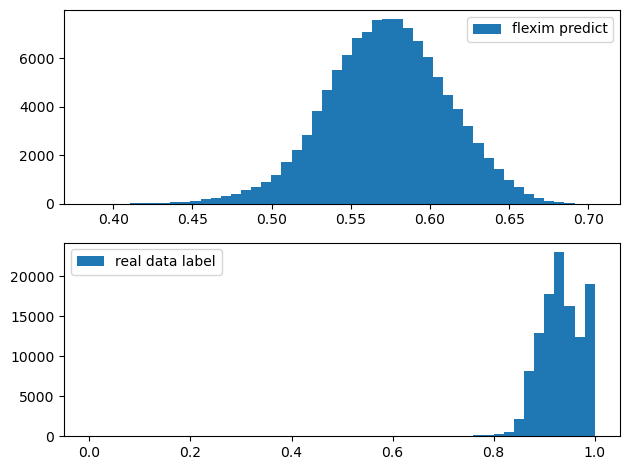

real prob shape is (113887, 1)
score shape is (10, 1)
real train data shape is (91112, 101)
flexim train data shape is (91112, 101)
draw predict_proba data distribution figure after adding naive data


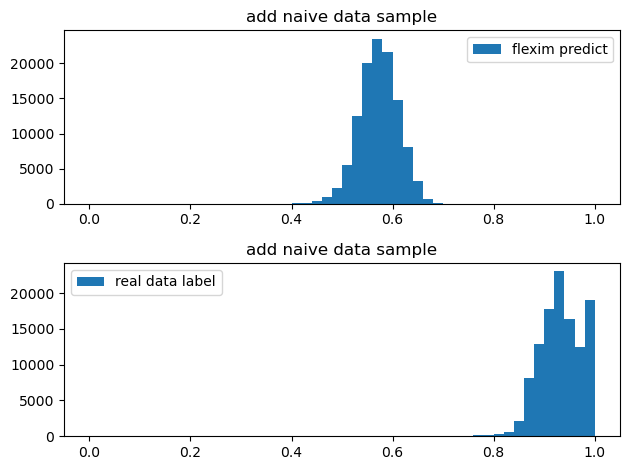

***** begin training *****
neg number flexim is 2991
pos number flexim is 88121
use bias is False
gamma is 4
label smoothing is 0.398
new version 1
Epoch 1/10


2022-09-26 11:56:23.982466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 0.8111 - precision: 0.9931 - recall: 0.8103

2022-09-26 11:56:51.055651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.0279 - accuracy: 0.8111 - precision: 0.9931 - recall: 0.8103 - val_loss: 0.0231 - val_accuracy: 0.8341 - val_precision: 0.9960 - val_recall: 0.8315
Epoch 2/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0241 - accuracy: 0.8180 - precision: 0.9961 - recall: 0.8151 - val_loss: 0.0326 - val_accuracy: 0.7629 - val_precision: 0.9992 - val_recall: 0.7550
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0235 - accuracy: 0.8192 - precision: 0.9964 - recall: 0.8161 - val_loss: 0.0250 - val_accuracy: 0.8107 - val_precision: 0.9975 - val_recall: 0.8059
Epoch 4/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0230 - accuracy: 0.8176 - precision: 0.9968 - recall: 0.8140 - val_loss: 0.0155 - val_accuracy: 0.8937 - val_precision: 0.9899 - val_recall: 0.8990
Epoch 5/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0229 - accuracy: 0.

2022-09-26 12:01:27.254501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9715 - precision: 0.9999 - recall: 0.9715

2022-09-26 12:01:53.762706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2848/2848 [==============================] - 31s 11ms/step - loss: 0.0080 - accuracy: 0.9715 - precision: 0.9999 - recall: 0.9715 - val_loss: 0.0071 - val_accuracy: 0.9772 - val_precision: 1.0000 - val_recall: 0.9771
Epoch 2/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0038 - accuracy: 0.9881 - precision: 1.0000 - recall: 0.9880 - val_loss: 0.0041 - val_accuracy: 0.9908 - val_precision: 1.0000 - val_recall: 0.9908
Epoch 3/10
2848/2848 [==============================] - 30s 11ms/step - loss: 0.0029 - accuracy: 0.9940 - precision: 1.0000 - recall: 0.9940 - val_loss: 0.0030 - val_accuracy: 0.9954 - val_precision: 1.0000 - val_recall: 0.9954
Epoch 4/10
2848/2848 [==============================] - 31s 11ms/step - loss: 0.0025 - accuracy: 0.9960 - precision: 1.0000 - recall: 0.9960 - val_loss: 0.0023 - val_accuracy: 0.9974 - val_precision: 1.0000 - val_recall: 0.9974
Epoch 5/10
2848/2848 [==============================] - 32s 11ms/step - loss: 0.0023 - accuracy: 0.

2022-09-26 12:06:34.268632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list flexim min and max is 0.0 1.0
score list flexim std is 0.2708708941936493
103/900 [==>...........................] - ETA: 1s

2022-09-26 12:06:35.725103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


900/900 [==============================] - 1s 1ms/step
score list mreal min and max is 0.0 1.0
score list mreal std is 0.12390989065170288
measure similarity score based on simi kind you choose
score list real min and max is 0.0 1.0
score list real std is 0.09229280894164704
emd flexim is 0.2407228024048049
emd real is 0.028611367605115123


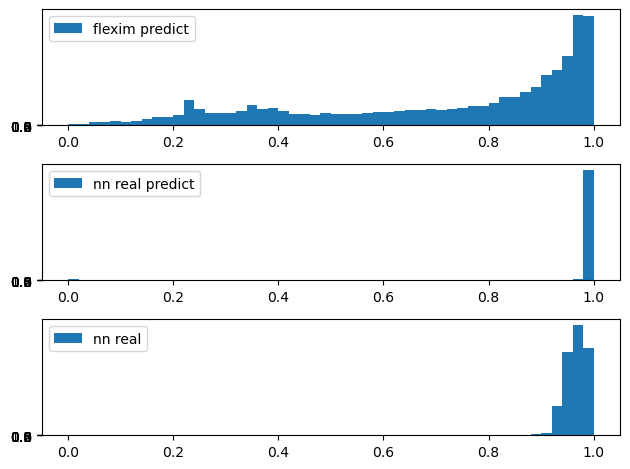

total query time is 10
wass distance flexim is 0.2407228024048049
#######################################################################################


In [8]:
params = [-2.16,6,9]
params_2 = [17, 0.367, 4, 0.398]
flexim_wass_3 = obj(params,params_2,2)